In [1]:
#importing required packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from collections import defaultdict
from scipy.stats import pearsonr, chi2_contingency
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import datetime
import time

In [82]:
#reading in our data
accepted_df = pd.read_csv('accepted_2007_to_2018Q4.csv', sep = ',')

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#creating function to quickly get an idea of values that comprise feature 
def variable_expl(variable):
    print(accepted_df[variable].value_counts())
    print(' ')
    print('Number of NA\'s is:', accepted_df[variable].isna().sum())
    print('Number of unique values is:', accepted_df[variable].nunique())
    if accepted_df[variable].dtype == 'float64' or accepted_df[variable].dtype == 'int64':
        print('Mean is:', np.mean(accepted_df[variable]))
        print('Std.Dev is:', np.std(accepted_df[variable]))
    else:
        return False

In [4]:
#creating function to return correlation value between two features 
def corr_value(variable1, variable2):
    print(accepted_df[variable1].corr(accepted_df[variable2]))

In [5]:
#creating a function that can print full series values in Jupyter notebook
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [133]:
#creating a function to return correlation values between numeric variables
#num_feat2 needs to be instantiated in order for correlation to run
from collections import defaultdict

        
def correlation(variable):
    dict1 = defaultdict(int)
    for x in accepted_df[num_feat2].columns.values:
        corr1 = accepted_df[x].corr(accepted_df[variable])
        dict1[x] = abs(corr1)
    return sorted(dict1.items(), key = lambda x: x[1], reverse = True)

In [134]:
correlation('total_acc')

[('total_acc', 1.0),
 ('num_rev_accts', 0.7646128837158631),
 ('num_sats', 0.715618428099662),
 ('num_il_tl', 0.6898468290977386),
 ('num_bc_tl', 0.6286868747283412),
 ('num_op_rev_tl', 0.575339920133672),
 ('acc_open_past_24mths', 0.4339735461976328),
 ('total_il_high_credit_limit', 0.4270151149839923),
 ('num_rev_tl_bal_gt_0', 0.4183287417631669),
 ('num_bc_sats', 0.41412990941646977),
 ('open_act_il', 0.3990272798306095),
 ('mort_acc', 0.36787312666722655),
 ('open_il_24m', 0.35438332991276866),
 ('tot_hi_cred_lim', 0.34853855803193284),
 ('mo_sin_old_il_acct', 0.34116263231882193),
 ('num_tl_op_past_12m', 0.3337716208911677),
 ('total_rev_hi_lim', 0.3194265905229146),
 ('num_actv_bc_tl', 0.3148739896338451),
 ('open_rv_24m', 0.3121346755128122),
 ('total_bc_limit', 0.29388209525743186),
 ('total_cu_tl', 0.29359220984608253),
 ('mo_sin_old_rev_tl_op', 0.2807678195031766),
 ('open_acc_6m', 0.26025692201923833),
 ('open_il_12m', 0.258875201684099),
 ('open_rv_12m', 0.2481847183344556)

In [132]:
variable_expl('total_acc')

20.0     82570
19.0     82012
18.0     81931
17.0     81378
21.0     81170
         ...  
145.0        1
128.0        1
141.0        1
130.0        1
176.0        1
Name: total_acc, Length: 152, dtype: int64
 
Number of NA's is: 29
Number of unique values is: 152
Mean is: 24.162552269513178
Std.Dev is: 11.987525665984684


In [130]:
print_full(accepted_df[num_feat2].isna().sum())

term                                0
int_rate                            0
installment                         0
emp_length                     146907
annual_inc                          4
loan_status                         0
dti                              1711
delinq_2yrs                        29
fico_range_high                     0
inq_last_6mths                     30
pub_rec                            29
revol_bal                           0
total_acc                          29
out_prncp_inv                       0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
last_pymnt_amnt                     0
last_fico_range_high                0
last_fico_range_low                 0
collections_12_mths_ex_med        145
acc_now_delinq                     29
tot_coll_amt                    70276
open_acc_6m                    866130
open_act_il                    866129
open_il_12m                    866129
open_il_24m 

In [ ]:
#fillmean values 
fillmean = ['annual_inc','delinq_amnt','acc_now_delinq','delinq_2yrs','dti','revol_util','inq_last_6mths',
           'open_acc','pub_rec',]
#missing values here likely mean absence of the feature for that observation. 
fillzero = ['open_acc','pub_rec','inq_last_6mths','tax_liens','collections_12_mths_ex_med',
           'chargeoff_within_12_mths','pub_rec_bankruptcies','emp_length']
#fillmode where distribution is skewed to one value 
fillmode = ['']
#missing value for earliest_cr_line should be assumed to mean absence of cr_line, so should be set equal to issue_d
accepted_df['earliest_cr_line'] = accepted_df['earliest_cr_line'].fillna(accepted_df['issue_d'])
#fill with max value
fillmax = ['']   
#fill with empty strings
fillstrings = ['title']
#filling NA's
accepted_df[fillmean] = accepted_df[fillmean].fillna(accepted_df[fillmean].mean())
accepted_df[fillzero] = accepted_df[fillzero].fillna(0)
accepted_df[fillmode] = accepted_df[fillmode].fillna(accepted_df[fillmode].mode().iloc[0])
accepted_df[fillstrings].fillna('')

In [113]:
variable_expl('emp_length')

11.0    748005
2.0     203677
0.0     189988
3.0     180753
1.0     148403
5.0     139698
4.0     136605
6.0     102628
7.0      92695
8.0      91914
9.0      79395
Name: emp_length, dtype: int64
 
Number of NA's is: 146907
Number of unique values is: 11
Mean is: 6.285233287963965
Std.Dev is: 4.116818321117613


In [128]:
variable_expl('chargeoff_within_12_mths')

0.0     2243339
1.0       15765
2.0        1115
3.0         186
4.0          68
5.0          22
6.0          12
7.0           8
9.0           5
8.0           2
10.0          1
Name: chargeoff_within_12_mths, dtype: int64
 
Number of NA's is: 145
Number of unique values is: 11
Mean is: 0.008464412881443808
Std.Dev is: 0.1048097659846299


In [87]:
#dropping observations with NA's for loan status
accepted_df = accepted_df.dropna(subset = ['loan_status'])

#creates issue_d_year and issue_d_month variables that will be later used to filter the dataframe 

def data_transformation(df):
    df[['earliest_cr_line_month','earliest_cr_line_year']] = df['earliest_cr_line'].str.split('-', expand = True)
    df['earliest_cr_line_year'] = df['earliest_cr_line_year'].fillna('2019')
    df['earliest_cr_line_month'] = df['earliest_cr_line_month'].fillna('Jun')
    df[['issue_d_month','issue_d_year']] = df['issue_d'].str.split('-', expand = True)
    accepted_df.issue_d_year = accepted_df.issue_d_year.astype('int64')
    return df.shape
data_transformation(accepted_df)

#filters the accepted_df dataframe to only include 2017, 2018 and 2019 values
#not needed any longer
# accepted_df = accepted_df[accepted_df['issue_d_year'].isin([2017,2018,2019])]

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

(2260668, 155)

In [ ]:
#dropping irrelevant or missing data features from the start

#dropping certain variables from the get-go in order to reduce processing time during multicollinearity analysis
accepted_df = accepted_df.drop(['member_id','id','funded_amnt_inv','url','desc'], axis = 1)
#looking at variables with highest NA counts
accepted_df_nas = (accepted_df.isna().sum()/accepted_df.shape[0]).reset_index()
accepted_df_nas.columns = ['Feature','Percent_Missing']
accepted_df_nas = accepted_df_nas.sort_values(by = 'Percent_Missing')
#getting index list of variables wiht > 50% missing values 
index1 = list(accepted_df_nas[accepted_df_nas['Percent_Missing'] > 0.5].index)
#dropping the columns that have missing values > 0.5
accepted_df.drop(accepted_df.columns[index1], axis = 1, inplace = True)
#since policy_code has only one value, drop this column as well
accepted_df = accepted_df.drop(['policy_code'], axis = 1)
#zip_code variable has last two digits of zip_code missing, so we can safely drop this one 
accepted_df = accepted_df.drop(['zip_code'], axis = 1)
#drop last_payment_d variable because this variable would not be accessible to investors and would introduce data leakage
accepted_df.drop(['last_pymnt_d','collection_recovery_fee','recoveries'], axis = 1, inplace = True)

#cleaning categorical variables 
#term should be converted to numeric
accepted_df['term'] = accepted_df['term'].replace({' 36 months':36,' 60 months':60})
#85% of last_credit_pull_d values are Mar-2019, so drop
accepted_df.drop(['last_credit_pull_d'], axis = 1, inplace = True)
#title and purpose variables are quasi-identical, so drop one
accepted_df.drop(['title'], axis = 1, inplace = True)
#creating a new variable to capture number of years of oldest credit line, defined as issue_d - earliest_cr_line
#mapping date variables and converting to datetime objects 
month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
accepted_df['issue_d_month_num'] = accepted_df['issue_d_month'][:] 
accepted_df['issue_d_month_num'] = accepted_df['issue_d_month_num'].replace(month_dict)
accepted_df['issue_d_date'] = str('15/') + accepted_df['issue_d_month_num'].astype(str) + '/' + accepted_df['issue_d_year'].astype(str)
accepted_df['issue_d_date'] = pd.to_datetime(accepted_df['issue_d_date'], infer_datetime_format=True)

In [ ]:
#fifth commit

In [135]:
#xxx

In [91]:
accepted_df['earliest_cr_line_month_num'] = accepted_df['earliest_cr_line_month'][:] 
accepted_df['earliest_cr_line_month_num'] = accepted_df['earliest_cr_line_month'].replace(month_dict)
accepted_df['earliest_cr_line_date'] = str('15/') + accepted_df['earliest_cr_line_month_num'].astype(str) + '/' + accepted_df['earliest_cr_line_year'].astype(str)
accepted_df['earliest_cr_line_date'] = pd.to_datetime(accepted_df['earliest_cr_line_date'], infer_datetime_format=True)
#creating new variable capturing amount of years of oldest credit line 
accepted_df['earliest_credit_line_years'] = accepted_df['issue_d_date'] - accepted_df['earliest_cr_line_date'] 
#dropping debt_settlement_flag because this would introduce data leakage into the dataset
#dropping 'earliest_cr_line_month','earliest_cr_line_year','issue_d_month' because these are now captured in earliest_credit_line_yearsa nd issue_d_date
accepted_df.drop(['debt_settlement_flag', 'earliest_cr_line_month','earliest_cr_line_year','issue_d_month'], axis = 1, inplace = True)
#dropping earliest_cr_line
accepted_df.drop(['earliest_cr_line'], axis = 1, inplace = True)
#dropping emp_title because mapping to general categories i.e. Director or President 
# would most likely be highly correlated with income and would be very computationally/time expensive
accepted_df.drop(['emp_title'],axis = 1, inplace = True)
#dropping issue_d_year because year already captured in issue_d_date
accepted_df.drop(['issue_d_year'],axis = 1, inplace = True)
#dropping issue_d because year already captured in issue_d_date
accepted_df.drop(['issue_d'],axis = 1, inplace = True)
#mapping 10+ years to 11 years and <1 years to 0 years in emp_length and converting this to a float
accepted_df['emp_length'] = accepted_df['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
accepted_df['emp_length'] = accepted_df['emp_length'].str.extract('(\d+)').astype('float')
#replacing values in application_type_variable
accepted_df['application_type'] = accepted_df['application_type'].replace({'Individual':'Ind','Joint App':'Joint'}) 
#dropping pymnt_plan and hardship_flag because keeping these would constitute data leakage 
accepted_df.drop(['pymnt_plan','hardship_flag'],axis = 1, inplace = True)
#mapping our dependent variable loan_status to 0/1 values
accepted_df['loan_status'] = accepted_df['loan_status'].isin(['Fully Paid','Current','In Grace Period','Does not meet the credit policy. Status:Fully Paid']).astype('int64')
accepted_df['loan_status']

In [ ]:
#exploring pairs of highly correlated numeric variables
comb_num_feat = list(combinations(num_feat2, 2))
corrdict = defaultdict(int)
for comb in comb_num_feat:
    try:
        corr = accepted_df[comb[0]].corr(accepted_df[comb[1]])
        corrdict[comb] = abs(corr)
    except:
        continue

#addressing multicollinearity in numeric variables
#dropping numeric variables that are highly correlated with one another
def variable_drop(corrdict, value):
    filtered_dict = dict(filter(lambda x: x[1] > value, corrdict.items()))
    dropped_variables = []
    for k,v in filtered_dict.items():
        if k != 'loan_status':
            try:
                accepted_df.drop(k[0], axis = 1, inplace = True)
                print('Highly correlated pair:',k,v)
                dropped_variables.append(k[0])
            except:
                print('Next')
                continue
    print(dropped_variables)
variable_drop(corrdict, 0.85)

In [129]:
#creating list of all numeric variable names
num_feat2 = []
for x in accepted_df.columns.values:
    if accepted_df[x].dtype == 'int64' or accepted_df[x].dtype == 'float64':
        num_feat2.append(x)
    else:
        continue

print(len(num_feat2))

72


In [103]:
#creating list of all categorical variable names
cat_feat = []
for var in accepted_df.columns:
    if accepted_df[var].dtype == 'O':
        cat_feat.append(var)
    else:
        continue
        
print(len(cat_feat))

8


In [104]:
#dropping 
cat_feat

['sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'disbursement_method']

In [102]:
accepted_df['loan_status'].sum()/accepted_df.shape[0]

0.8694297437748488

In [77]:
accepted_df[accepted_df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid']

/Users/philippeheitzmann/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Empty DataFrame
Columns: [loan_amnt, funded_amnt, term, int_rate, installment, sub_grade, emp_length, home_ownership, annual_inc, verification_status, loan_status, purpose, addr_state, dti, delinq_2yrs, fico_range_low, fico_range_high, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, application_type, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_inq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, pub_rec_bankruptcies, tax_liens, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, disbursement_method, issue_d_month_num, issue_d_date, earliest_cr_line_month_num, earliest_cr_line_date, earliest_credit_line_years]
Index: []

[0 rows x 97 columns]

In [69]:
variable_expl('loan_status')

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64
 
Number of NA's is: 0
Number of unique values is: 9


False

In [55]:
list(filter(lambda x: x[1] > 0.85, corrdict2.items()))

[(('grade', 'sub_grade'), 0.9999999999999999),
 (('pymnt_plan', 'hardship_flag'), 0.8625083410254724)]

In [56]:
variable_expl('grade')

B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64
 
Number of NA's is: 0
Number of unique values is: 7


False

In [122]:
#corrdict marker

('loan_amnt', 'funded_amnt')
('loan_amnt', 'term')
('loan_amnt', 'int_rate')
('loan_amnt', 'installment')
('loan_amnt', 'emp_length')
('loan_amnt', 'annual_inc')
('loan_amnt', 'loan_status')
('loan_amnt', 'dti')
('loan_amnt', 'delinq_2yrs')
('loan_amnt', 'fico_range_low')
('loan_amnt', 'fico_range_high')
('loan_amnt', 'inq_last_6mths')
('loan_amnt', 'open_acc')
('loan_amnt', 'pub_rec')
('loan_amnt', 'revol_bal')
('loan_amnt', 'revol_util')
('loan_amnt', 'total_acc')
('loan_amnt', 'out_prncp')
('loan_amnt', 'out_prncp_inv')
('loan_amnt', 'total_pymnt')
('loan_amnt', 'total_pymnt_inv')
('loan_amnt', 'total_rec_prncp')
('loan_amnt', 'total_rec_int')
('loan_amnt', 'total_rec_late_fee')
('loan_amnt', 'recoveries')
('loan_amnt', 'collection_recovery_fee')
('loan_amnt', 'last_pymnt_amnt')
('loan_amnt', 'last_fico_range_high')
('loan_amnt', 'last_fico_range_low')
('loan_amnt', 'collections_12_mths_ex_med')
('loan_amnt', 'acc_now_delinq')
('loan_amnt', 'tot_coll_amt')
('loan_amnt', 'tot_cur_bal

('int_rate', 'total_rec_int')
('int_rate', 'total_rec_late_fee')
('int_rate', 'recoveries')
('int_rate', 'collection_recovery_fee')
('int_rate', 'last_pymnt_amnt')
('int_rate', 'last_fico_range_high')
('int_rate', 'last_fico_range_low')
('int_rate', 'collections_12_mths_ex_med')
('int_rate', 'acc_now_delinq')
('int_rate', 'tot_coll_amt')
('int_rate', 'tot_cur_bal')
('int_rate', 'open_acc_6m')
('int_rate', 'open_act_il')
('int_rate', 'open_il_12m')
('int_rate', 'open_il_24m')
('int_rate', 'mths_since_rcnt_il')
('int_rate', 'total_bal_il')
('int_rate', 'il_util')
('int_rate', 'open_rv_12m')
('int_rate', 'open_rv_24m')
('int_rate', 'max_bal_bc')
('int_rate', 'all_util')
('int_rate', 'total_rev_hi_lim')
('int_rate', 'inq_fi')
('int_rate', 'total_cu_tl')
('int_rate', 'inq_last_12m')
('int_rate', 'acc_open_past_24mths')
('int_rate', 'avg_cur_bal')
('int_rate', 'bc_open_to_buy')
('int_rate', 'bc_util')
('int_rate', 'chargeoff_within_12_mths')
('int_rate', 'delinq_amnt')
('int_rate', 'mo_sin_o

('annual_inc', 'tot_cur_bal')
('annual_inc', 'open_acc_6m')
('annual_inc', 'open_act_il')
('annual_inc', 'open_il_12m')
('annual_inc', 'open_il_24m')
('annual_inc', 'mths_since_rcnt_il')
('annual_inc', 'total_bal_il')
('annual_inc', 'il_util')
('annual_inc', 'open_rv_12m')
('annual_inc', 'open_rv_24m')
('annual_inc', 'max_bal_bc')
('annual_inc', 'all_util')
('annual_inc', 'total_rev_hi_lim')
('annual_inc', 'inq_fi')
('annual_inc', 'total_cu_tl')
('annual_inc', 'inq_last_12m')
('annual_inc', 'acc_open_past_24mths')
('annual_inc', 'avg_cur_bal')
('annual_inc', 'bc_open_to_buy')
('annual_inc', 'bc_util')
('annual_inc', 'chargeoff_within_12_mths')
('annual_inc', 'delinq_amnt')
('annual_inc', 'mo_sin_old_il_acct')
('annual_inc', 'mo_sin_old_rev_tl_op')
('annual_inc', 'mo_sin_rcnt_rev_tl_op')
('annual_inc', 'mo_sin_rcnt_tl')
('annual_inc', 'mort_acc')
('annual_inc', 'mths_since_recent_bc')
('annual_inc', 'mths_since_recent_inq')
('annual_inc', 'num_accts_ever_120_pd')
('annual_inc', 'num_act

('delinq_2yrs', 'num_actv_bc_tl')
('delinq_2yrs', 'num_actv_rev_tl')
('delinq_2yrs', 'num_bc_sats')
('delinq_2yrs', 'num_bc_tl')
('delinq_2yrs', 'num_il_tl')
('delinq_2yrs', 'num_op_rev_tl')
('delinq_2yrs', 'num_rev_accts')
('delinq_2yrs', 'num_rev_tl_bal_gt_0')
('delinq_2yrs', 'num_sats')
('delinq_2yrs', 'num_tl_120dpd_2m')
('delinq_2yrs', 'num_tl_30dpd')
('delinq_2yrs', 'num_tl_90g_dpd_24m')
('delinq_2yrs', 'num_tl_op_past_12m')
('delinq_2yrs', 'pct_tl_nvr_dlq')
('delinq_2yrs', 'percent_bc_gt_75')
('delinq_2yrs', 'pub_rec_bankruptcies')
('delinq_2yrs', 'tax_liens')
('delinq_2yrs', 'tot_hi_cred_lim')
('delinq_2yrs', 'total_bal_ex_mort')
('delinq_2yrs', 'total_bc_limit')
('delinq_2yrs', 'total_il_high_credit_limit')
('delinq_2yrs', 'issue_d_month_num')
('delinq_2yrs', 'earliest_cr_line_month_num')
('fico_range_low', 'fico_range_high')
('fico_range_low', 'inq_last_6mths')
('fico_range_low', 'open_acc')
('fico_range_low', 'pub_rec')
('fico_range_low', 'revol_bal')
('fico_range_low', 'rev

('inq_last_6mths', 'num_actv_bc_tl')
('inq_last_6mths', 'num_actv_rev_tl')
('inq_last_6mths', 'num_bc_sats')
('inq_last_6mths', 'num_bc_tl')
('inq_last_6mths', 'num_il_tl')
('inq_last_6mths', 'num_op_rev_tl')
('inq_last_6mths', 'num_rev_accts')
('inq_last_6mths', 'num_rev_tl_bal_gt_0')
('inq_last_6mths', 'num_sats')
('inq_last_6mths', 'num_tl_120dpd_2m')
('inq_last_6mths', 'num_tl_30dpd')
('inq_last_6mths', 'num_tl_90g_dpd_24m')
('inq_last_6mths', 'num_tl_op_past_12m')
('inq_last_6mths', 'pct_tl_nvr_dlq')
('inq_last_6mths', 'percent_bc_gt_75')
('inq_last_6mths', 'pub_rec_bankruptcies')
('inq_last_6mths', 'tax_liens')
('inq_last_6mths', 'tot_hi_cred_lim')
('inq_last_6mths', 'total_bal_ex_mort')
('inq_last_6mths', 'total_bc_limit')
('inq_last_6mths', 'total_il_high_credit_limit')
('inq_last_6mths', 'issue_d_month_num')
('inq_last_6mths', 'earliest_cr_line_month_num')
('open_acc', 'pub_rec')
('open_acc', 'revol_bal')
('open_acc', 'revol_util')
('open_acc', 'total_acc')
('open_acc', 'out_p

('revol_util', 'mths_since_rcnt_il')
('revol_util', 'total_bal_il')
('revol_util', 'il_util')
('revol_util', 'open_rv_12m')
('revol_util', 'open_rv_24m')
('revol_util', 'max_bal_bc')
('revol_util', 'all_util')
('revol_util', 'total_rev_hi_lim')
('revol_util', 'inq_fi')
('revol_util', 'total_cu_tl')
('revol_util', 'inq_last_12m')
('revol_util', 'acc_open_past_24mths')
('revol_util', 'avg_cur_bal')
('revol_util', 'bc_open_to_buy')
('revol_util', 'bc_util')
('revol_util', 'chargeoff_within_12_mths')
('revol_util', 'delinq_amnt')
('revol_util', 'mo_sin_old_il_acct')
('revol_util', 'mo_sin_old_rev_tl_op')
('revol_util', 'mo_sin_rcnt_rev_tl_op')
('revol_util', 'mo_sin_rcnt_tl')
('revol_util', 'mort_acc')
('revol_util', 'mths_since_recent_bc')
('revol_util', 'mths_since_recent_inq')
('revol_util', 'num_accts_ever_120_pd')
('revol_util', 'num_actv_bc_tl')
('revol_util', 'num_actv_rev_tl')
('revol_util', 'num_bc_sats')
('revol_util', 'num_bc_tl')
('revol_util', 'num_il_tl')
('revol_util', 'num_

('out_prncp_inv', 'total_bal_ex_mort')
('out_prncp_inv', 'total_bc_limit')
('out_prncp_inv', 'total_il_high_credit_limit')
('out_prncp_inv', 'issue_d_month_num')
('out_prncp_inv', 'earliest_cr_line_month_num')
('total_pymnt', 'total_pymnt_inv')
('total_pymnt', 'total_rec_prncp')
('total_pymnt', 'total_rec_int')
('total_pymnt', 'total_rec_late_fee')
('total_pymnt', 'recoveries')
('total_pymnt', 'collection_recovery_fee')
('total_pymnt', 'last_pymnt_amnt')
('total_pymnt', 'last_fico_range_high')
('total_pymnt', 'last_fico_range_low')
('total_pymnt', 'collections_12_mths_ex_med')
('total_pymnt', 'acc_now_delinq')
('total_pymnt', 'tot_coll_amt')
('total_pymnt', 'tot_cur_bal')
('total_pymnt', 'open_acc_6m')
('total_pymnt', 'open_act_il')
('total_pymnt', 'open_il_12m')
('total_pymnt', 'open_il_24m')
('total_pymnt', 'mths_since_rcnt_il')
('total_pymnt', 'total_bal_il')
('total_pymnt', 'il_util')
('total_pymnt', 'open_rv_12m')
('total_pymnt', 'open_rv_24m')
('total_pymnt', 'max_bal_bc')
('tota

('total_rec_int', 'bc_open_to_buy')
('total_rec_int', 'bc_util')
('total_rec_int', 'chargeoff_within_12_mths')
('total_rec_int', 'delinq_amnt')
('total_rec_int', 'mo_sin_old_il_acct')
('total_rec_int', 'mo_sin_old_rev_tl_op')
('total_rec_int', 'mo_sin_rcnt_rev_tl_op')
('total_rec_int', 'mo_sin_rcnt_tl')
('total_rec_int', 'mort_acc')
('total_rec_int', 'mths_since_recent_bc')
('total_rec_int', 'mths_since_recent_inq')
('total_rec_int', 'num_accts_ever_120_pd')
('total_rec_int', 'num_actv_bc_tl')
('total_rec_int', 'num_actv_rev_tl')
('total_rec_int', 'num_bc_sats')
('total_rec_int', 'num_bc_tl')
('total_rec_int', 'num_il_tl')
('total_rec_int', 'num_op_rev_tl')
('total_rec_int', 'num_rev_accts')
('total_rec_int', 'num_rev_tl_bal_gt_0')
('total_rec_int', 'num_sats')
('total_rec_int', 'num_tl_120dpd_2m')
('total_rec_int', 'num_tl_30dpd')
('total_rec_int', 'num_tl_90g_dpd_24m')
('total_rec_int', 'num_tl_op_past_12m')
('total_rec_int', 'pct_tl_nvr_dlq')
('total_rec_int', 'percent_bc_gt_75')
('

('collection_recovery_fee', 'pub_rec_bankruptcies')
('collection_recovery_fee', 'tax_liens')
('collection_recovery_fee', 'tot_hi_cred_lim')
('collection_recovery_fee', 'total_bal_ex_mort')
('collection_recovery_fee', 'total_bc_limit')
('collection_recovery_fee', 'total_il_high_credit_limit')
('collection_recovery_fee', 'issue_d_month_num')
('collection_recovery_fee', 'earliest_cr_line_month_num')
('last_pymnt_amnt', 'last_fico_range_high')
('last_pymnt_amnt', 'last_fico_range_low')
('last_pymnt_amnt', 'collections_12_mths_ex_med')
('last_pymnt_amnt', 'acc_now_delinq')
('last_pymnt_amnt', 'tot_coll_amt')
('last_pymnt_amnt', 'tot_cur_bal')
('last_pymnt_amnt', 'open_acc_6m')
('last_pymnt_amnt', 'open_act_il')
('last_pymnt_amnt', 'open_il_12m')
('last_pymnt_amnt', 'open_il_24m')
('last_pymnt_amnt', 'mths_since_rcnt_il')
('last_pymnt_amnt', 'total_bal_il')
('last_pymnt_amnt', 'il_util')
('last_pymnt_amnt', 'open_rv_12m')
('last_pymnt_amnt', 'open_rv_24m')
('last_pymnt_amnt', 'max_bal_bc')
(

('collections_12_mths_ex_med', 'inq_last_12m')
('collections_12_mths_ex_med', 'acc_open_past_24mths')
('collections_12_mths_ex_med', 'avg_cur_bal')
('collections_12_mths_ex_med', 'bc_open_to_buy')
('collections_12_mths_ex_med', 'bc_util')
('collections_12_mths_ex_med', 'chargeoff_within_12_mths')
('collections_12_mths_ex_med', 'delinq_amnt')
('collections_12_mths_ex_med', 'mo_sin_old_il_acct')
('collections_12_mths_ex_med', 'mo_sin_old_rev_tl_op')
('collections_12_mths_ex_med', 'mo_sin_rcnt_rev_tl_op')
('collections_12_mths_ex_med', 'mo_sin_rcnt_tl')
('collections_12_mths_ex_med', 'mort_acc')
('collections_12_mths_ex_med', 'mths_since_recent_bc')
('collections_12_mths_ex_med', 'mths_since_recent_inq')
('collections_12_mths_ex_med', 'num_accts_ever_120_pd')
('collections_12_mths_ex_med', 'num_actv_bc_tl')
('collections_12_mths_ex_med', 'num_actv_rev_tl')
('collections_12_mths_ex_med', 'num_bc_sats')
('collections_12_mths_ex_med', 'num_bc_tl')
('collections_12_mths_ex_med', 'num_il_tl')


('open_acc_6m', 'delinq_amnt')
('open_acc_6m', 'mo_sin_old_il_acct')
('open_acc_6m', 'mo_sin_old_rev_tl_op')
('open_acc_6m', 'mo_sin_rcnt_rev_tl_op')
('open_acc_6m', 'mo_sin_rcnt_tl')
('open_acc_6m', 'mort_acc')
('open_acc_6m', 'mths_since_recent_bc')
('open_acc_6m', 'mths_since_recent_inq')
('open_acc_6m', 'num_accts_ever_120_pd')
('open_acc_6m', 'num_actv_bc_tl')
('open_acc_6m', 'num_actv_rev_tl')
('open_acc_6m', 'num_bc_sats')
('open_acc_6m', 'num_bc_tl')
('open_acc_6m', 'num_il_tl')
('open_acc_6m', 'num_op_rev_tl')
('open_acc_6m', 'num_rev_accts')
('open_acc_6m', 'num_rev_tl_bal_gt_0')
('open_acc_6m', 'num_sats')
('open_acc_6m', 'num_tl_120dpd_2m')
('open_acc_6m', 'num_tl_30dpd')
('open_acc_6m', 'num_tl_90g_dpd_24m')
('open_acc_6m', 'num_tl_op_past_12m')
('open_acc_6m', 'pct_tl_nvr_dlq')
('open_acc_6m', 'percent_bc_gt_75')
('open_acc_6m', 'pub_rec_bankruptcies')
('open_acc_6m', 'tax_liens')
('open_acc_6m', 'tot_hi_cred_lim')
('open_acc_6m', 'total_bal_ex_mort')
('open_acc_6m', 'tot

('total_bal_il', 'total_rev_hi_lim')
('total_bal_il', 'inq_fi')
('total_bal_il', 'total_cu_tl')
('total_bal_il', 'inq_last_12m')
('total_bal_il', 'acc_open_past_24mths')
('total_bal_il', 'avg_cur_bal')
('total_bal_il', 'bc_open_to_buy')
('total_bal_il', 'bc_util')
('total_bal_il', 'chargeoff_within_12_mths')
('total_bal_il', 'delinq_amnt')
('total_bal_il', 'mo_sin_old_il_acct')
('total_bal_il', 'mo_sin_old_rev_tl_op')
('total_bal_il', 'mo_sin_rcnt_rev_tl_op')
('total_bal_il', 'mo_sin_rcnt_tl')
('total_bal_il', 'mort_acc')
('total_bal_il', 'mths_since_recent_bc')
('total_bal_il', 'mths_since_recent_inq')
('total_bal_il', 'num_accts_ever_120_pd')
('total_bal_il', 'num_actv_bc_tl')
('total_bal_il', 'num_actv_rev_tl')
('total_bal_il', 'num_bc_sats')
('total_bal_il', 'num_bc_tl')
('total_bal_il', 'num_il_tl')
('total_bal_il', 'num_op_rev_tl')
('total_bal_il', 'num_rev_accts')
('total_bal_il', 'num_rev_tl_bal_gt_0')
('total_bal_il', 'num_sats')
('total_bal_il', 'num_tl_120dpd_2m')
('total_ba

('all_util', 'pub_rec_bankruptcies')
('all_util', 'tax_liens')
('all_util', 'tot_hi_cred_lim')
('all_util', 'total_bal_ex_mort')
('all_util', 'total_bc_limit')
('all_util', 'total_il_high_credit_limit')
('all_util', 'issue_d_month_num')
('all_util', 'earliest_cr_line_month_num')
('total_rev_hi_lim', 'inq_fi')
('total_rev_hi_lim', 'total_cu_tl')
('total_rev_hi_lim', 'inq_last_12m')
('total_rev_hi_lim', 'acc_open_past_24mths')
('total_rev_hi_lim', 'avg_cur_bal')
('total_rev_hi_lim', 'bc_open_to_buy')
('total_rev_hi_lim', 'bc_util')
('total_rev_hi_lim', 'chargeoff_within_12_mths')
('total_rev_hi_lim', 'delinq_amnt')
('total_rev_hi_lim', 'mo_sin_old_il_acct')
('total_rev_hi_lim', 'mo_sin_old_rev_tl_op')
('total_rev_hi_lim', 'mo_sin_rcnt_rev_tl_op')
('total_rev_hi_lim', 'mo_sin_rcnt_tl')
('total_rev_hi_lim', 'mort_acc')
('total_rev_hi_lim', 'mths_since_recent_bc')
('total_rev_hi_lim', 'mths_since_recent_inq')
('total_rev_hi_lim', 'num_accts_ever_120_pd')
('total_rev_hi_lim', 'num_actv_bc_tl

('avg_cur_bal', 'pub_rec_bankruptcies')
('avg_cur_bal', 'tax_liens')
('avg_cur_bal', 'tot_hi_cred_lim')
('avg_cur_bal', 'total_bal_ex_mort')
('avg_cur_bal', 'total_bc_limit')
('avg_cur_bal', 'total_il_high_credit_limit')
('avg_cur_bal', 'issue_d_month_num')
('avg_cur_bal', 'earliest_cr_line_month_num')
('bc_open_to_buy', 'bc_util')
('bc_open_to_buy', 'chargeoff_within_12_mths')
('bc_open_to_buy', 'delinq_amnt')
('bc_open_to_buy', 'mo_sin_old_il_acct')
('bc_open_to_buy', 'mo_sin_old_rev_tl_op')
('bc_open_to_buy', 'mo_sin_rcnt_rev_tl_op')
('bc_open_to_buy', 'mo_sin_rcnt_tl')
('bc_open_to_buy', 'mort_acc')
('bc_open_to_buy', 'mths_since_recent_bc')
('bc_open_to_buy', 'mths_since_recent_inq')
('bc_open_to_buy', 'num_accts_ever_120_pd')
('bc_open_to_buy', 'num_actv_bc_tl')
('bc_open_to_buy', 'num_actv_rev_tl')
('bc_open_to_buy', 'num_bc_sats')
('bc_open_to_buy', 'num_bc_tl')
('bc_open_to_buy', 'num_il_tl')
('bc_open_to_buy', 'num_op_rev_tl')
('bc_open_to_buy', 'num_rev_accts')
('bc_open_to_

('mo_sin_rcnt_rev_tl_op', 'num_bc_tl')
('mo_sin_rcnt_rev_tl_op', 'num_il_tl')
('mo_sin_rcnt_rev_tl_op', 'num_op_rev_tl')
('mo_sin_rcnt_rev_tl_op', 'num_rev_accts')
('mo_sin_rcnt_rev_tl_op', 'num_rev_tl_bal_gt_0')
('mo_sin_rcnt_rev_tl_op', 'num_sats')
('mo_sin_rcnt_rev_tl_op', 'num_tl_120dpd_2m')
('mo_sin_rcnt_rev_tl_op', 'num_tl_30dpd')
('mo_sin_rcnt_rev_tl_op', 'num_tl_90g_dpd_24m')
('mo_sin_rcnt_rev_tl_op', 'num_tl_op_past_12m')
('mo_sin_rcnt_rev_tl_op', 'pct_tl_nvr_dlq')
('mo_sin_rcnt_rev_tl_op', 'percent_bc_gt_75')
('mo_sin_rcnt_rev_tl_op', 'pub_rec_bankruptcies')
('mo_sin_rcnt_rev_tl_op', 'tax_liens')
('mo_sin_rcnt_rev_tl_op', 'tot_hi_cred_lim')
('mo_sin_rcnt_rev_tl_op', 'total_bal_ex_mort')
('mo_sin_rcnt_rev_tl_op', 'total_bc_limit')
('mo_sin_rcnt_rev_tl_op', 'total_il_high_credit_limit')
('mo_sin_rcnt_rev_tl_op', 'issue_d_month_num')
('mo_sin_rcnt_rev_tl_op', 'earliest_cr_line_month_num')
('mo_sin_rcnt_tl', 'mort_acc')
('mo_sin_rcnt_tl', 'mths_since_recent_bc')
('mo_sin_rcnt_tl'

('num_bc_sats', 'total_bc_limit')
('num_bc_sats', 'total_il_high_credit_limit')
('num_bc_sats', 'issue_d_month_num')
('num_bc_sats', 'earliest_cr_line_month_num')
('num_bc_tl', 'num_il_tl')
('num_bc_tl', 'num_op_rev_tl')
('num_bc_tl', 'num_rev_accts')
('num_bc_tl', 'num_rev_tl_bal_gt_0')
('num_bc_tl', 'num_sats')
('num_bc_tl', 'num_tl_120dpd_2m')
('num_bc_tl', 'num_tl_30dpd')
('num_bc_tl', 'num_tl_90g_dpd_24m')
('num_bc_tl', 'num_tl_op_past_12m')
('num_bc_tl', 'pct_tl_nvr_dlq')
('num_bc_tl', 'percent_bc_gt_75')
('num_bc_tl', 'pub_rec_bankruptcies')
('num_bc_tl', 'tax_liens')
('num_bc_tl', 'tot_hi_cred_lim')
('num_bc_tl', 'total_bal_ex_mort')
('num_bc_tl', 'total_bc_limit')
('num_bc_tl', 'total_il_high_credit_limit')
('num_bc_tl', 'issue_d_month_num')
('num_bc_tl', 'earliest_cr_line_month_num')
('num_il_tl', 'num_op_rev_tl')
('num_il_tl', 'num_rev_accts')
('num_il_tl', 'num_rev_tl_bal_gt_0')
('num_il_tl', 'num_sats')
('num_il_tl', 'num_tl_120dpd_2m')
('num_il_tl', 'num_tl_30dpd')
('num_

Highly correlated pair: ('total_pymnt_inv', 'total_rec_prncp') 0.9655962857609102
Highly correlated pair: ('recoveries', 'collection_recovery_fee') 0.97070225659945
Highly correlated pair: ('tot_cur_bal', 'tot_hi_cred_lim') 0.9755819732136574
Highly correlated pair: ('total_bal_il', 'total_bal_ex_mort') 0.9000380305006199
Next
Highly correlated pair: ('num_actv_rev_tl', 'num_rev_tl_bal_gt_0') 0.9836378619203968
Highly correlated pair: ('total_bal_ex_mort', 'total_il_high_credit_limit') 0.8771794828955974
['loan_amnt', 'funded_amnt', 'fico_range_low', 'open_acc', 'revol_util', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'recoveries', 'tot_cur_bal', 'total_bal_il', 'num_actv_rev_tl', 'total_bal_ex_mort']


In [126]:
accepted_df.shape

(2260668, 84)

In [124]:
variable_expl('collection_recovery_fee')

0.0000      2083655
9.0000          637
18.0000         486
27.0000         455
36.0000         428
             ...   
612.0000          1
124.9722          1
289.7856          1
2.1374            1
44.7552           1
Name: collection_recovery_fee, Length: 146222, dtype: int64
 
Number of NA's is: 0
Number of unique values is: 146222
Mean is: 23.982565859331018
Std.Dev is: 131.225557943478


In [ ]:
#addressing multicollinearity in categorical variables
#dropping categorical variables that are highly correlated with one another
cat_feat = []
for var in accepted_df.columns:
    if accepted_df[var].dtype == 'O' and var != 'loan_status':
        cat_feat.append(var)
    else:
        continue
print('Num Features',len(cat_feat))
try:
    cat_feat.remove(0)
except:
    pass
    
comb_cat_feat = list(combinations(cat_feat, 2))
print('Num combinations',len(comb_cat_feat))

corrdict2 = defaultdict(int)
for comb in comb_cat_feat:
    table = pd.pivot_table(accepted_df, values='loan_amnt', index=comb[0], columns=comb[1], aggfunc='count').fillna(0)
    corr = np.sqrt(chi2_contingency(table)[0] / (table.values.sum() * (np.min(table.shape) - 1) ) )
    corrdict2[comb] = np.abs(corr)
corrdict2

#creating function to drop first feature in highly correlated categorical feature pairs 
#for value = 0.85, we are just dropping grade feature
def drop_corr_cat(value):
    for x in list(filter(lambda x: x[1] > value, corrdict2.items())):
        try:
            accepted_df.drop([x[0][0]], axis = 1, inplace = True)
        except:
            continue
drop_corr_cat(0.85)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 1)
test1 = imputer.fit_transform(accepted_df[num_feat])

In [ ]:
#come back to this later --last_credit_pull_d
#missing value should be filled with mode of observations with same issue_d --use groupby
accepted_df2 = accepted_df['last_credit_pull_d'].fillna(accepted_df.groupby(['issue_d']).transform(lambda x: x.mode().iloc[0]))
print_full(pd.DataFrame(accepted_df2))

# accepted_df['last_credit_pull_d'] = accepted_df.groupby(['issue_d'])['last_credit_pull_d'].agg(pd.Series.mode)

In [7]:
accepted_df_na2 = (accepted_df.isna().sum()).reset_index()
accepted_df_na2.columns = ['Feature','NAs']
print_full(accepted_df_na2[accepted_df_na2['NAs'] > 0 ].sort_values(by = ['NAs']))

                       Feature      NAs
10                  annual_inc        4
69                 delinq_amnt       29
46              acc_now_delinq       29
19                 delinq_2yrs       29
20            earliest_cr_line       29
24                    open_acc       29
25                     pub_rec       29
28                   total_acc       29
23              inq_last_6mths       30
41          last_credit_pull_d       72
94                   tax_liens      105
44  collections_12_mths_ex_med      145
68    chargeoff_within_12_mths      145
93        pub_rec_bankruptcies     1365
18                         dti     1711
27                  revol_util     1802
39                last_pymnt_d     2427
16                       title    23325
97              total_bc_limit    50030
74                    mort_acc    50030
64        acc_open_past_24mths    50030
96           total_bal_ex_mort    50030
86                    num_sats    58590
80                 num_bc_sats    58590


In [76]:
variable_expl('total_bc_limit')

0.0        25349
5000.0     16941
6000.0     15110
10000.0    14744
7000.0     14383
           ...  
39682.0        1
39675.0        1
39672.0        1
39670.0        1
30532.0        1
Name: total_bc_limit, Length: 20309, dtype: int64
 
Number of NA's is: 50031
Number of unique values is: 20309
Mean is: 23193.76817326039
Std.Dev is: 23006.553035134566


In [39]:
#mapping 'title' values to keyword categories to create dummies at a later point 
accepted_df['title'] = accepted_df['title'].fillna('')
for idx, x in enumerate(accepted_df['title']):
    print(idx, x)
    if 'consolidation' in x.lower():
        accepted_df.loc[idx,'title'] = 'Consolidation'
    elif 'refinancing' in x.lower():
        accepted_df.loc[idx,'title'] = 'Refinancing'
    elif 'home' in x.lower():
        accepted_df.loc[idx,'title'] = 'Home'
    elif 'major' in x.lower():
        accepted_df.loc[idx,'title'] = 'Major'
    elif 'medical' in x.lower():
        accepted_df.loc[idx,'title'] = 'Medical'
    elif 'business' in x.lower():
        accepted_df.loc[idx,'title'] = 'Business'
    elif 'car' in x.lower():
        accepted_df.loc[idx,'title'] = 'Car'
    elif 'vacation' in x.lower():
        accepted_df.loc[idx,'title'] = 'Vacation'
    elif 'moving' in x.lower():
        accepted_df.loc[idx,'title'] = 'Moving'
    else:
        accepted_df.loc[idx,'title'] = 'Other'

accepted_df['title'][:100].value_counts()

0 Consolidation
1 Business
2 Other
3 Consolidation
4 Major
5 Consolidation
6 Consolidation
7 Major
8 Refinancing
9 Refinancing
10 Consolidation
11 Consolidation
12 Other
13 Consolidation
14 Consolidation
15 Refinancing
16 Consolidation
17 Consolidation
18 Refinancing
19 Consolidation
20 Consolidation
21 Refinancing
22 Consolidation
23 Refinancing
24 Consolidation
25 Consolidation
26 Consolidation
27 Consolidation
28 Refinancing
29 Home
30 Business
31 Other
32 Consolidation
33 Consolidation
34 Consolidation
35 Refinancing
36 Refinancing
37 Other
38 Home
39 Refinancing
40 Home
41 Refinancing
42 Consolidation
43 Consolidation
44 Refinancing
45 Consolidation
46 Other
47 Refinancing
48 Consolidation
49 Other
50 Refinancing
51 Consolidation
52 Refinancing
53 Consolidation
54 Home
55 Home
56 Consolidation
57 Home
58 Consolidation
59 Refinancing
60 Refinancing
61 Refinancing
62 Consolidation
63 Consolidation
64 Consolidation
65 Other
66 Refinancing
67 Consolidation
68 Consolidation
69 Other
70

406 Debt consolidation
407 Credit card refinancing
408 Credit card refinancing
409 Credit card refinancing
410 Credit card refinancing
411 Credit card refinancing
412 
413 Credit card refinancing
414 Debt consolidation
415 Debt consolidation
416 Debt consolidation
417 Credit card refinancing
418 Debt consolidation
419 Debt consolidation
420 Credit card refinancing
421 Other
422 Debt consolidation
423 Debt consolidation
424 Other
425 Credit card refinancing
426 Debt consolidation
427 Debt consolidation
428 Debt consolidation
429 
430 Credit card refinancing
431 Credit card refinancing
432 Car financing
433 Credit card refinancing
434 Credit card refinancing
435 
436 Other
437 Car financing
438 
439 Credit card refinancing
440 Debt consolidation
441 Debt consolidation
442 Debt consolidation
443 
444 Credit card refinancing
445 Debt consolidation
446 Credit card refinancing
447 Debt consolidation
448 Credit card refinancing
449 Debt consolidation
450 Debt consolidation
451 Debt consolidat

773 Debt consolidation
774 Debt consolidation
775 
776 Credit card refinancing
777 Debt consolidation
778 Debt consolidation
779 Credit card refinancing
780 Credit card refinancing
781 Debt consolidation
782 Debt consolidation
783 Credit card refinancing
784 Credit card refinancing
785 Home improvement
786 Credit card refinancing
787 Debt consolidation
788 Credit card refinancing
789 Home improvement
790 Debt consolidation
791 Other
792 Home improvement
793 Debt consolidation
794 Other
795 Credit card refinancing
796 Debt consolidation
797 Credit card refinancing
798 Business
799 Debt consolidation
800 Credit card refinancing
801 Debt consolidation
802 Home improvement
803 Credit card refinancing
804 Debt consolidation
805 Debt consolidation
806 Debt consolidation
807 Debt consolidation
808 Credit card refinancing
809 Debt consolidation
810 Debt consolidation
811 Debt consolidation
812 Credit card refinancing
813 Credit card refinancing
814 Credit card refinancing
815 Debt consolidatio

1129 Credit card refinancing
1130 Debt consolidation
1131 Debt consolidation
1132 Credit card refinancing
1133 Car financing
1134 Major purchase
1135 Other
1136 Debt consolidation
1137 Debt consolidation
1138 Home improvement
1139 Debt consolidation
1140 Credit card refinancing
1141 Home improvement
1142 Debt consolidation
1143 Home improvement
1144 Home improvement
1145 Debt consolidation
1146 Debt consolidation
1147 Other
1148 Debt consolidation
1149 Home improvement
1150 Home buying
1151 Debt consolidation
1152 Debt consolidation
1153 Debt consolidation
1154 Other
1155 Major purchase
1156 Debt consolidation
1157 Credit card refinancing
1158 Debt consolidation
1159 Debt consolidation
1160 Debt consolidation
1161 Debt consolidation
1162 Debt consolidation
1163 Credit card refinancing
1164 Debt consolidation
1165 Credit card refinancing
1166 Credit card refinancing
1167 Home improvement
1168 Credit card refinancing
1169 Debt consolidation
1170 Debt consolidation
1171 Credit card refina

1483 Debt consolidation
1484 Debt consolidation
1485 Debt consolidation
1486 Debt consolidation
1487 Debt consolidation
1488 Debt consolidation
1489 Debt consolidation
1490 Debt consolidation
1491 Debt consolidation
1492 Debt consolidation
1493 Debt consolidation
1494 Debt consolidation
1495 Home improvement
1496 Debt consolidation
1497 Credit card refinancing
1498 Debt consolidation
1499 Debt consolidation
1500 Debt consolidation
1501 Debt consolidation
1502 
1503 Credit card refinancing
1504 
1505 Credit card refinancing
1506 Debt consolidation
1507 Credit card refinancing
1508 Debt consolidation
1509 Debt consolidation
1510 Other
1511 Debt consolidation
1512 Debt consolidation
1513 Debt consolidation
1514 Credit card refinancing
1515 Business
1516 Debt consolidation
1517 Credit card refinancing
1518 Debt consolidation
1519 Debt consolidation
1520 Credit card refinancing
1521 Credit card refinancing
1522 Debt consolidation
1523 Debt consolidation
1524 Debt consolidation
1525 Debt con

1827 Other
1828 Credit card refinancing
1829 Debt consolidation
1830 Debt consolidation
1831 Debt consolidation
1832 Debt consolidation
1833 Credit card refinancing
1834 Credit card refinancing
1835 Debt consolidation
1836 
1837 Debt consolidation
1838 Business
1839 Debt consolidation
1840 Credit card refinancing
1841 Debt consolidation
1842 Debt consolidation
1843 Debt consolidation
1844 Credit card refinancing
1845 Credit card refinancing
1846 Home improvement
1847 Credit card refinancing
1848 Debt consolidation
1849 Debt consolidation
1850 Home improvement
1851 Debt consolidation
1852 Debt consolidation
1853 Credit card refinancing
1854 Home improvement
1855 Debt consolidation
1856 Debt consolidation
1857 
1858 Credit card refinancing
1859 Debt consolidation
1860 Other
1861 Debt consolidation
1862 Debt consolidation
1863 Debt consolidation
1864 Debt consolidation
1865 Credit card refinancing
1866 Debt consolidation
1867 Debt consolidation
1868 Credit card refinancing
1869 Debt conso

2175 Debt consolidation
2176 Debt consolidation
2177 Debt consolidation
2178 Debt consolidation
2179 Debt consolidation
2180 Credit card refinancing
2181 Debt consolidation
2182 Car financing
2183 Credit card refinancing
2184 
2185 Debt consolidation
2186 Debt consolidation
2187 Debt consolidation
2188 Other
2189 Debt consolidation
2190 Credit card refinancing
2191 Debt consolidation
2192 Debt consolidation
2193 Debt consolidation
2194 Debt consolidation
2195 Credit card refinancing
2196 Debt consolidation
2197 Major purchase
2198 Debt consolidation
2199 Debt consolidation
2200 Credit card refinancing
2201 Credit card refinancing
2202 Debt consolidation
2203 Debt consolidation
2204 Credit card refinancing
2205 Credit card refinancing
2206 Debt consolidation
2207 Debt consolidation
2208 Debt consolidation
2209 Debt consolidation
2210 Other
2211 Debt consolidation
2212 Debt consolidation
2213 Debt consolidation
2214 
2215 Credit card refinancing
2216 Car financing
2217 Debt consolidation

2528 Debt consolidation
2529 Debt consolidation
2530 Other
2531 Credit card refinancing
2532 Credit card refinancing
2533 Debt consolidation
2534 Credit card refinancing
2535 Debt consolidation
2536 Debt consolidation
2537 Debt consolidation
2538 Debt consolidation
2539 Debt consolidation
2540 Debt consolidation
2541 Credit card refinancing
2542 Debt consolidation
2543 Home improvement
2544 Credit card refinancing
2545 Debt consolidation
2546 Debt consolidation
2547 Debt consolidation
2548 Debt consolidation
2549 Credit card refinancing
2550 Debt consolidation
2551 Home improvement
2552 Debt consolidation
2553 Medical expenses
2554 Debt consolidation
2555 Debt consolidation
2556 Credit card refinancing
2557 Credit card refinancing
2558 Credit card refinancing
2559 Debt consolidation
2560 Debt consolidation
2561 Home improvement
2562 Debt consolidation
2563 Debt consolidation
2564 Credit card refinancing
2565 Debt consolidation
2566 Home improvement
2567 Debt consolidation
2568 Debt con

2874 Credit card refinancing
2875 Debt consolidation
2876 Debt consolidation
2877 Credit card refinancing
2878 Credit card refinancing
2879 Debt consolidation
2880 Debt consolidation
2881 Debt consolidation
2882 Home improvement
2883 Debt consolidation
2884 Debt consolidation
2885 Medical expenses
2886 Debt consolidation
2887 Credit card refinancing
2888 Debt consolidation
2889 Debt consolidation
2890 Debt consolidation
2891 Business
2892 Debt consolidation
2893 Credit card refinancing
2894 Debt consolidation
2895 Debt consolidation
2896 Credit card refinancing
2897 Credit card refinancing
2898 Home buying
2899 Credit card refinancing
2900 Credit card refinancing
2901 Debt consolidation
2902 Debt consolidation
2903 Credit card refinancing
2904 Debt consolidation
2905 Home improvement
2906 Credit card refinancing
2907 Credit card refinancing
2908 Credit card refinancing
2909 Credit card refinancing
2910 Credit card refinancing
2911 Debt consolidation
2912 Debt consolidation
2913 Home im

3223 Debt consolidation
3224 Debt consolidation
3225 Car financing
3226 Credit card refinancing
3227 Debt consolidation
3228 
3229 Debt consolidation
3230 Home improvement
3231 Debt consolidation
3232 Debt consolidation
3233 Other
3234 Debt consolidation
3235 Credit card refinancing
3236 Credit card refinancing
3237 Vacation
3238 Credit card refinancing
3239 Other
3240 Credit card refinancing
3241 Debt consolidation
3242 Debt consolidation
3243 Home buying
3244 
3245 Debt consolidation
3246 Debt consolidation
3247 Credit card refinancing
3248 Debt consolidation
3249 Debt consolidation
3250 Other
3251 Credit card refinancing
3252 Credit card refinancing
3253 Credit card refinancing
3254 Debt consolidation
3255 Debt consolidation
3256 Debt consolidation
3257 Credit card refinancing
3258 Debt consolidation
3259 Home improvement
3260 Debt consolidation
3261 Credit card refinancing
3262 Debt consolidation
3263 Debt consolidation
3264 Credit card refinancing
3265 Debt consolidation
3266 
326

3574 Debt consolidation
3575 Debt consolidation
3576 Credit card refinancing
3577 Debt consolidation
3578 Debt consolidation
3579 Credit card refinancing
3580 Vacation
3581 Home improvement
3582 Major purchase
3583 Home improvement
3584 Business
3585 Debt consolidation
3586 Debt consolidation
3587 Credit card refinancing
3588 Debt consolidation
3589 Credit card refinancing
3590 Credit card refinancing
3591 Credit card refinancing
3592 Debt consolidation
3593 Credit card refinancing
3594 Debt consolidation
3595 Other
3596 Credit card refinancing
3597 Debt consolidation
3598 Major purchase
3599 Debt consolidation
3600 Debt consolidation
3601 Home improvement
3602 Debt consolidation
3603 Debt consolidation
3604 Debt consolidation
3605 Credit card refinancing
3606 Other
3607 Debt consolidation
3608 Debt consolidation
3609 Debt consolidation
3610 Debt consolidation
3611 Credit card refinancing
3612 Debt consolidation
3613 Debt consolidation
3614 Debt consolidation
3615 Debt consolidation
36

3928 Credit card refinancing
3929 Home improvement
3930 Debt consolidation
3931 Debt consolidation
3932 Other
3933 Business
3934 Moving and relocation
3935 Credit card refinancing
3936 Debt consolidation
3937 Business
3938 Credit card refinancing
3939 Major purchase
3940 Medical expenses
3941 Debt consolidation
3942 Credit card refinancing
3943 Business
3944 Debt consolidation
3945 Debt consolidation
3946 Debt consolidation
3947 Home improvement
3948 Credit card refinancing
3949 Debt consolidation
3950 Debt consolidation
3951 Other
3952 Debt consolidation
3953 Debt consolidation
3954 Debt consolidation
3955 Debt consolidation
3956 Debt consolidation
3957 Debt consolidation
3958 Other
3959 Debt consolidation
3960 Credit card refinancing
3961 Debt consolidation
3962 Debt consolidation
3963 Debt consolidation
3964 Debt consolidation
3965 Debt consolidation
3966 Debt consolidation
3967 Debt consolidation
3968 Credit card refinancing
3969 Debt consolidation
3970 Debt consolidation
3971 Debt

4277 Home improvement
4278 Debt consolidation
4279 Debt consolidation
4280 Debt consolidation
4281 Debt consolidation
4282 Debt consolidation
4283 Credit card refinancing
4284 Debt consolidation
4285 Debt consolidation
4286 Credit card refinancing
4287 Moving and relocation
4288 Credit card refinancing
4289 Debt consolidation
4290 Credit card refinancing
4291 Debt consolidation
4292 Medical expenses
4293 Debt consolidation
4294 Debt consolidation
4295 Debt consolidation
4296 Debt consolidation
4297 Credit card refinancing
4298 Credit card refinancing
4299 Debt consolidation
4300 Home improvement
4301 Debt consolidation
4302 Debt consolidation
4303 Debt consolidation
4304 Debt consolidation
4305 Credit card refinancing
4306 Debt consolidation
4307 Debt consolidation
4308 Debt consolidation
4309 Debt consolidation
4310 Credit card refinancing
4311 Credit card refinancing
4312 Debt consolidation
4313 Debt consolidation
4314 Debt consolidation
4315 Other
4316 Debt consolidation
4317 Home i

4620 Credit card refinancing
4621 Major purchase
4622 Debt consolidation
4623 Debt consolidation
4624 Debt consolidation
4625 Debt consolidation
4626 Debt consolidation
4627 Debt consolidation
4628 Credit card refinancing
4629 Debt consolidation
4630 Business
4631 Credit card refinancing
4632 Debt consolidation
4633 Debt consolidation
4634 Debt consolidation
4635 Debt consolidation
4636 Credit card refinancing
4637 Debt consolidation
4638 Other
4639 Other
4640 Debt consolidation
4641 Credit card refinancing
4642 Home improvement
4643 Credit card refinancing
4644 Debt consolidation
4645 Debt consolidation
4646 Debt consolidation
4647 Credit card refinancing
4648 Home improvement
4649 Debt consolidation
4650 Debt consolidation
4651 Debt consolidation
4652 Debt consolidation
4653 Debt consolidation
4654 Business
4655 
4656 Debt consolidation
4657 Debt consolidation
4658 Car financing
4659 Credit card refinancing
4660 Debt consolidation
4661 Credit card refinancing
4662 Major purchase
4663

4970 Credit card refinancing
4971 Debt consolidation
4972 Debt consolidation
4973 Debt consolidation
4974 Debt consolidation
4975 Home buying
4976 Car financing
4977 Credit card refinancing
4978 Other
4979 Credit card refinancing
4980 Debt consolidation
4981 Car financing
4982 Credit card refinancing
4983 Debt consolidation
4984 Credit card refinancing
4985 Debt consolidation
4986 Debt consolidation
4987 Home improvement
4988 Major purchase
4989 Major purchase
4990 Credit card refinancing
4991 Debt consolidation
4992 
4993 Other
4994 Credit card refinancing
4995 Debt consolidation
4996 Debt consolidation
4997 Credit card refinancing
4998 Credit card refinancing
4999 Debt consolidation
5000 Home improvement
5001 Car financing
5002 Debt consolidation
5003 Credit card refinancing
5004 Debt consolidation
5005 Home improvement
5006 Credit card refinancing
5007 Debt consolidation
5008 Debt consolidation
5009 Credit card refinancing
5010 Other
5011 Credit card refinancing
5012 Credit card ref

5317 Debt consolidation
5318 Credit card refinancing
5319 Credit card refinancing
5320 Home improvement
5321 Credit card refinancing
5322 Debt consolidation
5323 Debt consolidation
5324 Debt consolidation
5325 Credit card refinancing
5326 Debt consolidation
5327 Debt consolidation
5328 Credit card refinancing
5329 Business
5330 Credit card refinancing
5331 Credit card refinancing
5332 Home improvement
5333 Credit card refinancing
5334 Credit card refinancing
5335 Debt consolidation
5336 Debt consolidation
5337 Debt consolidation
5338 Debt consolidation
5339 Debt consolidation
5340 Debt consolidation
5341 Credit card refinancing
5342 Debt consolidation
5343 Debt consolidation
5344 Debt consolidation
5345 Debt consolidation
5346 Debt consolidation
5347 Debt consolidation
5348 Other
5349 Debt consolidation
5350 Other
5351 Credit card refinancing
5352 Debt consolidation
5353 Home improvement
5354 Debt consolidation
5355 Credit card refinancing
5356 Credit card refinancing
5357 Debt consoli

5664 Credit card refinancing
5665 Debt consolidation
5666 Car financing
5667 Debt consolidation
5668 Debt consolidation
5669 Debt consolidation
5670 Debt consolidation
5671 Debt consolidation
5672 Major purchase
5673 Debt consolidation
5674 Debt consolidation
5675 Vacation
5676 Debt consolidation
5677 Debt consolidation
5678 Debt consolidation
5679 Credit card refinancing
5680 Major purchase
5681 Debt consolidation
5682 Debt consolidation
5683 Debt consolidation
5684 Credit card refinancing
5685 Credit card refinancing
5686 Debt consolidation
5687 Debt consolidation
5688 Home improvement
5689 Debt consolidation
5690 Debt consolidation
5691 Credit card refinancing
5692 Debt consolidation
5693 Credit card refinancing
5694 Debt consolidation
5695 Credit card refinancing
5696 Debt consolidation
5697 Debt consolidation
5698 Car financing
5699 Debt consolidation
5700 Major purchase
5701 Credit card refinancing
5702 Debt consolidation
5703 Debt consolidation
5704 Debt consolidation
5705 Credi

6010 Debt consolidation
6011 Credit card refinancing
6012 Debt consolidation
6013 Credit card refinancing
6014 Debt consolidation
6015 Home buying
6016 Credit card refinancing
6017 Credit card refinancing
6018 Debt consolidation
6019 Debt consolidation
6020 Debt consolidation
6021 Credit card refinancing
6022 Debt consolidation
6023 Credit card refinancing
6024 Debt consolidation
6025 Debt consolidation
6026 Debt consolidation
6027 Debt consolidation
6028 Home improvement
6029 Home improvement
6030 Debt consolidation
6031 Debt consolidation
6032 Debt consolidation
6033 Debt consolidation
6034 Debt consolidation
6035 Debt consolidation
6036 Credit card refinancing
6037 Credit card refinancing
6038 Credit card refinancing
6039 Debt consolidation
6040 Debt consolidation
6041 Green loan
6042 Debt consolidation
6043 Home improvement
6044 Debt consolidation
6045 Debt consolidation
6046 Credit card refinancing
6047 Debt consolidation
6048 Debt consolidation
6049 Debt consolidation
6050 Debt c

6352 Debt consolidation
6353 Debt consolidation
6354 Credit card refinancing
6355 Debt consolidation
6356 Debt consolidation
6357 Credit card refinancing
6358 Debt consolidation
6359 Debt consolidation
6360 Credit card refinancing
6361 Debt consolidation
6362 Credit card refinancing
6363 Debt consolidation
6364 Credit card refinancing
6365 Home improvement
6366 Debt consolidation
6367 Debt consolidation
6368 Debt consolidation
6369 Credit card refinancing
6370 Debt consolidation
6371 
6372 Debt consolidation
6373 Other
6374 Credit card refinancing
6375 Credit card refinancing
6376 Debt consolidation
6377 Debt consolidation
6378 Debt consolidation
6379 Credit card refinancing
6380 Credit card refinancing
6381 Debt consolidation
6382 Other
6383 Debt consolidation
6384 Moving and relocation
6385 Debt consolidation
6386 Other
6387 Debt consolidation
6388 Debt consolidation
6389 Debt consolidation
6390 Debt consolidation
6391 Debt consolidation
6392 Debt consolidation
6393 Debt consolidatio

6699 Credit card refinancing
6700 Debt consolidation
6701 Debt consolidation
6702 Debt consolidation
6703 Debt consolidation
6704 Debt consolidation
6705 Debt consolidation
6706 Home improvement
6707 Debt consolidation
6708 Debt consolidation
6709 
6710 Car financing
6711 Business
6712 
6713 Debt consolidation
6714 Car financing
6715 Other
6716 Debt consolidation
6717 Debt consolidation
6718 Debt consolidation
6719 Debt consolidation
6720 Home improvement
6721 Debt consolidation
6722 Debt consolidation
6723 Credit card refinancing
6724 Debt consolidation
6725 Debt consolidation
6726 Debt consolidation
6727 Debt consolidation
6728 Debt consolidation
6729 Other
6730 Debt consolidation
6731 Home improvement
6732 Debt consolidation
6733 Other
6734 Debt consolidation
6735 Credit card refinancing
6736 Home improvement
6737 Credit card refinancing
6738 Credit card refinancing
6739 Credit card refinancing
6740 Debt consolidation
6741 Debt consolidation
6742 Debt consolidation
6743 Other
6744 M

7053 Debt consolidation
7054 Debt consolidation
7055 Credit card refinancing
7056 Debt consolidation
7057 Business
7058 Medical expenses
7059 Home buying
7060 Debt consolidation
7061 Debt consolidation
7062 Credit card refinancing
7063 Debt consolidation
7064 Credit card refinancing
7065 Debt consolidation
7066 Debt consolidation
7067 Other
7068 Debt consolidation
7069 Credit card refinancing
7070 Credit card refinancing
7071 Credit card refinancing
7072 Debt consolidation
7073 Credit card refinancing
7074 Credit card refinancing
7075 Debt consolidation
7076 Debt consolidation
7077 Credit card refinancing
7078 Debt consolidation
7079 Debt consolidation
7080 Credit card refinancing
7081 Debt consolidation
7082 Home improvement
7083 Debt consolidation
7084 Moving and relocation
7085 Debt consolidation
7086 Debt consolidation
7087 Debt consolidation
7088 Debt consolidation
7089 Credit card refinancing
7090 Debt consolidation
7091 Credit card refinancing
7092 Credit card refinancing
7093 D

7399 Credit card refinancing
7400 Debt consolidation
7401 Credit card refinancing
7402 Debt consolidation
7403 Other
7404 Debt consolidation
7405 Home improvement
7406 Other
7407 Credit card refinancing
7408 Debt consolidation
7409 Debt consolidation
7410 Debt consolidation
7411 Credit card refinancing
7412 Debt consolidation
7413 Debt consolidation
7414 Home improvement
7415 Debt consolidation
7416 Debt consolidation
7417 Debt consolidation
7418 Credit card refinancing
7419 Debt consolidation
7420 Debt consolidation
7421 Debt consolidation
7422 Credit card refinancing
7423 Credit card refinancing
7424 Other
7425 Credit card refinancing
7426 Debt consolidation
7427 Debt consolidation
7428 Credit card refinancing
7429 Home improvement
7430 Credit card refinancing
7431 Home improvement
7432 Other
7433 Credit card refinancing
7434 Debt consolidation
7435 Debt consolidation
7436 Debt consolidation
7437 Debt consolidation
7438 Debt consolidation
7439 Debt consolidation
7440 Debt consolidati

7741 Home improvement
7742 Credit card refinancing
7743 Medical expenses
7744 Credit card refinancing
7745 Debt consolidation
7746 Debt consolidation
7747 Credit card refinancing
7748 Debt consolidation
7749 Credit card refinancing
7750 Debt consolidation
7751 Debt consolidation
7752 Debt consolidation
7753 Debt consolidation
7754 Debt consolidation
7755 Debt consolidation
7756 Debt consolidation
7757 Credit card refinancing
7758 Credit card refinancing
7759 Debt consolidation
7760 Debt consolidation
7761 Other
7762 Debt consolidation
7763 Home improvement
7764 Medical expenses
7765 Debt consolidation
7766 Credit card refinancing
7767 Debt consolidation
7768 Debt consolidation
7769 Credit card refinancing
7770 Debt consolidation
7771 Debt consolidation
7772 Debt consolidation
7773 Home improvement
7774 Credit card refinancing
7775 Debt consolidation
7776 Other
7777 Debt consolidation
7778 Other
7779 Credit card refinancing
7780 Debt consolidation
7781 Debt consolidation
7782 Home impro

8088 Debt consolidation
8089 Debt consolidation
8090 
8091 Debt consolidation
8092 Medical expenses
8093 Credit card refinancing
8094 Debt consolidation
8095 Debt consolidation
8096 Credit card refinancing
8097 Debt consolidation
8098 Debt consolidation
8099 Debt consolidation
8100 Credit card refinancing
8101 Debt consolidation
8102 Debt consolidation
8103 Credit card refinancing
8104 Debt consolidation
8105 Home improvement
8106 Debt consolidation
8107 Debt consolidation
8108 Debt consolidation
8109 Debt consolidation
8110 Debt consolidation
8111 Medical expenses
8112 Debt consolidation
8113 Credit card refinancing
8114 Debt consolidation
8115 Medical expenses
8116 Debt consolidation
8117 Debt consolidation
8118 Credit card refinancing
8119 Debt consolidation
8120 Credit card refinancing
8121 Debt consolidation
8122 Debt consolidation
8123 Credit card refinancing
8124 Debt consolidation
8125 Debt consolidation
8126 Debt consolidation
8127 Debt consolidation
8128 Credit card refinanci

8433 Debt consolidation
8434 Home improvement
8435 Debt consolidation
8436 Debt consolidation
8437 Other
8438 Debt consolidation
8439 Debt consolidation
8440 Debt consolidation
8441 Debt consolidation
8442 Credit card refinancing
8443 Debt consolidation
8444 Debt consolidation
8445 Debt consolidation
8446 Debt consolidation
8447 Debt consolidation
8448 Debt consolidation
8449 Debt consolidation
8450 Credit card refinancing
8451 Debt consolidation
8452 Debt consolidation
8453 Debt consolidation
8454 Other
8455 Debt consolidation
8456 Credit card refinancing
8457 Debt consolidation
8458 Debt consolidation
8459 Debt consolidation
8460 Other
8461 Debt consolidation
8462 Credit card refinancing
8463 Credit card refinancing
8464 Debt consolidation
8465 Credit card refinancing
8466 Debt consolidation
8467 Debt consolidation
8468 Major purchase
8469 Debt consolidation
8470 Debt consolidation
8471 Home improvement
8472 Debt consolidation
8473 Debt consolidation
8474 Debt consolidation
8475 Debt

8773 Credit card refinancing
8774 Debt consolidation
8775 Medical expenses
8776 Debt consolidation
8777 Other
8778 Debt consolidation
8779 Debt consolidation
8780 Debt consolidation
8781 Vacation
8782 Debt consolidation
8783 Home improvement
8784 Debt consolidation
8785 Debt consolidation
8786 Debt consolidation
8787 Debt consolidation
8788 Debt consolidation
8789 Debt consolidation
8790 Debt consolidation
8791 Credit card refinancing
8792 Debt consolidation
8793 Debt consolidation
8794 Home improvement
8795 Credit card refinancing
8796 Home improvement
8797 Business
8798 Debt consolidation
8799 Car financing
8800 Debt consolidation
8801 Debt consolidation
8802 Debt consolidation
8803 Major purchase
8804 Debt consolidation
8805 Credit card refinancing
8806 Debt consolidation
8807 Debt consolidation
8808 Debt consolidation
8809 Debt consolidation
8810 Credit card refinancing
8811 Credit card refinancing
8812 Debt consolidation
8813 Debt consolidation
8814 Debt consolidation
8815 Credit 

9119 Debt consolidation
9120 Debt consolidation
9121 Debt consolidation
9122 Other
9123 Credit card refinancing
9124 Debt consolidation
9125 Debt consolidation
9126 Debt consolidation
9127 Debt consolidation
9128 Debt consolidation
9129 Credit card refinancing
9130 Debt consolidation
9131 Debt consolidation
9132 Home improvement
9133 Credit card refinancing
9134 Home improvement
9135 Debt consolidation
9136 Major purchase
9137 Credit card refinancing
9138 Debt consolidation
9139 Credit card refinancing
9140 Debt consolidation
9141 Other
9142 Debt consolidation
9143 Debt consolidation
9144 Debt consolidation
9145 Debt consolidation
9146 Credit card refinancing
9147 Home improvement
9148 Debt consolidation
9149 Credit card refinancing
9150 Debt consolidation
9151 Credit card refinancing
9152 Debt consolidation
9153 Debt consolidation
9154 Major purchase
9155 Credit card refinancing
9156 Credit card refinancing
9157 Debt consolidation
9158 Debt consolidation
9159 Debt consolidation
9160 D

9466 Credit card refinancing
9467 Debt consolidation
9468 Debt consolidation
9469 Debt consolidation
9470 Credit card refinancing
9471 Debt consolidation
9472 Debt consolidation
9473 Credit card refinancing
9474 Credit card refinancing
9475 Debt consolidation
9476 Credit card refinancing
9477 Debt consolidation
9478 Credit card refinancing
9479 Debt consolidation
9480 Debt consolidation
9481 Debt consolidation
9482 Credit card refinancing
9483 Debt consolidation
9484 Car financing
9485 Credit card refinancing
9486 Debt consolidation
9487 Debt consolidation
9488 Credit card refinancing
9489 Credit card refinancing
9490 Debt consolidation
9491 Debt consolidation
9492 Debt consolidation
9493 Debt consolidation
9494 Debt consolidation
9495 Debt consolidation
9496 Medical expenses
9497 Debt consolidation
9498 Debt consolidation
9499 Debt consolidation
9500 Medical expenses
9501 Debt consolidation
9502 Debt consolidation
9503 Debt consolidation
9504 Debt consolidation
9505 Debt consolidation

9808 Credit card refinancing
9809 Credit card refinancing
9810 Debt consolidation
9811 Debt consolidation
9812 Credit card refinancing
9813 Credit card refinancing
9814 Vacation
9815 Credit card refinancing
9816 Home improvement
9817 Home improvement
9818 Debt consolidation
9819 Major purchase
9820 Other
9821 Car financing
9822 Debt consolidation
9823 Home improvement
9824 Debt consolidation
9825 Debt consolidation
9826 Home improvement
9827 Debt consolidation
9828 Debt consolidation
9829 Credit card refinancing
9830 Credit card refinancing
9831 Debt consolidation
9832 Debt consolidation
9833 Debt consolidation
9834 Debt consolidation
9835 Debt consolidation
9836 Credit card refinancing
9837 Credit card refinancing
9838 Credit card refinancing
9839 Debt consolidation
9840 Credit card refinancing
9841 Debt consolidation
9842 Debt consolidation
9843 Debt consolidation
9844 Debt consolidation
9845 Debt consolidation
9846 Debt consolidation
9847 Other
9848 Credit card refinancing
9849 Debt

10143 Credit card refinancing
10144 Credit card refinancing
10145 Credit card refinancing
10146 Debt consolidation
10147 Debt consolidation
10148 Vacation
10149 Debt consolidation
10150 Credit card refinancing
10151 Home improvement
10152 Credit card refinancing
10153 Car financing
10154 Debt consolidation
10155 Debt consolidation
10156 Debt consolidation
10157 Debt consolidation
10158 Credit card refinancing
10159 Debt consolidation
10160 Debt consolidation
10161 Home improvement
10162 Debt consolidation
10163 Credit card refinancing
10164 Debt consolidation
10165 Home improvement
10166 Credit card refinancing
10167 Debt consolidation
10168 Debt consolidation
10169 Debt consolidation
10170 Credit card refinancing
10171 Debt consolidation
10172 Credit card refinancing
10173 Debt consolidation
10174 Home improvement
10175 Debt consolidation
10176 Credit card refinancing
10177 Debt consolidation
10178 Credit card refinancing
10179 Debt consolidation
10180 Credit card refinancing
10181 De

10469 Credit card refinancing
10470 Debt consolidation
10471 Debt consolidation
10472 Credit card refinancing
10473 Debt consolidation
10474 Credit card refinancing
10475 Other
10476 Car financing
10477 Moving and relocation
10478 Debt consolidation
10479 Home improvement
10480 Credit card refinancing
10481 Credit card refinancing
10482 Credit card refinancing
10483 Debt consolidation
10484 Debt consolidation
10485 Debt consolidation
10486 Debt consolidation
10487 Credit card refinancing
10488 Business
10489 Home improvement
10490 Debt consolidation
10491 Debt consolidation
10492 Debt consolidation
10493 Car financing
10494 Major purchase
10495 Debt consolidation
10496 Debt consolidation
10497 Credit card refinancing
10498 Home improvement
10499 Credit card refinancing
10500 Debt consolidation
10501 Credit card refinancing
10502 Debt consolidation
10503 Debt consolidation
10504 Debt consolidation
10505 Home improvement
10506 Debt consolidation
10507 Credit card refinancing
10508 Credit

10796 Credit card refinancing
10797 Debt consolidation
10798 Other
10799 Debt consolidation
10800 Other
10801 Credit card refinancing
10802 Credit card refinancing
10803 Debt consolidation
10804 Credit card refinancing
10805 Credit card refinancing
10806 Credit card refinancing
10807 Debt consolidation
10808 Debt consolidation
10809 Other
10810 Debt consolidation
10811 Other
10812 Credit card refinancing
10813 Debt consolidation
10814 Debt consolidation
10815 Debt consolidation
10816 Home improvement
10817 Debt consolidation
10818 Debt consolidation
10819 Home improvement
10820 Debt consolidation
10821 Debt consolidation
10822 Moving and relocation
10823 Credit card refinancing
10824 Debt consolidation
10825 Debt consolidation
10826 Debt consolidation
10827 Credit card refinancing
10828 Other
10829 Debt consolidation
10830 Credit card refinancing
10831 Debt consolidation
10832 Credit card refinancing
10833 Home improvement
10834 Debt consolidation
10835 Debt consolidation
10836 Debt co

11128 Home improvement
11129 Car financing
11130 Debt consolidation
11131 Credit card refinancing
11132 Home improvement
11133 Debt consolidation
11134 Credit card refinancing
11135 Debt consolidation
11136 Debt consolidation
11137 Home improvement
11138 Credit card refinancing
11139 Debt consolidation
11140 Debt consolidation
11141 Debt consolidation
11142 Debt consolidation
11143 Debt consolidation
11144 Debt consolidation
11145 Credit card refinancing
11146 Credit card refinancing
11147 Debt consolidation
11148 Debt consolidation
11149 Credit card refinancing
11150 Credit card refinancing
11151 Debt consolidation
11152 Debt consolidation
11153 Medical expenses
11154 Debt consolidation
11155 Credit card refinancing
11156 Debt consolidation
11157 Credit card refinancing
11158 Car financing
11159 Debt consolidation
11160 Debt consolidation
11161 Debt consolidation
11162 Debt consolidation
11163 Debt consolidation
11164 Debt consolidation
11165 Credit card refinancing
11166 Credit card 

11450 Debt consolidation
11451 Debt consolidation
11452 Debt consolidation
11453 Debt consolidation
11454 Debt consolidation
11455 Debt consolidation
11456 Debt consolidation
11457 Home improvement
11458 Debt consolidation
11459 Debt consolidation
11460 Debt consolidation
11461 Business
11462 Other
11463 Debt consolidation
11464 Debt consolidation
11465 Credit card refinancing
11466 Credit card refinancing
11467 Debt consolidation
11468 Credit card refinancing
11469 Debt consolidation
11470 Other
11471 Credit card refinancing
11472 Debt consolidation
11473 Debt consolidation
11474 Debt consolidation
11475 Credit card refinancing
11476 Credit card refinancing
11477 Debt consolidation
11478 Debt consolidation
11479 Debt consolidation
11480 Debt consolidation
11481 Home improvement
11482 Major purchase
11483 Credit card refinancing
11484 Debt consolidation
11485 Other
11486 Credit card refinancing
11487 Home improvement
11488 Credit card refinancing
11489 Credit card refinancing
11490 Deb

11773 Other
11774 Debt consolidation
11775 Debt consolidation
11776 Debt consolidation
11777 Medical expenses
11778 Home buying
11779 Debt consolidation
11780 Debt consolidation
11781 Debt consolidation
11782 Debt consolidation
11783 Credit card refinancing
11784 Debt consolidation
11785 Major purchase
11786 Debt consolidation
11787 Debt consolidation
11788 Business
11789 Debt consolidation
11790 Credit card refinancing
11791 Credit card refinancing
11792 Credit card refinancing
11793 Debt consolidation
11794 Debt consolidation
11795 Credit card refinancing
11796 Debt consolidation
11797 Credit card refinancing
11798 Debt consolidation
11799 Debt consolidation
11800 Credit card refinancing
11801 Debt consolidation
11802 Credit card refinancing
11803 Credit card refinancing
11804 Home improvement
11805 Credit card refinancing
11806 Debt consolidation
11807 Home improvement
11808 Debt consolidation
11809 Debt consolidation
11810 Credit card refinancing
11811 Credit card refinancing
11812

12102 Major purchase
12103 Credit card refinancing
12104 Debt consolidation
12105 Debt consolidation
12106 Credit card refinancing
12107 Debt consolidation
12108 Debt consolidation
12109 Debt consolidation
12110 Debt consolidation
12111 Debt consolidation
12112 Debt consolidation
12113 Debt consolidation
12114 Major purchase
12115 Home improvement
12116 Business
12117 Debt consolidation
12118 Credit card refinancing
12119 Debt consolidation
12120 Credit card refinancing
12121 Credit card refinancing
12122 Debt consolidation
12123 Debt consolidation
12124 Debt consolidation
12125 Credit card refinancing
12126 Credit card refinancing
12127 Credit card refinancing
12128 Credit card refinancing
12129 Credit card refinancing
12130 Debt consolidation
12131 Other
12132 Other
12133 Credit card refinancing
12134 Debt consolidation
12135 Debt consolidation
12136 Other
12137 Home improvement
12138 Credit card refinancing
12139 Debt consolidation
12140 Credit card refinancing
12141 Debt consolidat

12430 Debt consolidation
12431 Debt consolidation
12432 Debt consolidation
12433 Debt consolidation
12434 Debt consolidation
12435 Car financing
12436 Debt consolidation
12437 Credit card refinancing
12438 Credit card refinancing
12439 Debt consolidation
12440 Credit card refinancing
12441 Credit card refinancing
12442 Debt consolidation
12443 Debt consolidation
12444 Debt consolidation
12445 Debt consolidation
12446 Debt consolidation
12447 Debt consolidation
12448 Debt consolidation
12449 Debt consolidation
12450 Debt consolidation
12451 Debt consolidation
12452 Debt consolidation
12453 Debt consolidation
12454 Debt consolidation
12455 Home improvement
12456 Debt consolidation
12457 Debt consolidation
12458 Business
12459 Medical expenses
12460 Debt consolidation
12461 Debt consolidation
12462 Business
12463 Debt consolidation
12464 Home improvement
12465 Other
12466 Debt consolidation
12467 Debt consolidation
12468 Credit card refinancing
12469 Credit card refinancing
12470 Debt con

12757 Debt consolidation
12758 Debt consolidation
12759 Other
12760 Debt consolidation
12761 Debt consolidation
12762 Major purchase
12763 Debt consolidation
12764 Home improvement
12765 Credit card refinancing
12766 Debt consolidation
12767 Debt consolidation
12768 Credit card refinancing
12769 Credit card refinancing
12770 Debt consolidation
12771 Credit card refinancing
12772 Debt consolidation
12773 Debt consolidation
12774 Debt consolidation
12775 Debt consolidation
12776 Credit card refinancing
12777 Debt consolidation
12778 Other
12779 Debt consolidation
12780 Debt consolidation
12781 Credit card refinancing
12782 Credit card refinancing
12783 Debt consolidation
12784 Debt consolidation
12785 Credit card refinancing
12786 Debt consolidation
12787 Home improvement
12788 Debt consolidation
12789 Home improvement
12790 Credit card refinancing
12791 Credit card refinancing
12792 Credit card refinancing
12793 Credit card refinancing
12794 Debt consolidation
12795 Debt consolidation
1

13085 Credit card refinancing
13086 Credit card refinancing
13087 Credit card refinancing
13088 Credit card refinancing
13089 Debt consolidation
13090 Debt consolidation
13091 Debt consolidation
13092 Debt consolidation
13093 Credit card refinancing
13094 Home improvement
13095 Debt consolidation
13096 Debt consolidation
13097 Debt consolidation
13098 Credit card refinancing
13099 Debt consolidation
13100 Home improvement
13101 Credit card refinancing
13102 Debt consolidation
13103 Debt consolidation
13104 Moving and relocation
13105 Debt consolidation
13106 Credit card refinancing
13107 Debt consolidation
13108 Credit card refinancing
13109 Debt consolidation
13110 Credit card refinancing
13111 Debt consolidation
13112 Credit card refinancing
13113 Home improvement
13114 Debt consolidation
13115 Debt consolidation
13116 Debt consolidation
13117 Debt consolidation
13118 Debt consolidation
13119 Credit card refinancing
13120 Debt consolidation
13121 Debt consolidation
13122 Debt consoli

13415 Credit card refinancing
13416 Other
13417 Credit card refinancing
13418 Credit card refinancing
13419 Debt consolidation
13420 Other
13421 Home improvement
13422 Debt consolidation
13423 Debt consolidation
13424 Debt consolidation
13425 Home improvement
13426 Debt consolidation
13427 Debt consolidation
13428 Debt consolidation
13429 Home improvement
13430 Debt consolidation
13431 Debt consolidation
13432 Debt consolidation
13433 Debt consolidation
13434 Debt consolidation
13435 Debt consolidation
13436 Debt consolidation
13437 Credit card refinancing
13438 Credit card refinancing
13439 Credit card refinancing
13440 Debt consolidation
13441 Debt consolidation
13442 Credit card refinancing
13443 Debt consolidation
13444 Credit card refinancing
13445 Credit card refinancing
13446 Debt consolidation
13447 Credit card refinancing
13448 Debt consolidation
13449 Debt consolidation
13450 Debt consolidation
13451 Credit card refinancing
13452 Home improvement
13453 Debt consolidation
1345

13741 Moving and relocation
13742 Debt consolidation
13743 Debt consolidation
13744 Credit card refinancing
13745 Debt consolidation
13746 Credit card refinancing
13747 Debt consolidation
13748 Debt consolidation
13749 Other
13750 Debt consolidation
13751 Debt consolidation
13752 Debt consolidation
13753 Debt consolidation
13754 Debt consolidation
13755 Debt consolidation
13756 Debt consolidation
13757 Home improvement
13758 Debt consolidation
13759 Debt consolidation
13760 Debt consolidation
13761 Credit card refinancing
13762 Debt consolidation
13763 Debt consolidation
13764 Credit card refinancing
13765 Credit card refinancing
13766 Debt consolidation
13767 Credit card refinancing
13768 Debt consolidation
13769 Moving and relocation
13770 Credit card refinancing
13771 Credit card refinancing
13772 Credit card refinancing
13773 Debt consolidation
13774 Home improvement
13775 Home improvement
13776 Debt consolidation
13777 Credit card refinancing
13778 Debt consolidation
13779 Debt co

14070 Debt consolidation
14071 Business
14072 Debt consolidation
14073 Debt consolidation
14074 Debt consolidation
14075 Debt consolidation
14076 Debt consolidation
14077 Debt consolidation
14078 Other
14079 Debt consolidation
14080 Debt consolidation
14081 Credit card refinancing
14082 Debt consolidation
14083 Debt consolidation
14084 Debt consolidation
14085 Green loan
14086 Debt consolidation
14087 Debt consolidation
14088 Credit card refinancing
14089 Credit card refinancing
14090 Credit card refinancing
14091 Debt consolidation
14092 Credit card refinancing
14093 Home improvement
14094 Credit card refinancing
14095 Debt consolidation
14096 Credit card refinancing
14097 Car financing
14098 Other
14099 Debt consolidation
14100 Credit card refinancing
14101 Credit card refinancing
14102 Credit card refinancing
14103 Debt consolidation
14104 Home improvement
14105 Debt consolidation
14106 Credit card refinancing
14107 Credit card refinancing
14108 Home improvement
14109 Debt consolida

14397 Debt consolidation
14398 Other
14399 Credit card refinancing
14400 Debt consolidation
14401 Other
14402 Debt consolidation
14403 Debt consolidation
14404 Debt consolidation
14405 Debt consolidation
14406 Home improvement
14407 Debt consolidation
14408 Debt consolidation
14409 Debt consolidation
14410 Debt consolidation
14411 Credit card refinancing
14412 Debt consolidation
14413 Debt consolidation
14414 Debt consolidation
14415 Medical expenses
14416 Debt consolidation
14417 Debt consolidation
14418 Debt consolidation
14419 Credit card refinancing
14420 Debt consolidation
14421 Debt consolidation
14422 Debt consolidation
14423 Debt consolidation
14424 Debt consolidation
14425 Credit card refinancing
14426 Other
14427 Debt consolidation
14428 Credit card refinancing
14429 Debt consolidation
14430 Debt consolidation
14431 Credit card refinancing
14432 Home improvement
14433 Debt consolidation
14434 Business
14435 Debt consolidation
14436 Debt consolidation
14437 Home improvement
14

14730 Debt consolidation
14731 Debt consolidation
14732 Home improvement
14733 Credit card refinancing
14734 Debt consolidation
14735 Debt consolidation
14736 Other
14737 Credit card refinancing
14738 Debt consolidation
14739 Debt consolidation
14740 Credit card refinancing
14741 Debt consolidation
14742 Debt consolidation
14743 Credit card refinancing
14744 Credit card refinancing
14745 Credit card refinancing
14746 Debt consolidation
14747 Credit card refinancing
14748 Debt consolidation
14749 Medical expenses
14750 Debt consolidation
14751 Debt consolidation
14752 Debt consolidation
14753 Debt consolidation
14754 Debt consolidation
14755 Debt consolidation
14756 Credit card refinancing
14757 Debt consolidation
14758 Home improvement
14759 Other
14760 Car financing
14761 Credit card refinancing
14762 Debt consolidation
14763 Debt consolidation
14764 Credit card refinancing
14765 Home improvement
14766 Debt consolidation
14767 Debt consolidation
14768 Debt consolidation
14769 Debt con

15058 Credit card refinancing
15059 Credit card refinancing
15060 Credit card refinancing
15061 Home improvement
15062 Debt consolidation
15063 Debt consolidation
15064 Credit card refinancing
15065 Other
15066 Home improvement
15067 Car financing
15068 Debt consolidation
15069 Other
15070 Credit card refinancing
15071 Debt consolidation
15072 Debt consolidation
15073 Credit card refinancing
15074 Credit card refinancing
15075 Credit card refinancing
15076 Other
15077 Debt consolidation
15078 Debt consolidation
15079 Debt consolidation
15080 Debt consolidation
15081 Car financing
15082 Debt consolidation
15083 Credit card refinancing
15084 Debt consolidation
15085 Credit card refinancing
15086 Debt consolidation
15087 Debt consolidation
15088 Debt consolidation
15089 Credit card refinancing
15090 Debt consolidation
15091 Debt consolidation
15092 Credit card refinancing
15093 Debt consolidation
15094 Credit card refinancing
15095 Home improvement
15096 Debt consolidation
15097 Debt cons

15387 Debt consolidation
15388 Debt consolidation
15389 Credit card refinancing
15390 Other
15391 Debt consolidation
15392 Credit card refinancing
15393 Debt consolidation
15394 Debt consolidation
15395 Debt consolidation
15396 Debt consolidation
15397 Debt consolidation
15398 Debt consolidation
15399 Debt consolidation
15400 Home improvement
15401 Credit card refinancing
15402 Credit card refinancing
15403 Other
15404 Home improvement
15405 Credit card refinancing
15406 Debt consolidation
15407 Car financing
15408 Debt consolidation
15409 Credit card refinancing
15410 Debt consolidation
15411 Debt consolidation
15412 Credit card refinancing
15413 Debt consolidation
15414 Credit card refinancing
15415 Credit card refinancing
15416 Credit card refinancing
15417 Debt consolidation
15418 Moving and relocation
15419 Credit card refinancing
15420 Debt consolidation
15421 Debt consolidation
15422 Home buying
15423 Debt consolidation
15424 Debt consolidation
15425 Credit card refinancing
1542

15715 Debt consolidation
15716 Debt consolidation
15717 Home improvement
15718 Credit card refinancing
15719 Credit card refinancing
15720 Debt consolidation
15721 Credit card refinancing
15722 Home improvement
15723 Credit card refinancing
15724 Credit card refinancing
15725 Debt consolidation
15726 Vacation
15727 Other
15728 Debt consolidation
15729 Debt consolidation
15730 Business
15731 Debt consolidation
15732 Debt consolidation
15733 Credit card refinancing
15734 Credit card refinancing
15735 Credit card refinancing
15736 Debt consolidation
15737 Major purchase
15738 Credit card refinancing
15739 Credit card refinancing
15740 Debt consolidation
15741 Debt consolidation
15742 Debt consolidation
15743 Debt consolidation
15744 Home improvement
15745 Debt consolidation
15746 Credit card refinancing
15747 Major purchase
15748 Credit card refinancing
15749 Credit card refinancing
15750 Home improvement
15751 Credit card refinancing
15752 Home improvement
15753 Credit card refinancing
1

16046 Other
16047 Credit card refinancing
16048 Debt consolidation
16049 Debt consolidation
16050 Debt consolidation
16051 Debt consolidation
16052 Other
16053 Credit card refinancing
16054 Home improvement
16055 Debt consolidation
16056 Credit card refinancing
16057 Debt consolidation
16058 Credit card refinancing
16059 Debt consolidation
16060 Debt consolidation
16061 Other
16062 Credit card refinancing
16063 Debt consolidation
16064 Credit card refinancing
16065 Debt consolidation
16066 Debt consolidation
16067 Debt consolidation
16068 Credit card refinancing
16069 Debt consolidation
16070 Credit card refinancing
16071 Debt consolidation
16072 Debt consolidation
16073 Debt consolidation
16074 Credit card refinancing
16075 Debt consolidation
16076 Credit card refinancing
16077 Debt consolidation
16078 Debt consolidation
16079 Major purchase
16080 Credit card refinancing
16081 Debt consolidation
16082 Debt consolidation
16083 Debt consolidation
16084 Debt consolidation
16085 Debt cons

16376 Credit card refinancing
16377 Debt consolidation
16378 Home improvement
16379 Debt consolidation
16380 Major purchase
16381 Debt consolidation
16382 Car financing
16383 Debt consolidation
16384 Credit card refinancing
16385 Debt consolidation
16386 Other
16387 Debt consolidation
16388 Debt consolidation
16389 Debt consolidation
16390 Debt consolidation
16391 Debt consolidation
16392 Credit card refinancing
16393 Debt consolidation
16394 Debt consolidation
16395 Debt consolidation
16396 Other
16397 Debt consolidation
16398 Debt consolidation
16399 Debt consolidation
16400 Debt consolidation
16401 Debt consolidation
16402 Home improvement
16403 Debt consolidation
16404 Debt consolidation
16405 Debt consolidation
16406 Debt consolidation
16407 Major purchase
16408 Credit card refinancing
16409 Debt consolidation
16410 Credit card refinancing
16411 Home improvement
16412 Debt consolidation
16413 Credit card refinancing
16414 Other
16415 Credit card refinancing
16416 Credit card refin

16704 Credit card refinancing
16705 Other
16706 Debt consolidation
16707 Credit card refinancing
16708 Debt consolidation
16709 Debt consolidation
16710 Debt consolidation
16711 Credit card refinancing
16712 Debt consolidation
16713 Credit card refinancing
16714 Credit card refinancing
16715 Debt consolidation
16716 Credit card refinancing
16717 Debt consolidation
16718 Credit card refinancing
16719 Credit card refinancing
16720 Debt consolidation
16721 Debt consolidation
16722 Debt consolidation
16723 Major purchase
16724 Debt consolidation
16725 Debt consolidation
16726 Other
16727 Credit card refinancing
16728 Home improvement
16729 Home improvement
16730 Debt consolidation
16731 Credit card refinancing
16732 Debt consolidation
16733 Debt consolidation
16734 Debt consolidation
16735 Debt consolidation
16736 Credit card refinancing
16737 Debt consolidation
16738 Home improvement
16739 Debt consolidation
16740 Debt consolidation
16741 Credit card refinancing
16742 Home improvement
167

17039 Credit card refinancing
17040 Credit card refinancing
17041 Debt consolidation
17042 Other
17043 Major purchase
17044 Debt consolidation
17045 Credit card refinancing
17046 Debt consolidation
17047 Debt consolidation
17048 Credit card refinancing
17049 Credit card refinancing
17050 Major purchase
17051 Debt consolidation
17052 Credit card refinancing
17053 Debt consolidation
17054 Debt consolidation
17055 Debt consolidation
17056 Home improvement
17057 Home improvement
17058 Debt consolidation
17059 Credit card refinancing
17060 Debt consolidation
17061 Credit card refinancing
17062 Debt consolidation
17063 Debt consolidation
17064 Other
17065 Debt consolidation
17066 Credit card refinancing
17067 Credit card refinancing
17068 Medical expenses
17069 Credit card refinancing
17070 Debt consolidation
17071 Credit card refinancing
17072 Debt consolidation
17073 Other
17074 Credit card refinancing
17075 Debt consolidation
17076 Debt consolidation
17077 Credit card refinancing
17078 Bu

17372 Debt consolidation
17373 Credit card refinancing
17374 Debt consolidation
17375 Debt consolidation
17376 Credit card refinancing
17377 Credit card refinancing
17378 Other
17379 Credit card refinancing
17380 Other
17381 Vacation
17382 Other
17383 Home improvement
17384 Debt consolidation
17385 Home improvement
17386 Business
17387 Credit card refinancing
17388 Credit card refinancing
17389 Home improvement
17390 Debt consolidation
17391 Credit card refinancing
17392 Credit card refinancing
17393 Debt consolidation
17394 Credit card refinancing
17395 Credit card refinancing
17396 Other
17397 Other
17398 Debt consolidation
17399 Debt consolidation
17400 Debt consolidation
17401 Debt consolidation
17402 Debt consolidation
17403 Credit card refinancing
17404 Credit card refinancing
17405 Home buying
17406 Debt consolidation
17407 Debt consolidation
17408 Debt consolidation
17409 Debt consolidation
17410 Home improvement
17411 Credit card refinancing
17412 Other
17413 Debt consolidatio

17708 Credit card refinancing
17709 Debt consolidation
17710 Other
17711 Other
17712 Debt consolidation
17713 Debt consolidation
17714 Debt consolidation
17715 Credit card refinancing
17716 Debt consolidation
17717 Other
17718 Debt consolidation
17719 Credit card refinancing
17720 Credit card refinancing
17721 Business
17722 Credit card refinancing
17723 Debt consolidation
17724 Vacation
17725 Debt consolidation
17726 Debt consolidation
17727 Credit card refinancing
17728 Credit card refinancing
17729 Credit card refinancing
17730 Debt consolidation
17731 Debt consolidation
17732 Debt consolidation
17733 Credit card refinancing
17734 Debt consolidation
17735 Debt consolidation
17736 Debt consolidation
17737 Debt consolidation
17738 Debt consolidation
17739 Debt consolidation
17740 Home improvement
17741 Credit card refinancing
17742 Debt consolidation
17743 Credit card refinancing
17744 Debt consolidation
17745 Debt consolidation
17746 Debt consolidation
17747 Debt consolidation
17748 

18037 Credit card refinancing
18038 Credit card refinancing
18039 Debt consolidation
18040 Debt consolidation
18041 Debt consolidation
18042 Other
18043 Credit card refinancing
18044 Other
18045 Credit card refinancing
18046 Credit card refinancing
18047 Credit card refinancing
18048 Debt consolidation
18049 Debt consolidation
18050 Debt consolidation
18051 Debt consolidation
18052 Credit card refinancing
18053 Home improvement
18054 Debt consolidation
18055 Debt consolidation
18056 Debt consolidation
18057 Medical expenses
18058 Home improvement
18059 Debt consolidation
18060 Other
18061 Credit card refinancing
18062 Home improvement
18063 Debt consolidation
18064 Credit card refinancing
18065 Debt consolidation
18066 Debt consolidation
18067 Debt consolidation
18068 Debt consolidation
18069 Debt consolidation
18070 Credit card refinancing
18071 Business
18072 Other
18073 Home improvement
18074 Debt consolidation
18075 Business
18076 Debt consolidation
18077 Debt consolidation
18078 D

18368 Debt consolidation
18369 Debt consolidation
18370 Credit card refinancing
18371 Debt consolidation
18372 Credit card refinancing
18373 Debt consolidation
18374 Credit card refinancing
18375 Debt consolidation
18376 Credit card refinancing
18377 Debt consolidation
18378 Debt consolidation
18379 Credit card refinancing
18380 Debt consolidation
18381 Debt consolidation
18382 Debt consolidation
18383 Debt consolidation
18384 Debt consolidation
18385 Credit card refinancing
18386 Credit card refinancing
18387 Debt consolidation
18388 Credit card refinancing
18389 Debt consolidation
18390 Debt consolidation
18391 Debt consolidation
18392 Debt consolidation
18393 Credit card refinancing
18394 Credit card refinancing
18395 Debt consolidation
18396 Major purchase
18397 Credit card refinancing
18398 Debt consolidation
18399 Debt consolidation
18400 Debt consolidation
18401 Debt consolidation
18402 Other
18403 Debt consolidation
18404 Debt consolidation
18405 Debt consolidation
18406 Debt c

18706 Debt consolidation
18707 Debt consolidation
18708 Debt consolidation
18709 Debt consolidation
18710 Home improvement
18711 Home improvement
18712 Debt consolidation
18713 Debt consolidation
18714 Debt consolidation
18715 Debt consolidation
18716 Credit card refinancing
18717 Credit card refinancing
18718 Debt consolidation
18719 Major purchase
18720 Home improvement
18721 Debt consolidation
18722 Debt consolidation
18723 Credit card refinancing
18724 Credit card refinancing
18725 Medical expenses
18726 Credit card refinancing
18727 Debt consolidation
18728 Credit card refinancing
18729 Debt consolidation
18730 Credit card refinancing
18731 Debt consolidation
18732 Credit card refinancing
18733 Debt consolidation
18734 Debt consolidation
18735 Debt consolidation
18736 Debt consolidation
18737 Debt consolidation
18738 Home improvement
18739 Credit card refinancing
18740 Debt consolidation
18741 Debt consolidation
18742 Debt consolidation
18743 Credit card refinancing
18744 Debt con

19032 Debt consolidation
19033 Credit card refinancing
19034 Home improvement
19035 Debt consolidation
19036 Credit card refinancing
19037 Other
19038 Debt consolidation
19039 Credit card refinancing
19040 Debt consolidation
19041 Home improvement
19042 Debt consolidation
19043 Major purchase
19044 Business
19045 Credit card refinancing
19046 Debt consolidation
19047 Other
19048 Debt consolidation
19049 Credit card refinancing
19050 Debt consolidation
19051 Home improvement
19052 Debt consolidation
19053 Debt consolidation
19054 Credit card refinancing
19055 Credit card refinancing
19056 Debt consolidation
19057 Debt consolidation
19058 Debt consolidation
19059 Debt consolidation
19060 Medical expenses
19061 Moving and relocation
19062 Credit card refinancing
19063 Debt consolidation
19064 Credit card refinancing
19065 Debt consolidation
19066 Home improvement
19067 Credit card refinancing
19068 Moving and relocation
19069 Credit card refinancing
19070 Home improvement
19071 Debt conso

19369 Debt consolidation
19370 Debt consolidation
19371 Debt consolidation
19372 Credit card refinancing
19373 Debt consolidation
19374 Debt consolidation
19375 Debt consolidation
19376 Credit card refinancing
19377 Credit card refinancing
19378 Home improvement
19379 Debt consolidation
19380 Credit card refinancing
19381 Credit card refinancing
19382 Debt consolidation
19383 Debt consolidation
19384 Credit card refinancing
19385 Credit card refinancing
19386 Business
19387 Debt consolidation
19388 Debt consolidation
19389 Debt consolidation
19390 Credit card refinancing
19391 Debt consolidation
19392 Debt consolidation
19393 Credit card refinancing
19394 Credit card refinancing
19395 Debt consolidation
19396 Debt consolidation
19397 Debt consolidation
19398 Other
19399 Home improvement
19400 Debt consolidation
19401 Credit card refinancing
19402 Credit card refinancing
19403 Credit card refinancing
19404 Credit card refinancing
19405 Credit card refinancing
19406 Home improvement
1940

19699 Debt consolidation
19700 Debt consolidation
19701 Home improvement
19702 Debt consolidation
19703 Credit card refinancing
19704 Debt consolidation
19705 Home buying
19706 Debt consolidation
19707 Debt consolidation
19708 Home improvement
19709 Debt consolidation
19710 Credit card refinancing
19711 Debt consolidation
19712 Debt consolidation
19713 Debt consolidation
19714 Debt consolidation
19715 Debt consolidation
19716 Debt consolidation
19717 Credit card refinancing
19718 Other
19719 Debt consolidation
19720 Vacation
19721 Debt consolidation
19722 Debt consolidation
19723 Debt consolidation
19724 Major purchase
19725 Credit card refinancing
19726 Debt consolidation
19727 Debt consolidation
19728 Business
19729 Debt consolidation
19730 Debt consolidation
19731 Credit card refinancing
19732 Debt consolidation
19733 Credit card refinancing
19734 Home buying
19735 Debt consolidation
19736 Credit card refinancing
19737 Debt consolidation
19738 Debt consolidation
19739 Debt consolida

20033 Debt consolidation
20034 Debt consolidation
20035 Home improvement
20036 Debt consolidation
20037 Debt consolidation
20038 Debt consolidation
20039 Home improvement
20040 Debt consolidation
20041 Debt consolidation
20042 Credit card refinancing
20043 Debt consolidation
20044 Debt consolidation
20045 Debt consolidation
20046 Credit card refinancing
20047 Debt consolidation
20048 Debt consolidation
20049 Credit card refinancing
20050 Debt consolidation
20051 Other
20052 Debt consolidation
20053 Credit card refinancing
20054 Debt consolidation
20055 Debt consolidation
20056 Debt consolidation
20057 Credit card refinancing
20058 Debt consolidation
20059 Other
20060 Other
20061 Credit card refinancing
20062 Debt consolidation
20063 Credit card refinancing
20064 Debt consolidation
20065 Debt consolidation
20066 Home improvement
20067 Debt consolidation
20068 Moving and relocation
20069 Debt consolidation
20070 Debt consolidation
20071 Debt consolidation
20072 Debt consolidation
20073 D

20371 Debt consolidation
20372 Debt consolidation
20373 Credit card refinancing
20374 Debt consolidation
20375 Credit card refinancing
20376 Debt consolidation
20377 Debt consolidation
20378 Debt consolidation
20379 Credit card refinancing
20380 Major purchase
20381 Debt consolidation
20382 Debt consolidation
20383 Other
20384 Credit card refinancing
20385 Debt consolidation
20386 Credit card refinancing
20387 Debt consolidation
20388 Debt consolidation
20389 Debt consolidation
20390 Debt consolidation
20391 Other
20392 Debt consolidation
20393 Debt consolidation
20394 Credit card refinancing
20395 Home improvement
20396 Debt consolidation
20397 Credit card refinancing
20398 Debt consolidation
20399 Debt consolidation
20400 Credit card refinancing
20401 Debt consolidation
20402 Moving and relocation
20403 Home improvement
20404 Credit card refinancing
20405 Credit card refinancing
20406 Credit card refinancing
20407 Debt consolidation
20408 Debt consolidation
20409 Debt consolidation
2

20705 Credit card refinancing
20706 Debt consolidation
20707 Debt consolidation
20708 Debt consolidation
20709 Credit card refinancing
20710 Debt consolidation
20711 Credit card refinancing
20712 Debt consolidation
20713 Debt consolidation
20714 Debt consolidation
20715 Credit card refinancing
20716 Debt consolidation
20717 Debt consolidation
20718 Debt consolidation
20719 Credit card refinancing
20720 Debt consolidation
20721 Credit card refinancing
20722 Other
20723 Debt consolidation
20724 Debt consolidation
20725 Credit card refinancing
20726 Debt consolidation
20727 Car financing
20728 Debt consolidation
20729 Credit card refinancing
20730 Debt consolidation
20731 Home improvement
20732 Debt consolidation
20733 Debt consolidation
20734 Debt consolidation
20735 Debt consolidation
20736 Debt consolidation
20737 Debt consolidation
20738 Credit card refinancing
20739 Debt consolidation
20740 Debt consolidation
20741 Debt consolidation
20742 Debt consolidation
20743 Debt consolidation


21032 Debt consolidation
21033 Debt consolidation
21034 Debt consolidation
21035 Debt consolidation
21036 Debt consolidation
21037 Debt consolidation
21038 Debt consolidation
21039 Debt consolidation
21040 Credit card refinancing
21041 Debt consolidation
21042 Debt consolidation
21043 Debt consolidation
21044 Credit card refinancing
21045 Debt consolidation
21046 Debt consolidation
21047 Credit card refinancing
21048 Debt consolidation
21049 Debt consolidation
21050 Debt consolidation
21051 Debt consolidation
21052 Debt consolidation
21053 Other
21054 Car financing
21055 Debt consolidation
21056 Debt consolidation
21057 Credit card refinancing
21058 Debt consolidation
21059 Home improvement
21060 Credit card refinancing
21061 Home improvement
21062 Debt consolidation
21063 Credit card refinancing
21064 Debt consolidation
21065 Credit card refinancing
21066 Credit card refinancing
21067 Debt consolidation
21068 Debt consolidation
21069 Debt consolidation
21070 Debt consolidation
21071 C

21362 Debt consolidation
21363 Debt consolidation
21364 Credit card refinancing
21365 Credit card refinancing
21366 Credit card refinancing
21367 Debt consolidation
21368 Credit card refinancing
21369 Home improvement
21370 Credit card refinancing
21371 Debt consolidation
21372 Debt consolidation
21373 Debt consolidation
21374 Debt consolidation
21375 Business
21376 Vacation
21377 Credit card refinancing
21378 Credit card refinancing
21379 Credit card refinancing
21380 Debt consolidation
21381 Debt consolidation
21382 Debt consolidation
21383 Debt consolidation
21384 Credit card refinancing
21385 Home improvement
21386 Debt consolidation
21387 Credit card refinancing
21388 Debt consolidation
21389 Business
21390 Debt consolidation
21391 Credit card refinancing
21392 Other
21393 Debt consolidation
21394 Debt consolidation
21395 Medical expenses
21396 Credit card refinancing
21397 Debt consolidation
21398 Credit card refinancing
21399 Credit card refinancing
21400 Credit card refinancing

21691 Debt consolidation
21692 Credit card refinancing
21693 Debt consolidation
21694 Credit card refinancing
21695 Debt consolidation
21696 Other
21697 Other
21698 Debt consolidation
21699 Debt consolidation
21700 Debt consolidation
21701 Debt consolidation
21702 Credit card refinancing
21703 Debt consolidation
21704 Debt consolidation
21705 Debt consolidation
21706 Debt consolidation
21707 Credit card refinancing
21708 Credit card refinancing
21709 Credit card refinancing
21710 Home improvement
21711 Debt consolidation
21712 Credit card refinancing
21713 Debt consolidation
21714 Credit card refinancing
21715 Debt consolidation
21716 Credit card refinancing
21717 Debt consolidation
21718 Other
21719 Debt consolidation
21720 Credit card refinancing
21721 Credit card refinancing
21722 Debt consolidation
21723 Credit card refinancing
21724 Credit card refinancing
21725 Debt consolidation
21726 Credit card refinancing
21727 Debt consolidation
21728 Credit card refinancing
21729 Debt conso

22014 Debt consolidation
22015 Credit card refinancing
22016 Other
22017 Debt consolidation
22018 Credit card refinancing
22019 Debt consolidation
22020 Credit card refinancing
22021 Debt consolidation
22022 Debt consolidation
22023 Debt consolidation
22024 Other
22025 Debt consolidation
22026 Debt consolidation
22027 Debt consolidation
22028 Credit card refinancing
22029 Debt consolidation
22030 Credit card refinancing
22031 Major purchase
22032 Credit card refinancing
22033 Home buying
22034 Debt consolidation
22035 Credit card refinancing
22036 Debt consolidation
22037 Credit card refinancing
22038 Debt consolidation
22039 Debt consolidation
22040 Home improvement
22041 Credit card refinancing
22042 Credit card refinancing
22043 Debt consolidation
22044 Moving and relocation
22045 Credit card refinancing
22046 Other
22047 Credit card refinancing
22048 Debt consolidation
22049 Debt consolidation
22050 Debt consolidation
22051 Debt consolidation
22052 Debt consolidation
22053 Debt con

22342 Debt consolidation
22343 Credit card refinancing
22344 Debt consolidation
22345 Business
22346 Debt consolidation
22347 Debt consolidation
22348 Other
22349 Major purchase
22350 Home improvement
22351 Other
22352 Debt consolidation
22353 Credit card refinancing
22354 Debt consolidation
22355 Credit card refinancing
22356 Debt consolidation
22357 Debt consolidation
22358 Credit card refinancing
22359 Debt consolidation
22360 Debt consolidation
22361 Debt consolidation
22362 Debt consolidation
22363 Credit card refinancing
22364 Debt consolidation
22365 Debt consolidation
22366 Credit card refinancing
22367 Credit card refinancing
22368 Major purchase
22369 Debt consolidation
22370 Debt consolidation
22371 Debt consolidation
22372 Debt consolidation
22373 Credit card refinancing
22374 Debt consolidation
22375 Debt consolidation
22376 Credit card refinancing
22377 Debt consolidation
22378 Debt consolidation
22379 Home improvement
22380 Major purchase
22381 Debt consolidation
22382 D

22674 Debt consolidation
22675 Other
22676 Debt consolidation
22677 Debt consolidation
22678 Debt consolidation
22679 Debt consolidation
22680 Major purchase
22681 Debt consolidation
22682 Debt consolidation
22683 Debt consolidation
22684 Credit card refinancing
22685 Debt consolidation
22686 Credit card refinancing
22687 Debt consolidation
22688 Debt consolidation
22689 Debt consolidation
22690 Major purchase
22691 Other
22692 Debt consolidation
22693 Home improvement
22694 Debt consolidation
22695 Credit card refinancing
22696 Debt consolidation
22697 Other
22698 Debt consolidation
22699 Credit card refinancing
22700 Home buying
22701 Credit card refinancing
22702 Debt consolidation
22703 Medical expenses
22704 Debt consolidation
22705 Debt consolidation
22706 Home improvement
22707 Debt consolidation
22708 Debt consolidation
22709 Debt consolidation
22710 Debt consolidation
22711 Debt consolidation
22712 Debt consolidation
22713 Credit card refinancing
22714 Debt consolidation
22715

23007 Credit card refinancing
23008 Medical expenses
23009 Credit card refinancing
23010 Home improvement
23011 Debt consolidation
23012 Credit card refinancing
23013 Debt consolidation
23014 Debt consolidation
23015 Credit card refinancing
23016 Debt consolidation
23017 Other
23018 Debt consolidation
23019 Debt consolidation
23020 Debt consolidation
23021 Credit card refinancing
23022 Debt consolidation
23023 Other
23024 Credit card refinancing
23025 Credit card refinancing
23026 Credit card refinancing
23027 Credit card refinancing
23028 Credit card refinancing
23029 Other
23030 Debt consolidation
23031 Credit card refinancing
23032 Credit card refinancing
23033 Major purchase
23034 Other
23035 Debt consolidation
23036 Credit card refinancing
23037 Credit card refinancing
23038 Debt consolidation
23039 Debt consolidation
23040 Debt consolidation
23041 Debt consolidation
23042 Credit card refinancing
23043 Debt consolidation
23044 Debt consolidation
23045 Credit card refinancing
23046

23336 Debt consolidation
23337 Debt consolidation
23338 Debt consolidation
23339 Debt consolidation
23340 Debt consolidation
23341 Credit card refinancing
23342 Debt consolidation
23343 Debt consolidation
23344 Debt consolidation
23345 Debt consolidation
23346 Credit card refinancing
23347 Credit card refinancing
23348 Debt consolidation
23349 Home improvement
23350 Debt consolidation
23351 Home improvement
23352 Car financing
23353 Home improvement
23354 Debt consolidation
23355 Credit card refinancing
23356 Debt consolidation
23357 Debt consolidation
23358 Debt consolidation
23359 Debt consolidation
23360 Credit card refinancing
23361 Debt consolidation
23362 Debt consolidation
23363 Other
23364 Debt consolidation
23365 Debt consolidation
23366 Debt consolidation
23367 Other
23368 Home improvement
23369 Credit card refinancing
23370 Debt consolidation
23371 Credit card refinancing
23372 Home improvement
23373 Debt consolidation
23374 Major purchase
23375 Debt consolidation
23376 Cred

23666 Other
23667 Debt consolidation
23668 Debt consolidation
23669 Debt consolidation
23670 Credit card refinancing
23671 Debt consolidation
23672 Debt consolidation
23673 Debt consolidation
23674 Debt consolidation
23675 Debt consolidation
23676 Major purchase
23677 Debt consolidation
23678 Debt consolidation
23679 Other
23680 Credit card refinancing
23681 Business
23682 Debt consolidation
23683 Car financing
23684 Credit card refinancing
23685 Debt consolidation
23686 Major purchase
23687 Credit card refinancing
23688 Debt consolidation
23689 Credit card refinancing
23690 Debt consolidation
23691 Credit card refinancing
23692 Credit card refinancing
23693 Debt consolidation
23694 Debt consolidation
23695 Debt consolidation
23696 Credit card refinancing
23697 Other
23698 Credit card refinancing
23699 Credit card refinancing
23700 Debt consolidation
23701 Debt consolidation
23702 Business
23703 Credit card refinancing
23704 Debt consolidation
23705 Debt consolidation
23706 Debt consol

23997 Debt consolidation
23998 Credit card refinancing
23999 Medical expenses
24000 Debt consolidation
24001 Debt consolidation
24002 Debt consolidation
24003 Credit card refinancing
24004 Other
24005 Credit card refinancing
24006 Car financing
24007 Debt consolidation
24008 Debt consolidation
24009 Debt consolidation
24010 Debt consolidation
24011 Debt consolidation
24012 Debt consolidation
24013 Debt consolidation
24014 Credit card refinancing
24015 Debt consolidation
24016 Debt consolidation
24017 Debt consolidation
24018 Debt consolidation
24019 Other
24020 Major purchase
24021 Debt consolidation
24022 Debt consolidation
24023 Debt consolidation
24024 Debt consolidation
24025 Business
24026 Debt consolidation
24027 Vacation
24028 Business
24029 Debt consolidation
24030 Credit card refinancing
24031 Credit card refinancing
24032 Credit card refinancing
24033 Major purchase
24034 Credit card refinancing
24035 Credit card refinancing
24036 Debt consolidation
24037 Credit card refinanc

24329 Credit card refinancing
24330 Credit card refinancing
24331 Debt consolidation
24332 Debt consolidation
24333 Debt consolidation
24334 Debt consolidation
24335 Debt consolidation
24336 Credit card refinancing
24337 Debt consolidation
24338 Debt consolidation
24339 Debt consolidation
24340 Debt consolidation
24341 Debt consolidation
24342 Debt consolidation
24343 Debt consolidation
24344 Debt consolidation
24345 Credit card refinancing
24346 Debt consolidation
24347 Credit card refinancing
24348 Debt consolidation
24349 Debt consolidation
24350 Debt consolidation
24351 Debt consolidation
24352 Debt consolidation
24353 Debt consolidation
24354 Debt consolidation
24355 Credit card refinancing
24356 Debt consolidation
24357 Credit card refinancing
24358 Debt consolidation
24359 Debt consolidation
24360 Credit card refinancing
24361 Debt consolidation
24362 Home improvement
24363 Credit card refinancing
24364 Credit card refinancing
24365 Debt consolidation
24366 Debt consolidation
24

24659 Debt consolidation
24660 Debt consolidation
24661 Debt consolidation
24662 Medical expenses
24663 Credit card refinancing
24664 Debt consolidation
24665 Debt consolidation
24666 Debt consolidation
24667 Debt consolidation
24668 Debt consolidation
24669 Home improvement
24670 Debt consolidation
24671 Other
24672 Debt consolidation
24673 Debt consolidation
24674 Credit card refinancing
24675 Debt consolidation
24676 Home improvement
24677 Debt consolidation
24678 Major purchase
24679 Debt consolidation
24680 Debt consolidation
24681 Debt consolidation
24682 Credit card refinancing
24683 Credit card refinancing
24684 Debt consolidation
24685 Debt consolidation
24686 Credit card refinancing
24687 Medical expenses
24688 Home improvement
24689 Credit card refinancing
24690 Credit card refinancing
24691 Debt consolidation
24692 Credit card refinancing
24693 Debt consolidation
24694 Debt consolidation
24695 Debt consolidation
24696 Debt consolidation
24697 Credit card refinancing
24698 D

24991 Credit card refinancing
24992 Debt consolidation
24993 Debt consolidation
24994 Debt consolidation
24995 Debt consolidation
24996 Debt consolidation
24997 Credit card refinancing
24998 Credit card refinancing
24999 Debt consolidation
25000 Debt consolidation
25001 Debt consolidation
25002 Credit card refinancing
25003 Credit card refinancing
25004 Credit card refinancing
25005 Debt consolidation
25006 Debt consolidation
25007 Credit card refinancing
25008 Other
25009 Debt consolidation
25010 Credit card refinancing
25011 Debt consolidation
25012 Credit card refinancing
25013 Debt consolidation
25014 Credit card refinancing
25015 Other
25016 Debt consolidation
25017 Debt consolidation
25018 Debt consolidation
25019 Debt consolidation
25020 Debt consolidation
25021 Credit card refinancing
25022 Credit card refinancing
25023 Debt consolidation
25024 Debt consolidation
25025 Debt consolidation
25026 Debt consolidation
25027 Credit card refinancing
25028 Credit card refinancing
25029 

25324 Debt consolidation
25325 Debt consolidation
25326 Debt consolidation
25327 Credit card refinancing
25328 Debt consolidation
25329 Debt consolidation
25330 Vacation
25331 Debt consolidation
25332 Credit card refinancing
25333 Credit card refinancing
25334 Debt consolidation
25335 Debt consolidation
25336 Debt consolidation
25337 Debt consolidation
25338 Debt consolidation
25339 Debt consolidation
25340 Debt consolidation
25341 Debt consolidation
25342 Credit card refinancing
25343 Debt consolidation
25344 Credit card refinancing
25345 Home buying
25346 Credit card refinancing
25347 Debt consolidation
25348 Credit card refinancing
25349 Debt consolidation
25350 Major purchase
25351 Debt consolidation
25352 Credit card refinancing
25353 Credit card refinancing
25354 Debt consolidation
25355 Debt consolidation
25356 Debt consolidation
25357 Credit card refinancing
25358 Debt consolidation
25359 Home improvement
25360 Medical expenses
25361 Credit card refinancing
25362 Credit card re

25657 Major purchase
25658 Credit card refinancing
25659 Debt consolidation
25660 Credit card refinancing
25661 Debt consolidation
25662 Debt consolidation
25663 Debt consolidation
25664 Debt consolidation
25665 Debt consolidation
25666 Debt consolidation
25667 Debt consolidation
25668 Credit card refinancing
25669 Debt consolidation
25670 Credit card refinancing
25671 Debt consolidation
25672 Debt consolidation
25673 Home improvement
25674 Other
25675 Debt consolidation
25676 Debt consolidation
25677 Debt consolidation
25678 Credit card refinancing
25679 Debt consolidation
25680 Credit card refinancing
25681 Debt consolidation
25682 Home buying
25683 Medical expenses
25684 Other
25685 Debt consolidation
25686 Debt consolidation
25687 Debt consolidation
25688 Debt consolidation
25689 Credit card refinancing
25690 Credit card refinancing
25691 Debt consolidation
25692 Debt consolidation
25693 Credit card refinancing
25694 Other
25695 Credit card refinancing
25696 Debt consolidation
2569

25986 Debt consolidation
25987 Debt consolidation
25988 Debt consolidation
25989 Credit card refinancing
25990 Credit card refinancing
25991 Debt consolidation
25992 Credit card refinancing
25993 Debt consolidation
25994 Credit card refinancing
25995 Credit card refinancing
25996 Debt consolidation
25997 Business
25998 Credit card refinancing
25999 Debt consolidation
26000 Debt consolidation
26001 Debt consolidation
26002 Debt consolidation
26003 Credit card refinancing
26004 Credit card refinancing
26005 Home improvement
26006 Debt consolidation
26007 Debt consolidation
26008 Debt consolidation
26009 Debt consolidation
26010 Debt consolidation
26011 Medical expenses
26012 Debt consolidation
26013 Debt consolidation
26014 Credit card refinancing
26015 Credit card refinancing
26016 Credit card refinancing
26017 Debt consolidation
26018 Other
26019 Major purchase
26020 Credit card refinancing
26021 Debt consolidation
26022 Credit card refinancing
26023 Credit card refinancing
26024 Credi

26307 Credit card refinancing
26308 Debt consolidation
26309 Debt consolidation
26310 Debt consolidation
26311 Debt consolidation
26312 Debt consolidation
26313 Credit card refinancing
26314 Debt consolidation
26315 Debt consolidation
26316 Credit card refinancing
26317 Credit card refinancing
26318 Debt consolidation
26319 Debt consolidation
26320 Credit card refinancing
26321 Debt consolidation
26322 Debt consolidation
26323 Debt consolidation
26324 Credit card refinancing
26325 Debt consolidation
26326 Debt consolidation
26327 Debt consolidation
26328 Credit card refinancing
26329 Debt consolidation
26330 Credit card refinancing
26331 Credit card refinancing
26332 Debt consolidation
26333 Credit card refinancing
26334 Debt consolidation
26335 Debt consolidation
26336 Debt consolidation
26337 Debt consolidation
26338 Debt consolidation
26339 Credit card refinancing
26340 Business
26341 Debt consolidation
26342 Credit card refinancing
26343 Debt consolidation
26344 Other
26345 Debt co

26634 Debt consolidation
26635 Debt consolidation
26636 Debt consolidation
26637 Debt consolidation
26638 Debt consolidation
26639 Other
26640 Debt consolidation
26641 Debt consolidation
26642 Debt consolidation
26643 Credit card refinancing
26644 Debt consolidation
26645 Debt consolidation
26646 Major purchase
26647 Credit card refinancing
26648 Credit card refinancing
26649 Credit card refinancing
26650 Home improvement
26651 Debt consolidation
26652 Home improvement
26653 Debt consolidation
26654 Credit card refinancing
26655 Debt consolidation
26656 Debt consolidation
26657 Debt consolidation
26658 Major purchase
26659 Debt consolidation
26660 Credit card refinancing
26661 Credit card refinancing
26662 Debt consolidation
26663 Credit card refinancing
26664 Debt consolidation
26665 Debt consolidation
26666 Credit card refinancing
26667 Debt consolidation
26668 Credit card refinancing
26669 Debt consolidation
26670 Debt consolidation
26671 Credit card refinancing
26672 Debt consolida

26966 Credit card refinancing
26967 Credit card refinancing
26968 Debt consolidation
26969 Debt consolidation
26970 Debt consolidation
26971 Credit card refinancing
26972 Credit card refinancing
26973 Debt consolidation
26974 Debt consolidation
26975 Credit card refinancing
26976 Debt consolidation
26977 Debt consolidation
26978 Credit card refinancing
26979 Major purchase
26980 Credit card refinancing
26981 Car financing
26982 Debt consolidation
26983 Debt consolidation
26984 Debt consolidation
26985 Credit card refinancing
26986 Debt consolidation
26987 Credit card refinancing
26988 Debt consolidation
26989 Debt consolidation
26990 Debt consolidation
26991 Debt consolidation
26992 Debt consolidation
26993 Debt consolidation
26994 Credit card refinancing
26995 Other
26996 Credit card refinancing
26997 Credit card refinancing
26998 Debt consolidation
26999 Credit card refinancing
27000 Debt consolidation
27001 Debt consolidation
27002 Debt consolidation
27003 Debt consolidation
27004 D

27296 Other
27297 Debt consolidation
27298 Other
27299 Debt consolidation
27300 Credit card refinancing
27301 Debt consolidation
27302 Debt consolidation
27303 Credit card refinancing
27304 Debt consolidation
27305 Debt consolidation
27306 Debt consolidation
27307 Debt consolidation
27308 Debt consolidation
27309 Debt consolidation
27310 Credit card refinancing
27311 Debt consolidation
27312 Credit card refinancing
27313 Debt consolidation
27314 Debt consolidation
27315 Debt consolidation
27316 Credit card refinancing
27317 Debt consolidation
27318 Credit card refinancing
27319 Debt consolidation
27320 Credit card refinancing
27321 Debt consolidation
27322 Home improvement
27323 Credit card refinancing
27324 Major purchase
27325 Debt consolidation
27326 Home improvement
27327 Vacation
27328 Credit card refinancing
27329 Other
27330 Debt consolidation
27331 Debt consolidation
27332 Debt consolidation
27333 Debt consolidation
27334 Vacation
27335 Debt consolidation
27336 Other
27337 Debt

27629 Home improvement
27630 Debt consolidation
27631 Credit card refinancing
27632 Debt consolidation
27633 Debt consolidation
27634 Home buying
27635 Debt consolidation
27636 Debt consolidation
27637 Debt consolidation
27638 Debt consolidation
27639 Debt consolidation
27640 Car financing
27641 Credit card refinancing
27642 Credit card refinancing
27643 Credit card refinancing
27644 Debt consolidation
27645 Credit card refinancing
27646 Debt consolidation
27647 Home improvement
27648 Credit card refinancing
27649 Debt consolidation
27650 Debt consolidation
27651 Debt consolidation
27652 Credit card refinancing
27653 Debt consolidation
27654 Home improvement
27655 Credit card refinancing
27656 Debt consolidation
27657 Moving and relocation
27658 Debt consolidation
27659 Debt consolidation
27660 Debt consolidation
27661 Credit card refinancing
27662 Debt consolidation
27663 Debt consolidation
27664 Debt consolidation
27665 Debt consolidation
27666 Car financing
27667 Car financing
27668

27956 Credit card refinancing
27957 Credit card refinancing
27958 Other
27959 Debt consolidation
27960 Debt consolidation
27961 Debt consolidation
27962 Debt consolidation
27963 Credit card refinancing
27964 Debt consolidation
27965 Debt consolidation
27966 Debt consolidation
27967 Debt consolidation
27968 Medical expenses
27969 Credit card refinancing
27970 Other
27971 Credit card refinancing
27972 Credit card refinancing
27973 Debt consolidation
27974 Debt consolidation
27975 Credit card refinancing
27976 Credit card refinancing
27977 Credit card refinancing
27978 Debt consolidation
27979 Credit card refinancing
27980 Credit card refinancing
27981 Debt consolidation
27982 Home improvement
27983 Debt consolidation
27984 Debt consolidation
27985 Credit card refinancing
27986 Credit card refinancing
27987 Debt consolidation
27988 Credit card refinancing
27989 Debt consolidation
27990 Debt consolidation
27991 Credit card refinancing
27992 Debt consolidation
27993 Debt consolidation
27994

28277 Credit card refinancing
28278 Debt consolidation
28279 Car financing
28280 Credit card refinancing
28281 Debt consolidation
28282 Debt consolidation
28283 Home improvement
28284 Debt consolidation
28285 Debt consolidation
28286 Home improvement
28287 Debt consolidation
28288 Debt consolidation
28289 Debt consolidation
28290 Debt consolidation
28291 Home improvement
28292 Home improvement
28293 Debt consolidation
28294 Credit card refinancing
28295 Debt consolidation
28296 Home improvement
28297 Debt consolidation
28298 Debt consolidation
28299 Debt consolidation
28300 Debt consolidation
28301 Other
28302 Debt consolidation
28303 Home improvement
28304 Debt consolidation
28305 Credit card refinancing
28306 Other
28307 Debt consolidation
28308 Debt consolidation
28309 Debt consolidation
28310 Credit card refinancing
28311 Credit card refinancing
28312 Debt consolidation
28313 Moving and relocation
28314 Credit card refinancing
28315 Debt consolidation
28316 Car financing
28317 Othe

28600 Home improvement
28601 Home improvement
28602 Debt consolidation
28603 Debt consolidation
28604 Debt consolidation
28605 Debt consolidation
28606 Credit card refinancing
28607 Other
28608 Debt consolidation
28609 Credit card refinancing
28610 Credit card refinancing
28611 Home improvement
28612 Credit card refinancing
28613 Credit card refinancing
28614 Debt consolidation
28615 Home improvement
28616 Debt consolidation
28617 Other
28618 Credit card refinancing
28619 Major purchase
28620 Debt consolidation
28621 Debt consolidation
28622 Debt consolidation
28623 Debt consolidation
28624 Credit card refinancing
28625 Other
28626 Debt consolidation
28627 Debt consolidation
28628 Debt consolidation
28629 Credit card refinancing
28630 Debt consolidation
28631 Credit card refinancing
28632 Debt consolidation
28633 Debt consolidation
28634 Debt consolidation
28635 Debt consolidation
28636 Debt consolidation
28637 Debt consolidation
28638 Business
28639 Credit card refinancing
28640 Debt 

28933 Debt consolidation
28934 Business
28935 Debt consolidation
28936 Debt consolidation
28937 Debt consolidation
28938 Credit card refinancing
28939 Major purchase
28940 Debt consolidation
28941 Major purchase
28942 Other
28943 Debt consolidation
28944 Debt consolidation
28945 Home improvement
28946 Credit card refinancing
28947 Home buying
28948 Credit card refinancing
28949 Debt consolidation
28950 Debt consolidation
28951 Debt consolidation
28952 Debt consolidation
28953 Debt consolidation
28954 Debt consolidation
28955 Credit card refinancing
28956 Other
28957 Credit card refinancing
28958 Debt consolidation
28959 Credit card refinancing
28960 Other
28961 Debt consolidation
28962 Debt consolidation
28963 Home improvement
28964 Home improvement
28965 Debt consolidation
28966 Debt consolidation
28967 Debt consolidation
28968 Debt consolidation
28969 Debt consolidation
28970 Business
28971 Debt consolidation
28972 Debt consolidation
28973 Vacation
28974 Credit card refinancing
28975

29265 Debt consolidation
29266 Debt consolidation
29267 Other
29268 Other
29269 Other
29270 Debt consolidation
29271 Credit card refinancing
29272 Debt consolidation
29273 Credit card refinancing
29274 Credit card refinancing
29275 Debt consolidation
29276 Credit card refinancing
29277 Debt consolidation
29278 Car financing
29279 Car financing
29280 Home improvement
29281 Debt consolidation
29282 Debt consolidation
29283 Debt consolidation
29284 Debt consolidation
29285 Debt consolidation
29286 Credit card refinancing
29287 Other
29288 Debt consolidation
29289 Debt consolidation
29290 Debt consolidation
29291 Home improvement
29292 Debt consolidation
29293 Credit card refinancing
29294 Debt consolidation
29295 Business
29296 Debt consolidation
29297 Debt consolidation
29298 Debt consolidation
29299 Debt consolidation
29300 Home improvement
29301 Debt consolidation
29302 Debt consolidation
29303 Home improvement
29304 Debt consolidation
29305 Debt consolidation
29306 Credit card refinan

29596 Debt consolidation
29597 Car financing
29598 Debt consolidation
29599 Other
29600 Debt consolidation
29601 Credit card refinancing
29602 Debt consolidation
29603 Debt consolidation
29604 Debt consolidation
29605 Debt consolidation
29606 Debt consolidation
29607 Debt consolidation
29608 Home improvement
29609 Debt consolidation
29610 Credit card refinancing
29611 Debt consolidation
29612 Debt consolidation
29613 Debt consolidation
29614 Credit card refinancing
29615 Debt consolidation
29616 Debt consolidation
29617 Debt consolidation
29618 Credit card refinancing
29619 Debt consolidation
29620 Debt consolidation
29621 Car financing
29622 Major purchase
29623 Debt consolidation
29624 Debt consolidation
29625 Debt consolidation
29626 Major purchase
29627 Debt consolidation
29628 Debt consolidation
29629 Debt consolidation
29630 Other
29631 Debt consolidation
29632 Debt consolidation
29633 Debt consolidation
29634 Credit card refinancing
29635 Debt consolidation
29636 Medical expense

29932 Debt consolidation
29933 Debt consolidation
29934 Credit card refinancing
29935 Home improvement
29936 Credit card refinancing
29937 Debt consolidation
29938 Debt consolidation
29939 Car financing
29940 Other
29941 Credit card refinancing
29942 Debt consolidation
29943 Credit card refinancing
29944 Debt consolidation
29945 Debt consolidation
29946 Debt consolidation
29947 Other
29948 Home improvement
29949 Credit card refinancing
29950 Other
29951 Credit card refinancing
29952 Credit card refinancing
29953 Medical expenses
29954 Debt consolidation
29955 Debt consolidation
29956 Debt consolidation
29957 Other
29958 Debt consolidation
29959 Major purchase
29960 Credit card refinancing
29961 Debt consolidation
29962 Credit card refinancing
29963 Credit card refinancing
29964 Debt consolidation
29965 Credit card refinancing
29966 Credit card refinancing
29967 Credit card refinancing
29968 Credit card refinancing
29969 Credit card refinancing
29970 Debt consolidation
29971 Debt consol

30264 Debt consolidation
30265 Debt consolidation
30266 Debt consolidation
30267 Credit card refinancing
30268 Debt consolidation
30269 Debt consolidation
30270 Other
30271 Debt consolidation
30272 Debt consolidation
30273 Other
30274 Debt consolidation
30275 Credit card refinancing
30276 Debt consolidation
30277 Other
30278 Debt consolidation
30279 Credit card refinancing
30280 Debt consolidation
30281 Credit card refinancing
30282 Debt consolidation
30283 Debt consolidation
30284 Credit card refinancing
30285 Credit card refinancing
30286 Debt consolidation
30287 Credit card refinancing
30288 Debt consolidation
30289 Debt consolidation
30290 Debt consolidation
30291 Debt consolidation
30292 Debt consolidation
30293 Debt consolidation
30294 Debt consolidation
30295 Car financing
30296 Credit card refinancing
30297 Major purchase
30298 Credit card refinancing
30299 Debt consolidation
30300 Debt consolidation
30301 Other
30302 Credit card refinancing
30303 Debt consolidation
30304 Home 

30598 Credit card refinancing
30599 Debt consolidation
30600 Debt consolidation
30601 Debt consolidation
30602 Debt consolidation
30603 Credit card refinancing
30604 Medical expenses
30605 Debt consolidation
30606 Home buying
30607 Debt consolidation
30608 Debt consolidation
30609 Vacation
30610 Credit card refinancing
30611 Debt consolidation
30612 Car financing
30613 Debt consolidation
30614 Home buying
30615 Debt consolidation
30616 Credit card refinancing
30617 Debt consolidation
30618 Debt consolidation
30619 Debt consolidation
30620 Debt consolidation
30621 Credit card refinancing
30622 Debt consolidation
30623 Other
30624 Debt consolidation
30625 Credit card refinancing
30626 Home improvement
30627 Debt consolidation
30628 Debt consolidation
30629 Debt consolidation
30630 Medical expenses
30631 Credit card refinancing
30632 Debt consolidation
30633 Debt consolidation
30634 Debt consolidation
30635 Debt consolidation
30636 Other
30637 Medical expenses
30638 Debt consolidation
306

30923 Credit card refinancing
30924 Other
30925 Debt consolidation
30926 Home improvement
30927 Debt consolidation
30928 Debt consolidation
30929 Other
30930 Debt consolidation
30931 Business
30932 Credit card refinancing
30933 Other
30934 Credit card refinancing
30935 Credit card refinancing
30936 Debt consolidation
30937 Home improvement
30938 Debt consolidation
30939 Credit card refinancing
30940 Credit card refinancing
30941 Credit card refinancing
30942 Debt consolidation
30943 Debt consolidation
30944 Debt consolidation
30945 Debt consolidation
30946 Debt consolidation
30947 Debt consolidation
30948 Home improvement
30949 Debt consolidation
30950 Debt consolidation
30951 Debt consolidation
30952 Debt consolidation
30953 Debt consolidation
30954 Debt consolidation
30955 Other
30956 Debt consolidation
30957 Debt consolidation
30958 Debt consolidation
30959 Credit card refinancing
30960 Other
30961 Credit card refinancing
30962 Debt consolidation
30963 Credit card refinancing
30964 

31249 Debt consolidation
31250 Home improvement
31251 Debt consolidation
31252 Debt consolidation
31253 Debt consolidation
31254 Debt consolidation
31255 Business
31256 Debt consolidation
31257 Debt consolidation
31258 Debt consolidation
31259 Credit card refinancing
31260 Home improvement
31261 Debt consolidation
31262 Major purchase
31263 Debt consolidation
31264 Debt consolidation
31265 Debt consolidation
31266 Debt consolidation
31267 Credit card refinancing
31268 Credit card refinancing
31269 Debt consolidation
31270 Home improvement
31271 Debt consolidation
31272 Credit card refinancing
31273 Debt consolidation
31274 Debt consolidation
31275 Debt consolidation
31276 Debt consolidation
31277 Home improvement
31278 Credit card refinancing
31279 Debt consolidation
31280 Credit card refinancing
31281 Debt consolidation
31282 Debt consolidation
31283 Debt consolidation
31284 Medical expenses
31285 Credit card refinancing
31286 Car financing
31287 Debt consolidation
31288 Debt consolid

31583 Debt consolidation
31584 Debt consolidation
31585 Debt consolidation
31586 Debt consolidation
31587 Debt consolidation
31588 Debt consolidation
31589 Debt consolidation
31590 Credit card refinancing
31591 Major purchase
31592 Debt consolidation
31593 Credit card refinancing
31594 Debt consolidation
31595 Debt consolidation
31596 Debt consolidation
31597 Debt consolidation
31598 Home improvement
31599 Home buying
31600 Debt consolidation
31601 Credit card refinancing
31602 Debt consolidation
31603 Debt consolidation
31604 Debt consolidation
31605 Other
31606 Debt consolidation
31607 Debt consolidation
31608 Credit card refinancing
31609 Debt consolidation
31610 Debt consolidation
31611 Credit card refinancing
31612 Credit card refinancing
31613 Debt consolidation
31614 Credit card refinancing
31615 Home improvement
31616 Credit card refinancing
31617 Debt consolidation
31618 Debt consolidation
31619 Credit card refinancing
31620 Major purchase
31621 Debt consolidation
31622 Debt c

31921 Credit card refinancing
31922 Home improvement
31923 Credit card refinancing
31924 Credit card refinancing
31925 Debt consolidation
31926 Debt consolidation
31927 Business
31928 Moving and relocation
31929 Debt consolidation
31930 Debt consolidation
31931 Debt consolidation
31932 Debt consolidation
31933 Credit card refinancing
31934 Credit card refinancing
31935 Credit card refinancing
31936 Credit card refinancing
31937 Debt consolidation
31938 Debt consolidation
31939 Home improvement
31940 Other
31941 Credit card refinancing
31942 Debt consolidation
31943 Debt consolidation
31944 Credit card refinancing
31945 Debt consolidation
31946 Debt consolidation
31947 Credit card refinancing
31948 Debt consolidation
31949 Credit card refinancing
31950 Credit card refinancing
31951 Debt consolidation
31952 Debt consolidation
31953 Debt consolidation
31954 Credit card refinancing
31955 Other
31956 Debt consolidation
31957 Debt consolidation
31958 Debt consolidation
31959 Debt consolidati

32245 Debt consolidation
32246 Credit card refinancing
32247 Credit card refinancing
32248 Credit card refinancing
32249 Home improvement
32250 Credit card refinancing
32251 Debt consolidation
32252 Credit card refinancing
32253 Other
32254 Debt consolidation
32255 Debt consolidation
32256 Debt consolidation
32257 Credit card refinancing
32258 Debt consolidation
32259 Vacation
32260 Debt consolidation
32261 Debt consolidation
32262 Debt consolidation
32263 Debt consolidation
32264 Credit card refinancing
32265 Credit card refinancing
32266 Debt consolidation
32267 Credit card refinancing
32268 Debt consolidation
32269 Home improvement
32270 Debt consolidation
32271 Credit card refinancing
32272 Debt consolidation
32273 Credit card refinancing
32274 Credit card refinancing
32275 Debt consolidation
32276 Home improvement
32277 Debt consolidation
32278 Home improvement
32279 Debt consolidation
32280 Debt consolidation
32281 Debt consolidation
32282 Credit card refinancing
32283 Credit car

32572 Debt consolidation
32573 Debt consolidation
32574 Debt consolidation
32575 Medical expenses
32576 Debt consolidation
32577 Credit card refinancing
32578 Debt consolidation
32579 Credit card refinancing
32580 Debt consolidation
32581 Debt consolidation
32582 Debt consolidation
32583 Debt consolidation
32584 Debt consolidation
32585 Debt consolidation
32586 Debt consolidation
32587 Credit card refinancing
32588 Credit card refinancing
32589 Credit card refinancing
32590 Debt consolidation
32591 Home improvement
32592 Debt consolidation
32593 Major purchase
32594 Debt consolidation
32595 Debt consolidation
32596 Debt consolidation
32597 Credit card refinancing
32598 Debt consolidation
32599 Debt consolidation
32600 Debt consolidation
32601 Credit card refinancing
32602 Business
32603 Credit card refinancing
32604 Other
32605 Credit card refinancing
32606 Credit card refinancing
32607 Debt consolidation
32608 Debt consolidation
32609 Home improvement
32610 Credit card refinancing
326

32895 Debt consolidation
32896 Credit card refinancing
32897 Credit card refinancing
32898 Credit card refinancing
32899 Debt consolidation
32900 Debt consolidation
32901 Debt consolidation
32902 Debt consolidation
32903 Home improvement
32904 Credit card refinancing
32905 Debt consolidation
32906 Credit card refinancing
32907 Credit card refinancing
32908 Debt consolidation
32909 Credit card refinancing
32910 Credit card refinancing
32911 Debt consolidation
32912 Credit card refinancing
32913 Credit card refinancing
32914 Credit card refinancing
32915 Debt consolidation
32916 Credit card refinancing
32917 Debt consolidation
32918 Debt consolidation
32919 Credit card refinancing
32920 Credit card refinancing
32921 Debt consolidation
32922 Credit card refinancing
32923 Debt consolidation
32924 Debt consolidation
32925 Debt consolidation
32926 Debt consolidation
32927 Debt consolidation
32928 Debt consolidation
32929 Debt consolidation
32930 Home improvement
32931 Debt consolidation
3293

33221 Debt consolidation
33222 Credit card refinancing
33223 Debt consolidation
33224 Debt consolidation
33225 Debt consolidation
33226 Debt consolidation
33227 Debt consolidation
33228 Debt consolidation
33229 Debt consolidation
33230 Credit card refinancing
33231 Credit card refinancing
33232 Debt consolidation
33233 Debt consolidation
33234 Debt consolidation
33235 Debt consolidation
33236 Credit card refinancing
33237 Credit card refinancing
33238 Debt consolidation
33239 Debt consolidation
33240 Debt consolidation
33241 Credit card refinancing
33242 Credit card refinancing
33243 Debt consolidation
33244 Debt consolidation
33245 Credit card refinancing
33246 Debt consolidation
33247 Debt consolidation
33248 Debt consolidation
33249 Debt consolidation
33250 Other
33251 Credit card refinancing
33252 Debt consolidation
33253 Home improvement
33254 Credit card refinancing
33255 Debt consolidation
33256 Debt consolidation
33257 Debt consolidation
33258 Debt consolidation
33259 Home impr

33551 Credit card refinancing
33552 Debt consolidation
33553 Debt consolidation
33554 Debt consolidation
33555 Debt consolidation
33556 Home improvement
33557 Home improvement
33558 Business
33559 Debt consolidation
33560 Debt consolidation
33561 Debt consolidation
33562 Debt consolidation
33563 Debt consolidation
33564 Debt consolidation
33565 Credit card refinancing
33566 Home improvement
33567 Credit card refinancing
33568 Credit card refinancing
33569 Credit card refinancing
33570 Debt consolidation
33571 Credit card refinancing
33572 Home improvement
33573 Credit card refinancing
33574 Credit card refinancing
33575 Debt consolidation
33576 Credit card refinancing
33577 Credit card refinancing
33578 Debt consolidation
33579 Major purchase
33580 Debt consolidation
33581 Credit card refinancing
33582 Debt consolidation
33583 Home improvement
33584 Debt consolidation
33585 Debt consolidation
33586 Debt consolidation
33587 Debt consolidation
33588 Credit card refinancing
33589 Home buy

33880 Debt consolidation
33881 Debt consolidation
33882 Debt consolidation
33883 Debt consolidation
33884 Debt consolidation
33885 Credit card refinancing
33886 Credit card refinancing
33887 Other
33888 Credit card refinancing
33889 Debt consolidation
33890 Credit card refinancing
33891 Major purchase
33892 Credit card refinancing
33893 Debt consolidation
33894 Debt consolidation
33895 Debt consolidation
33896 Debt consolidation
33897 Credit card refinancing
33898 Debt consolidation
33899 Debt consolidation
33900 Debt consolidation
33901 Debt consolidation
33902 Other
33903 Debt consolidation
33904 Debt consolidation
33905 Other
33906 Credit card refinancing
33907 Debt consolidation
33908 Credit card refinancing
33909 Debt consolidation
33910 Debt consolidation
33911 Credit card refinancing
33912 Debt consolidation
33913 Debt consolidation
33914 Debt consolidation
33915 Debt consolidation
33916 Debt consolidation
33917 Credit card refinancing
33918 Debt consolidation
33919 Debt consoli

34208 Debt consolidation
34209 Credit card refinancing
34210 Credit card refinancing
34211 Debt consolidation
34212 Credit card refinancing
34213 Other
34214 Debt consolidation
34215 Debt consolidation
34216 Business
34217 Debt consolidation
34218 Debt consolidation
34219 Debt consolidation
34220 Debt consolidation
34221 Debt consolidation
34222 Credit card refinancing
34223 Debt consolidation
34224 Debt consolidation
34225 Debt consolidation
34226 Credit card refinancing
34227 Credit card refinancing
34228 Debt consolidation
34229 Debt consolidation
34230 Credit card refinancing
34231 Debt consolidation
34232 Debt consolidation
34233 Debt consolidation
34234 Debt consolidation
34235 Debt consolidation
34236 Credit card refinancing
34237 Credit card refinancing
34238 Debt consolidation
34239 Home improvement
34240 Debt consolidation
34241 Debt consolidation
34242 Debt consolidation
34243 Debt consolidation
34244 Credit card refinancing
34245 Debt consolidation
34246 Debt consolidation


34542 Home improvement
34543 Debt consolidation
34544 Debt consolidation
34545 Debt consolidation
34546 Debt consolidation
34547 Debt consolidation
34548 Debt consolidation
34549 Credit card refinancing
34550 Credit card refinancing
34551 Credit card refinancing
34552 Debt consolidation
34553 Home improvement
34554 Debt consolidation
34555 Debt consolidation
34556 Debt consolidation
34557 Debt consolidation
34558 Debt consolidation
34559 Debt consolidation
34560 Debt consolidation
34561 Debt consolidation
34562 Business
34563 Debt consolidation
34564 Home improvement
34565 Credit card refinancing
34566 Debt consolidation
34567 Credit card refinancing
34568 Credit card refinancing
34569 Business
34570 Debt consolidation
34571 Debt consolidation
34572 Credit card refinancing
34573 Vacation
34574 Debt consolidation
34575 Credit card refinancing
34576 Credit card refinancing
34577 Debt consolidation
34578 Debt consolidation
34579 Credit card refinancing
34580 Home improvement
34581 Other
3

34879 Debt consolidation
34880 Debt consolidation
34881 Debt consolidation
34882 Home improvement
34883 Debt consolidation
34884 Debt consolidation
34885 Business
34886 Credit card refinancing
34887 Credit card refinancing
34888 Debt consolidation
34889 Debt consolidation
34890 Debt consolidation
34891 Credit card refinancing
34892 Debt consolidation
34893 Debt consolidation
34894 Debt consolidation
34895 Home improvement
34896 Credit card refinancing
34897 Credit card refinancing
34898 Debt consolidation
34899 Credit card refinancing
34900 Debt consolidation
34901 Debt consolidation
34902 Debt consolidation
34903 Debt consolidation
34904 Debt consolidation
34905 Credit card refinancing
34906 Debt consolidation
34907 Credit card refinancing
34908 Debt consolidation
34909 Home improvement
34910 Other
34911 Debt consolidation
34912 Home improvement
34913 Debt consolidation
34914 Debt consolidation
34915 Home improvement
34916 Debt consolidation
34917 Debt consolidation
34918 Debt consoli

35204 Debt consolidation
35205 Other
35206 Debt consolidation
35207 Credit card refinancing
35208 Credit card refinancing
35209 Debt consolidation
35210 Credit card refinancing
35211 Credit card refinancing
35212 Debt consolidation
35213 Debt consolidation
35214 Credit card refinancing
35215 Debt consolidation
35216 Other
35217 Debt consolidation
35218 Credit card refinancing
35219 Credit card refinancing
35220 Debt consolidation
35221 Debt consolidation
35222 Debt consolidation
35223 Credit card refinancing
35224 Home improvement
35225 Credit card refinancing
35226 Debt consolidation
35227 Major purchase
35228 Debt consolidation
35229 Debt consolidation
35230 Debt consolidation
35231 Credit card refinancing
35232 Debt consolidation
35233 Debt consolidation
35234 Credit card refinancing
35235 Debt consolidation
35236 Home improvement
35237 Debt consolidation
35238 Home improvement
35239 Credit card refinancing
35240 Debt consolidation
35241 Credit card refinancing
35242 Debt consolidat

35530 Debt consolidation
35531 Credit card refinancing
35532 Credit card refinancing
35533 Credit card refinancing
35534 Debt consolidation
35535 Credit card refinancing
35536 Debt consolidation
35537 Debt consolidation
35538 Debt consolidation
35539 Debt consolidation
35540 Debt consolidation
35541 Major purchase
35542 Debt consolidation
35543 Credit card refinancing
35544 Debt consolidation
35545 Debt consolidation
35546 Debt consolidation
35547 Credit card refinancing
35548 Credit card refinancing
35549 Car financing
35550 Debt consolidation
35551 Debt consolidation
35552 Debt consolidation
35553 Debt consolidation
35554 Debt consolidation
35555 Debt consolidation
35556 Other
35557 Debt consolidation
35558 Debt consolidation
35559 Credit card refinancing
35560 Other
35561 Debt consolidation
35562 Debt consolidation
35563 Credit card refinancing
35564 Credit card refinancing
35565 Debt consolidation
35566 Other
35567 Credit card refinancing
35568 Credit card refinancing
35569 Credit 

35859 Credit card refinancing
35860 Debt consolidation
35861 Other
35862 Home improvement
35863 Debt consolidation
35864 Credit card refinancing
35865 Debt consolidation
35866 Debt consolidation
35867 Debt consolidation
35868 Debt consolidation
35869 Debt consolidation
35870 Credit card refinancing
35871 Credit card refinancing
35872 Home improvement
35873 Other
35874 Debt consolidation
35875 Credit card refinancing
35876 Credit card refinancing
35877 Debt consolidation
35878 Debt consolidation
35879 Credit card refinancing
35880 Debt consolidation
35881 Debt consolidation
35882 Debt consolidation
35883 Debt consolidation
35884 Credit card refinancing
35885 Debt consolidation
35886 Debt consolidation
35887 Credit card refinancing
35888 Debt consolidation
35889 Moving and relocation
35890 Debt consolidation
35891 Credit card refinancing
35892 Debt consolidation
35893 Debt consolidation
35894 Credit card refinancing
35895 Debt consolidation
35896 Debt consolidation
35897 Credit card refi

36186 Credit card refinancing
36187 Other
36188 Credit card refinancing
36189 Debt consolidation
36190 Debt consolidation
36191 Debt consolidation
36192 Debt consolidation
36193 Debt consolidation
36194 Debt consolidation
36195 Debt consolidation
36196 Other
36197 Other
36198 Home improvement
36199 Other
36200 Home buying
36201 Debt consolidation
36202 Credit card refinancing
36203 Debt consolidation
36204 Home improvement
36205 Debt consolidation
36206 Debt consolidation
36207 Credit card refinancing
36208 Debt consolidation
36209 Credit card refinancing
36210 Debt consolidation
36211 Debt consolidation
36212 Credit card refinancing
36213 Debt consolidation
36214 Credit card refinancing
36215 Debt consolidation
36216 Debt consolidation
36217 Home improvement
36218 Credit card refinancing
36219 Home improvement
36220 Medical expenses
36221 Debt consolidation
36222 Major purchase
36223 Debt consolidation
36224 Debt consolidation
36225 Other
36226 Other
36227 Other
36228 Credit card refi

36515 Debt consolidation
36516 Debt consolidation
36517 Credit card refinancing
36518 Credit card refinancing
36519 Other
36520 Debt consolidation
36521 Other
36522 Debt consolidation
36523 Debt consolidation
36524 Debt consolidation
36525 Debt consolidation
36526 Debt consolidation
36527 Credit card refinancing
36528 Credit card refinancing
36529 Debt consolidation
36530 Credit card refinancing
36531 Debt consolidation
36532 Debt consolidation
36533 Credit card refinancing
36534 Debt consolidation
36535 Credit card refinancing
36536 Debt consolidation
36537 Debt consolidation
36538 Debt consolidation
36539 Debt consolidation
36540 Major purchase
36541 Credit card refinancing
36542 Credit card refinancing
36543 Debt consolidation
36544 Credit card refinancing
36545 Credit card refinancing
36546 Debt consolidation
36547 Debt consolidation
36548 Credit card refinancing
36549 Major purchase
36550 Debt consolidation
36551 Credit card refinancing
36552 Credit card refinancing
36553 Debt con

36840 Home improvement
36841 Credit card refinancing
36842 Debt consolidation
36843 Debt consolidation
36844 Credit card refinancing
36845 Debt consolidation
36846 Debt consolidation
36847 Credit card refinancing
36848 Debt consolidation
36849 Credit card refinancing
36850 Debt consolidation
36851 Credit card refinancing
36852 Credit card refinancing
36853 Debt consolidation
36854 Credit card refinancing
36855 Other
36856 Credit card refinancing
36857 Debt consolidation
36858 Debt consolidation
36859 Debt consolidation
36860 Debt consolidation
36861 Debt consolidation
36862 Debt consolidation
36863 Credit card refinancing
36864 Debt consolidation
36865 Credit card refinancing
36866 Debt consolidation
36867 Debt consolidation
36868 Medical expenses
36869 Credit card refinancing
36870 Debt consolidation
36871 Debt consolidation
36872 Credit card refinancing
36873 Car financing
36874 Debt consolidation
36875 Debt consolidation
36876 Other
36877 Debt consolidation
36878 Medical expenses
36

37162 Debt consolidation
37163 Major purchase
37164 Debt consolidation
37165 Debt consolidation
37166 Debt consolidation
37167 Credit card refinancing
37168 Debt consolidation
37169 Home improvement
37170 Debt consolidation
37171 Debt consolidation
37172 Credit card refinancing
37173 Credit card refinancing
37174 Debt consolidation
37175 Debt consolidation
37176 Debt consolidation
37177 Home improvement
37178 Debt consolidation
37179 Debt consolidation
37180 Credit card refinancing
37181 Debt consolidation
37182 Debt consolidation
37183 Debt consolidation
37184 Debt consolidation
37185 Debt consolidation
37186 Credit card refinancing
37187 Debt consolidation
37188 Credit card refinancing
37189 Other
37190 Debt consolidation
37191 Credit card refinancing
37192 Credit card refinancing
37193 Home improvement
37194 Debt consolidation
37195 Credit card refinancing
37196 Home buying
37197 Debt consolidation
37198 Credit card refinancing
37199 Debt consolidation
37200 Debt consolidation
37201

37490 Debt consolidation
37491 Debt consolidation
37492 Debt consolidation
37493 Debt consolidation
37494 Debt consolidation
37495 Debt consolidation
37496 Credit card refinancing
37497 Debt consolidation
37498 Debt consolidation
37499 Debt consolidation
37500 Credit card refinancing
37501 Credit card refinancing
37502 Debt consolidation
37503 Other
37504 Debt consolidation
37505 Home improvement
37506 Debt consolidation
37507 Debt consolidation
37508 Debt consolidation
37509 Debt consolidation
37510 Credit card refinancing
37511 Debt consolidation
37512 Business
37513 Car financing
37514 Home buying
37515 Credit card refinancing
37516 Debt consolidation
37517 Debt consolidation
37518 Other
37519 Home improvement
37520 Major purchase
37521 Debt consolidation
37522 Credit card refinancing
37523 Debt consolidation
37524 Debt consolidation
37525 Debt consolidation
37526 Debt consolidation
37527 Debt consolidation
37528 Home improvement
37529 Home improvement
37530 Credit card refinancing


37823 Home improvement
37824 Debt consolidation
37825 Debt consolidation
37826 Other
37827 Debt consolidation
37828 Credit card refinancing
37829 Debt consolidation
37830 Debt consolidation
37831 Credit card refinancing
37832 Debt consolidation
37833 Credit card refinancing
37834 Debt consolidation
37835 Credit card refinancing
37836 Major purchase
37837 Credit card refinancing
37838 Debt consolidation
37839 Debt consolidation
37840 Debt consolidation
37841 Debt consolidation
37842 Debt consolidation
37843 Debt consolidation
37844 Debt consolidation
37845 Credit card refinancing
37846 Home improvement
37847 Debt consolidation
37848 Debt consolidation
37849 Debt consolidation
37850 Debt consolidation
37851 Debt consolidation
37852 Debt consolidation
37853 Medical expenses
37854 Debt consolidation
37855 Debt consolidation
37856 Debt consolidation
37857 Medical expenses
37858 Debt consolidation
37859 Debt consolidation
37860 Debt consolidation
37861 Debt consolidation
37862 Credit card re

38153 Debt consolidation
38154 Debt consolidation
38155 Credit card refinancing
38156 Debt consolidation
38157 Debt consolidation
38158 Debt consolidation
38159 Debt consolidation
38160 Debt consolidation
38161 Other
38162 Credit card refinancing
38163 Other
38164 Credit card refinancing
38165 Debt consolidation
38166 Credit card refinancing
38167 Debt consolidation
38168 Car financing
38169 Home improvement
38170 Debt consolidation
38171 Credit card refinancing
38172 Credit card refinancing
38173 Debt consolidation
38174 Credit card refinancing
38175 Debt consolidation
38176 Debt consolidation
38177 Other
38178 Debt consolidation
38179 Moving and relocation
38180 Debt consolidation
38181 Credit card refinancing
38182 Debt consolidation
38183 Debt consolidation
38184 Debt consolidation
38185 Debt consolidation
38186 Debt consolidation
38187 Other
38188 Debt consolidation
38189 Debt consolidation
38190 Home improvement
38191 Debt consolidation
38192 Credit card refinancing
38193 Major p

38475 Debt consolidation
38476 Debt consolidation
38477 Debt consolidation
38478 Debt consolidation
38479 Home improvement
38480 Debt consolidation
38481 Debt consolidation
38482 Debt consolidation
38483 Debt consolidation
38484 Debt consolidation
38485 Home improvement
38486 Other
38487 Debt consolidation
38488 Other
38489 Debt consolidation
38490 Credit card refinancing
38491 Debt consolidation
38492 Debt consolidation
38493 Debt consolidation
38494 Credit card refinancing
38495 Debt consolidation
38496 Debt consolidation
38497 Debt consolidation
38498 Debt consolidation
38499 Major purchase
38500 Debt consolidation
38501 Debt consolidation
38502 Home improvement
38503 Debt consolidation
38504 Other
38505 Credit card refinancing
38506 Credit card refinancing
38507 Credit card refinancing
38508 Debt consolidation
38509 Debt consolidation
38510 Debt consolidation
38511 Car financing
38512 Credit card refinancing
38513 Debt consolidation
38514 Debt consolidation
38515 Debt consolidation

38803 Credit card refinancing
38804 Debt consolidation
38805 Debt consolidation
38806 Debt consolidation
38807 Credit card refinancing
38808 Other
38809 Home improvement
38810 Debt consolidation
38811 Debt consolidation
38812 Debt consolidation
38813 Medical expenses
38814 Debt consolidation
38815 Moving and relocation
38816 Debt consolidation
38817 Debt consolidation
38818 Business
38819 Debt consolidation
38820 Debt consolidation
38821 Debt consolidation
38822 Other
38823 Credit card refinancing
38824 Debt consolidation
38825 Credit card refinancing
38826 Debt consolidation
38827 Debt consolidation
38828 Credit card refinancing
38829 Debt consolidation
38830 Credit card refinancing
38831 Debt consolidation
38832 Debt consolidation
38833 Business
38834 Major purchase
38835 Other
38836 Home improvement
38837 Home improvement
38838 Credit card refinancing
38839 Debt consolidation
38840 Debt consolidation
38841 Debt consolidation
38842 Home improvement
38843 Home improvement
38844 Debt c

39133 Credit card refinancing
39134 Debt consolidation
39135 Credit card refinancing
39136 Debt consolidation
39137 Credit card refinancing
39138 Debt consolidation
39139 Debt consolidation
39140 Credit card refinancing
39141 Credit card refinancing
39142 Debt consolidation
39143 Debt consolidation
39144 Credit card refinancing
39145 Credit card refinancing
39146 Other
39147 Other
39148 Debt consolidation
39149 Debt consolidation
39150 Debt consolidation
39151 Debt consolidation
39152 Debt consolidation
39153 Credit card refinancing
39154 Other
39155 Home improvement
39156 Other
39157 Debt consolidation
39158 Credit card refinancing
39159 Credit card refinancing
39160 Debt consolidation
39161 Debt consolidation
39162 Home improvement
39163 Debt consolidation
39164 Debt consolidation
39165 Debt consolidation
39166 Home improvement
39167 Credit card refinancing
39168 Debt consolidation
39169 Debt consolidation
39170 Debt consolidation
39171 Credit card refinancing
39172 Debt consolidatio

39464 Debt consolidation
39465 Debt consolidation
39466 Business
39467 Credit card refinancing
39468 Medical expenses
39469 Debt consolidation
39470 Debt consolidation
39471 Other
39472 Credit card refinancing
39473 Debt consolidation
39474 Debt consolidation
39475 Debt consolidation
39476 Debt consolidation
39477 Credit card refinancing
39478 Medical expenses
39479 Credit card refinancing
39480 Debt consolidation
39481 Debt consolidation
39482 Debt consolidation
39483 Debt consolidation
39484 Debt consolidation
39485 Debt consolidation
39486 Debt consolidation
39487 Credit card refinancing
39488 Debt consolidation
39489 Credit card refinancing
39490 Other
39491 Debt consolidation
39492 Credit card refinancing
39493 Debt consolidation
39494 Debt consolidation
39495 Debt consolidation
39496 Debt consolidation
39497 Home improvement
39498 Debt consolidation
39499 Debt consolidation
39500 Debt consolidation
39501 Debt consolidation
39502 Debt consolidation
39503 Debt consolidation
39504 H

39798 Credit card refinancing
39799 Credit card refinancing
39800 Credit card refinancing
39801 Credit card refinancing
39802 Credit card refinancing
39803 Medical expenses
39804 Debt consolidation
39805 Debt consolidation
39806 Credit card refinancing
39807 Credit card refinancing
39808 Debt consolidation
39809 Debt consolidation
39810 Debt consolidation
39811 Major purchase
39812 Debt consolidation
39813 Home buying
39814 Debt consolidation
39815 Debt consolidation
39816 Debt consolidation
39817 Debt consolidation
39818 Credit card refinancing
39819 Credit card refinancing
39820 Major purchase
39821 Debt consolidation
39822 Credit card refinancing
39823 Debt consolidation
39824 Home improvement
39825 Debt consolidation
39826 Debt consolidation
39827 Debt consolidation
39828 Credit card refinancing
39829 Credit card refinancing
39830 Debt consolidation
39831 Debt consolidation
39832 Credit card refinancing
39833 Debt consolidation
39834 Debt consolidation
39835 Debt consolidation
3983

40129 Debt consolidation
40130 Debt consolidation
40131 Credit card refinancing
40132 Debt consolidation
40133 Other
40134 Debt consolidation
40135 Other
40136 Credit card refinancing
40137 Debt consolidation
40138 Debt consolidation
40139 Debt consolidation
40140 Other
40141 Debt consolidation
40142 Debt consolidation
40143 Debt consolidation
40144 Debt consolidation
40145 Credit card refinancing
40146 Debt consolidation
40147 Debt consolidation
40148 Debt consolidation
40149 Other
40150 Debt consolidation
40151 Debt consolidation
40152 Debt consolidation
40153 Credit card refinancing
40154 Home improvement
40155 Debt consolidation
40156 Credit card refinancing
40157 Debt consolidation
40158 Debt consolidation
40159 Debt consolidation
40160 Debt consolidation
40161 Credit card refinancing
40162 Credit card refinancing
40163 Debt consolidation
40164 Car financing
40165 Debt consolidation
40166 Debt consolidation
40167 Major purchase
40168 Debt consolidation
40169 Credit card refinancin

40463 Debt consolidation
40464 Home improvement
40465 Debt consolidation
40466 Credit card refinancing
40467 Debt consolidation
40468 Credit card refinancing
40469 Home improvement
40470 Moving and relocation
40471 Car financing
40472 Debt consolidation
40473 Debt consolidation
40474 Debt consolidation
40475 Other
40476 Debt consolidation
40477 Credit card refinancing
40478 Credit card refinancing
40479 Home improvement
40480 Other
40481 Debt consolidation
40482 Debt consolidation
40483 Debt consolidation
40484 Debt consolidation
40485 Debt consolidation
40486 Debt consolidation
40487 Credit card refinancing
40488 Debt consolidation
40489 Debt consolidation
40490 Debt consolidation
40491 Credit card refinancing
40492 Credit card refinancing
40493 Debt consolidation
40494 Car financing
40495 Debt consolidation
40496 Credit card refinancing
40497 Debt consolidation
40498 Credit card refinancing
40499 Debt consolidation
40500 Debt consolidation
40501 Debt consolidation
40502 Debt consolid

40795 Debt consolidation
40796 Debt consolidation
40797 Debt consolidation
40798 Debt consolidation
40799 Debt consolidation
40800 Credit card refinancing
40801 Credit card refinancing
40802 Debt consolidation
40803 Credit card refinancing
40804 Credit card refinancing
40805 Other
40806 Medical expenses
40807 Home improvement
40808 Debt consolidation
40809 Debt consolidation
40810 Credit card refinancing
40811 Credit card refinancing
40812 Debt consolidation
40813 Credit card refinancing
40814 Credit card refinancing
40815 Credit card refinancing
40816 Debt consolidation
40817 Debt consolidation
40818 Debt consolidation
40819 Debt consolidation
40820 Debt consolidation
40821 Debt consolidation
40822 Credit card refinancing
40823 Debt consolidation
40824 Debt consolidation
40825 Credit card refinancing
40826 Debt consolidation
40827 Debt consolidation
40828 Debt consolidation
40829 Credit card refinancing
40830 Credit card refinancing
40831 Other
40832 Medical expenses
40833 Debt consol

41126 Debt consolidation
41127 Debt consolidation
41128 Home improvement
41129 Credit card refinancing
41130 Credit card refinancing
41131 Credit card refinancing
41132 Debt consolidation
41133 Debt consolidation
41134 Home improvement
41135 Credit card refinancing
41136 Debt consolidation
41137 Debt consolidation
41138 Debt consolidation
41139 Major purchase
41140 Debt consolidation
41141 Debt consolidation
41142 Debt consolidation
41143 Debt consolidation
41144 Credit card refinancing
41145 Debt consolidation
41146 Debt consolidation
41147 Credit card refinancing
41148 Credit card refinancing
41149 Debt consolidation
41150 Debt consolidation
41151 Debt consolidation
41152 Debt consolidation
41153 Debt consolidation
41154 Credit card refinancing
41155 Moving and relocation
41156 Debt consolidation
41157 Debt consolidation
41158 Home improvement
41159 Debt consolidation
41160 Debt consolidation
41161 Car financing
41162 Moving and relocation
41163 Debt consolidation
41164 Credit card r

41457 Credit card refinancing
41458 Debt consolidation
41459 Debt consolidation
41460 Home improvement
41461 Other
41462 Business
41463 Other
41464 Debt consolidation
41465 Home improvement
41466 Credit card refinancing
41467 Debt consolidation
41468 Debt consolidation
41469 Credit card refinancing
41470 Debt consolidation
41471 Debt consolidation
41472 Debt consolidation
41473 Debt consolidation
41474 Debt consolidation
41475 Credit card refinancing
41476 Debt consolidation
41477 Debt consolidation
41478 Debt consolidation
41479 Credit card refinancing
41480 Debt consolidation
41481 Credit card refinancing
41482 Credit card refinancing
41483 Debt consolidation
41484 Debt consolidation
41485 Vacation
41486 Credit card refinancing
41487 Credit card refinancing
41488 Other
41489 Credit card refinancing
41490 Debt consolidation
41491 Debt consolidation
41492 Credit card refinancing
41493 Other
41494 Debt consolidation
41495 Debt consolidation
41496 Credit card refinancing
41497 Debt conso

41787 Home improvement
41788 Medical expenses
41789 Debt consolidation
41790 Debt consolidation
41791 Debt consolidation
41792 Debt consolidation
41793 Debt consolidation
41794 Credit card refinancing
41795 Debt consolidation
41796 Debt consolidation
41797 Credit card refinancing
41798 Debt consolidation
41799 Home improvement
41800 Debt consolidation
41801 Credit card refinancing
41802 Home improvement
41803 Credit card refinancing
41804 Home improvement
41805 Credit card refinancing
41806 Credit card refinancing
41807 Debt consolidation
41808 Credit card refinancing
41809 Debt consolidation
41810 Debt consolidation
41811 Debt consolidation
41812 Debt consolidation
41813 Debt consolidation
41814 Home improvement
41815 Credit card refinancing
41816 Credit card refinancing
41817 Home improvement
41818 Debt consolidation
41819 Debt consolidation
41820 Debt consolidation
41821 Debt consolidation
41822 Debt consolidation
41823 Debt consolidation
41824 Debt consolidation
41825 Other
41826 D

42113 Other
42114 Credit card refinancing
42115 Other
42116 Credit card refinancing
42117 Debt consolidation
42118 Credit card refinancing
42119 Debt consolidation
42120 Debt consolidation
42121 Moving and relocation
42122 Debt consolidation
42123 Debt consolidation
42124 Debt consolidation
42125 Credit card refinancing
42126 Debt consolidation
42127 Credit card refinancing
42128 Debt consolidation
42129 Debt consolidation
42130 Credit card refinancing
42131 Debt consolidation
42132 Home improvement
42133 Credit card refinancing
42134 Major purchase
42135 Credit card refinancing
42136 Debt consolidation
42137 Debt consolidation
42138 Home improvement
42139 Debt consolidation
42140 Credit card refinancing
42141 Debt consolidation
42142 Debt consolidation
42143 Home improvement
42144 Debt consolidation
42145 Debt consolidation
42146 Debt consolidation
42147 Debt consolidation
42148 Debt consolidation
42149 Home improvement
42150 Credit card refinancing
42151 Debt consolidation
42152 Debt

42440 Major purchase
42441 Other
42442 Debt consolidation
42443 Credit card refinancing
42444 Debt consolidation
42445 Debt consolidation
42446 Debt consolidation
42447 Debt consolidation
42448 Debt consolidation
42449 Debt consolidation
42450 Debt consolidation
42451 Debt consolidation
42452 Other
42453 Home improvement
42454 Debt consolidation
42455 Debt consolidation
42456 Debt consolidation
42457 Debt consolidation
42458 Credit card refinancing
42459 Debt consolidation
42460 Credit card refinancing
42461 Debt consolidation
42462 Debt consolidation
42463 Credit card refinancing
42464 Debt consolidation
42465 Car financing
42466 Debt consolidation
42467 Other
42468 Debt consolidation
42469 Debt consolidation
42470 Debt consolidation
42471 Debt consolidation
42472 Credit card refinancing
42473 Debt consolidation
42474 Debt consolidation
42475 Credit card refinancing
42476 Debt consolidation
42477 Debt consolidation
42478 Medical expenses
42479 Credit card refinancing
42480 Debt consol

42770 Debt consolidation
42771 Credit card refinancing
42772 Debt consolidation
42773 Credit card refinancing
42774 Debt consolidation
42775 Debt consolidation
42776 Credit card refinancing
42777 Debt consolidation
42778 Debt consolidation
42779 Credit card refinancing
42780 Debt consolidation
42781 Credit card refinancing
42782 Debt consolidation
42783 Debt consolidation
42784 Debt consolidation
42785 Home improvement
42786 Home improvement
42787 Medical expenses
42788 Debt consolidation
42789 Business
42790 Debt consolidation
42791 Credit card refinancing
42792 Credit card refinancing
42793 Debt consolidation
42794 Debt consolidation
42795 Debt consolidation
42796 Debt consolidation
42797 Debt consolidation
42798 Debt consolidation
42799 Home improvement
42800 Credit card refinancing
42801 Debt consolidation
42802 Credit card refinancing
42803 Debt consolidation
42804 Debt consolidation
42805 Home improvement
42806 Debt consolidation
42807 Debt consolidation
42808 Home improvement
42

43094 Debt consolidation
43095 Debt consolidation
43096 Debt consolidation
43097 Debt consolidation
43098 Debt consolidation
43099 Other
43100 Credit card refinancing
43101 Home improvement
43102 Debt consolidation
43103 Major purchase
43104 Debt consolidation
43105 Credit card refinancing
43106 Debt consolidation
43107 Credit card refinancing
43108 Credit card refinancing
43109 Credit card refinancing
43110 Credit card refinancing
43111 Debt consolidation
43112 Credit card refinancing
43113 Credit card refinancing
43114 Other
43115 Debt consolidation
43116 Debt consolidation
43117 Major purchase
43118 Home improvement
43119 Debt consolidation
43120 Home improvement
43121 Credit card refinancing
43122 Debt consolidation
43123 Major purchase
43124 Debt consolidation
43125 Other
43126 Debt consolidation
43127 Debt consolidation
43128 Debt consolidation
43129 Credit card refinancing
43130 Home improvement
43131 Credit card refinancing
43132 Other
43133 Other
43134 Major purchase
43135 Cre

43420 Debt consolidation
43421 Other
43422 Debt consolidation
43423 Credit card refinancing
43424 Credit card refinancing
43425 Home buying
43426 Credit card refinancing
43427 Credit card refinancing
43428 Home improvement
43429 Debt consolidation
43430 Debt consolidation
43431 Credit card refinancing
43432 Debt consolidation
43433 Credit card refinancing
43434 Credit card refinancing
43435 Debt consolidation
43436 Credit card refinancing
43437 Business
43438 Debt consolidation
43439 Debt consolidation
43440 Debt consolidation
43441 Debt consolidation
43442 Credit card refinancing
43443 Debt consolidation
43444 Debt consolidation
43445 Other
43446 Debt consolidation
43447 Other
43448 Home improvement
43449 Debt consolidation
43450 Debt consolidation
43451 Debt consolidation
43452 Debt consolidation
43453 Credit card refinancing
43454 Debt consolidation
43455 Credit card refinancing
43456 Credit card refinancing
43457 Debt consolidation
43458 Debt consolidation
43459 Debt consolidation


43750 Other
43751 Major purchase
43752 Debt consolidation
43753 Debt consolidation
43754 Debt consolidation
43755 Home improvement
43756 Debt consolidation
43757 Debt consolidation
43758 Home improvement
43759 Debt consolidation
43760 Debt consolidation
43761 Credit card refinancing
43762 Debt consolidation
43763 Debt consolidation
43764 Credit card refinancing
43765 Credit card refinancing
43766 Debt consolidation
43767 Debt consolidation
43768 Debt consolidation
43769 Debt consolidation
43770 Debt consolidation
43771 Credit card refinancing
43772 Credit card refinancing
43773 Debt consolidation
43774 Credit card refinancing
43775 Debt consolidation
43776 Vacation
43777 Debt consolidation
43778 Moving and relocation
43779 Credit card refinancing
43780 Debt consolidation
43781 Credit card refinancing
43782 Debt consolidation
43783 Other
43784 Debt consolidation
43785 Debt consolidation
43786 Debt consolidation
43787 Debt consolidation
43788 Other
43789 Debt consolidation
43790 Debt con

44080 Debt consolidation
44081 Credit card refinancing
44082 Vacation
44083 Credit card refinancing
44084 Debt consolidation
44085 Debt consolidation
44086 Debt consolidation
44087 Debt consolidation
44088 Credit card refinancing
44089 Business
44090 Debt consolidation
44091 Debt consolidation
44092 Credit card refinancing
44093 Credit card refinancing
44094 Debt consolidation
44095 Debt consolidation
44096 Credit card refinancing
44097 Debt consolidation
44098 Debt consolidation
44099 Debt consolidation
44100 Credit card refinancing
44101 Credit card refinancing
44102 Debt consolidation
44103 Credit card refinancing
44104 Car financing
44105 Debt consolidation
44106 Debt consolidation
44107 Debt consolidation
44108 Credit card refinancing
44109 Credit card refinancing
44110 Debt consolidation
44111 Credit card refinancing
44112 Debt consolidation
44113 Debt consolidation
44114 Other
44115 Debt consolidation
44116 Credit card refinancing
44117 Credit card refinancing
44118 Debt consoli

44412 Credit card refinancing
44413 Credit card refinancing
44414 Debt consolidation
44415 Debt consolidation
44416 Debt consolidation
44417 Credit card refinancing
44418 Debt consolidation
44419 Credit card refinancing
44420 Debt consolidation
44421 Debt consolidation
44422 Credit card refinancing
44423 Debt consolidation
44424 Credit card refinancing
44425 Credit card refinancing
44426 Debt consolidation
44427 Credit card refinancing
44428 Credit card refinancing
44429 Credit card refinancing
44430 Debt consolidation
44431 Credit card refinancing
44432 Debt consolidation
44433 Debt consolidation
44434 Other
44435 Debt consolidation
44436 Debt consolidation
44437 Debt consolidation
44438 Credit card refinancing
44439 Debt consolidation
44440 Home improvement
44441 Car financing
44442 Credit card refinancing
44443 Other
44444 Credit card refinancing
44445 Debt consolidation
44446 Debt consolidation
44447 Credit card refinancing
44448 Debt consolidation
44449 Credit card refinancing
444

44739 Debt consolidation
44740 Debt consolidation
44741 Debt consolidation
44742 Debt consolidation
44743 Credit card refinancing
44744 Debt consolidation
44745 Credit card refinancing
44746 Debt consolidation
44747 Business
44748 Debt consolidation
44749 Debt consolidation
44750 Credit card refinancing
44751 Debt consolidation
44752 Credit card refinancing
44753 Debt consolidation
44754 Credit card refinancing
44755 Home improvement
44756 Debt consolidation
44757 Other
44758 Credit card refinancing
44759 Debt consolidation
44760 Debt consolidation
44761 Credit card refinancing
44762 Debt consolidation
44763 Debt consolidation
44764 Debt consolidation
44765 Debt consolidation
44766 Credit card refinancing
44767 Home improvement
44768 Debt consolidation
44769 Debt consolidation
44770 Debt consolidation
44771 Debt consolidation
44772 Other
44773 Debt consolidation
44774 Debt consolidation
44775 Debt consolidation
44776 Debt consolidation
44777 Credit card refinancing
44778 Debt consolida

45069 Debt consolidation
45070 Debt consolidation
45071 Debt consolidation
45072 Debt consolidation
45073 Debt consolidation
45074 Home improvement
45075 Debt consolidation
45076 Debt consolidation
45077 Credit card refinancing
45078 Debt consolidation
45079 Credit card refinancing
45080 Debt consolidation
45081 Debt consolidation
45082 Debt consolidation
45083 Credit card refinancing
45084 Debt consolidation
45085 Credit card refinancing
45086 Debt consolidation
45087 Debt consolidation
45088 Debt consolidation
45089 Debt consolidation
45090 Credit card refinancing
45091 Debt consolidation
45092 Credit card refinancing
45093 Credit card refinancing
45094 Debt consolidation
45095 Debt consolidation
45096 Debt consolidation
45097 Debt consolidation
45098 Debt consolidation
45099 Other
45100 Debt consolidation
45101 Medical expenses
45102 Debt consolidation
45103 Debt consolidation
45104 Debt consolidation
45105 Credit card refinancing
45106 Credit card refinancing
45107 Debt consolidati

45392 Debt consolidation
45393 Credit card refinancing
45394 Home improvement
45395 Debt consolidation
45396 Debt consolidation
45397 Debt consolidation
45398 Other
45399 Debt consolidation
45400 Debt consolidation
45401 Home improvement
45402 Debt consolidation
45403 Debt consolidation
45404 Credit card refinancing
45405 Debt consolidation
45406 Debt consolidation
45407 Credit card refinancing
45408 Credit card refinancing
45409 Credit card refinancing
45410 Credit card refinancing
45411 Debt consolidation
45412 Debt consolidation
45413 Other
45414 Other
45415 Debt consolidation
45416 Debt consolidation
45417 Debt consolidation
45418 Debt consolidation
45419 Credit card refinancing
45420 Vacation
45421 Business
45422 Debt consolidation
45423 Medical expenses
45424 Home improvement
45425 Credit card refinancing
45426 Debt consolidation
45427 Debt consolidation
45428 Debt consolidation
45429 Debt consolidation
45430 Credit card refinancing
45431 Debt consolidation
45432 Other
45433 Debt

45717 Debt consolidation
45718 Debt consolidation
45719 Debt consolidation
45720 Debt consolidation
45721 Credit card refinancing
45722 Debt consolidation
45723 Debt consolidation
45724 Debt consolidation
45725 Major purchase
45726 Debt consolidation
45727 Debt consolidation
45728 Car financing
45729 Debt consolidation
45730 Credit card refinancing
45731 Debt consolidation
45732 Debt consolidation
45733 Debt consolidation
45734 Major purchase
45735 Debt consolidation
45736 Debt consolidation
45737 Credit card refinancing
45738 Credit card refinancing
45739 Debt consolidation
45740 Debt consolidation
45741 Debt consolidation
45742 Debt consolidation
45743 Debt consolidation
45744 Debt consolidation
45745 Credit card refinancing
45746 Credit card refinancing
45747 Debt consolidation
45748 Debt consolidation
45749 Debt consolidation
45750 Debt consolidation
45751 Credit card refinancing
45752 Credit card refinancing
45753 Debt consolidation
45754 Debt consolidation
45755 Debt consolidatio

46039 Credit card refinancing
46040 Debt consolidation
46041 Debt consolidation
46042 Major purchase
46043 Other
46044 Credit card refinancing
46045 Debt consolidation
46046 Debt consolidation
46047 Credit card refinancing
46048 Credit card refinancing
46049 Debt consolidation
46050 Credit card refinancing
46051 Debt consolidation
46052 Debt consolidation
46053 Debt consolidation
46054 Debt consolidation
46055 Home improvement
46056 Credit card refinancing
46057 Debt consolidation
46058 Debt consolidation
46059 Credit card refinancing
46060 Debt consolidation
46061 Credit card refinancing
46062 Business
46063 Debt consolidation
46064 Debt consolidation
46065 Debt consolidation
46066 Debt consolidation
46067 Car financing
46068 Debt consolidation
46069 Debt consolidation
46070 Credit card refinancing
46071 Debt consolidation
46072 Credit card refinancing
46073 Debt consolidation
46074 Credit card refinancing
46075 Debt consolidation
46076 Debt consolidation
46077 Credit card refinancing

46372 Credit card refinancing
46373 Debt consolidation
46374 Major purchase
46375 Home improvement
46376 Debt consolidation
46377 Debt consolidation
46378 Debt consolidation
46379 Debt consolidation
46380 Debt consolidation
46381 Home improvement
46382 Debt consolidation
46383 Credit card refinancing
46384 Home improvement
46385 Debt consolidation
46386 Credit card refinancing
46387 Debt consolidation
46388 Credit card refinancing
46389 Debt consolidation
46390 Credit card refinancing
46391 Credit card refinancing
46392 Medical expenses
46393 Credit card refinancing
46394 Debt consolidation
46395 Credit card refinancing
46396 Debt consolidation
46397 Debt consolidation
46398 Credit card refinancing
46399 Debt consolidation
46400 Home improvement
46401 Debt consolidation
46402 Debt consolidation
46403 Home improvement
46404 Debt consolidation
46405 Debt consolidation
46406 Credit card refinancing
46407 Credit card refinancing
46408 Debt consolidation
46409 Debt consolidation
46410 Debt 

46701 Credit card refinancing
46702 Credit card refinancing
46703 Credit card refinancing
46704 Credit card refinancing
46705 Debt consolidation
46706 Credit card refinancing
46707 Credit card refinancing
46708 Debt consolidation
46709 Credit card refinancing
46710 Debt consolidation
46711 Credit card refinancing
46712 Debt consolidation
46713 Car financing
46714 Debt consolidation
46715 Debt consolidation
46716 Debt consolidation
46717 Debt consolidation
46718 Credit card refinancing
46719 Debt consolidation
46720 Car financing
46721 Debt consolidation
46722 Debt consolidation
46723 Debt consolidation
46724 Debt consolidation
46725 Debt consolidation
46726 Debt consolidation
46727 Debt consolidation
46728 Credit card refinancing
46729 Credit card refinancing
46730 Debt consolidation
46731 Credit card refinancing
46732 Credit card refinancing
46733 Debt consolidation
46734 Credit card refinancing
46735 Debt consolidation
46736 Debt consolidation
46737 Debt consolidation
46738 Debt cons

47029 Major purchase
47030 Credit card refinancing
47031 Credit card refinancing
47032 Debt consolidation
47033 Home buying
47034 Debt consolidation
47035 Debt consolidation
47036 Other
47037 Home improvement
47038 Credit card refinancing
47039 Debt consolidation
47040 Debt consolidation
47041 Debt consolidation
47042 Debt consolidation
47043 Debt consolidation
47044 Credit card refinancing
47045 Credit card refinancing
47046 Debt consolidation
47047 Debt consolidation
47048 Credit card refinancing
47049 Credit card refinancing
47050 Debt consolidation
47051 Credit card refinancing
47052 Credit card refinancing
47053 Home improvement
47054 Debt consolidation
47055 Major purchase
47056 Debt consolidation
47057 Debt consolidation
47058 Debt consolidation
47059 Medical expenses
47060 Credit card refinancing
47061 Credit card refinancing
47062 Debt consolidation
47063 Credit card refinancing
47064 Debt consolidation
47065 Debt consolidation
47066 Debt consolidation
47067 Debt consolidation

47356 Debt consolidation
47357 Debt consolidation
47358 Debt consolidation
47359 Major purchase
47360 Credit card refinancing
47361 Debt consolidation
47362 Debt consolidation
47363 Debt consolidation
47364 Debt consolidation
47365 Debt consolidation
47366 Home improvement
47367 Debt consolidation
47368 Home improvement
47369 Home improvement
47370 Debt consolidation
47371 Debt consolidation
47372 Credit card refinancing
47373 Debt consolidation
47374 Major purchase
47375 Credit card refinancing
47376 Debt consolidation
47377 Debt consolidation
47378 Credit card refinancing
47379 Debt consolidation
47380 Debt consolidation
47381 Debt consolidation
47382 Credit card refinancing
47383 Debt consolidation
47384 Car financing
47385 Credit card refinancing
47386 Debt consolidation
47387 Debt consolidation
47388 Debt consolidation
47389 Debt consolidation
47390 Debt consolidation
47391 Debt consolidation
47392 Debt consolidation
47393 Credit card refinancing
47394 Debt consolidation
47395 Cre

47680 Debt consolidation
47681 Debt consolidation
47682 Credit card refinancing
47683 Debt consolidation
47684 Credit card refinancing
47685 Debt consolidation
47686 Credit card refinancing
47687 Debt consolidation
47688 Debt consolidation
47689 Other
47690 Debt consolidation
47691 Debt consolidation
47692 Home improvement
47693 Debt consolidation
47694 Debt consolidation
47695 Vacation
47696 Debt consolidation
47697 Debt consolidation
47698 Credit card refinancing
47699 Major purchase
47700 Home improvement
47701 Debt consolidation
47702 Debt consolidation
47703 Debt consolidation
47704 Debt consolidation
47705 Other
47706 Debt consolidation
47707 Debt consolidation
47708 Major purchase
47709 Debt consolidation
47710 Debt consolidation
47711 Debt consolidation
47712 Debt consolidation
47713 Debt consolidation
47714 Debt consolidation
47715 Debt consolidation
47716 Debt consolidation
47717 Debt consolidation
47718 Credit card refinancing
47719 Credit card refinancing
47720 Debt consoli

48008 Debt consolidation
48009 Debt consolidation
48010 Debt consolidation
48011 Debt consolidation
48012 Debt consolidation
48013 Debt consolidation
48014 Debt consolidation
48015 Debt consolidation
48016 Debt consolidation
48017 Debt consolidation
48018 Debt consolidation
48019 Debt consolidation
48020 Home improvement
48021 Credit card refinancing
48022 Debt consolidation
48023 Home improvement
48024 Debt consolidation
48025 Debt consolidation
48026 Home improvement
48027 Debt consolidation
48028 Other
48029 Debt consolidation
48030 Credit card refinancing
48031 Debt consolidation
48032 Debt consolidation
48033 Debt consolidation
48034 Credit card refinancing
48035 Debt consolidation
48036 Debt consolidation
48037 Home improvement
48038 Other
48039 Medical expenses
48040 Debt consolidation
48041 Debt consolidation
48042 Home improvement
48043 Credit card refinancing
48044 Home improvement
48045 Debt consolidation
48046 Credit card refinancing
48047 Credit card refinancing
48048 Debt

48337 Debt consolidation
48338 Home improvement
48339 Other
48340 Major purchase
48341 Credit card refinancing
48342 Other
48343 Debt consolidation
48344 Debt consolidation
48345 Credit card refinancing
48346 Credit card refinancing
48347 Credit card refinancing
48348 Credit card refinancing
48349 Other
48350 Credit card refinancing
48351 Debt consolidation
48352 Major purchase
48353 Credit card refinancing
48354 Debt consolidation
48355 Debt consolidation
48356 Credit card refinancing
48357 Debt consolidation
48358 Other
48359 Credit card refinancing
48360 Debt consolidation
48361 Credit card refinancing
48362 Debt consolidation
48363 Debt consolidation
48364 Debt consolidation
48365 Car financing
48366 Debt consolidation
48367 Credit card refinancing
48368 Home improvement
48369 Debt consolidation
48370 Debt consolidation
48371 Debt consolidation
48372 Debt consolidation
48373 Debt consolidation
48374 Debt consolidation
48375 Credit card refinancing
48376 Credit card refinancing
4837

48668 Debt consolidation
48669 Credit card refinancing
48670 Debt consolidation
48671 Debt consolidation
48672 Debt consolidation
48673 Credit card refinancing
48674 Debt consolidation
48675 Debt consolidation
48676 Credit card refinancing
48677 Debt consolidation
48678 Debt consolidation
48679 Debt consolidation
48680 Debt consolidation
48681 Debt consolidation
48682 Credit card refinancing
48683 Credit card refinancing
48684 Credit card refinancing
48685 Debt consolidation
48686 Business
48687 Debt consolidation
48688 Debt consolidation
48689 Debt consolidation
48690 Credit card refinancing
48691 Debt consolidation
48692 Home buying
48693 Credit card refinancing
48694 Home improvement
48695 Credit card refinancing
48696 Debt consolidation
48697 Debt consolidation
48698 Debt consolidation
48699 Debt consolidation
48700 Debt consolidation
48701 Major purchase
48702 Debt consolidation
48703 Debt consolidation
48704 Debt consolidation
48705 Debt consolidation
48706 Debt consolidation
487

48993 Debt consolidation
48994 Credit card refinancing
48995 Other
48996 Debt consolidation
48997 Other
48998 Credit card refinancing
48999 Debt consolidation
49000 Debt consolidation
49001 Other
49002 Debt consolidation
49003 Other
49004 Other
49005 Other
49006 Debt consolidation
49007 Debt consolidation
49008 Credit card refinancing
49009 Credit card refinancing
49010 Credit card refinancing
49011 Major purchase
49012 Home improvement
49013 Debt consolidation
49014 Debt consolidation
49015 Credit card refinancing
49016 Credit card refinancing
49017 Credit card refinancing
49018 Debt consolidation
49019 Debt consolidation
49020 Debt consolidation
49021 Debt consolidation
49022 Debt consolidation
49023 Debt consolidation
49024 Debt consolidation
49025 Credit card refinancing
49026 Credit card refinancing
49027 Credit card refinancing
49028 Debt consolidation
49029 Credit card refinancing
49030 Medical expenses
49031 Debt consolidation
49032 Home improvement
49033 Other
49034 Debt conso

49321 Home buying
49322 Debt consolidation
49323 Debt consolidation
49324 Debt consolidation
49325 Credit card refinancing
49326 Home improvement
49327 Debt consolidation
49328 Debt consolidation
49329 Credit card refinancing
49330 Other
49331 Credit card refinancing
49332 Credit card refinancing
49333 Debt consolidation
49334 Credit card refinancing
49335 Debt consolidation
49336 Home improvement
49337 Moving and relocation
49338 Credit card refinancing
49339 Credit card refinancing
49340 Debt consolidation
49341 Debt consolidation
49342 Debt consolidation
49343 Debt consolidation
49344 Debt consolidation
49345 Other
49346 Debt consolidation
49347 Credit card refinancing
49348 Credit card refinancing
49349 Debt consolidation
49350 Credit card refinancing
49351 Debt consolidation
49352 Debt consolidation
49353 Debt consolidation
49354 Credit card refinancing
49355 Credit card refinancing
49356 Debt consolidation
49357 Credit card refinancing
49358 Home improvement
49359 Debt consolidat

49650 Debt consolidation
49651 Major purchase
49652 Debt consolidation
49653 Debt consolidation
49654 Credit card refinancing
49655 Credit card refinancing
49656 Debt consolidation
49657 Other
49658 Credit card refinancing
49659 Car financing
49660 Credit card refinancing
49661 Debt consolidation
49662 Debt consolidation
49663 Debt consolidation
49664 Credit card refinancing
49665 Debt consolidation
49666 Debt consolidation
49667 Debt consolidation
49668 Debt consolidation
49669 Major purchase
49670 Credit card refinancing
49671 Other
49672 Debt consolidation
49673 Credit card refinancing
49674 Debt consolidation
49675 Debt consolidation
49676 Debt consolidation
49677 Debt consolidation
49678 Home buying
49679 Home improvement
49680 Debt consolidation
49681 Debt consolidation
49682 Debt consolidation
49683 Debt consolidation
49684 Medical expenses
49685 Debt consolidation
49686 Debt consolidation
49687 Credit card refinancing
49688 Debt consolidation
49689 Debt consolidation
49690 Cred

49979 Debt consolidation
49980 Credit card refinancing
49981 Home improvement
49982 Credit card refinancing
49983 Debt consolidation
49984 Debt consolidation
49985 Debt consolidation
49986 Debt consolidation
49987 Debt consolidation
49988 Debt consolidation
49989 Major purchase
49990 Home improvement
49991 Debt consolidation
49992 Debt consolidation
49993 Other
49994 Debt consolidation
49995 Debt consolidation
49996 Debt consolidation
49997 Credit card refinancing
49998 Credit card refinancing
49999 Debt consolidation
50000 Debt consolidation
50001 Debt consolidation
50002 Debt consolidation
50003 Debt consolidation
50004 Other
50005 Debt consolidation
50006 Credit card refinancing
50007 Debt consolidation
50008 Business
50009 Debt consolidation
50010 Debt consolidation
50011 Credit card refinancing
50012 Debt consolidation
50013 Credit card refinancing
50014 Debt consolidation
50015 Debt consolidation
50016 Debt consolidation
50017 Debt consolidation
50018 Debt consolidation
50019 Deb

50308 Debt consolidation
50309 Debt consolidation
50310 Debt consolidation
50311 Credit card refinancing
50312 Credit card refinancing
50313 Credit card refinancing
50314 Credit card refinancing
50315 Debt consolidation
50316 Debt consolidation
50317 Debt consolidation
50318 Debt consolidation
50319 Debt consolidation
50320 Debt consolidation
50321 Home improvement
50322 Debt consolidation
50323 Debt consolidation
50324 Debt consolidation
50325 Credit card refinancing
50326 Debt consolidation
50327 Debt consolidation
50328 Home improvement
50329 Debt consolidation
50330 Debt consolidation
50331 Credit card refinancing
50332 Credit card refinancing
50333 Debt consolidation
50334 Debt consolidation
50335 Home improvement
50336 Debt consolidation
50337 Home improvement
50338 Debt consolidation
50339 Debt consolidation
50340 Credit card refinancing
50341 Debt consolidation
50342 Debt consolidation
50343 Debt consolidation
50344 Home improvement
50345 Other
50346 Home improvement
50347 Debt

50632 Debt consolidation
50633 Debt consolidation
50634 Debt consolidation
50635 Debt consolidation
50636 Debt consolidation
50637 Credit card refinancing
50638 Debt consolidation
50639 Credit card refinancing
50640 Credit card refinancing
50641 Credit card refinancing
50642 Debt consolidation
50643 Other
50644 Credit card refinancing
50645 Credit card refinancing
50646 Debt consolidation
50647 Other
50648 Debt consolidation
50649 Debt consolidation
50650 Debt consolidation
50651 Debt consolidation
50652 Debt consolidation
50653 Home improvement
50654 Debt consolidation
50655 Debt consolidation
50656 Debt consolidation
50657 Credit card refinancing
50658 Credit card refinancing
50659 Credit card refinancing
50660 Debt consolidation
50661 Debt consolidation
50662 Credit card refinancing
50663 Credit card refinancing
50664 Credit card refinancing
50665 Home improvement
50666 Debt consolidation
50667 Debt consolidation
50668 Credit card refinancing
50669 Home improvement
50670 Debt consol

50958 Debt consolidation
50959 Debt consolidation
50960 Debt consolidation
50961 Credit card refinancing
50962 Debt consolidation
50963 Credit card refinancing
50964 Debt consolidation
50965 Debt consolidation
50966 Debt consolidation
50967 Debt consolidation
50968 Credit card refinancing
50969 Debt consolidation
50970 Debt consolidation
50971 Home improvement
50972 Credit card refinancing
50973 Other
50974 Debt consolidation
50975 Debt consolidation
50976 Credit card refinancing
50977 Credit card refinancing
50978 Home improvement
50979 Debt consolidation
50980 Debt consolidation
50981 Credit card refinancing
50982 Debt consolidation
50983 Other
50984 Debt consolidation
50985 Debt consolidation
50986 Credit card refinancing
50987 Debt consolidation
50988 Debt consolidation
50989 Debt consolidation
50990 Credit card refinancing
50991 Credit card refinancing
50992 Credit card refinancing
50993 Debt consolidation
50994 Credit card refinancing
50995 Debt consolidation
50996 Debt consolida

51279 Home improvement
51280 Debt consolidation
51281 Debt consolidation
51282 Other
51283 Credit card refinancing
51284 Credit card refinancing
51285 Other
51286 Business
51287 Credit card refinancing
51288 Debt consolidation
51289 Credit card refinancing
51290 Debt consolidation
51291 Credit card refinancing
51292 Debt consolidation
51293 Debt consolidation
51294 Debt consolidation
51295 Debt consolidation
51296 Debt consolidation
51297 Credit card refinancing
51298 Debt consolidation
51299 Home improvement
51300 Debt consolidation
51301 Credit card refinancing
51302 Debt consolidation
51303 Debt consolidation
51304 Credit card refinancing
51305 Debt consolidation
51306 Debt consolidation
51307 Debt consolidation
51308 Debt consolidation
51309 Debt consolidation
51310 Debt consolidation
51311 Medical expenses
51312 Credit card refinancing
51313 Debt consolidation
51314 Credit card refinancing
51315 Debt consolidation
51316 Credit card refinancing
51317 Debt consolidation
51318 Debt c

51608 Debt consolidation
51609 Credit card refinancing
51610 Credit card refinancing
51611 Medical expenses
51612 Credit card refinancing
51613 Debt consolidation
51614 Credit card refinancing
51615 Debt consolidation
51616 Debt consolidation
51617 Major purchase
51618 Debt consolidation
51619 Debt consolidation
51620 Debt consolidation
51621 Major purchase
51622 Debt consolidation
51623 Debt consolidation
51624 Debt consolidation
51625 Debt consolidation
51626 Debt consolidation
51627 Debt consolidation
51628 Major purchase
51629 Major purchase
51630 Credit card refinancing
51631 Debt consolidation
51632 Debt consolidation
51633 Other
51634 Major purchase
51635 Debt consolidation
51636 Debt consolidation
51637 Credit card refinancing
51638 Credit card refinancing
51639 Debt consolidation
51640 Home improvement
51641 Credit card refinancing
51642 Debt consolidation
51643 Major purchase
51644 Debt consolidation
51645 Debt consolidation
51646 Credit card refinancing
51647 Other
51648 Cre

51938 Debt consolidation
51939 Other
51940 Home improvement
51941 Moving and relocation
51942 Business
51943 Debt consolidation
51944 Debt consolidation
51945 Debt consolidation
51946 Credit card refinancing
51947 Debt consolidation
51948 Credit card refinancing
51949 Debt consolidation
51950 Debt consolidation
51951 Credit card refinancing
51952 Debt consolidation
51953 Debt consolidation
51954 Credit card refinancing
51955 Other
51956 Credit card refinancing
51957 Medical expenses
51958 Home improvement
51959 Debt consolidation
51960 Debt consolidation
51961 Debt consolidation
51962 Credit card refinancing
51963 Debt consolidation
51964 Debt consolidation
51965 Home improvement
51966 Debt consolidation
51967 Credit card refinancing
51968 Credit card refinancing
51969 Debt consolidation
51970 Home improvement
51971 Other
51972 Debt consolidation
51973 Debt consolidation
51974 Credit card refinancing
51975 Debt consolidation
51976 Credit card refinancing
51977 Debt consolidation
51978 

52270 Credit card refinancing
52271 Credit card refinancing
52272 Credit card refinancing
52273 Debt consolidation
52274 Other
52275 Debt consolidation
52276 Credit card refinancing
52277 Debt consolidation
52278 Debt consolidation
52279 Credit card refinancing
52280 Debt consolidation
52281 Debt consolidation
52282 Debt consolidation
52283 Home improvement
52284 Credit card refinancing
52285 Credit card refinancing
52286 Home improvement
52287 Debt consolidation
52288 Debt consolidation
52289 Debt consolidation
52290 Other
52291 Credit card refinancing
52292 Debt consolidation
52293 Debt consolidation
52294 Debt consolidation
52295 Credit card refinancing
52296 Debt consolidation
52297 Debt consolidation
52298 Credit card refinancing
52299 Credit card refinancing
52300 Other
52301 Credit card refinancing
52302 Other
52303 Debt consolidation
52304 Debt consolidation
52305 Debt consolidation
52306 Debt consolidation
52307 Debt consolidation
52308 Debt consolidation
52309 Credit card ref

52600 Debt consolidation
52601 Home improvement
52602 Debt consolidation
52603 Other
52604 Debt consolidation
52605 Debt consolidation
52606 Debt consolidation
52607 Credit card refinancing
52608 Credit card refinancing
52609 Debt consolidation
52610 Credit card refinancing
52611 Debt consolidation
52612 Credit card refinancing
52613 Car financing
52614 Debt consolidation
52615 Home improvement
52616 Credit card refinancing
52617 Credit card refinancing
52618 Debt consolidation
52619 Debt consolidation
52620 Debt consolidation
52621 Debt consolidation
52622 Debt consolidation
52623 Debt consolidation
52624 Credit card refinancing
52625 Medical expenses
52626 Debt consolidation
52627 Debt consolidation
52628 Home improvement
52629 Home improvement
52630 Credit card refinancing
52631 Debt consolidation
52632 Debt consolidation
52633 Debt consolidation
52634 Credit card refinancing
52635 Medical expenses
52636 Debt consolidation
52637 Debt consolidation
52638 Debt consolidation
52639 Cred

52932 Debt consolidation
52933 Debt consolidation
52934 Credit card refinancing
52935 Debt consolidation
52936 Debt consolidation
52937 Credit card refinancing
52938 Credit card refinancing
52939 Debt consolidation
52940 Other
52941 Home improvement
52942 Credit card refinancing
52943 Credit card refinancing
52944 Other
52945 Debt consolidation
52946 Credit card refinancing
52947 Debt consolidation
52948 Debt consolidation
52949 Debt consolidation
52950 Debt consolidation
52951 Debt consolidation
52952 Debt consolidation
52953 Debt consolidation
52954 Debt consolidation
52955 Home improvement
52956 Credit card refinancing
52957 Debt consolidation
52958 Debt consolidation
52959 Credit card refinancing
52960 Debt consolidation
52961 Debt consolidation
52962 Debt consolidation
52963 Debt consolidation
52964 Business
52965 Debt consolidation
52966 Credit card refinancing
52967 Debt consolidation
52968 Other
52969 Debt consolidation
52970 Debt consolidation
52971 Debt consolidation
52972 De

53260 Debt consolidation
53261 Debt consolidation
53262 Debt consolidation
53263 Medical expenses
53264 Debt consolidation
53265 Debt consolidation
53266 Debt consolidation
53267 Credit card refinancing
53268 Debt consolidation
53269 Medical expenses
53270 Debt consolidation
53271 Credit card refinancing
53272 Home improvement
53273 Debt consolidation
53274 Debt consolidation
53275 Debt consolidation
53276 Debt consolidation
53277 Debt consolidation
53278 Debt consolidation
53279 Debt consolidation
53280 Debt consolidation
53281 Other
53282 Car financing
53283 Home improvement
53284 Debt consolidation
53285 Debt consolidation
53286 Debt consolidation
53287 Major purchase
53288 Debt consolidation
53289 Credit card refinancing
53290 Credit card refinancing
53291 Debt consolidation
53292 Debt consolidation
53293 Debt consolidation
53294 Debt consolidation
53295 Credit card refinancing
53296 Debt consolidation
53297 Debt consolidation
53298 Home improvement
53299 Debt consolidation
53300 D

53584 Debt consolidation
53585 Debt consolidation
53586 Home improvement
53587 Other
53588 Other
53589 Credit card refinancing
53590 Debt consolidation
53591 Debt consolidation
53592 Debt consolidation
53593 Debt consolidation
53594 Debt consolidation
53595 Debt consolidation
53596 Other
53597 Debt consolidation
53598 Debt consolidation
53599 Debt consolidation
53600 Debt consolidation
53601 Debt consolidation
53602 Debt consolidation
53603 Credit card refinancing
53604 Debt consolidation
53605 Debt consolidation
53606 Debt consolidation
53607 Debt consolidation
53608 Credit card refinancing
53609 Credit card refinancing
53610 Home improvement
53611 Debt consolidation
53612 Debt consolidation
53613 Debt consolidation
53614 Other
53615 Other
53616 Debt consolidation
53617 Debt consolidation
53618 Debt consolidation
53619 Debt consolidation
53620 Debt consolidation
53621 Debt consolidation
53622 Debt consolidation
53623 Debt consolidation
53624 Home improvement
53625 Credit card refinanc

53908 Debt consolidation
53909 Debt consolidation
53910 Debt consolidation
53911 Credit card refinancing
53912 Debt consolidation
53913 Credit card refinancing
53914 Debt consolidation
53915 Debt consolidation
53916 Debt consolidation
53917 Home improvement
53918 Debt consolidation
53919 Debt consolidation
53920 Debt consolidation
53921 Debt consolidation
53922 Debt consolidation
53923 Debt consolidation
53924 Debt consolidation
53925 Debt consolidation
53926 Debt consolidation
53927 Debt consolidation
53928 Credit card refinancing
53929 Debt consolidation
53930 Debt consolidation
53931 Debt consolidation
53932 Credit card refinancing
53933 Credit card refinancing
53934 Other
53935 Credit card refinancing
53936 Credit card refinancing
53937 Credit card refinancing
53938 Debt consolidation
53939 Home improvement
53940 Debt consolidation
53941 Other
53942 Debt consolidation
53943 Debt consolidation
53944 Credit card refinancing
53945 Credit card refinancing
53946 Debt consolidation
53947

54234 Credit card refinancing
54235 Debt consolidation
54236 Debt consolidation
54237 Home improvement
54238 Credit card refinancing
54239 Credit card refinancing
54240 Credit card refinancing
54241 Debt consolidation
54242 Debt consolidation
54243 Debt consolidation
54244 Other
54245 Debt consolidation
54246 Credit card refinancing
54247 Other
54248 Debt consolidation
54249 Credit card refinancing
54250 Debt consolidation
54251 Credit card refinancing
54252 Debt consolidation
54253 Debt consolidation
54254 Credit card refinancing
54255 Debt consolidation
54256 Debt consolidation
54257 Credit card refinancing
54258 Credit card refinancing
54259 Debt consolidation
54260 Debt consolidation
54261 Credit card refinancing
54262 Medical expenses
54263 Debt consolidation
54264 Debt consolidation
54265 Debt consolidation
54266 Credit card refinancing
54267 Business
54268 Debt consolidation
54269 Credit card refinancing
54270 Debt consolidation
54271 Major purchase
54272 Debt consolidation
5427

54560 Major purchase
54561 Debt consolidation
54562 Other
54563 Home improvement
54564 Credit card refinancing
54565 Debt consolidation
54566 Debt consolidation
54567 Debt consolidation
54568 Credit card refinancing
54569 Debt consolidation
54570 Credit card refinancing
54571 Debt consolidation
54572 Credit card refinancing
54573 Debt consolidation
54574 Debt consolidation
54575 Debt consolidation
54576 Debt consolidation
54577 Debt consolidation
54578 Debt consolidation
54579 Debt consolidation
54580 Credit card refinancing
54581 Debt consolidation
54582 Home improvement
54583 Debt consolidation
54584 Home improvement
54585 Debt consolidation
54586 Debt consolidation
54587 Debt consolidation
54588 Debt consolidation
54589 Debt consolidation
54590 Debt consolidation
54591 Debt consolidation
54592 Other
54593 Debt consolidation
54594 Debt consolidation
54595 Credit card refinancing
54596 Other
54597 Debt consolidation
54598 Debt consolidation
54599 Debt consolidation
54600 Debt consolid

54886 Debt consolidation
54887 Credit card refinancing
54888 Debt consolidation
54889 Credit card refinancing
54890 Credit card refinancing
54891 Credit card refinancing
54892 Debt consolidation
54893 Credit card refinancing
54894 Debt consolidation
54895 Debt consolidation
54896 Debt consolidation
54897 Debt consolidation
54898 Debt consolidation
54899 Credit card refinancing
54900 Debt consolidation
54901 Debt consolidation
54902 Debt consolidation
54903 Credit card refinancing
54904 Credit card refinancing
54905 Debt consolidation
54906 Credit card refinancing
54907 Other
54908 Other
54909 Debt consolidation
54910 Debt consolidation
54911 Credit card refinancing
54912 Debt consolidation
54913 Credit card refinancing
54914 Debt consolidation
54915 Credit card refinancing
54916 Debt consolidation
54917 Credit card refinancing
54918 Debt consolidation
54919 Credit card refinancing
54920 Home improvement
54921 Credit card refinancing
54922 Debt consolidation
54923 Debt consolidation
549

55218 Debt consolidation
55219 Home improvement
55220 Debt consolidation
55221 Debt consolidation
55222 Debt consolidation
55223 Debt consolidation
55224 Credit card refinancing
55225 Credit card refinancing
55226 Debt consolidation
55227 Debt consolidation
55228 Credit card refinancing
55229 Credit card refinancing
55230 Debt consolidation
55231 Debt consolidation
55232 Debt consolidation
55233 Credit card refinancing
55234 Credit card refinancing
55235 Credit card refinancing
55236 Credit card refinancing
55237 Other
55238 Credit card refinancing
55239 Other
55240 Credit card refinancing
55241 Home improvement
55242 Credit card refinancing
55243 Debt consolidation
55244 Debt consolidation
55245 Home improvement
55246 Debt consolidation
55247 Credit card refinancing
55248 Credit card refinancing
55249 Other
55250 Debt consolidation
55251 Debt consolidation
55252 Home improvement
55253 Credit card refinancing
55254 Debt consolidation
55255 Debt consolidation
55256 Debt consolidation
55

55545 Credit card refinancing
55546 Debt consolidation
55547 Debt consolidation
55548 Debt consolidation
55549 Debt consolidation
55550 Debt consolidation
55551 Debt consolidation
55552 Debt consolidation
55553 Other
55554 Debt consolidation
55555 Major purchase
55556 Debt consolidation
55557 Credit card refinancing
55558 Credit card refinancing
55559 Credit card refinancing
55560 Major purchase
55561 Debt consolidation
55562 Debt consolidation
55563 Debt consolidation
55564 Credit card refinancing
55565 Other
55566 Debt consolidation
55567 Debt consolidation
55568 Debt consolidation
55569 Credit card refinancing
55570 Debt consolidation
55571 Credit card refinancing
55572 Credit card refinancing
55573 Credit card refinancing
55574 Credit card refinancing
55575 Debt consolidation
55576 Other
55577 Credit card refinancing
55578 Credit card refinancing
55579 Debt consolidation
55580 Debt consolidation
55581 Debt consolidation
55582 Credit card refinancing
55583 Debt consolidation
55584 C

55881 Debt consolidation
55882 Debt consolidation
55883 Debt consolidation
55884 Credit card refinancing
55885 Credit card refinancing
55886 Debt consolidation
55887 Debt consolidation
55888 Home improvement
55889 Debt consolidation
55890 Credit card refinancing
55891 Home improvement
55892 Debt consolidation
55893 Debt consolidation
55894 Debt consolidation
55895 Credit card refinancing
55896 Major purchase
55897 Debt consolidation
55898 Debt consolidation
55899 Home improvement
55900 Debt consolidation
55901 Credit card refinancing
55902 Credit card refinancing
55903 Debt consolidation
55904 Other
55905 Credit card refinancing
55906 Debt consolidation
55907 Debt consolidation
55908 Credit card refinancing
55909 Other
55910 Credit card refinancing
55911 Debt consolidation
55912 Credit card refinancing
55913 Credit card refinancing
55914 Home improvement
55915 Debt consolidation
55916 Credit card refinancing
55917 Other
55918 Credit card refinancing
55919 Debt consolidation
55920 Debt 

56208 Home improvement
56209 Debt consolidation
56210 Debt consolidation
56211 Debt consolidation
56212 Credit card refinancing
56213 Debt consolidation
56214 Debt consolidation
56215 Debt consolidation
56216 Debt consolidation
56217 Other
56218 Debt consolidation
56219 Business
56220 Debt consolidation
56221 Home improvement
56222 Debt consolidation
56223 Debt consolidation
56224 Business
56225 Debt consolidation
56226 Debt consolidation
56227 Debt consolidation
56228 Debt consolidation
56229 Home improvement
56230 Other
56231 Debt consolidation
56232 Debt consolidation
56233 Credit card refinancing
56234 Debt consolidation
56235 Debt consolidation
56236 Medical expenses
56237 Debt consolidation
56238 Debt consolidation
56239 Debt consolidation
56240 Debt consolidation
56241 Debt consolidation
56242 Debt consolidation
56243 Debt consolidation
56244 Credit card refinancing
56245 Car financing
56246 Home improvement
56247 Debt consolidation
56248 Other
56249 Debt consolidation
56250 Deb

56544 Debt consolidation
56545 Debt consolidation
56546 Debt consolidation
56547 Credit card refinancing
56548 Credit card refinancing
56549 Debt consolidation
56550 Debt consolidation
56551 Credit card refinancing
56552 Major purchase
56553 Debt consolidation
56554 Credit card refinancing
56555 Home improvement
56556 Debt consolidation
56557 Debt consolidation
56558 Debt consolidation
56559 Debt consolidation
56560 Debt consolidation
56561 Debt consolidation
56562 Debt consolidation
56563 Debt consolidation
56564 Moving and relocation
56565 Credit card refinancing
56566 Credit card refinancing
56567 Debt consolidation
56568 Debt consolidation
56569 Credit card refinancing
56570 Credit card refinancing
56571 Debt consolidation
56572 Debt consolidation
56573 Credit card refinancing
56574 Debt consolidation
56575 Debt consolidation
56576 Debt consolidation
56577 Credit card refinancing
56578 Credit card refinancing
56579 Credit card refinancing
56580 Debt consolidation
56581 Debt consoli

56867 Debt consolidation
56868 Debt consolidation
56869 Debt consolidation
56870 Debt consolidation
56871 Credit card refinancing
56872 Debt consolidation
56873 Debt consolidation
56874 Debt consolidation
56875 Debt consolidation
56876 Home improvement
56877 Credit card refinancing
56878 Debt consolidation
56879 Other
56880 Home improvement
56881 Debt consolidation
56882 Debt consolidation
56883 Credit card refinancing
56884 Credit card refinancing
56885 Debt consolidation
56886 Debt consolidation
56887 Other
56888 Debt consolidation
56889 Medical expenses
56890 Debt consolidation
56891 Debt consolidation
56892 Credit card refinancing
56893 Debt consolidation
56894 Debt consolidation
56895 Debt consolidation
56896 Debt consolidation
56897 Debt consolidation
56898 Debt consolidation
56899 Debt consolidation
56900 Credit card refinancing
56901 Credit card refinancing
56902 Credit card refinancing
56903 Debt consolidation
56904 Debt consolidation
56905 Credit card refinancing
56906 Debt c

57189 Credit card refinancing
57190 Debt consolidation
57191 Credit card refinancing
57192 Debt consolidation
57193 Credit card refinancing
57194 Credit card refinancing
57195 Debt consolidation
57196 Debt consolidation
57197 Debt consolidation
57198 Debt consolidation
57199 Debt consolidation
57200 Credit card refinancing
57201 Debt consolidation
57202 Credit card refinancing
57203 Credit card refinancing
57204 Debt consolidation
57205 Credit card refinancing
57206 Debt consolidation
57207 Credit card refinancing
57208 Debt consolidation
57209 Debt consolidation
57210 Debt consolidation
57211 Credit card refinancing
57212 Debt consolidation
57213 Debt consolidation
57214 Debt consolidation
57215 Business
57216 Other
57217 Credit card refinancing
57218 Debt consolidation
57219 Vacation
57220 Debt consolidation
57221 Debt consolidation
57222 Major purchase
57223 Credit card refinancing
57224 Debt consolidation
57225 Debt consolidation
57226 Debt consolidation
57227 Credit card refinanci

57515 Debt consolidation
57516 Debt consolidation
57517 Other
57518 Debt consolidation
57519 Debt consolidation
57520 Debt consolidation
57521 Credit card refinancing
57522 Debt consolidation
57523 Credit card refinancing
57524 Debt consolidation
57525 Other
57526 Debt consolidation
57527 Credit card refinancing
57528 Debt consolidation
57529 Credit card refinancing
57530 Debt consolidation
57531 Debt consolidation
57532 Debt consolidation
57533 Debt consolidation
57534 Home improvement
57535 Debt consolidation
57536 Debt consolidation
57537 Debt consolidation
57538 Debt consolidation
57539 Other
57540 Credit card refinancing
57541 Debt consolidation
57542 Debt consolidation
57543 Credit card refinancing
57544 Other
57545 Debt consolidation
57546 Debt consolidation
57547 Home improvement
57548 Other
57549 Debt consolidation
57550 Debt consolidation
57551 Debt consolidation
57552 Debt consolidation
57553 Debt consolidation
57554 Credit card refinancing
57555 Debt consolidation
57556 Cre

57847 Debt consolidation
57848 Debt consolidation
57849 Debt consolidation
57850 Debt consolidation
57851 Credit card refinancing
57852 Debt consolidation
57853 Credit card refinancing
57854 Debt consolidation
57855 Home improvement
57856 Major purchase
57857 Credit card refinancing
57858 Debt consolidation
57859 Debt consolidation
57860 Other
57861 Major purchase
57862 Credit card refinancing
57863 Home improvement
57864 Credit card refinancing
57865 Debt consolidation
57866 Debt consolidation
57867 Credit card refinancing
57868 Debt consolidation
57869 Debt consolidation
57870 Debt consolidation
57871 Credit card refinancing
57872 Credit card refinancing
57873 Debt consolidation
57874 Debt consolidation
57875 Debt consolidation
57876 Debt consolidation
57877 Debt consolidation
57878 Debt consolidation
57879 Home improvement
57880 Home improvement
57881 Debt consolidation
57882 Major purchase
57883 Other
57884 Major purchase
57885 Home improvement
57886 Home improvement
57887 Credit c

58180 Debt consolidation
58181 Debt consolidation
58182 Debt consolidation
58183 Other
58184 Home improvement
58185 Debt consolidation
58186 Home improvement
58187 Debt consolidation
58188 Major purchase
58189 Debt consolidation
58190 Debt consolidation
58191 Debt consolidation
58192 Home improvement
58193 Credit card refinancing
58194 Debt consolidation
58195 Debt consolidation
58196 Vacation
58197 Debt consolidation
58198 Other
58199 Credit card refinancing
58200 Debt consolidation
58201 Debt consolidation
58202 Credit card refinancing
58203 Other
58204 Home improvement
58205 Debt consolidation
58206 Credit card refinancing
58207 Credit card refinancing
58208 Debt consolidation
58209 Debt consolidation
58210 Other
58211 Debt consolidation
58212 Debt consolidation
58213 Debt consolidation
58214 Home improvement
58215 Debt consolidation
58216 Credit card refinancing
58217 Debt consolidation
58218 Debt consolidation
58219 Credit card refinancing
58220 Credit card refinancing
58221 Medic

58509 Debt consolidation
58510 Debt consolidation
58511 Debt consolidation
58512 Debt consolidation
58513 Debt consolidation
58514 Credit card refinancing
58515 Debt consolidation
58516 Credit card refinancing
58517 Debt consolidation
58518 Home improvement
58519 Debt consolidation
58520 Credit card refinancing
58521 Debt consolidation
58522 Debt consolidation
58523 Debt consolidation
58524 Other
58525 Debt consolidation
58526 Debt consolidation
58527 Credit card refinancing
58528 Debt consolidation
58529 Debt consolidation
58530 Debt consolidation
58531 Credit card refinancing
58532 Debt consolidation
58533 Debt consolidation
58534 Debt consolidation
58535 Major purchase
58536 Debt consolidation
58537 Home improvement
58538 Major purchase
58539 Credit card refinancing
58540 Major purchase
58541 Other
58542 Vacation
58543 Debt consolidation
58544 Home improvement
58545 Home buying
58546 Debt consolidation
58547 Debt consolidation
58548 Debt consolidation
58549 Debt consolidation
58550 

58845 Major purchase
58846 Debt consolidation
58847 Credit card refinancing
58848 Debt consolidation
58849 Credit card refinancing
58850 Debt consolidation
58851 Debt consolidation
58852 Debt consolidation
58853 Debt consolidation
58854 Debt consolidation
58855 Debt consolidation
58856 Debt consolidation
58857 Debt consolidation
58858 Debt consolidation
58859 Debt consolidation
58860 Credit card refinancing
58861 Debt consolidation
58862 Debt consolidation
58863 Debt consolidation
58864 Debt consolidation
58865 Debt consolidation
58866 Debt consolidation
58867 Debt consolidation
58868 Debt consolidation
58869 Debt consolidation
58870 Credit card refinancing
58871 Vacation
58872 Home improvement
58873 Home improvement
58874 Medical expenses
58875 Debt consolidation
58876 Debt consolidation
58877 Debt consolidation
58878 Debt consolidation
58879 Debt consolidation
58880 Debt consolidation
58881 Debt consolidation
58882 Credit card refinancing
58883 Home improvement
58884 Debt consolidati

59177 Home improvement
59178 Debt consolidation
59179 Home improvement
59180 Debt consolidation
59181 Credit card refinancing
59182 Debt consolidation
59183 Debt consolidation
59184 Credit card refinancing
59185 Major purchase
59186 Debt consolidation
59187 Credit card refinancing
59188 Debt consolidation
59189 Credit card refinancing
59190 Credit card refinancing
59191 Debt consolidation
59192 Debt consolidation
59193 Debt consolidation
59194 Debt consolidation
59195 Debt consolidation
59196 Credit card refinancing
59197 Debt consolidation
59198 Debt consolidation
59199 Debt consolidation
59200 Debt consolidation
59201 Debt consolidation
59202 Debt consolidation
59203 Debt consolidation
59204 Credit card refinancing
59205 Credit card refinancing
59206 Home improvement
59207 Credit card refinancing
59208 Credit card refinancing
59209 Debt consolidation
59210 Debt consolidation
59211 Debt consolidation
59212 Credit card refinancing
59213 Debt consolidation
59214 Medical expenses
59215 C

59505 Debt consolidation
59506 Vacation
59507 Credit card refinancing
59508 Debt consolidation
59509 Debt consolidation
59510 Debt consolidation
59511 Debt consolidation
59512 Credit card refinancing
59513 Other
59514 Debt consolidation
59515 Debt consolidation
59516 Credit card refinancing
59517 Home improvement
59518 Debt consolidation
59519 Debt consolidation
59520 Home improvement
59521 Home improvement
59522 Debt consolidation
59523 Credit card refinancing
59524 Home improvement
59525 Debt consolidation
59526 Home improvement
59527 Home improvement
59528 Debt consolidation
59529 Debt consolidation
59530 Debt consolidation
59531 Debt consolidation
59532 Home improvement
59533 Debt consolidation
59534 Debt consolidation
59535 Debt consolidation
59536 Other
59537 Debt consolidation
59538 Credit card refinancing
59539 Debt consolidation
59540 Other
59541 Credit card refinancing
59542 Debt consolidation
59543 Debt consolidation
59544 Credit card refinancing
59545 Debt consolidation
595

59837 Other
59838 Debt consolidation
59839 Credit card refinancing
59840 Debt consolidation
59841 Debt consolidation
59842 Debt consolidation
59843 Debt consolidation
59844 Debt consolidation
59845 Debt consolidation
59846 Credit card refinancing
59847 Debt consolidation
59848 Debt consolidation
59849 Debt consolidation
59850 Debt consolidation
59851 Medical expenses
59852 Credit card refinancing
59853 Debt consolidation
59854 Credit card refinancing
59855 Debt consolidation
59856 Other
59857 Debt consolidation
59858 Debt consolidation
59859 Debt consolidation
59860 Credit card refinancing
59861 Debt consolidation
59862 Moving and relocation
59863 Home improvement
59864 Debt consolidation
59865 Debt consolidation
59866 Home improvement
59867 Debt consolidation
59868 Debt consolidation
59869 Debt consolidation
59870 Debt consolidation
59871 Debt consolidation
59872 Major purchase
59873 Business
59874 Debt consolidation
59875 Credit card refinancing
59876 Car financing
59877 Credit card 

60171 Debt consolidation
60172 Debt consolidation
60173 Credit card refinancing
60174 Credit card refinancing
60175 Debt consolidation
60176 Debt consolidation
60177 Debt consolidation
60178 Debt consolidation
60179 Debt consolidation
60180 Major purchase
60181 Debt consolidation
60182 Debt consolidation
60183 Debt consolidation
60184 Debt consolidation
60185 Debt consolidation
60186 Debt consolidation
60187 Credit card refinancing
60188 Debt consolidation
60189 Home improvement
60190 Debt consolidation
60191 Debt consolidation
60192 Debt consolidation
60193 Other
60194 Debt consolidation
60195 Debt consolidation
60196 Debt consolidation
60197 Credit card refinancing
60198 Credit card refinancing
60199 Debt consolidation
60200 Other
60201 Debt consolidation
60202 Other
60203 Other
60204 Debt consolidation
60205 Credit card refinancing
60206 Debt consolidation
60207 Credit card refinancing
60208 Vacation
60209 Debt consolidation
60210 Other
60211 Credit card refinancing
60212 Debt conso

60506 Credit card refinancing
60507 Debt consolidation
60508 Credit card refinancing
60509 Debt consolidation
60510 Credit card refinancing
60511 Debt consolidation
60512 Debt consolidation
60513 Debt consolidation
60514 Other
60515 Credit card refinancing
60516 Debt consolidation
60517 Major purchase
60518 Debt consolidation
60519 Debt consolidation
60520 Credit card refinancing
60521 Credit card refinancing
60522 Debt consolidation
60523 Credit card refinancing
60524 Debt consolidation
60525 Debt consolidation
60526 Other
60527 Debt consolidation
60528 Credit card refinancing
60529 Debt consolidation
60530 Debt consolidation
60531 Debt consolidation
60532 Debt consolidation
60533 Debt consolidation
60534 Credit card refinancing
60535 Debt consolidation
60536 Debt consolidation
60537 Debt consolidation
60538 Credit card refinancing
60539 Credit card refinancing
60540 Home improvement
60541 Debt consolidation
60542 Debt consolidation
60543 Credit card refinancing
60544 Debt consolidati

60838 Credit card refinancing
60839 Credit card refinancing
60840 Credit card refinancing
60841 Debt consolidation
60842 Credit card refinancing
60843 Debt consolidation
60844 Debt consolidation
60845 Home improvement
60846 Credit card refinancing
60847 Debt consolidation
60848 Credit card refinancing
60849 Debt consolidation
60850 Debt consolidation
60851 Debt consolidation
60852 Debt consolidation
60853 Debt consolidation
60854 Other
60855 Debt consolidation
60856 Debt consolidation
60857 Debt consolidation
60858 Debt consolidation
60859 Debt consolidation
60860 Credit card refinancing
60861 Credit card refinancing
60862 Credit card refinancing
60863 Major purchase
60864 Debt consolidation
60865 Debt consolidation
60866 Debt consolidation
60867 Debt consolidation
60868 Debt consolidation
60869 Debt consolidation
60870 Debt consolidation
60871 Credit card refinancing
60872 Car financing
60873 Debt consolidation
60874 Credit card refinancing
60875 Credit card refinancing
60876 Credit c

61166 Debt consolidation
61167 Debt consolidation
61168 Debt consolidation
61169 Debt consolidation
61170 Other
61171 Credit card refinancing
61172 Debt consolidation
61173 Credit card refinancing
61174 Debt consolidation
61175 Debt consolidation
61176 Home improvement
61177 Debt consolidation
61178 Debt consolidation
61179 Credit card refinancing
61180 Debt consolidation
61181 Debt consolidation
61182 Business
61183 Credit card refinancing
61184 Home improvement
61185 Debt consolidation
61186 Debt consolidation
61187 Debt consolidation
61188 Debt consolidation
61189 Debt consolidation
61190 Debt consolidation
61191 Debt consolidation
61192 Debt consolidation
61193 Medical expenses
61194 Credit card refinancing
61195 Debt consolidation
61196 Credit card refinancing
61197 Debt consolidation
61198 Home improvement
61199 Credit card refinancing
61200 Home improvement
61201 Debt consolidation
61202 Debt consolidation
61203 Debt consolidation
61204 Other
61205 Credit card refinancing
61206 

61497 Debt consolidation
61498 Debt consolidation
61499 Credit card refinancing
61500 Credit card refinancing
61501 Other
61502 Business
61503 Credit card refinancing
61504 Other
61505 Debt consolidation
61506 Credit card refinancing
61507 Debt consolidation
61508 Debt consolidation
61509 Debt consolidation
61510 Other
61511 Debt consolidation
61512 Major purchase
61513 Credit card refinancing
61514 Debt consolidation
61515 Debt consolidation
61516 Home improvement
61517 Debt consolidation
61518 Debt consolidation
61519 Vacation
61520 Debt consolidation
61521 Debt consolidation
61522 Debt consolidation
61523 Credit card refinancing
61524 Moving and relocation
61525 Debt consolidation
61526 Home improvement
61527 Credit card refinancing
61528 Debt consolidation
61529 Home buying
61530 Debt consolidation
61531 Home improvement
61532 Other
61533 Credit card refinancing
61534 Credit card refinancing
61535 Debt consolidation
61536 Debt consolidation
61537 Credit card refinancing
61538 Credi

61827 Business
61828 Debt consolidation
61829 Home improvement
61830 Debt consolidation
61831 Credit card refinancing
61832 Debt consolidation
61833 Debt consolidation
61834 Debt consolidation
61835 Home improvement
61836 Debt consolidation
61837 Moving and relocation
61838 Credit card refinancing
61839 Other
61840 Credit card refinancing
61841 Credit card refinancing
61842 Debt consolidation
61843 Debt consolidation
61844 Debt consolidation
61845 Other
61846 Credit card refinancing
61847 Credit card refinancing
61848 Debt consolidation
61849 Debt consolidation
61850 Debt consolidation
61851 Credit card refinancing
61852 Debt consolidation
61853 Debt consolidation
61854 Debt consolidation
61855 Debt consolidation
61856 Credit card refinancing
61857 Debt consolidation
61858 Credit card refinancing
61859 Credit card refinancing
61860 Debt consolidation
61861 Credit card refinancing
61862 Credit card refinancing
61863 Debt consolidation
61864 Credit card refinancing
61865 Credit card refi

62152 Credit card refinancing
62153 Credit card refinancing
62154 Debt consolidation
62155 Credit card refinancing
62156 Credit card refinancing
62157 Debt consolidation
62158 Debt consolidation
62159 Debt consolidation
62160 Debt consolidation
62161 Debt consolidation
62162 Debt consolidation
62163 Other
62164 Debt consolidation
62165 Debt consolidation
62166 Debt consolidation
62167 Credit card refinancing
62168 Debt consolidation
62169 Debt consolidation
62170 Home improvement
62171 Debt consolidation
62172 Credit card refinancing
62173 Moving and relocation
62174 Debt consolidation
62175 Debt consolidation
62176 Debt consolidation
62177 Home improvement
62178 Debt consolidation
62179 Debt consolidation
62180 Debt consolidation
62181 Credit card refinancing
62182 Credit card refinancing
62183 Credit card refinancing
62184 Credit card refinancing
62185 Debt consolidation
62186 Debt consolidation
62187 Debt consolidation
62188 Credit card refinancing
62189 Credit card refinancing
6219

62478 Debt consolidation
62479 Home improvement
62480 Debt consolidation
62481 Debt consolidation
62482 Other
62483 Moving and relocation
62484 Credit card refinancing
62485 Debt consolidation
62486 Debt consolidation
62487 Debt consolidation
62488 Credit card refinancing
62489 Debt consolidation
62490 Debt consolidation
62491 Medical expenses
62492 Credit card refinancing
62493 Debt consolidation
62494 Debt consolidation
62495 Debt consolidation
62496 Debt consolidation
62497 Debt consolidation
62498 Debt consolidation
62499 Debt consolidation
62500 Credit card refinancing
62501 Debt consolidation
62502 Debt consolidation
62503 Major purchase
62504 Credit card refinancing
62505 Home improvement
62506 Home improvement
62507 Debt consolidation
62508 Credit card refinancing
62509 Debt consolidation
62510 Home improvement
62511 Debt consolidation
62512 Debt consolidation
62513 Medical expenses
62514 Debt consolidation
62515 Debt consolidation
62516 Debt consolidation
62517 Home improvemen

62808 Debt consolidation
62809 Debt consolidation
62810 Debt consolidation
62811 Credit card refinancing
62812 Home improvement
62813 Debt consolidation
62814 Credit card refinancing
62815 Credit card refinancing
62816 Credit card refinancing
62817 Other
62818 Debt consolidation
62819 Debt consolidation
62820 Credit card refinancing
62821 Debt consolidation
62822 Debt consolidation
62823 Debt consolidation
62824 Debt consolidation
62825 Debt consolidation
62826 Debt consolidation
62827 Debt consolidation
62828 Debt consolidation
62829 Credit card refinancing
62830 Debt consolidation
62831 Debt consolidation
62832 Debt consolidation
62833 Debt consolidation
62834 Debt consolidation
62835 Debt consolidation
62836 Debt consolidation
62837 Other
62838 Credit card refinancing
62839 Debt consolidation
62840 Debt consolidation
62841 Debt consolidation
62842 Credit card refinancing
62843 Home improvement
62844 Debt consolidation
62845 Debt consolidation
62846 Home improvement
62847 Debt consol

63141 Debt consolidation
63142 Credit card refinancing
63143 Debt consolidation
63144 Debt consolidation
63145 Debt consolidation
63146 Debt consolidation
63147 Debt consolidation
63148 Debt consolidation
63149 Debt consolidation
63150 Credit card refinancing
63151 Debt consolidation
63152 Credit card refinancing
63153 Other
63154 Credit card refinancing
63155 Credit card refinancing
63156 Home improvement
63157 Debt consolidation
63158 Debt consolidation
63159 Debt consolidation
63160 Debt consolidation
63161 Debt consolidation
63162 Debt consolidation
63163 Debt consolidation
63164 Debt consolidation
63165 Credit card refinancing
63166 Debt consolidation
63167 Debt consolidation
63168 Credit card refinancing
63169 Credit card refinancing
63170 Major purchase
63171 Credit card refinancing
63172 Debt consolidation
63173 Home improvement
63174 Debt consolidation
63175 Debt consolidation
63176 Major purchase
63177 Credit card refinancing
63178 Debt consolidation
63179 Debt consolidation


63467 Business
63468 Debt consolidation
63469 Debt consolidation
63470 Debt consolidation
63471 Debt consolidation
63472 Credit card refinancing
63473 Credit card refinancing
63474 Debt consolidation
63475 Debt consolidation
63476 Debt consolidation
63477 Debt consolidation
63478 Other
63479 Credit card refinancing
63480 Debt consolidation
63481 Debt consolidation
63482 Debt consolidation
63483 Medical expenses
63484 Debt consolidation
63485 Credit card refinancing
63486 Other
63487 Credit card refinancing
63488 Home improvement
63489 Debt consolidation
63490 Credit card refinancing
63491 Home improvement
63492 Other
63493 Debt consolidation
63494 Home improvement
63495 Credit card refinancing
63496 Credit card refinancing
63497 Debt consolidation
63498 Credit card refinancing
63499 Debt consolidation
63500 Credit card refinancing
63501 Debt consolidation
63502 Debt consolidation
63503 Debt consolidation
63504 Debt consolidation
63505 Car financing
63506 Debt consolidation
63507 Credit

63795 Debt consolidation
63796 Debt consolidation
63797 Debt consolidation
63798 Debt consolidation
63799 Credit card refinancing
63800 Home improvement
63801 Debt consolidation
63802 Debt consolidation
63803 Debt consolidation
63804 Debt consolidation
63805 Credit card refinancing
63806 Major purchase
63807 Debt consolidation
63808 Debt consolidation
63809 Debt consolidation
63810 Debt consolidation
63811 Debt consolidation
63812 Debt consolidation
63813 Credit card refinancing
63814 Debt consolidation
63815 Debt consolidation
63816 Credit card refinancing
63817 Credit card refinancing
63818 Credit card refinancing
63819 Debt consolidation
63820 Credit card refinancing
63821 Debt consolidation
63822 Debt consolidation
63823 Home buying
63824 Credit card refinancing
63825 Debt consolidation
63826 Home improvement
63827 Credit card refinancing
63828 Other
63829 Credit card refinancing
63830 Home improvement
63831 Credit card refinancing
63832 Debt consolidation
63833 Debt consolidation


64117 Credit card refinancing
64118 Credit card refinancing
64119 Credit card refinancing
64120 Debt consolidation
64121 Credit card refinancing
64122 Credit card refinancing
64123 Home improvement
64124 Debt consolidation
64125 Debt consolidation
64126 Home improvement
64127 Debt consolidation
64128 Credit card refinancing
64129 Debt consolidation
64130 Credit card refinancing
64131 Debt consolidation
64132 Debt consolidation
64133 Debt consolidation
64134 Credit card refinancing
64135 Credit card refinancing
64136 Debt consolidation
64137 Debt consolidation
64138 Medical expenses
64139 Major purchase
64140 Debt consolidation
64141 Debt consolidation
64142 Debt consolidation
64143 Credit card refinancing
64144 Debt consolidation
64145 Debt consolidation
64146 Credit card refinancing
64147 Home improvement
64148 Debt consolidation
64149 Debt consolidation
64150 Credit card refinancing
64151 Debt consolidation
64152 Debt consolidation
64153 Debt consolidation
64154 Credit card refinanci

64441 Debt consolidation
64442 Debt consolidation
64443 Debt consolidation
64444 Home improvement
64445 Debt consolidation
64446 Debt consolidation
64447 Credit card refinancing
64448 Credit card refinancing
64449 Debt consolidation
64450 Debt consolidation
64451 Debt consolidation
64452 Debt consolidation
64453 Credit card refinancing
64454 Other
64455 Debt consolidation
64456 Credit card refinancing
64457 Debt consolidation
64458 Credit card refinancing
64459 Debt consolidation
64460 Credit card refinancing
64461 Debt consolidation
64462 Other
64463 Debt consolidation
64464 Credit card refinancing
64465 Credit card refinancing
64466 Debt consolidation
64467 Credit card refinancing
64468 Home improvement
64469 Debt consolidation
64470 Debt consolidation
64471 Home improvement
64472 Debt consolidation
64473 Credit card refinancing
64474 Green loan
64475 Debt consolidation
64476 Debt consolidation
64477 Debt consolidation
64478 Debt consolidation
64479 Debt consolidation
64480 Credit ca

64772 Home improvement
64773 Debt consolidation
64774 Debt consolidation
64775 Credit card refinancing
64776 Moving and relocation
64777 Debt consolidation
64778 Debt consolidation
64779 Home improvement
64780 Debt consolidation
64781 Debt consolidation
64782 Debt consolidation
64783 Debt consolidation
64784 Debt consolidation
64785 Debt consolidation
64786 Debt consolidation
64787 Credit card refinancing
64788 Debt consolidation
64789 Debt consolidation
64790 Debt consolidation
64791 Debt consolidation
64792 Debt consolidation
64793 Debt consolidation
64794 Credit card refinancing
64795 Home improvement
64796 Credit card refinancing
64797 Credit card refinancing
64798 Credit card refinancing
64799 Car financing
64800 Credit card refinancing
64801 Credit card refinancing
64802 Debt consolidation
64803 Credit card refinancing
64804 Credit card refinancing
64805 Debt consolidation
64806 Home improvement
64807 Debt consolidation
64808 Debt consolidation
64809 Debt consolidation
64810 Debt

65097 Credit card refinancing
65098 Debt consolidation
65099 Home improvement
65100 Debt consolidation
65101 Debt consolidation
65102 Debt consolidation
65103 Credit card refinancing
65104 Debt consolidation
65105 Other
65106 Debt consolidation
65107 Credit card refinancing
65108 Debt consolidation
65109 Credit card refinancing
65110 Other
65111 Home improvement
65112 Debt consolidation
65113 Credit card refinancing
65114 Other
65115 Other
65116 Debt consolidation
65117 Car financing
65118 Other
65119 Debt consolidation
65120 Debt consolidation
65121 Credit card refinancing
65122 Debt consolidation
65123 Debt consolidation
65124 Debt consolidation
65125 Debt consolidation
65126 Debt consolidation
65127 Credit card refinancing
65128 Credit card refinancing
65129 Credit card refinancing
65130 Debt consolidation
65131 Debt consolidation
65132 Debt consolidation
65133 Debt consolidation
65134 Debt consolidation
65135 Debt consolidation
65136 Major purchase
65137 Debt consolidation
65138 De

65429 Home improvement
65430 Debt consolidation
65431 Credit card refinancing
65432 Debt consolidation
65433 Debt consolidation
65434 Credit card refinancing
65435 Other
65436 Medical expenses
65437 Home improvement
65438 Debt consolidation
65439 Other
65440 Debt consolidation
65441 Credit card refinancing
65442 Debt consolidation
65443 Home improvement
65444 Credit card refinancing
65445 Other
65446 Credit card refinancing
65447 Debt consolidation
65448 Other
65449 Debt consolidation
65450 Debt consolidation
65451 Debt consolidation
65452 Credit card refinancing
65453 Credit card refinancing
65454 Vacation
65455 Credit card refinancing
65456 Debt consolidation
65457 Debt consolidation
65458 Credit card refinancing
65459 Credit card refinancing
65460 Debt consolidation
65461 Business
65462 Debt consolidation
65463 Debt consolidation
65464 Major purchase
65465 Debt consolidation
65466 Debt consolidation
65467 Credit card refinancing
65468 Credit card refinancing
65469 Debt consolidation

65756 Debt consolidation
65757 Credit card refinancing
65758 Medical expenses
65759 Home buying
65760 Debt consolidation
65761 Debt consolidation
65762 Debt consolidation
65763 Credit card refinancing
65764 Debt consolidation
65765 Credit card refinancing
65766 Debt consolidation
65767 Credit card refinancing
65768 Credit card refinancing
65769 Debt consolidation
65770 Debt consolidation
65771 Vacation
65772 Debt consolidation
65773 Credit card refinancing
65774 Debt consolidation
65775 Debt consolidation
65776 Credit card refinancing
65777 Credit card refinancing
65778 Debt consolidation
65779 Debt consolidation
65780 Debt consolidation
65781 Debt consolidation
65782 Credit card refinancing
65783 Debt consolidation
65784 Home improvement
65785 Debt consolidation
65786 Debt consolidation
65787 Debt consolidation
65788 Debt consolidation
65789 Debt consolidation
65790 Home improvement
65791 Other
65792 Debt consolidation
65793 Debt consolidation
65794 Credit card refinancing
65795 Debt 

66085 Debt consolidation
66086 Credit card refinancing
66087 Credit card refinancing
66088 Debt consolidation
66089 Debt consolidation
66090 Debt consolidation
66091 Credit card refinancing
66092 Debt consolidation
66093 Debt consolidation
66094 Debt consolidation
66095 Credit card refinancing
66096 Credit card refinancing
66097 Home improvement
66098 Credit card refinancing
66099 Credit card refinancing
66100 Credit card refinancing
66101 Home improvement
66102 Debt consolidation
66103 Debt consolidation
66104 Home improvement
66105 Debt consolidation
66106 Credit card refinancing
66107 Home improvement
66108 Debt consolidation
66109 Debt consolidation
66110 Credit card refinancing
66111 Debt consolidation
66112 Debt consolidation
66113 Credit card refinancing
66114 Other
66115 Debt consolidation
66116 Debt consolidation
66117 Other
66118 Debt consolidation
66119 Debt consolidation
66120 Debt consolidation
66121 Debt consolidation
66122 Credit card refinancing
66123 Debt consolidation

66411 Home improvement
66412 Credit card refinancing
66413 Credit card refinancing
66414 Debt consolidation
66415 Credit card refinancing
66416 Home improvement
66417 Major purchase
66418 Credit card refinancing
66419 Debt consolidation
66420 Debt consolidation
66421 Credit card refinancing
66422 Home improvement
66423 Debt consolidation
66424 Debt consolidation
66425 Car financing
66426 Debt consolidation
66427 Debt consolidation
66428 Debt consolidation
66429 Debt consolidation
66430 Other
66431 Credit card refinancing
66432 Debt consolidation
66433 Credit card refinancing
66434 Credit card refinancing
66435 Debt consolidation
66436 Debt consolidation
66437 Credit card refinancing
66438 Home improvement
66439 Debt consolidation
66440 Debt consolidation
66441 Credit card refinancing
66442 Moving and relocation
66443 Credit card refinancing
66444 Credit card refinancing
66445 Other
66446 Credit card refinancing
66447 Debt consolidation
66448 Credit card refinancing
66449 Debt consolida

66737 Debt consolidation
66738 Debt consolidation
66739 Debt consolidation
66740 Debt consolidation
66741 Debt consolidation
66742 Debt consolidation
66743 Debt consolidation
66744 Home improvement
66745 Debt consolidation
66746 Car financing
66747 Debt consolidation
66748 Debt consolidation
66749 Debt consolidation
66750 Credit card refinancing
66751 Home improvement
66752 Debt consolidation
66753 Medical expenses
66754 Debt consolidation
66755 Debt consolidation
66756 Debt consolidation
66757 Credit card refinancing
66758 Credit card refinancing
66759 Debt consolidation
66760 Debt consolidation
66761 Debt consolidation
66762 Other
66763 Other
66764 Debt consolidation
66765 Home improvement
66766 Credit card refinancing
66767 Credit card refinancing
66768 Debt consolidation
66769 Debt consolidation
66770 Debt consolidation
66771 Credit card refinancing
66772 Credit card refinancing
66773 Debt consolidation
66774 Moving and relocation
66775 Credit card refinancing
66776 Debt consolidat

67069 Debt consolidation
67070 Credit card refinancing
67071 Home improvement
67072 Credit card refinancing
67073 Debt consolidation
67074 Car financing
67075 Credit card refinancing
67076 Debt consolidation
67077 Credit card refinancing
67078 Credit card refinancing
67079 Debt consolidation
67080 Credit card refinancing
67081 Vacation
67082 Credit card refinancing
67083 Debt consolidation
67084 Credit card refinancing
67085 Debt consolidation
67086 Debt consolidation
67087 Credit card refinancing
67088 Debt consolidation
67089 Debt consolidation
67090 Debt consolidation
67091 Debt consolidation
67092 Credit card refinancing
67093 Other
67094 Debt consolidation
67095 Major purchase
67096 Debt consolidation
67097 Debt consolidation
67098 Home improvement
67099 Major purchase
67100 Credit card refinancing
67101 Medical expenses
67102 Major purchase
67103 Credit card refinancing
67104 Other
67105 Debt consolidation
67106 Vacation
67107 Debt consolidation
67108 Debt consolidation
67109 Deb

67392 Debt consolidation
67393 Other
67394 Debt consolidation
67395 Debt consolidation
67396 Debt consolidation
67397 Debt consolidation
67398 Credit card refinancing
67399 Debt consolidation
67400 Debt consolidation
67401 Credit card refinancing
67402 Debt consolidation
67403 Other
67404 Debt consolidation
67405 Home improvement
67406 Debt consolidation
67407 Debt consolidation
67408 Debt consolidation
67409 Debt consolidation
67410 Credit card refinancing
67411 Debt consolidation
67412 Debt consolidation
67413 Debt consolidation
67414 Debt consolidation
67415 Debt consolidation
67416 Home improvement
67417 Debt consolidation
67418 Debt consolidation
67419 Other
67420 Debt consolidation
67421 Home improvement
67422 Debt consolidation
67423 Debt consolidation
67424 Debt consolidation
67425 Debt consolidation
67426 Debt consolidation
67427 Debt consolidation
67428 Credit card refinancing
67429 Credit card refinancing
67430 Major purchase
67431 Debt consolidation
67432 Debt consolidation

67721 Debt consolidation
67722 Debt consolidation
67723 Debt consolidation
67724 Credit card refinancing
67725 Credit card refinancing
67726 Debt consolidation
67727 Debt consolidation
67728 Home improvement
67729 Credit card refinancing
67730 Debt consolidation
67731 Credit card refinancing
67732 Debt consolidation
67733 Debt consolidation
67734 Debt consolidation
67735 Debt consolidation
67736 Debt consolidation
67737 Debt consolidation
67738 Debt consolidation
67739 Credit card refinancing
67740 Debt consolidation
67741 Debt consolidation
67742 Home improvement
67743 Debt consolidation
67744 Debt consolidation
67745 Debt consolidation
67746 Debt consolidation
67747 Credit card refinancing
67748 Debt consolidation
67749 Credit card refinancing
67750 Debt consolidation
67751 Debt consolidation
67752 Debt consolidation
67753 Other
67754 Credit card refinancing
67755 Debt consolidation
67756 Debt consolidation
67757 Debt consolidation
67758 Credit card refinancing
67759 Home improvement

68051 Debt consolidation
68052 Debt consolidation
68053 Debt consolidation
68054 Home improvement
68055 Debt consolidation
68056 Debt consolidation
68057 Business
68058 Debt consolidation
68059 Credit card refinancing
68060 Major purchase
68061 Debt consolidation
68062 Debt consolidation
68063 Credit card refinancing
68064 Debt consolidation
68065 Debt consolidation
68066 Debt consolidation
68067 Debt consolidation
68068 Debt consolidation
68069 Home improvement
68070 Debt consolidation
68071 Credit card refinancing
68072 Debt consolidation
68073 Home improvement
68074 Credit card refinancing
68075 Credit card refinancing
68076 Credit card refinancing
68077 Debt consolidation
68078 Debt consolidation
68079 Debt consolidation
68080 Credit card refinancing
68081 Debt consolidation
68082 Debt consolidation
68083 Credit card refinancing
68084 Debt consolidation
68085 Debt consolidation
68086 Debt consolidation
68087 Debt consolidation
68088 Credit card refinancing
68089 Debt consolidation


68374 Debt consolidation
68375 Debt consolidation
68376 Credit card refinancing
68377 Debt consolidation
68378 Debt consolidation
68379 Business
68380 Credit card refinancing
68381 Credit card refinancing
68382 Debt consolidation
68383 Debt consolidation
68384 Other
68385 Credit card refinancing
68386 Credit card refinancing
68387 Business
68388 Credit card refinancing
68389 Debt consolidation
68390 Credit card refinancing
68391 Debt consolidation
68392 Debt consolidation
68393 Debt consolidation
68394 Debt consolidation
68395 Credit card refinancing
68396 Debt consolidation
68397 Credit card refinancing
68398 Home improvement
68399 Debt consolidation
68400 Debt consolidation
68401 Home improvement
68402 Debt consolidation
68403 Debt consolidation
68404 Debt consolidation
68405 Credit card refinancing
68406 Credit card refinancing
68407 Debt consolidation
68408 Credit card refinancing
68409 Other
68410 Home improvement
68411 Debt consolidation
68412 Debt consolidation
68413 Credit card

68702 Credit card refinancing
68703 Debt consolidation
68704 Home improvement
68705 Debt consolidation
68706 Home improvement
68707 Debt consolidation
68708 Debt consolidation
68709 Debt consolidation
68710 Debt consolidation
68711 Debt consolidation
68712 Home improvement
68713 Other
68714 Debt consolidation
68715 Debt consolidation
68716 Credit card refinancing
68717 Home improvement
68718 Debt consolidation
68719 Major purchase
68720 Debt consolidation
68721 Credit card refinancing
68722 Moving and relocation
68723 Debt consolidation
68724 Debt consolidation
68725 Debt consolidation
68726 Debt consolidation
68727 Debt consolidation
68728 Debt consolidation
68729 Debt consolidation
68730 Debt consolidation
68731 Home improvement
68732 Credit card refinancing
68733 Credit card refinancing
68734 Credit card refinancing
68735 Credit card refinancing
68736 Debt consolidation
68737 Credit card refinancing
68738 Credit card refinancing
68739 Debt consolidation
68740 Debt consolidation
6874

69037 Credit card refinancing
69038 Other
69039 Debt consolidation
69040 Credit card refinancing
69041 Credit card refinancing
69042 Moving and relocation
69043 Debt consolidation
69044 Debt consolidation
69045 Debt consolidation
69046 Home improvement
69047 Home improvement
69048 Debt consolidation
69049 Credit card refinancing
69050 Debt consolidation
69051 Debt consolidation
69052 Debt consolidation
69053 Debt consolidation
69054 Debt consolidation
69055 Debt consolidation
69056 Major purchase
69057 Debt consolidation
69058 Debt consolidation
69059 Credit card refinancing
69060 Other
69061 Debt consolidation
69062 Debt consolidation
69063 Debt consolidation
69064 Debt consolidation
69065 Green loan
69066 Debt consolidation
69067 Home improvement
69068 Home improvement
69069 Debt consolidation
69070 Credit card refinancing
69071 Debt consolidation
69072 Debt consolidation
69073 Debt consolidation
69074 Credit card refinancing
69075 Debt consolidation
69076 Home improvement
69077 Debt

69362 Credit card refinancing
69363 Credit card refinancing
69364 Other
69365 Debt consolidation
69366 Debt consolidation
69367 Debt consolidation
69368 Credit card refinancing
69369 Debt consolidation
69370 Credit card refinancing
69371 Debt consolidation
69372 Debt consolidation
69373 Debt consolidation
69374 Debt consolidation
69375 Major purchase
69376 Debt consolidation
69377 Debt consolidation
69378 Home improvement
69379 Debt consolidation
69380 Debt consolidation
69381 Debt consolidation
69382 Debt consolidation
69383 Debt consolidation
69384 Debt consolidation
69385 Debt consolidation
69386 Debt consolidation
69387 Debt consolidation
69388 Debt consolidation
69389 Credit card refinancing
69390 Credit card refinancing
69391 Credit card refinancing
69392 Debt consolidation
69393 Debt consolidation
69394 Debt consolidation
69395 Home improvement
69396 Debt consolidation
69397 Debt consolidation
69398 Business
69399 Debt consolidation
69400 Debt consolidation
69401 Credit card ref

69690 Debt consolidation
69691 Debt consolidation
69692 Debt consolidation
69693 Credit card refinancing
69694 Other
69695 Home improvement
69696 Other
69697 Credit card refinancing
69698 Debt consolidation
69699 Home improvement
69700 Debt consolidation
69701 Debt consolidation
69702 Credit card refinancing
69703 Debt consolidation
69704 Other
69705 Debt consolidation
69706 Debt consolidation
69707 Vacation
69708 Major purchase
69709 Debt consolidation
69710 Debt consolidation
69711 Home improvement
69712 Major purchase
69713 Debt consolidation
69714 Debt consolidation
69715 Debt consolidation
69716 Debt consolidation
69717 Debt consolidation
69718 Credit card refinancing
69719 Debt consolidation
69720 Credit card refinancing
69721 Home improvement
69722 Home improvement
69723 Debt consolidation
69724 Debt consolidation
69725 Home improvement
69726 Debt consolidation
69727 Medical expenses
69728 Debt consolidation
69729 Credit card refinancing
69730 Debt consolidation
69731 Credit car

70017 Credit card refinancing
70018 Debt consolidation
70019 Credit card refinancing
70020 Debt consolidation
70021 Other
70022 Credit card refinancing
70023 Credit card refinancing
70024 Debt consolidation
70025 Debt consolidation
70026 Debt consolidation
70027 Debt consolidation
70028 Credit card refinancing
70029 Credit card refinancing
70030 Debt consolidation
70031 Debt consolidation
70032 Debt consolidation
70033 Debt consolidation
70034 Other
70035 Credit card refinancing
70036 Debt consolidation
70037 Credit card refinancing
70038 Business
70039 Credit card refinancing
70040 Debt consolidation
70041 Moving and relocation
70042 Home improvement
70043 Home improvement
70044 Credit card refinancing
70045 Debt consolidation
70046 Credit card refinancing
70047 Credit card refinancing
70048 Debt consolidation
70049 Credit card refinancing
70050 Debt consolidation
70051 Other
70052 Home improvement
70053 Credit card refinancing
70054 Credit card refinancing
70055 Debt consolidation
70

70341 Credit card refinancing
70342 Debt consolidation
70343 Credit card refinancing
70344 Debt consolidation
70345 Debt consolidation
70346 Debt consolidation
70347 Credit card refinancing
70348 Debt consolidation
70349 Debt consolidation
70350 Credit card refinancing
70351 Debt consolidation
70352 Debt consolidation
70353 Home improvement
70354 Car financing
70355 Debt consolidation
70356 Debt consolidation
70357 Debt consolidation
70358 Home improvement
70359 Credit card refinancing
70360 Credit card refinancing
70361 Credit card refinancing
70362 Medical expenses
70363 Moving and relocation
70364 Debt consolidation
70365 Credit card refinancing
70366 Debt consolidation
70367 Debt consolidation
70368 Credit card refinancing
70369 Debt consolidation
70370 Debt consolidation
70371 Debt consolidation
70372 Debt consolidation
70373 Other
70374 Other
70375 Debt consolidation
70376 Debt consolidation
70377 Debt consolidation
70378 Debt consolidation
70379 Debt consolidation
70380 Debt con

70664 Debt consolidation
70665 Debt consolidation
70666 Debt consolidation
70667 Credit card refinancing
70668 Other
70669 Debt consolidation
70670 Debt consolidation
70671 Credit card refinancing
70672 Credit card refinancing
70673 Major purchase
70674 Credit card refinancing
70675 Credit card refinancing
70676 Debt consolidation
70677 Debt consolidation
70678 Credit card refinancing
70679 Debt consolidation
70680 Debt consolidation
70681 Other
70682 Debt consolidation
70683 Debt consolidation
70684 Debt consolidation
70685 Home improvement
70686 Debt consolidation
70687 Debt consolidation
70688 Debt consolidation
70689 Credit card refinancing
70690 Debt consolidation
70691 Debt consolidation
70692 Other
70693 Debt consolidation
70694 Credit card refinancing
70695 Debt consolidation
70696 Debt consolidation
70697 Credit card refinancing
70698 Credit card refinancing
70699 Credit card refinancing
70700 Debt consolidation
70701 Credit card refinancing
70702 Debt consolidation
70703 Debt

70995 Debt consolidation
70996 Debt consolidation
70997 Debt consolidation
70998 Debt consolidation
70999 Debt consolidation
71000 Debt consolidation
71001 Debt consolidation
71002 Debt consolidation
71003 Debt consolidation
71004 Debt consolidation
71005 Credit card refinancing
71006 Debt consolidation
71007 Debt consolidation
71008 Debt consolidation
71009 Debt consolidation
71010 Debt consolidation
71011 Debt consolidation
71012 Debt consolidation
71013 Debt consolidation
71014 Credit card refinancing
71015 Debt consolidation
71016 Debt consolidation
71017 Debt consolidation
71018 Credit card refinancing
71019 Credit card refinancing
71020 Debt consolidation
71021 Credit card refinancing
71022 Debt consolidation
71023 Home improvement
71024 Debt consolidation
71025 Credit card refinancing
71026 Credit card refinancing
71027 Debt consolidation
71028 Credit card refinancing
71029 Debt consolidation
71030 Debt consolidation
71031 Home improvement
71032 Credit card refinancing
71033 Deb

71321 Debt consolidation
71322 Debt consolidation
71323 Other
71324 Debt consolidation
71325 Debt consolidation
71326 Debt consolidation
71327 Credit card refinancing
71328 Home improvement
71329 Debt consolidation
71330 Debt consolidation
71331 Major purchase
71332 Debt consolidation
71333 Debt consolidation
71334 Credit card refinancing
71335 Debt consolidation
71336 Debt consolidation
71337 Credit card refinancing
71338 Debt consolidation
71339 Debt consolidation
71340 Medical expenses
71341 Other
71342 Debt consolidation
71343 Credit card refinancing
71344 Debt consolidation
71345 Debt consolidation
71346 Debt consolidation
71347 Debt consolidation
71348 Debt consolidation
71349 Credit card refinancing
71350 Debt consolidation
71351 Credit card refinancing
71352 Other
71353 Debt consolidation
71354 Debt consolidation
71355 Home improvement
71356 Debt consolidation
71357 Home improvement
71358 Debt consolidation
71359 Credit card refinancing
71360 Credit card refinancing
71361 Debt 

71651 Home improvement
71652 Debt consolidation
71653 Debt consolidation
71654 Home improvement
71655 Credit card refinancing
71656 Moving and relocation
71657 Debt consolidation
71658 Debt consolidation
71659 Credit card refinancing
71660 Debt consolidation
71661 Debt consolidation
71662 Debt consolidation
71663 Credit card refinancing
71664 Debt consolidation
71665 Home improvement
71666 Credit card refinancing
71667 Moving and relocation
71668 Credit card refinancing
71669 Debt consolidation
71670 Debt consolidation
71671 Debt consolidation
71672 Credit card refinancing
71673 Debt consolidation
71674 Credit card refinancing
71675 Credit card refinancing
71676 Debt consolidation
71677 Debt consolidation
71678 Credit card refinancing
71679 Debt consolidation
71680 Major purchase
71681 Home improvement
71682 Home improvement
71683 Debt consolidation
71684 Debt consolidation
71685 Debt consolidation
71686 Credit card refinancing
71687 Debt consolidation
71688 Debt consolidation
71689 De

71977 Debt consolidation
71978 Debt consolidation
71979 Debt consolidation
71980 Credit card refinancing
71981 Credit card refinancing
71982 Debt consolidation
71983 Debt consolidation
71984 Debt consolidation
71985 Credit card refinancing
71986 Debt consolidation
71987 Debt consolidation
71988 Debt consolidation
71989 Debt consolidation
71990 Credit card refinancing
71991 Debt consolidation
71992 Home improvement
71993 Credit card refinancing
71994 Debt consolidation
71995 Credit card refinancing
71996 Debt consolidation
71997 Credit card refinancing
71998 Other
71999 Home improvement
72000 Other
72001 Debt consolidation
72002 Debt consolidation
72003 Debt consolidation
72004 Home improvement
72005 Credit card refinancing
72006 Debt consolidation
72007 Credit card refinancing
72008 Credit card refinancing
72009 Debt consolidation
72010 Debt consolidation
72011 Debt consolidation
72012 Debt consolidation
72013 Debt consolidation
72014 Debt consolidation
72015 Debt consolidation
72016 D

72305 Debt consolidation
72306 Credit card refinancing
72307 Debt consolidation
72308 Moving and relocation
72309 Credit card refinancing
72310 Credit card refinancing
72311 Debt consolidation
72312 Debt consolidation
72313 Other
72314 Debt consolidation
72315 Debt consolidation
72316 Home improvement
72317 Credit card refinancing
72318 Debt consolidation
72319 Debt consolidation
72320 Debt consolidation
72321 Debt consolidation
72322 Debt consolidation
72323 Debt consolidation
72324 Credit card refinancing
72325 Credit card refinancing
72326 Credit card refinancing
72327 Debt consolidation
72328 Other
72329 Debt consolidation
72330 Credit card refinancing
72331 Credit card refinancing
72332 Debt consolidation
72333 Credit card refinancing
72334 Debt consolidation
72335 Debt consolidation
72336 Credit card refinancing
72337 Debt consolidation
72338 Credit card refinancing
72339 Credit card refinancing
72340 Home improvement
72341 Debt consolidation
72342 Debt consolidation
72343 Debt c

72636 Home improvement
72637 Debt consolidation
72638 Debt consolidation
72639 Debt consolidation
72640 Major purchase
72641 Debt consolidation
72642 Debt consolidation
72643 Debt consolidation
72644 Credit card refinancing
72645 Debt consolidation
72646 Other
72647 Credit card refinancing
72648 Debt consolidation
72649 Debt consolidation
72650 Home improvement
72651 Debt consolidation
72652 Credit card refinancing
72653 Debt consolidation
72654 Credit card refinancing
72655 Debt consolidation
72656 Credit card refinancing
72657 Other
72658 Credit card refinancing
72659 Car financing
72660 Debt consolidation
72661 Debt consolidation
72662 Credit card refinancing
72663 Debt consolidation
72664 Debt consolidation
72665 Debt consolidation
72666 Credit card refinancing
72667 Debt consolidation
72668 Debt consolidation
72669 Home improvement
72670 Debt consolidation
72671 Debt consolidation
72672 Debt consolidation
72673 Debt consolidation
72674 Debt consolidation
72675 Home improvement
726

72969 Debt consolidation
72970 Debt consolidation
72971 Debt consolidation
72972 Credit card refinancing
72973 Debt consolidation
72974 Debt consolidation
72975 Debt consolidation
72976 Debt consolidation
72977 Credit card refinancing
72978 Credit card refinancing
72979 Car financing
72980 Debt consolidation
72981 Credit card refinancing
72982 Home improvement
72983 Credit card refinancing
72984 Debt consolidation
72985 Debt consolidation
72986 Debt consolidation
72987 Home improvement
72988 Debt consolidation
72989 Debt consolidation
72990 Other
72991 Debt consolidation
72992 Home improvement
72993 Debt consolidation
72994 Debt consolidation
72995 Credit card refinancing
72996 Debt consolidation
72997 Home improvement
72998 Debt consolidation
72999 Debt consolidation
73000 Credit card refinancing
73001 Debt consolidation
73002 Debt consolidation
73003 Debt consolidation
73004 Debt consolidation
73005 Debt consolidation
73006 Debt consolidation
73007 Debt consolidation
73008 Debt conso

73299 Other
73300 Credit card refinancing
73301 Debt consolidation
73302 Debt consolidation
73303 Major purchase
73304 Debt consolidation
73305 Debt consolidation
73306 Debt consolidation
73307 Credit card refinancing
73308 Debt consolidation
73309 Debt consolidation
73310 Debt consolidation
73311 Credit card refinancing
73312 Home improvement
73313 Credit card refinancing
73314 Credit card refinancing
73315 Other
73316 Debt consolidation
73317 Credit card refinancing
73318 Debt consolidation
73319 Debt consolidation
73320 Debt consolidation
73321 Debt consolidation
73322 Credit card refinancing
73323 Debt consolidation
73324 Debt consolidation
73325 Home improvement
73326 Debt consolidation
73327 Debt consolidation
73328 Debt consolidation
73329 Debt consolidation
73330 Debt consolidation
73331 Other
73332 Debt consolidation
73333 Credit card refinancing
73334 Home improvement
73335 Debt consolidation
73336 Debt consolidation
73337 Debt consolidation
73338 Debt consolidation
73339 Cre

73630 Other
73631 Credit card refinancing
73632 Debt consolidation
73633 Home improvement
73634 Debt consolidation
73635 Debt consolidation
73636 Debt consolidation
73637 Credit card refinancing
73638 Debt consolidation
73639 Major purchase
73640 Other
73641 Credit card refinancing
73642 Credit card refinancing
73643 Debt consolidation
73644 Home improvement
73645 Credit card refinancing
73646 Credit card refinancing
73647 Debt consolidation
73648 Debt consolidation
73649 Debt consolidation
73650 Debt consolidation
73651 Debt consolidation
73652 Debt consolidation
73653 Credit card refinancing
73654 Credit card refinancing
73655 Credit card refinancing
73656 Debt consolidation
73657 Debt consolidation
73658 Debt consolidation
73659 Credit card refinancing
73660 Major purchase
73661 Credit card refinancing
73662 Credit card refinancing
73663 Debt consolidation
73664 Debt consolidation
73665 Debt consolidation
73666 Credit card refinancing
73667 Debt consolidation
73668 Debt consolidatio

73965 Debt consolidation
73966 Debt consolidation
73967 Debt consolidation
73968 Debt consolidation
73969 Home improvement
73970 Debt consolidation
73971 Debt consolidation
73972 Other
73973 Debt consolidation
73974 Credit card refinancing
73975 Debt consolidation
73976 Debt consolidation
73977 Credit card refinancing
73978 Debt consolidation
73979 Debt consolidation
73980 Credit card refinancing
73981 Debt consolidation
73982 Debt consolidation
73983 Debt consolidation
73984 Credit card refinancing
73985 Debt consolidation
73986 Car financing
73987 Credit card refinancing
73988 Debt consolidation
73989 Debt consolidation
73990 Debt consolidation
73991 Debt consolidation
73992 Debt consolidation
73993 Debt consolidation
73994 Credit card refinancing
73995 Vacation
73996 Credit card refinancing
73997 Debt consolidation
73998 Debt consolidation
73999 Credit card refinancing
74000 Debt consolidation
74001 Debt consolidation
74002 Debt consolidation
74003 Debt consolidation
74004 Credit ca

74295 Debt consolidation
74296 Credit card refinancing
74297 Debt consolidation
74298 Debt consolidation
74299 Debt consolidation
74300 Credit card refinancing
74301 Debt consolidation
74302 Debt consolidation
74303 Debt consolidation
74304 Debt consolidation
74305 Credit card refinancing
74306 Debt consolidation
74307 Debt consolidation
74308 Home improvement
74309 Major purchase
74310 Other
74311 Debt consolidation
74312 Debt consolidation
74313 Debt consolidation
74314 Home improvement
74315 Home improvement
74316 Credit card refinancing
74317 Debt consolidation
74318 Debt consolidation
74319 Debt consolidation
74320 Debt consolidation
74321 Credit card refinancing
74322 Debt consolidation
74323 Debt consolidation
74324 Debt consolidation
74325 Other
74326 Home improvement
74327 Credit card refinancing
74328 Debt consolidation
74329 Home improvement
74330 Debt consolidation
74331 Debt consolidation
74332 Debt consolidation
74333 Home improvement
74334 Credit card refinancing
74335 D

74618 Debt consolidation
74619 Business
74620 Debt consolidation
74621 Credit card refinancing
74622 Debt consolidation
74623 Credit card refinancing
74624 Other
74625 Credit card refinancing
74626 Debt consolidation
74627 Debt consolidation
74628 Debt consolidation
74629 Debt consolidation
74630 Debt consolidation
74631 Debt consolidation
74632 Debt consolidation
74633 Debt consolidation
74634 Debt consolidation
74635 Debt consolidation
74636 Debt consolidation
74637 Credit card refinancing
74638 Debt consolidation
74639 Major purchase
74640 Credit card refinancing
74641 Debt consolidation
74642 Debt consolidation
74643 Debt consolidation
74644 Debt consolidation
74645 Debt consolidation
74646 Debt consolidation
74647 Home improvement
74648 Home improvement
74649 Debt consolidation
74650 Credit card refinancing
74651 Home improvement
74652 Debt consolidation
74653 Car financing
74654 Other
74655 Debt consolidation
74656 Credit card refinancing
74657 Credit card refinancing
74658 Debt 

74940 Debt consolidation
74941 Debt consolidation
74942 Debt consolidation
74943 Debt consolidation
74944 Credit card refinancing
74945 Debt consolidation
74946 Credit card refinancing
74947 Credit card refinancing
74948 Debt consolidation
74949 Moving and relocation
74950 Other
74951 Debt consolidation
74952 Debt consolidation
74953 Debt consolidation
74954 Debt consolidation
74955 Other
74956 Debt consolidation
74957 Debt consolidation
74958 Debt consolidation
74959 Debt consolidation
74960 Debt consolidation
74961 Debt consolidation
74962 Debt consolidation
74963 Debt consolidation
74964 Debt consolidation
74965 Debt consolidation
74966 Credit card refinancing
74967 Other
74968 Debt consolidation
74969 Credit card refinancing
74970 Debt consolidation
74971 Debt consolidation
74972 Home improvement
74973 Credit card refinancing
74974 Debt consolidation
74975 Home improvement
74976 Credit card refinancing
74977 Debt consolidation
74978 Debt consolidation
74979 Home improvement
74980 D

75267 Home improvement
75268 Credit card refinancing
75269 Debt consolidation
75270 Car financing
75271 Other
75272 Credit card refinancing
75273 Credit card refinancing
75274 Debt consolidation
75275 Debt consolidation
75276 Vacation
75277 Other
75278 Debt consolidation
75279 Debt consolidation
75280 Debt consolidation
75281 Credit card refinancing
75282 Credit card refinancing
75283 Debt consolidation
75284 Debt consolidation
75285 Home improvement
75286 Debt consolidation
75287 Debt consolidation
75288 Debt consolidation
75289 Debt consolidation
75290 Debt consolidation
75291 Debt consolidation
75292 Debt consolidation
75293 Credit card refinancing
75294 Debt consolidation
75295 Debt consolidation
75296 Debt consolidation
75297 Debt consolidation
75298 Debt consolidation
75299 Debt consolidation
75300 Major purchase
75301 Home improvement
75302 Home improvement
75303 Debt consolidation
75304 Credit card refinancing
75305 Debt consolidation
75306 Credit card refinancing
75307 Medical

75603 Debt consolidation
75604 Home improvement
75605 Credit card refinancing
75606 Credit card refinancing
75607 Credit card refinancing
75608 Debt consolidation
75609 Debt consolidation
75610 Home improvement
75611 Debt consolidation
75612 Debt consolidation
75613 Credit card refinancing
75614 Other
75615 Debt consolidation
75616 Credit card refinancing
75617 Debt consolidation
75618 Credit card refinancing
75619 Debt consolidation
75620 Debt consolidation
75621 Debt consolidation
75622 Debt consolidation
75623 Credit card refinancing
75624 Home improvement
75625 Debt consolidation
75626 Credit card refinancing
75627 Debt consolidation
75628 Debt consolidation
75629 Debt consolidation
75630 Credit card refinancing
75631 Credit card refinancing
75632 Debt consolidation
75633 Debt consolidation
75634 Car financing
75635 Debt consolidation
75636 Debt consolidation
75637 Debt consolidation
75638 Debt consolidation
75639 Debt consolidation
75640 Debt consolidation
75641 Debt consolidation

75933 Credit card refinancing
75934 Debt consolidation
75935 Credit card refinancing
75936 Debt consolidation
75937 Credit card refinancing
75938 Debt consolidation
75939 Credit card refinancing
75940 Debt consolidation
75941 Debt consolidation
75942 Debt consolidation
75943 Debt consolidation
75944 Credit card refinancing
75945 Debt consolidation
75946 Debt consolidation
75947 Credit card refinancing
75948 Home improvement
75949 Home improvement
75950 Credit card refinancing
75951 Debt consolidation
75952 Debt consolidation
75953 Debt consolidation
75954 Debt consolidation
75955 Debt consolidation
75956 Home improvement
75957 Credit card refinancing
75958 Moving and relocation
75959 Vacation
75960 Other
75961 Debt consolidation
75962 Car financing
75963 Home improvement
75964 Debt consolidation
75965 Debt consolidation
75966 Major purchase
75967 Credit card refinancing
75968 Credit card refinancing
75969 Home improvement
75970 Credit card refinancing
75971 Debt consolidation
75972 Deb

76264 Debt consolidation
76265 Other
76266 Home improvement
76267 Debt consolidation
76268 Credit card refinancing
76269 Debt consolidation
76270 Debt consolidation
76271 Credit card refinancing
76272 Debt consolidation
76273 Debt consolidation
76274 Debt consolidation
76275 Debt consolidation
76276 Credit card refinancing
76277 Debt consolidation
76278 Debt consolidation
76279 Debt consolidation
76280 Debt consolidation
76281 Debt consolidation
76282 Credit card refinancing
76283 Debt consolidation
76284 Credit card refinancing
76285 Debt consolidation
76286 Credit card refinancing
76287 Debt consolidation
76288 Debt consolidation
76289 Credit card refinancing
76290 Debt consolidation
76291 Credit card refinancing
76292 Credit card refinancing
76293 Debt consolidation
76294 Credit card refinancing
76295 Debt consolidation
76296 Debt consolidation
76297 Other
76298 Credit card refinancing
76299 Major purchase
76300 Credit card refinancing
76301 Home improvement
76302 Home improvement
7

76596 Debt consolidation
76597 Debt consolidation
76598 Debt consolidation
76599 Debt consolidation
76600 Debt consolidation
76601 Debt consolidation
76602 Debt consolidation
76603 Debt consolidation
76604 Credit card refinancing
76605 Debt consolidation
76606 Debt consolidation
76607 Credit card refinancing
76608 Debt consolidation
76609 Debt consolidation
76610 Debt consolidation
76611 Debt consolidation
76612 Credit card refinancing
76613 Car financing
76614 Home improvement
76615 Debt consolidation
76616 Debt consolidation
76617 Other
76618 Debt consolidation
76619 Debt consolidation
76620 Vacation
76621 Car financing
76622 Home improvement
76623 Debt consolidation
76624 Credit card refinancing
76625 Credit card refinancing
76626 Debt consolidation
76627 Credit card refinancing
76628 Home improvement
76629 Debt consolidation
76630 Debt consolidation
76631 Debt consolidation
76632 Debt consolidation
76633 Credit card refinancing
76634 Debt consolidation
76635 Debt consolidation
7663

76923 Credit card refinancing
76924 Credit card refinancing
76925 Debt consolidation
76926 Debt consolidation
76927 Debt consolidation
76928 Debt consolidation
76929 Credit card refinancing
76930 Debt consolidation
76931 Credit card refinancing
76932 Other
76933 Credit card refinancing
76934 Debt consolidation
76935 Debt consolidation
76936 Credit card refinancing
76937 Home improvement
76938 Debt consolidation
76939 Debt consolidation
76940 Major purchase
76941 Debt consolidation
76942 Credit card refinancing
76943 Debt consolidation
76944 Debt consolidation
76945 Credit card refinancing
76946 Debt consolidation
76947 Business
76948 Debt consolidation
76949 Debt consolidation
76950 Debt consolidation
76951 Debt consolidation
76952 Credit card refinancing
76953 Debt consolidation
76954 Debt consolidation
76955 Debt consolidation
76956 Credit card refinancing
76957 Debt consolidation
76958 Debt consolidation
76959 Credit card refinancing
76960 Credit card refinancing
76961 Credit card r

77250 Credit card refinancing
77251 Credit card refinancing
77252 Other
77253 Debt consolidation
77254 Major purchase
77255 Other
77256 Home improvement
77257 Debt consolidation
77258 Credit card refinancing
77259 Green loan
77260 Credit card refinancing
77261 Debt consolidation
77262 Debt consolidation
77263 Debt consolidation
77264 Debt consolidation
77265 Credit card refinancing
77266 Credit card refinancing
77267 Debt consolidation
77268 Debt consolidation
77269 Debt consolidation
77270 Home improvement
77271 Debt consolidation
77272 Debt consolidation
77273 Credit card refinancing
77274 Credit card refinancing
77275 Debt consolidation
77276 Debt consolidation
77277 Debt consolidation
77278 Credit card refinancing
77279 Debt consolidation
77280 Credit card refinancing
77281 Other
77282 Debt consolidation
77283 Debt consolidation
77284 Credit card refinancing
77285 Business
77286 Debt consolidation
77287 Debt consolidation
77288 Credit card refinancing
77289 Debt consolidation
77290

77583 Other
77584 Credit card refinancing
77585 Major purchase
77586 Debt consolidation
77587 Home improvement
77588 Debt consolidation
77589 Debt consolidation
77590 Car financing
77591 Debt consolidation
77592 Debt consolidation
77593 Credit card refinancing
77594 Debt consolidation
77595 Home improvement
77596 Business
77597 Car financing
77598 Credit card refinancing
77599 Debt consolidation
77600 Debt consolidation
77601 Debt consolidation
77602 Credit card refinancing
77603 Other
77604 Credit card refinancing
77605 Debt consolidation
77606 Major purchase
77607 Credit card refinancing
77608 Debt consolidation
77609 Debt consolidation
77610 Credit card refinancing
77611 Debt consolidation
77612 Debt consolidation
77613 Debt consolidation
77614 Debt consolidation
77615 Moving and relocation
77616 Debt consolidation
77617 Debt consolidation
77618 Debt consolidation
77619 Major purchase
77620 Credit card refinancing
77621 Debt consolidation
77622 Debt consolidation
77623 Debt consolid

77910 Credit card refinancing
77911 Debt consolidation
77912 Other
77913 Credit card refinancing
77914 Credit card refinancing
77915 Debt consolidation
77916 Debt consolidation
77917 Car financing
77918 Debt consolidation
77919 Debt consolidation
77920 Debt consolidation
77921 Debt consolidation
77922 Other
77923 Debt consolidation
77924 Debt consolidation
77925 Debt consolidation
77926 Debt consolidation
77927 Other
77928 Debt consolidation
77929 Debt consolidation
77930 Debt consolidation
77931 Credit card refinancing
77932 Debt consolidation
77933 Credit card refinancing
77934 Debt consolidation
77935 Home improvement
77936 Debt consolidation
77937 Debt consolidation
77938 Home improvement
77939 Debt consolidation
77940 Credit card refinancing
77941 Credit card refinancing
77942 Debt consolidation
77943 Debt consolidation
77944 Credit card refinancing
77945 Debt consolidation
77946 Debt consolidation
77947 Debt consolidation
77948 Credit card refinancing
77949 Debt consolidation
779

78244 Debt consolidation
78245 Credit card refinancing
78246 Debt consolidation
78247 Credit card refinancing
78248 Debt consolidation
78249 Debt consolidation
78250 Credit card refinancing
78251 Debt consolidation
78252 Debt consolidation
78253 Debt consolidation
78254 Debt consolidation
78255 Debt consolidation
78256 Credit card refinancing
78257 Medical expenses
78258 Debt consolidation
78259 Debt consolidation
78260 Debt consolidation
78261 Debt consolidation
78262 Home improvement
78263 Debt consolidation
78264 Other
78265 Debt consolidation
78266 Debt consolidation
78267 Debt consolidation
78268 Debt consolidation
78269 Debt consolidation
78270 Debt consolidation
78271 Debt consolidation
78272 Debt consolidation
78273 Debt consolidation
78274 Other
78275 Other
78276 Debt consolidation
78277 Debt consolidation
78278 Debt consolidation
78279 Credit card refinancing
78280 Debt consolidation
78281 Other
78282 Debt consolidation
78283 Debt consolidation
78284 Credit card refinancing
7

78566 Credit card refinancing
78567 Credit card refinancing
78568 Debt consolidation
78569 Credit card refinancing
78570 Debt consolidation
78571 Debt consolidation
78572 Debt consolidation
78573 Other
78574 Credit card refinancing
78575 Car financing
78576 Credit card refinancing
78577 Debt consolidation
78578 Home improvement
78579 Debt consolidation
78580 Debt consolidation
78581 Credit card refinancing
78582 Debt consolidation
78583 Major purchase
78584 Debt consolidation
78585 Debt consolidation
78586 Debt consolidation
78587 Debt consolidation
78588 Home improvement
78589 Debt consolidation
78590 Credit card refinancing
78591 Debt consolidation
78592 Home improvement
78593 Other
78594 Credit card refinancing
78595 Debt consolidation
78596 Debt consolidation
78597 Debt consolidation
78598 Debt consolidation
78599 Debt consolidation
78600 Credit card refinancing
78601 Debt consolidation
78602 Debt consolidation
78603 Debt consolidation
78604 Credit card refinancing
78605 Debt conso

78890 Debt consolidation
78891 Credit card refinancing
78892 Debt consolidation
78893 Home improvement
78894 Debt consolidation
78895 Credit card refinancing
78896 Debt consolidation
78897 Debt consolidation
78898 Home improvement
78899 Credit card refinancing
78900 Credit card refinancing
78901 Debt consolidation
78902 Credit card refinancing
78903 Credit card refinancing
78904 Debt consolidation
78905 Credit card refinancing
78906 Debt consolidation
78907 Debt consolidation
78908 Other
78909 Debt consolidation
78910 Credit card refinancing
78911 Debt consolidation
78912 Debt consolidation
78913 Debt consolidation
78914 Other
78915 Car financing
78916 Debt consolidation
78917 Debt consolidation
78918 Debt consolidation
78919 Credit card refinancing
78920 Debt consolidation
78921 Home improvement
78922 Credit card refinancing
78923 Debt consolidation
78924 Debt consolidation
78925 Credit card refinancing
78926 Credit card refinancing
78927 Debt consolidation
78928 Debt consolidation
78

79221 Debt consolidation
79222 Credit card refinancing
79223 Credit card refinancing
79224 Major purchase
79225 Debt consolidation
79226 Credit card refinancing
79227 Debt consolidation
79228 Credit card refinancing
79229 Home improvement
79230 Home improvement
79231 Debt consolidation
79232 Credit card refinancing
79233 Debt consolidation
79234 Debt consolidation
79235 Debt consolidation
79236 Credit card refinancing
79237 Home improvement
79238 Credit card refinancing
79239 Debt consolidation
79240 Debt consolidation
79241 Major purchase
79242 Debt consolidation
79243 Business
79244 Debt consolidation
79245 Credit card refinancing
79246 Debt consolidation
79247 Debt consolidation
79248 Debt consolidation
79249 Home buying
79250 Debt consolidation
79251 Debt consolidation
79252 Debt consolidation
79253 Debt consolidation
79254 Debt consolidation
79255 Debt consolidation
79256 Debt consolidation
79257 Debt consolidation
79258 Debt consolidation
79259 Debt consolidation
79260 Home impro

79548 Debt consolidation
79549 Major purchase
79550 Home improvement
79551 Credit card refinancing
79552 Debt consolidation
79553 Debt consolidation
79554 Debt consolidation
79555 Debt consolidation
79556 Debt consolidation
79557 Home improvement
79558 Debt consolidation
79559 Credit card refinancing
79560 Home improvement
79561 Debt consolidation
79562 Debt consolidation
79563 Credit card refinancing
79564 Debt consolidation
79565 Credit card refinancing
79566 Medical expenses
79567 Credit card refinancing
79568 Debt consolidation
79569 Debt consolidation
79570 Debt consolidation
79571 Debt consolidation
79572 Debt consolidation
79573 Credit card refinancing
79574 Other
79575 Home buying
79576 Credit card refinancing
79577 Debt consolidation
79578 Business
79579 Debt consolidation
79580 Debt consolidation
79581 Credit card refinancing
79582 Debt consolidation
79583 Debt consolidation
79584 Credit card refinancing
79585 Debt consolidation
79586 Credit card refinancing
79587 Debt consol

79884 Debt consolidation
79885 Debt consolidation
79886 Debt consolidation
79887 Debt consolidation
79888 Debt consolidation
79889 Debt consolidation
79890 Debt consolidation
79891 Debt consolidation
79892 Credit card refinancing
79893 Debt consolidation
79894 Debt consolidation
79895 Debt consolidation
79896 Debt consolidation
79897 Credit card refinancing
79898 Debt consolidation
79899 Debt consolidation
79900 Debt consolidation
79901 Credit card refinancing
79902 Credit card refinancing
79903 Debt consolidation
79904 Credit card refinancing
79905 Debt consolidation
79906 Credit card refinancing
79907 Debt consolidation
79908 Credit card refinancing
79909 Debt consolidation
79910 Debt consolidation
79911 Home improvement
79912 Credit card refinancing
79913 Debt consolidation
79914 Credit card refinancing
79915 Debt consolidation
79916 Debt consolidation
79917 Debt consolidation
79918 Debt consolidation
79919 Debt consolidation
79920 Debt consolidation
79921 Car financing
79922 Debt c

80221 Credit card refinancing
80222 Debt consolidation
80223 Debt consolidation
80224 Debt consolidation
80225 Credit card refinancing
80226 Debt consolidation
80227 Debt consolidation
80228 Credit card refinancing
80229 Major purchase
80230 Debt consolidation
80231 Credit card refinancing
80232 Debt consolidation
80233 Debt consolidation
80234 Debt consolidation
80235 Debt consolidation
80236 Credit card refinancing
80237 Vacation
80238 Debt consolidation
80239 Debt consolidation
80240 Debt consolidation
80241 Debt consolidation
80242 Credit card refinancing
80243 Debt consolidation
80244 Debt consolidation
80245 Credit card refinancing
80246 Debt consolidation
80247 Credit card refinancing
80248 Credit card refinancing
80249 Debt consolidation
80250 Debt consolidation
80251 Credit card refinancing
80252 Debt consolidation
80253 Debt consolidation
80254 Debt consolidation
80255 Credit card refinancing
80256 Debt consolidation
80257 Debt consolidation
80258 Credit card refinancing
8025

80550 Major purchase
80551 Debt consolidation
80552 Debt consolidation
80553 Debt consolidation
80554 Debt consolidation
80555 Home improvement
80556 Major purchase
80557 Home improvement
80558 Medical expenses
80559 Credit card refinancing
80560 Debt consolidation
80561 Credit card refinancing
80562 Home improvement
80563 Other
80564 Debt consolidation
80565 Debt consolidation
80566 Debt consolidation
80567 Credit card refinancing
80568 Debt consolidation
80569 Debt consolidation
80570 Debt consolidation
80571 Debt consolidation
80572 Other
80573 Home improvement
80574 Credit card refinancing
80575 Credit card refinancing
80576 Credit card refinancing
80577 Debt consolidation
80578 Debt consolidation
80579 Car financing
80580 Major purchase
80581 Credit card refinancing
80582 Debt consolidation
80583 Debt consolidation
80584 Debt consolidation
80585 Home improvement
80586 Home improvement
80587 Debt consolidation
80588 Other
80589 Debt consolidation
80590 Debt consolidation
80591 Majo

80877 Debt consolidation
80878 Debt consolidation
80879 Debt consolidation
80880 Home improvement
80881 Home improvement
80882 Credit card refinancing
80883 Debt consolidation
80884 Home improvement
80885 Debt consolidation
80886 Debt consolidation
80887 Credit card refinancing
80888 Debt consolidation
80889 Debt consolidation
80890 Debt consolidation
80891 Debt consolidation
80892 Credit card refinancing
80893 Home improvement
80894 Debt consolidation
80895 Debt consolidation
80896 Debt consolidation
80897 Debt consolidation
80898 Debt consolidation
80899 Debt consolidation
80900 Debt consolidation
80901 Home improvement
80902 Debt consolidation
80903 Debt consolidation
80904 Debt consolidation
80905 Credit card refinancing
80906 Debt consolidation
80907 Credit card refinancing
80908 Debt consolidation
80909 Credit card refinancing
80910 Debt consolidation
80911 Other
80912 Debt consolidation
80913 Debt consolidation
80914 Credit card refinancing
80915 Credit card refinancing
80916 Ot

81210 Other
81211 Debt consolidation
81212 Credit card refinancing
81213 Debt consolidation
81214 Debt consolidation
81215 Debt consolidation
81216 Debt consolidation
81217 Debt consolidation
81218 Other
81219 Debt consolidation
81220 Debt consolidation
81221 Debt consolidation
81222 Debt consolidation
81223 Home improvement
81224 Debt consolidation
81225 Credit card refinancing
81226 Credit card refinancing
81227 Debt consolidation
81228 Debt consolidation
81229 Debt consolidation
81230 Credit card refinancing
81231 Debt consolidation
81232 Credit card refinancing
81233 Debt consolidation
81234 Debt consolidation
81235 Debt consolidation
81236 Major purchase
81237 Home improvement
81238 Debt consolidation
81239 Debt consolidation
81240 Credit card refinancing
81241 Debt consolidation
81242 Debt consolidation
81243 Debt consolidation
81244 Debt consolidation
81245 Debt consolidation
81246 Debt consolidation
81247 Debt consolidation
81248 Home improvement
81249 Debt consolidation
81250 

81537 Credit card refinancing
81538 Debt consolidation
81539 Credit card refinancing
81540 Debt consolidation
81541 Debt consolidation
81542 Credit card refinancing
81543 Home improvement
81544 Debt consolidation
81545 Debt consolidation
81546 Debt consolidation
81547 Debt consolidation
81548 Home improvement
81549 Debt consolidation
81550 Debt consolidation
81551 Medical expenses
81552 Other
81553 Credit card refinancing
81554 Credit card refinancing
81555 Debt consolidation
81556 Debt consolidation
81557 Car financing
81558 Debt consolidation
81559 Debt consolidation
81560 Credit card refinancing
81561 Credit card refinancing
81562 Debt consolidation
81563 Debt consolidation
81564 Credit card refinancing
81565 Debt consolidation
81566 Debt consolidation
81567 Debt consolidation
81568 Debt consolidation
81569 Debt consolidation
81570 Debt consolidation
81571 Credit card refinancing
81572 Debt consolidation
81573 Credit card refinancing
81574 Debt consolidation
81575 Credit card refina

81862 Debt consolidation
81863 Debt consolidation
81864 Debt consolidation
81865 Debt consolidation
81866 Debt consolidation
81867 Debt consolidation
81868 Credit card refinancing
81869 Credit card refinancing
81870 Credit card refinancing
81871 Debt consolidation
81872 Debt consolidation
81873 Debt consolidation
81874 Vacation
81875 Debt consolidation
81876 Credit card refinancing
81877 Vacation
81878 Debt consolidation
81879 Debt consolidation
81880 Debt consolidation
81881 Other
81882 Debt consolidation
81883 Debt consolidation
81884 Debt consolidation
81885 Credit card refinancing
81886 Debt consolidation
81887 Home improvement
81888 Other
81889 Credit card refinancing
81890 Debt consolidation
81891 Other
81892 Debt consolidation
81893 Debt consolidation
81894 Debt consolidation
81895 Debt consolidation
81896 Credit card refinancing
81897 Moving and relocation
81898 Other
81899 Major purchase
81900 Credit card refinancing
81901 Debt consolidation
81902 Credit card refinancing
81903

82187 Debt consolidation
82188 Debt consolidation
82189 Major purchase
82190 Debt consolidation
82191 Major purchase
82192 Other
82193 Debt consolidation
82194 Debt consolidation
82195 Other
82196 Credit card refinancing
82197 Debt consolidation
82198 Home improvement
82199 Debt consolidation
82200 Home improvement
82201 Credit card refinancing
82202 Debt consolidation
82203 Credit card refinancing
82204 Credit card refinancing
82205 Debt consolidation
82206 Credit card refinancing
82207 Credit card refinancing
82208 Debt consolidation
82209 Credit card refinancing
82210 Debt consolidation
82211 Home improvement
82212 Debt consolidation
82213 Credit card refinancing
82214 Debt consolidation
82215 Debt consolidation
82216 Debt consolidation
82217 Credit card refinancing
82218 Debt consolidation
82219 Home improvement
82220 Credit card refinancing
82221 Debt consolidation
82222 Debt consolidation
82223 Debt consolidation
82224 Debt consolidation
82225 Debt consolidation
82226 Credit card

82508 Other
82509 Debt consolidation
82510 Debt consolidation
82511 Credit card refinancing
82512 Debt consolidation
82513 Credit card refinancing
82514 Debt consolidation
82515 Debt consolidation
82516 Debt consolidation
82517 Other
82518 Home improvement
82519 Debt consolidation
82520 Credit card refinancing
82521 Other
82522 Debt consolidation
82523 Credit card refinancing
82524 Home improvement
82525 Credit card refinancing
82526 Debt consolidation
82527 Credit card refinancing
82528 Debt consolidation
82529 Home improvement
82530 Credit card refinancing
82531 Major purchase
82532 Debt consolidation
82533 Credit card refinancing
82534 Debt consolidation
82535 Credit card refinancing
82536 Debt consolidation
82537 Credit card refinancing
82538 Credit card refinancing
82539 Debt consolidation
82540 Debt consolidation
82541 Debt consolidation
82542 Other
82543 Credit card refinancing
82544 Debt consolidation
82545 Debt consolidation
82546 Debt consolidation
82547 Debt consolidation
82

82841 Debt consolidation
82842 Debt consolidation
82843 Debt consolidation
82844 Debt consolidation
82845 Debt consolidation
82846 Debt consolidation
82847 Home improvement
82848 Other
82849 Debt consolidation
82850 Credit card refinancing
82851 Debt consolidation
82852 Credit card refinancing
82853 Debt consolidation
82854 Debt consolidation
82855 Debt consolidation
82856 Other
82857 Debt consolidation
82858 Debt consolidation
82859 Credit card refinancing
82860 Home improvement
82861 Debt consolidation
82862 Credit card refinancing
82863 Debt consolidation
82864 Debt consolidation
82865 Debt consolidation
82866 Credit card refinancing
82867 Credit card refinancing
82868 Other
82869 Credit card refinancing
82870 Credit card refinancing
82871 Debt consolidation
82872 Debt consolidation
82873 Major purchase
82874 Other
82875 Home improvement
82876 Debt consolidation
82877 Debt consolidation
82878 Home improvement
82879 Debt consolidation
82880 Credit card refinancing
82881 Debt consolid

83172 Debt consolidation
83173 Debt consolidation
83174 Debt consolidation
83175 Debt consolidation
83176 Debt consolidation
83177 Debt consolidation
83178 Debt consolidation
83179 Credit card refinancing
83180 Debt consolidation
83181 Debt consolidation
83182 Debt consolidation
83183 Credit card refinancing
83184 Debt consolidation
83185 Credit card refinancing
83186 Home improvement
83187 Debt consolidation
83188 Debt consolidation
83189 Credit card refinancing
83190 Debt consolidation
83191 Debt consolidation
83192 Debt consolidation
83193 Debt consolidation
83194 Debt consolidation
83195 Home improvement
83196 Credit card refinancing
83197 Debt consolidation
83198 Major purchase
83199 Other
83200 Debt consolidation
83201 Debt consolidation
83202 Debt consolidation
83203 Debt consolidation
83204 Debt consolidation
83205 Credit card refinancing
83206 Car financing
83207 Debt consolidation
83208 Credit card refinancing
83209 Other
83210 Credit card refinancing
83211 Debt consolidation

83503 Credit card refinancing
83504 Debt consolidation
83505 Credit card refinancing
83506 Debt consolidation
83507 Debt consolidation
83508 Debt consolidation
83509 Credit card refinancing
83510 Debt consolidation
83511 Debt consolidation
83512 Debt consolidation
83513 Debt consolidation
83514 Other
83515 Debt consolidation
83516 Credit card refinancing
83517 Debt consolidation
83518 Debt consolidation
83519 Debt consolidation
83520 Debt consolidation
83521 Credit card refinancing
83522 Debt consolidation
83523 Credit card refinancing
83524 Other
83525 Business
83526 Debt consolidation
83527 Debt consolidation
83528 Debt consolidation
83529 Credit card refinancing
83530 Debt consolidation
83531 Debt consolidation
83532 Home improvement
83533 Debt consolidation
83534 Credit card refinancing
83535 Credit card refinancing
83536 Debt consolidation
83537 Other
83538 Debt consolidation
83539 Credit card refinancing
83540 Debt consolidation
83541 Credit card refinancing
83542 Debt consolidat

83829 Debt consolidation
83830 Debt consolidation
83831 Debt consolidation
83832 Debt consolidation
83833 Debt consolidation
83834 Credit card refinancing
83835 Debt consolidation
83836 Debt consolidation
83837 Credit card refinancing
83838 Debt consolidation
83839 Medical expenses
83840 Debt consolidation
83841 Credit card refinancing
83842 Debt consolidation
83843 Credit card refinancing
83844 Debt consolidation
83845 Debt consolidation
83846 Debt consolidation
83847 Debt consolidation
83848 Debt consolidation
83849 Credit card refinancing
83850 Debt consolidation
83851 Home buying
83852 Home improvement
83853 Debt consolidation
83854 Debt consolidation
83855 Debt consolidation
83856 Debt consolidation
83857 Credit card refinancing
83858 Debt consolidation
83859 Credit card refinancing
83860 Other
83861 Debt consolidation
83862 Credit card refinancing
83863 Debt consolidation
83864 Vacation
83865 Debt consolidation
83866 Debt consolidation
83867 Debt consolidation
83868 Vacation
8386

84162 Home improvement
84163 Debt consolidation
84164 Home improvement
84165 Credit card refinancing
84166 Credit card refinancing
84167 Credit card refinancing
84168 Credit card refinancing
84169 Debt consolidation
84170 Credit card refinancing
84171 Debt consolidation
84172 Debt consolidation
84173 Credit card refinancing
84174 Debt consolidation
84175 Credit card refinancing
84176 Debt consolidation
84177 Debt consolidation
84178 Credit card refinancing
84179 Credit card refinancing
84180 Debt consolidation
84181 Credit card refinancing
84182 Debt consolidation
84183 Debt consolidation
84184 Debt consolidation
84185 Debt consolidation
84186 Major purchase
84187 Debt consolidation
84188 Debt consolidation
84189 Debt consolidation
84190 Credit card refinancing
84191 Debt consolidation
84192 Debt consolidation
84193 Debt consolidation
84194 Major purchase
84195 Credit card refinancing
84196 Debt consolidation
84197 Other
84198 Debt consolidation
84199 Credit card refinancing
84200 Debt

84488 Debt consolidation
84489 Debt consolidation
84490 Credit card refinancing
84491 Major purchase
84492 Debt consolidation
84493 Debt consolidation
84494 Credit card refinancing
84495 Debt consolidation
84496 Debt consolidation
84497 Debt consolidation
84498 Car financing
84499 Medical expenses
84500 Credit card refinancing
84501 Debt consolidation
84502 Debt consolidation
84503 Debt consolidation
84504 Home improvement
84505 Credit card refinancing
84506 Debt consolidation
84507 Debt consolidation
84508 Debt consolidation
84509 Other
84510 Debt consolidation
84511 Debt consolidation
84512 Debt consolidation
84513 Home improvement
84514 Debt consolidation
84515 Debt consolidation
84516 Home improvement
84517 Debt consolidation
84518 Credit card refinancing
84519 Credit card refinancing
84520 Home improvement
84521 Debt consolidation
84522 Debt consolidation
84523 Debt consolidation
84524 Moving and relocation
84525 Debt consolidation
84526 Other
84527 Debt consolidation
84528 Credit

84815 Home improvement
84816 Debt consolidation
84817 Debt consolidation
84818 Credit card refinancing
84819 Debt consolidation
84820 Debt consolidation
84821 Home improvement
84822 Other
84823 Debt consolidation
84824 Credit card refinancing
84825 Credit card refinancing
84826 Debt consolidation
84827 Credit card refinancing
84828 Credit card refinancing
84829 Debt consolidation
84830 Debt consolidation
84831 Debt consolidation
84832 Debt consolidation
84833 Credit card refinancing
84834 Credit card refinancing
84835 Credit card refinancing
84836 Debt consolidation
84837 Debt consolidation
84838 Debt consolidation
84839 Credit card refinancing
84840 Debt consolidation
84841 Debt consolidation
84842 Credit card refinancing
84843 Other
84844 Debt consolidation
84845 Debt consolidation
84846 Credit card refinancing
84847 Debt consolidation
84848 Debt consolidation
84849 Debt consolidation
84850 Debt consolidation
84851 Other
84852 Debt consolidation
84853 Major purchase
84854 Debt consol

85145 Debt consolidation
85146 Other
85147 Credit card refinancing
85148 Credit card refinancing
85149 Credit card refinancing
85150 Credit card refinancing
85151 Debt consolidation
85152 Debt consolidation
85153 Credit card refinancing
85154 Debt consolidation
85155 Debt consolidation
85156 Other
85157 Debt consolidation
85158 Other
85159 Credit card refinancing
85160 Credit card refinancing
85161 Debt consolidation
85162 Debt consolidation
85163 Debt consolidation
85164 Debt consolidation
85165 Debt consolidation
85166 Credit card refinancing
85167 Debt consolidation
85168 Credit card refinancing
85169 Debt consolidation
85170 Debt consolidation
85171 Credit card refinancing
85172 Credit card refinancing
85173 Credit card refinancing
85174 Debt consolidation
85175 Credit card refinancing
85176 Debt consolidation
85177 Medical expenses
85178 Debt consolidation
85179 Debt consolidation
85180 Credit card refinancing
85181 Debt consolidation
85182 Debt consolidation
85183 Debt consolidat

85471 Debt consolidation
85472 Credit card refinancing
85473 Debt consolidation
85474 Home improvement
85475 Credit card refinancing
85476 Debt consolidation
85477 Debt consolidation
85478 Debt consolidation
85479 Debt consolidation
85480 Debt consolidation
85481 Medical expenses
85482 Debt consolidation
85483 Debt consolidation
85484 Debt consolidation
85485 Debt consolidation
85486 Debt consolidation
85487 Credit card refinancing
85488 Debt consolidation
85489 Debt consolidation
85490 Debt consolidation
85491 Debt consolidation
85492 Debt consolidation
85493 Debt consolidation
85494 Debt consolidation
85495 Debt consolidation
85496 Debt consolidation
85497 Credit card refinancing
85498 Debt consolidation
85499 Debt consolidation
85500 Debt consolidation
85501 Debt consolidation
85502 Medical expenses
85503 Credit card refinancing
85504 Major purchase
85505 Home improvement
85506 Debt consolidation
85507 Debt consolidation
85508 Debt consolidation
85509 Debt consolidation
85510 Credit

85791 Debt consolidation
85792 Debt consolidation
85793 Debt consolidation
85794 Other
85795 Debt consolidation
85796 Credit card refinancing
85797 Debt consolidation
85798 Debt consolidation
85799 Credit card refinancing
85800 Business
85801 Debt consolidation
85802 Debt consolidation
85803 Debt consolidation
85804 Debt consolidation
85805 Credit card refinancing
85806 Debt consolidation
85807 Debt consolidation
85808 Debt consolidation
85809 Debt consolidation
85810 Debt consolidation
85811 Debt consolidation
85812 Debt consolidation
85813 Home improvement
85814 Debt consolidation
85815 Debt consolidation
85816 Credit card refinancing
85817 Debt consolidation
85818 Credit card refinancing
85819 Debt consolidation
85820 Debt consolidation
85821 Debt consolidation
85822 Credit card refinancing
85823 Business
85824 Credit card refinancing
85825 Credit card refinancing
85826 Debt consolidation
85827 Debt consolidation
85828 Debt consolidation
85829 Credit card refinancing
85830 Credit ca

86121 Credit card refinancing
86122 Credit card refinancing
86123 Debt consolidation
86124 Debt consolidation
86125 Debt consolidation
86126 Credit card refinancing
86127 Debt consolidation
86128 Credit card refinancing
86129 Credit card refinancing
86130 Home improvement
86131 Home improvement
86132 Debt consolidation
86133 Credit card refinancing
86134 Debt consolidation
86135 Debt consolidation
86136 Debt consolidation
86137 Credit card refinancing
86138 Home improvement
86139 Debt consolidation
86140 Debt consolidation
86141 Credit card refinancing
86142 Debt consolidation
86143 Debt consolidation
86144 Car financing
86145 Debt consolidation
86146 Debt consolidation
86147 Other
86148 Credit card refinancing
86149 Debt consolidation
86150 Debt consolidation
86151 Credit card refinancing
86152 Debt consolidation
86153 Debt consolidation
86154 Home buying
86155 Debt consolidation
86156 Home improvement
86157 Other
86158 Debt consolidation
86159 Debt consolidation
86160 Credit card ref

86446 Debt consolidation
86447 Credit card refinancing
86448 Debt consolidation
86449 Home improvement
86450 Home improvement
86451 Debt consolidation
86452 Debt consolidation
86453 Debt consolidation
86454 Debt consolidation
86455 Debt consolidation
86456 Debt consolidation
86457 Debt consolidation
86458 Credit card refinancing
86459 Home improvement
86460 Other
86461 Home buying
86462 Debt consolidation
86463 Debt consolidation
86464 Debt consolidation
86465 Credit card refinancing
86466 Home improvement
86467 Credit card refinancing
86468 Debt consolidation
86469 Debt consolidation
86470 Credit card refinancing
86471 Debt consolidation
86472 Credit card refinancing
86473 Credit card refinancing
86474 Credit card refinancing
86475 Debt consolidation
86476 Debt consolidation
86477 Debt consolidation
86478 Debt consolidation
86479 Debt consolidation
86480 Credit card refinancing
86481 Debt consolidation
86482 Credit card refinancing
86483 Debt consolidation
86484 Home improvement
86485

86768 Debt consolidation
86769 Debt consolidation
86770 Debt consolidation
86771 Other
86772 Credit card refinancing
86773 Credit card refinancing
86774 Credit card refinancing
86775 Debt consolidation
86776 Debt consolidation
86777 Credit card refinancing
86778 Debt consolidation
86779 Home improvement
86780 Debt consolidation
86781 Home improvement
86782 Debt consolidation
86783 Credit card refinancing
86784 Vacation
86785 Debt consolidation
86786 Home improvement
86787 Major purchase
86788 Debt consolidation
86789 Debt consolidation
86790 Debt consolidation
86791 Home improvement
86792 Credit card refinancing
86793 Credit card refinancing
86794 Credit card refinancing
86795 Home improvement
86796 Debt consolidation
86797 Debt consolidation
86798 Debt consolidation
86799 Debt consolidation
86800 Debt consolidation
86801 Debt consolidation
86802 Debt consolidation
86803 Debt consolidation
86804 Credit card refinancing
86805 Credit card refinancing
86806 Debt consolidation
86807 Debt c

87100 Other
87101 Credit card refinancing
87102 Debt consolidation
87103 Debt consolidation
87104 Debt consolidation
87105 Credit card refinancing
87106 Debt consolidation
87107 Debt consolidation
87108 Debt consolidation
87109 Credit card refinancing
87110 Debt consolidation
87111 Home improvement
87112 Debt consolidation
87113 Debt consolidation
87114 Credit card refinancing
87115 Debt consolidation
87116 Debt consolidation
87117 Debt consolidation
87118 Major purchase
87119 Credit card refinancing
87120 Debt consolidation
87121 Debt consolidation
87122 Debt consolidation
87123 Credit card refinancing
87124 Debt consolidation
87125 Debt consolidation
87126 Debt consolidation
87127 Debt consolidation
87128 Credit card refinancing
87129 Major purchase
87130 Debt consolidation
87131 Debt consolidation
87132 Credit card refinancing
87133 Credit card refinancing
87134 Credit card refinancing
87135 Other
87136 Credit card refinancing
87137 Debt consolidation
87138 Debt consolidation
87139 

87425 Debt consolidation
87426 Home buying
87427 Medical expenses
87428 Credit card refinancing
87429 Credit card refinancing
87430 Major purchase
87431 Home improvement
87432 Credit card refinancing
87433 Vacation
87434 Debt consolidation
87435 Debt consolidation
87436 Debt consolidation
87437 Debt consolidation
87438 Credit card refinancing
87439 Credit card refinancing
87440 Debt consolidation
87441 Credit card refinancing
87442 Debt consolidation
87443 Credit card refinancing
87444 Debt consolidation
87445 Debt consolidation
87446 Home improvement
87447 Credit card refinancing
87448 Credit card refinancing
87449 Credit card refinancing
87450 Debt consolidation
87451 Car financing
87452 Home improvement
87453 Other
87454 Debt consolidation
87455 Credit card refinancing
87456 Debt consolidation
87457 Credit card refinancing
87458 Debt consolidation
87459 Debt consolidation
87460 Debt consolidation
87461 Other
87462 Debt consolidation
87463 Major purchase
87464 Credit card refinancing

87750 Other
87751 Debt consolidation
87752 Debt consolidation
87753 Credit card refinancing
87754 Other
87755 Credit card refinancing
87756 Debt consolidation
87757 Debt consolidation
87758 Debt consolidation
87759 Debt consolidation
87760 Debt consolidation
87761 Credit card refinancing
87762 Credit card refinancing
87763 Credit card refinancing
87764 Credit card refinancing
87765 Credit card refinancing
87766 Debt consolidation
87767 Debt consolidation
87768 Debt consolidation
87769 Debt consolidation
87770 Major purchase
87771 Debt consolidation
87772 Debt consolidation
87773 Credit card refinancing
87774 Debt consolidation
87775 Home improvement
87776 Debt consolidation
87777 Debt consolidation
87778 Debt consolidation
87779 Major purchase
87780 Debt consolidation
87781 Debt consolidation
87782 Credit card refinancing
87783 Debt consolidation
87784 Debt consolidation
87785 Credit card refinancing
87786 Credit card refinancing
87787 Debt consolidation
87788 Debt consolidation
87789 

88075 Other
88076 Debt consolidation
88077 Major purchase
88078 Debt consolidation
88079 Credit card refinancing
88080 Debt consolidation
88081 Debt consolidation
88082 Other
88083 Debt consolidation
88084 Credit card refinancing
88085 Credit card refinancing
88086 Debt consolidation
88087 Debt consolidation
88088 Debt consolidation
88089 Credit card refinancing
88090 Home improvement
88091 Debt consolidation
88092 Credit card refinancing
88093 Credit card refinancing
88094 Business
88095 Other
88096 Debt consolidation
88097 Home improvement
88098 Credit card refinancing
88099 Debt consolidation
88100 Debt consolidation
88101 Debt consolidation
88102 Credit card refinancing
88103 Credit card refinancing
88104 Debt consolidation
88105 Credit card refinancing
88106 Debt consolidation
88107 Credit card refinancing
88108 Debt consolidation
88109 Debt consolidation
88110 Moving and relocation
88111 Other
88112 Credit card refinancing
88113 Debt consolidation
88114 Home improvement
88115 Cre

88404 Credit card refinancing
88405 Debt consolidation
88406 Debt consolidation
88407 Debt consolidation
88408 Debt consolidation
88409 Credit card refinancing
88410 Debt consolidation
88411 Debt consolidation
88412 Debt consolidation
88413 Debt consolidation
88414 Debt consolidation
88415 Credit card refinancing
88416 Debt consolidation
88417 Home improvement
88418 Debt consolidation
88419 Business
88420 Debt consolidation
88421 Credit card refinancing
88422 Home improvement
88423 Debt consolidation
88424 Debt consolidation
88425 Credit card refinancing
88426 Credit card refinancing
88427 Debt consolidation
88428 Debt consolidation
88429 Debt consolidation
88430 Home improvement
88431 Home improvement
88432 Debt consolidation
88433 Credit card refinancing
88434 Major purchase
88435 Other
88436 Debt consolidation
88437 Debt consolidation
88438 Debt consolidation
88439 Debt consolidation
88440 Debt consolidation
88441 Debt consolidation
88442 Home improvement
88443 Credit card refinanci

88733 Home improvement
88734 Home improvement
88735 Credit card refinancing
88736 Debt consolidation
88737 Credit card refinancing
88738 Other
88739 Debt consolidation
88740 Credit card refinancing
88741 Debt consolidation
88742 Credit card refinancing
88743 Debt consolidation
88744 Debt consolidation
88745 Debt consolidation
88746 Debt consolidation
88747 Debt consolidation
88748 Debt consolidation
88749 Debt consolidation
88750 Debt consolidation
88751 Debt consolidation
88752 Credit card refinancing
88753 Credit card refinancing
88754 Debt consolidation
88755 Debt consolidation
88756 Credit card refinancing
88757 Debt consolidation
88758 Other
88759 Debt consolidation
88760 Debt consolidation
88761 Home improvement
88762 Credit card refinancing
88763 Debt consolidation
88764 Debt consolidation
88765 Debt consolidation
88766 Credit card refinancing
88767 Debt consolidation
88768 Debt consolidation
88769 Credit card refinancing
88770 Debt consolidation
88771 Home improvement
88772 Deb

89068 Business
89069 Debt consolidation
89070 Credit card refinancing
89071 Credit card refinancing
89072 Debt consolidation
89073 Debt consolidation
89074 Debt consolidation
89075 Debt consolidation
89076 Home improvement
89077 Credit card refinancing
89078 Major purchase
89079 Debt consolidation
89080 Debt consolidation
89081 Credit card refinancing
89082 Debt consolidation
89083 Home improvement
89084 Debt consolidation
89085 Credit card refinancing
89086 Major purchase
89087 Major purchase
89088 Debt consolidation
89089 Credit card refinancing
89090 Debt consolidation
89091 Debt consolidation
89092 Credit card refinancing
89093 Credit card refinancing
89094 Home improvement
89095 Credit card refinancing
89096 Debt consolidation
89097 Vacation
89098 Credit card refinancing
89099 Debt consolidation
89100 Debt consolidation
89101 Debt consolidation
89102 Other
89103 Debt consolidation
89104 Vacation
89105 Debt consolidation
89106 Debt consolidation
89107 Credit card refinancing
89108 

89403 Major purchase
89404 Debt consolidation
89405 Credit card refinancing
89406 Credit card refinancing
89407 Home improvement
89408 Credit card refinancing
89409 Debt consolidation
89410 Debt consolidation
89411 Other
89412 Credit card refinancing
89413 Credit card refinancing
89414 Debt consolidation
89415 Debt consolidation
89416 Credit card refinancing
89417 Debt consolidation
89418 Medical expenses
89419 Credit card refinancing
89420 Debt consolidation
89421 Debt consolidation
89422 Debt consolidation
89423 Credit card refinancing
89424 Debt consolidation
89425 Major purchase
89426 Debt consolidation
89427 Debt consolidation
89428 Debt consolidation
89429 Home improvement
89430 Home improvement
89431 Credit card refinancing
89432 Debt consolidation
89433 Credit card refinancing
89434 Credit card refinancing
89435 Debt consolidation
89436 Credit card refinancing
89437 Debt consolidation
89438 Other
89439 Car financing
89440 Major purchase
89441 Credit card refinancing
89442 Debt 

89728 Credit card refinancing
89729 Debt consolidation
89730 Debt consolidation
89731 Debt consolidation
89732 Debt consolidation
89733 Credit card refinancing
89734 Debt consolidation
89735 Debt consolidation
89736 Home improvement
89737 Debt consolidation
89738 Credit card refinancing
89739 Debt consolidation
89740 Debt consolidation
89741 Debt consolidation
89742 Debt consolidation
89743 Credit card refinancing
89744 Debt consolidation
89745 Debt consolidation
89746 Home improvement
89747 Credit card refinancing
89748 Debt consolidation
89749 Credit card refinancing
89750 Credit card refinancing
89751 Vacation
89752 Other
89753 Home improvement
89754 Debt consolidation
89755 Debt consolidation
89756 Debt consolidation
89757 Debt consolidation
89758 Debt consolidation
89759 Debt consolidation
89760 Debt consolidation
89761 Debt consolidation
89762 Home improvement
89763 Debt consolidation
89764 Debt consolidation
89765 Debt consolidation
89766 Debt consolidation
89767 Debt consolidat

90057 Debt consolidation
90058 Home improvement
90059 Debt consolidation
90060 Debt consolidation
90061 Debt consolidation
90062 Debt consolidation
90063 Debt consolidation
90064 Debt consolidation
90065 Debt consolidation
90066 Debt consolidation
90067 Credit card refinancing
90068 Debt consolidation
90069 Credit card refinancing
90070 Debt consolidation
90071 Credit card refinancing
90072 Debt consolidation
90073 Debt consolidation
90074 Debt consolidation
90075 Debt consolidation
90076 Debt consolidation
90077 Credit card refinancing
90078 Debt consolidation
90079 Credit card refinancing
90080 Debt consolidation
90081 Debt consolidation
90082 Credit card refinancing
90083 Debt consolidation
90084 Debt consolidation
90085 Debt consolidation
90086 Home improvement
90087 Major purchase
90088 Credit card refinancing
90089 Home improvement
90090 Debt consolidation
90091 Credit card refinancing
90092 Debt consolidation
90093 Debt consolidation
90094 Debt consolidation
90095 Debt consolida

90382 Debt consolidation
90383 Credit card refinancing
90384 Home improvement
90385 Home improvement
90386 Debt consolidation
90387 Home improvement
90388 Other
90389 Credit card refinancing
90390 Credit card refinancing
90391 Credit card refinancing
90392 Debt consolidation
90393 Credit card refinancing
90394 Other
90395 Debt consolidation
90396 Other
90397 Credit card refinancing
90398 Other
90399 Debt consolidation
90400 Credit card refinancing
90401 Major purchase
90402 Credit card refinancing
90403 Home improvement
90404 Debt consolidation
90405 Debt consolidation
90406 Debt consolidation
90407 Debt consolidation
90408 Credit card refinancing
90409 Credit card refinancing
90410 Debt consolidation
90411 Credit card refinancing
90412 Debt consolidation
90413 Vacation
90414 Credit card refinancing
90415 Debt consolidation
90416 Debt consolidation
90417 Credit card refinancing
90418 Debt consolidation
90419 Debt consolidation
90420 Debt consolidation
90421 Debt consolidation
90422 Deb

90710 Debt consolidation
90711 Debt consolidation
90712 Debt consolidation
90713 Debt consolidation
90714 Debt consolidation
90715 Debt consolidation
90716 Debt consolidation
90717 Credit card refinancing
90718 Major purchase
90719 Debt consolidation
90720 Debt consolidation
90721 Home improvement
90722 Credit card refinancing
90723 Credit card refinancing
90724 Debt consolidation
90725 Credit card refinancing
90726 Major purchase
90727 Credit card refinancing
90728 Debt consolidation
90729 Debt consolidation
90730 Credit card refinancing
90731 Debt consolidation
90732 Debt consolidation
90733 Debt consolidation
90734 Debt consolidation
90735 Debt consolidation
90736 Debt consolidation
90737 Debt consolidation
90738 Debt consolidation
90739 Debt consolidation
90740 Credit card refinancing
90741 Debt consolidation
90742 Debt consolidation
90743 Debt consolidation
90744 Debt consolidation
90745 Debt consolidation
90746 Major purchase
90747 Car financing
90748 Debt consolidation
90749 Cre

91036 Debt consolidation
91037 Medical expenses
91038 Home improvement
91039 Debt consolidation
91040 Credit card refinancing
91041 Debt consolidation
91042 Debt consolidation
91043 Debt consolidation
91044 Debt consolidation
91045 Home improvement
91046 Credit card refinancing
91047 Debt consolidation
91048 Car financing
91049 Credit card refinancing
91050 Debt consolidation
91051 Debt consolidation
91052 Credit card refinancing
91053 Debt consolidation
91054 Debt consolidation
91055 Debt consolidation
91056 Other
91057 Credit card refinancing
91058 Debt consolidation
91059 Home improvement
91060 Debt consolidation
91061 Credit card refinancing
91062 Credit card refinancing
91063 Debt consolidation
91064 Credit card refinancing
91065 Credit card refinancing
91066 Debt consolidation
91067 Business
91068 Credit card refinancing
91069 Credit card refinancing
91070 Debt consolidation
91071 Debt consolidation
91072 Credit card refinancing
91073 Debt consolidation
91074 Credit card refinanc

91366 Debt consolidation
91367 Debt consolidation
91368 Home improvement
91369 Major purchase
91370 Debt consolidation
91371 Credit card refinancing
91372 Credit card refinancing
91373 Home improvement
91374 Debt consolidation
91375 Debt consolidation
91376 Debt consolidation
91377 Credit card refinancing
91378 Credit card refinancing
91379 Debt consolidation
91380 Home improvement
91381 Credit card refinancing
91382 Home improvement
91383 Credit card refinancing
91384 Debt consolidation
91385 Debt consolidation
91386 Debt consolidation
91387 Debt consolidation
91388 Debt consolidation
91389 Home improvement
91390 Credit card refinancing
91391 Credit card refinancing
91392 Debt consolidation
91393 Home improvement
91394 Credit card refinancing
91395 Credit card refinancing
91396 Debt consolidation
91397 Medical expenses
91398 Home improvement
91399 Credit card refinancing
91400 Debt consolidation
91401 Credit card refinancing
91402 Home improvement
91403 Debt consolidation
91404 Debt c

91690 Debt consolidation
91691 Other
91692 Debt consolidation
91693 Debt consolidation
91694 Credit card refinancing
91695 Debt consolidation
91696 Credit card refinancing
91697 Credit card refinancing
91698 Other
91699 Debt consolidation
91700 Moving and relocation
91701 Debt consolidation
91702 Business
91703 Home improvement
91704 Debt consolidation
91705 Debt consolidation
91706 Home improvement
91707 Debt consolidation
91708 Credit card refinancing
91709 Debt consolidation
91710 Debt consolidation
91711 Debt consolidation
91712 Debt consolidation
91713 Home buying
91714 Debt consolidation
91715 Debt consolidation
91716 Other
91717 Debt consolidation
91718 Debt consolidation
91719 Debt consolidation
91720 Credit card refinancing
91721 Debt consolidation
91722 Credit card refinancing
91723 Debt consolidation
91724 Moving and relocation
91725 Debt consolidation
91726 Credit card refinancing
91727 Credit card refinancing
91728 Debt consolidation
91729 Debt consolidation
91730 Credit c

92017 Debt consolidation
92018 Debt consolidation
92019 Debt consolidation
92020 Credit card refinancing
92021 Debt consolidation
92022 Other
92023 Debt consolidation
92024 Home improvement
92025 Debt consolidation
92026 Home improvement
92027 Debt consolidation
92028 Debt consolidation
92029 Debt consolidation
92030 Credit card refinancing
92031 Credit card refinancing
92032 Credit card refinancing
92033 Debt consolidation
92034 Major purchase
92035 Debt consolidation
92036 Debt consolidation
92037 Debt consolidation
92038 Debt consolidation
92039 Credit card refinancing
92040 Credit card refinancing
92041 Debt consolidation
92042 Debt consolidation
92043 Credit card refinancing
92044 Debt consolidation
92045 Credit card refinancing
92046 Credit card refinancing
92047 Credit card refinancing
92048 Debt consolidation
92049 Debt consolidation
92050 Credit card refinancing
92051 Debt consolidation
92052 Debt consolidation
92053 Debt consolidation
92054 Debt consolidation
92055 Debt conso

92338 Debt consolidation
92339 Credit card refinancing
92340 Debt consolidation
92341 Debt consolidation
92342 Credit card refinancing
92343 Debt consolidation
92344 Other
92345 Debt consolidation
92346 Debt consolidation
92347 Debt consolidation
92348 Major purchase
92349 Debt consolidation
92350 Credit card refinancing
92351 Credit card refinancing
92352 Debt consolidation
92353 Debt consolidation
92354 Debt consolidation
92355 Debt consolidation
92356 Credit card refinancing
92357 Debt consolidation
92358 Credit card refinancing
92359 Debt consolidation
92360 Business
92361 Major purchase
92362 Debt consolidation
92363 Home improvement
92364 Debt consolidation
92365 Debt consolidation
92366 Other
92367 Credit card refinancing
92368 Debt consolidation
92369 Debt consolidation
92370 Debt consolidation
92371 Debt consolidation
92372 Debt consolidation
92373 Credit card refinancing
92374 Debt consolidation
92375 Debt consolidation
92376 Debt consolidation
92377 Debt consolidation
92378 

92667 Debt consolidation
92668 Credit card refinancing
92669 Debt consolidation
92670 Debt consolidation
92671 Debt consolidation
92672 Debt consolidation
92673 Major purchase
92674 Debt consolidation
92675 Debt consolidation
92676 Debt consolidation
92677 Debt consolidation
92678 Debt consolidation
92679 Debt consolidation
92680 Debt consolidation
92681 Major purchase
92682 Credit card refinancing
92683 Credit card refinancing
92684 Credit card refinancing
92685 Debt consolidation
92686 Credit card refinancing
92687 Debt consolidation
92688 Debt consolidation
92689 Vacation
92690 Credit card refinancing
92691 Debt consolidation
92692 Debt consolidation
92693 Other
92694 Credit card refinancing
92695 Debt consolidation
92696 Debt consolidation
92697 Debt consolidation
92698 Other
92699 Major purchase
92700 Home improvement
92701 Other
92702 Debt consolidation
92703 Debt consolidation
92704 Debt consolidation
92705 Debt consolidation
92706 Debt consolidation
92707 Debt consolidation
927

92996 Debt consolidation
92997 Debt consolidation
92998 Credit card refinancing
92999 Debt consolidation
93000 Debt consolidation
93001 Credit card refinancing
93002 Debt consolidation
93003 Home improvement
93004 Debt consolidation
93005 Credit card refinancing
93006 Medical expenses
93007 Debt consolidation
93008 Credit card refinancing
93009 Debt consolidation
93010 Home improvement
93011 Debt consolidation
93012 Debt consolidation
93013 Credit card refinancing
93014 Debt consolidation
93015 Credit card refinancing
93016 Debt consolidation
93017 Credit card refinancing
93018 Debt consolidation
93019 Other
93020 Debt consolidation
93021 Home buying
93022 Debt consolidation
93023 Debt consolidation
93024 Debt consolidation
93025 Credit card refinancing
93026 Debt consolidation
93027 Debt consolidation
93028 Credit card refinancing
93029 Medical expenses
93030 Credit card refinancing
93031 Debt consolidation
93032 Business
93033 Debt consolidation
93034 Debt consolidation
93035 Debt co

93328 Debt consolidation
93329 Credit card refinancing
93330 Debt consolidation
93331 Credit card refinancing
93332 Debt consolidation
93333 Debt consolidation
93334 Debt consolidation
93335 Debt consolidation
93336 Debt consolidation
93337 Credit card refinancing
93338 Credit card refinancing
93339 Debt consolidation
93340 Credit card refinancing
93341 Debt consolidation
93342 Car financing
93343 Debt consolidation
93344 Credit card refinancing
93345 Debt consolidation
93346 Credit card refinancing
93347 Debt consolidation
93348 Debt consolidation
93349 Debt consolidation
93350 Debt consolidation
93351 Debt consolidation
93352 Credit card refinancing
93353 Debt consolidation
93354 Debt consolidation
93355 Credit card refinancing
93356 Other
93357 Debt consolidation
93358 Home improvement
93359 Debt consolidation
93360 Debt consolidation
93361 Debt consolidation
93362 Credit card refinancing
93363 Debt consolidation
93364 Credit card refinancing
93365 Credit card refinancing
93366 Debt

93654 Other
93655 Debt consolidation
93656 Debt consolidation
93657 Debt consolidation
93658 Credit card refinancing
93659 Debt consolidation
93660 Credit card refinancing
93661 Debt consolidation
93662 Home buying
93663 Debt consolidation
93664 Business
93665 Debt consolidation
93666 Debt consolidation
93667 Home improvement
93668 Credit card refinancing
93669 Credit card refinancing
93670 Debt consolidation
93671 Credit card refinancing
93672 Debt consolidation
93673 Credit card refinancing
93674 Credit card refinancing
93675 Debt consolidation
93676 Debt consolidation
93677 Home improvement
93678 Other
93679 Major purchase
93680 Home improvement
93681 Credit card refinancing
93682 Debt consolidation
93683 Debt consolidation
93684 Major purchase
93685 Debt consolidation
93686 Debt consolidation
93687 Debt consolidation
93688 Debt consolidation
93689 Debt consolidation
93690 Debt consolidation
93691 Debt consolidation
93692 Debt consolidation
93693 Credit card refinancing
93694 Debt c

93980 Debt consolidation
93981 Credit card refinancing
93982 Debt consolidation
93983 Debt consolidation
93984 Debt consolidation
93985 Major purchase
93986 Other
93987 Debt consolidation
93988 Home improvement
93989 Other
93990 Debt consolidation
93991 Credit card refinancing
93992 Credit card refinancing
93993 Home improvement
93994 Home improvement
93995 Debt consolidation
93996 Home improvement
93997 Home improvement
93998 Debt consolidation
93999 Debt consolidation
94000 Home improvement
94001 Debt consolidation
94002 Home improvement
94003 Debt consolidation
94004 Other
94005 Debt consolidation
94006 Debt consolidation
94007 Credit card refinancing
94008 Debt consolidation
94009 Debt consolidation
94010 Other
94011 Credit card refinancing
94012 Debt consolidation
94013 Home improvement
94014 Major purchase
94015 Debt consolidation
94016 Debt consolidation
94017 Debt consolidation
94018 Credit card refinancing
94019 Medical expenses
94020 Major purchase
94021 Debt consolidation
94

94307 Credit card refinancing
94308 Debt consolidation
94309 Credit card refinancing
94310 Debt consolidation
94311 Debt consolidation
94312 Debt consolidation
94313 Credit card refinancing
94314 Debt consolidation
94315 Debt consolidation
94316 Credit card refinancing
94317 Home improvement
94318 Other
94319 Credit card refinancing
94320 Debt consolidation
94321 Debt consolidation
94322 Car financing
94323 Debt consolidation
94324 Home improvement
94325 Debt consolidation
94326 Debt consolidation
94327 Credit card refinancing
94328 Credit card refinancing
94329 Debt consolidation
94330 Credit card refinancing
94331 Credit card refinancing
94332 Debt consolidation
94333 Debt consolidation
94334 Credit card refinancing
94335 Credit card refinancing
94336 Other
94337 Credit card refinancing
94338 Debt consolidation
94339 Credit card refinancing
94340 Credit card refinancing
94341 Debt consolidation
94342 Debt consolidation
94343 Debt consolidation
94344 Debt consolidation
94345 Credit ca

94638 Debt consolidation
94639 Debt consolidation
94640 Debt consolidation
94641 Credit card refinancing
94642 Credit card refinancing
94643 Home improvement
94644 Debt consolidation
94645 Debt consolidation
94646 Debt consolidation
94647 Home improvement
94648 Other
94649 Credit card refinancing
94650 Credit card refinancing
94651 Credit card refinancing
94652 Debt consolidation
94653 Debt consolidation
94654 Debt consolidation
94655 Debt consolidation
94656 Debt consolidation
94657 Debt consolidation
94658 Debt consolidation
94659 Credit card refinancing
94660 Debt consolidation
94661 Debt consolidation
94662 Debt consolidation
94663 Debt consolidation
94664 Other
94665 Home improvement
94666 Debt consolidation
94667 Debt consolidation
94668 Debt consolidation
94669 Major purchase
94670 Credit card refinancing
94671 Debt consolidation
94672 Debt consolidation
94673 Home improvement
94674 Credit card refinancing
94675 Debt consolidation
94676 Credit card refinancing
94677 Credit card 

94963 Debt consolidation
94964 Car financing
94965 Debt consolidation
94966 Credit card refinancing
94967 Debt consolidation
94968 Home improvement
94969 Home improvement
94970 Debt consolidation
94971 Debt consolidation
94972 Debt consolidation
94973 Debt consolidation
94974 Home improvement
94975 Debt consolidation
94976 Debt consolidation
94977 Debt consolidation
94978 Debt consolidation
94979 Debt consolidation
94980 Debt consolidation
94981 Credit card refinancing
94982 Credit card refinancing
94983 Debt consolidation
94984 Debt consolidation
94985 Debt consolidation
94986 Debt consolidation
94987 Credit card refinancing
94988 Debt consolidation
94989 Debt consolidation
94990 Car financing
94991 Debt consolidation
94992 Credit card refinancing
94993 Debt consolidation
94994 Debt consolidation
94995 Debt consolidation
94996 Debt consolidation
94997 Credit card refinancing
94998 Other
94999 Debt consolidation
95000 Credit card refinancing
95001 Debt consolidation
95002 Home improvem

95291 Debt consolidation
95292 Credit card refinancing
95293 Other
95294 Debt consolidation
95295 Credit card refinancing
95296 Credit card refinancing
95297 Debt consolidation
95298 Credit card refinancing
95299 Other
95300 Credit card refinancing
95301 Debt consolidation
95302 Debt consolidation
95303 Debt consolidation
95304 Debt consolidation
95305 Major purchase
95306 Debt consolidation
95307 Debt consolidation
95308 Home improvement
95309 Home improvement
95310 Debt consolidation
95311 Credit card refinancing
95312 Credit card refinancing
95313 Debt consolidation
95314 Credit card refinancing
95315 Debt consolidation
95316 Debt consolidation
95317 Other
95318 Debt consolidation
95319 Credit card refinancing
95320 Debt consolidation
95321 Credit card refinancing
95322 Debt consolidation
95323 Debt consolidation
95324 Debt consolidation
95325 Credit card refinancing
95326 Credit card refinancing
95327 Debt consolidation
95328 Debt consolidation
95329 Debt consolidation
95330 Credit

95616 Debt consolidation
95617 Debt consolidation
95618 Debt consolidation
95619 Credit card refinancing
95620 Debt consolidation
95621 Debt consolidation
95622 Credit card refinancing
95623 Debt consolidation
95624 Debt consolidation
95625 Debt consolidation
95626 Credit card refinancing
95627 Credit card refinancing
95628 Credit card refinancing
95629 Debt consolidation
95630 Debt consolidation
95631 Debt consolidation
95632 Debt consolidation
95633 Debt consolidation
95634 Other
95635 Major purchase
95636 Credit card refinancing
95637 Debt consolidation
95638 Debt consolidation
95639 Debt consolidation
95640 Debt consolidation
95641 Debt consolidation
95642 Credit card refinancing
95643 Debt consolidation
95644 Debt consolidation
95645 Debt consolidation
95646 Credit card refinancing
95647 Debt consolidation
95648 Debt consolidation
95649 Other
95650 Debt consolidation
95651 Debt consolidation
95652 Credit card refinancing
95653 Credit card refinancing
95654 Debt consolidation
95655

95940 Debt consolidation
95941 Debt consolidation
95942 Debt consolidation
95943 Credit card refinancing
95944 Debt consolidation
95945 Debt consolidation
95946 Debt consolidation
95947 Credit card refinancing
95948 Credit card refinancing
95949 Debt consolidation
95950 Debt consolidation
95951 Debt consolidation
95952 Debt consolidation
95953 Debt consolidation
95954 Debt consolidation
95955 Credit card refinancing
95956 Debt consolidation
95957 Debt consolidation
95958 Debt consolidation
95959 Medical expenses
95960 Debt consolidation
95961 Debt consolidation
95962 Credit card refinancing
95963 Debt consolidation
95964 Credit card refinancing
95965 Debt consolidation
95966 Debt consolidation
95967 Debt consolidation
95968 Debt consolidation
95969 Debt consolidation
95970 Credit card refinancing
95971 Debt consolidation
95972 Debt consolidation
95973 Credit card refinancing
95974 Debt consolidation
95975 Business
95976 Home improvement
95977 Home improvement
95978 Debt consolidation
9

96272 Debt consolidation
96273 Credit card refinancing
96274 Medical expenses
96275 Debt consolidation
96276 Debt consolidation
96277 Credit card refinancing
96278 Credit card refinancing
96279 Debt consolidation
96280 Debt consolidation
96281 Business
96282 Debt consolidation
96283 Credit card refinancing
96284 Medical expenses
96285 Credit card refinancing
96286 Credit card refinancing
96287 Medical expenses
96288 Debt consolidation
96289 Debt consolidation
96290 Credit card refinancing
96291 Credit card refinancing
96292 Debt consolidation
96293 Credit card refinancing
96294 Debt consolidation
96295 Debt consolidation
96296 Debt consolidation
96297 Major purchase
96298 Debt consolidation
96299 Debt consolidation
96300 Debt consolidation
96301 Credit card refinancing
96302 Credit card refinancing
96303 Credit card refinancing
96304 Debt consolidation
96305 Debt consolidation
96306 Debt consolidation
96307 Debt consolidation
96308 Debt consolidation
96309 Other
96310 Home improvement


96599 Major purchase
96600 Debt consolidation
96601 Debt consolidation
96602 Business
96603 Credit card refinancing
96604 Major purchase
96605 Debt consolidation
96606 Debt consolidation
96607 Debt consolidation
96608 Credit card refinancing
96609 Debt consolidation
96610 Debt consolidation
96611 Debt consolidation
96612 Home improvement
96613 Credit card refinancing
96614 Credit card refinancing
96615 Debt consolidation
96616 Debt consolidation
96617 Debt consolidation
96618 Debt consolidation
96619 Debt consolidation
96620 Major purchase
96621 Debt consolidation
96622 Credit card refinancing
96623 Home improvement
96624 Credit card refinancing
96625 Debt consolidation
96626 Debt consolidation
96627 Debt consolidation
96628 Home improvement
96629 Debt consolidation
96630 Business
96631 Medical expenses
96632 Credit card refinancing
96633 Home improvement
96634 Debt consolidation
96635 Debt consolidation
96636 Debt consolidation
96637 Debt consolidation
96638 Debt consolidation
96639 C

96922 Credit card refinancing
96923 Debt consolidation
96924 Debt consolidation
96925 Credit card refinancing
96926 Credit card refinancing
96927 Debt consolidation
96928 Debt consolidation
96929 Debt consolidation
96930 Debt consolidation
96931 Debt consolidation
96932 Debt consolidation
96933 Debt consolidation
96934 Debt consolidation
96935 Home improvement
96936 Debt consolidation
96937 Medical expenses
96938 Credit card refinancing
96939 Debt consolidation
96940 Home improvement
96941 Debt consolidation
96942 Debt consolidation
96943 Credit card refinancing
96944 Credit card refinancing
96945 Credit card refinancing
96946 Other
96947 Debt consolidation
96948 Credit card refinancing
96949 Debt consolidation
96950 Moving and relocation
96951 Credit card refinancing
96952 Debt consolidation
96953 Debt consolidation
96954 Credit card refinancing
96955 Credit card refinancing
96956 Home improvement
96957 Debt consolidation
96958 Other
96959 Debt consolidation
96960 Debt consolidation
9

97248 Debt consolidation
97249 Debt consolidation
97250 Debt consolidation
97251 Debt consolidation
97252 Home improvement
97253 Credit card refinancing
97254 Debt consolidation
97255 Debt consolidation
97256 Debt consolidation
97257 Debt consolidation
97258 Debt consolidation
97259 Debt consolidation
97260 Debt consolidation
97261 Debt consolidation
97262 Debt consolidation
97263 Credit card refinancing
97264 Credit card refinancing
97265 Credit card refinancing
97266 Other
97267 Debt consolidation
97268 Debt consolidation
97269 Business
97270 Home improvement
97271 Other
97272 Debt consolidation
97273 Debt consolidation
97274 Credit card refinancing
97275 Credit card refinancing
97276 Debt consolidation
97277 Credit card refinancing
97278 Home improvement
97279 Debt consolidation
97280 Debt consolidation
97281 Debt consolidation
97282 Credit card refinancing
97283 Debt consolidation
97284 Debt consolidation
97285 Debt consolidation
97286 Debt consolidation
97287 Debt consolidation
97

97574 Credit card refinancing
97575 Credit card refinancing
97576 Debt consolidation
97577 Debt consolidation
97578 Debt consolidation
97579 Credit card refinancing
97580 Other
97581 Business
97582 Credit card refinancing
97583 Credit card refinancing
97584 Debt consolidation
97585 Major purchase
97586 Debt consolidation
97587 Credit card refinancing
97588 Credit card refinancing
97589 Credit card refinancing
97590 Debt consolidation
97591 Credit card refinancing
97592 Other
97593 Debt consolidation
97594 Other
97595 Debt consolidation
97596 Credit card refinancing
97597 Credit card refinancing
97598 Debt consolidation
97599 Debt consolidation
97600 Credit card refinancing
97601 Credit card refinancing
97602 Credit card refinancing
97603 Credit card refinancing
97604 Credit card refinancing
97605 Debt consolidation
97606 Debt consolidation
97607 Debt consolidation
97608 Debt consolidation
97609 Debt consolidation
97610 Debt consolidation
97611 Home improvement
97612 Moving and relocati

97897 Debt consolidation
97898 Credit card refinancing
97899 Debt consolidation
97900 Credit card refinancing
97901 Credit card refinancing
97902 Debt consolidation
97903 Debt consolidation
97904 Debt consolidation
97905 Credit card refinancing
97906 Debt consolidation
97907 Debt consolidation
97908 Credit card refinancing
97909 Debt consolidation
97910 Debt consolidation
97911 Credit card refinancing
97912 Debt consolidation
97913 Debt consolidation
97914 Moving and relocation
97915 Debt consolidation
97916 Credit card refinancing
97917 Debt consolidation
97918 Credit card refinancing
97919 Debt consolidation
97920 Credit card refinancing
97921 Debt consolidation
97922 Debt consolidation
97923 Debt consolidation
97924 Debt consolidation
97925 Debt consolidation
97926 Debt consolidation
97927 Debt consolidation
97928 Debt consolidation
97929 Debt consolidation
97930 Debt consolidation
97931 Home improvement
97932 Other
97933 Home improvement
97934 Credit card refinancing
97935 Home imp

98221 Debt consolidation
98222 Debt consolidation
98223 Debt consolidation
98224 Credit card refinancing
98225 Credit card refinancing
98226 Debt consolidation
98227 Credit card refinancing
98228 Credit card refinancing
98229 Car financing
98230 Debt consolidation
98231 Debt consolidation
98232 Credit card refinancing
98233 Credit card refinancing
98234 Credit card refinancing
98235 Debt consolidation
98236 Debt consolidation
98237 Other
98238 Credit card refinancing
98239 Credit card refinancing
98240 Debt consolidation
98241 Debt consolidation
98242 Debt consolidation
98243 Debt consolidation
98244 Credit card refinancing
98245 Credit card refinancing
98246 Debt consolidation
98247 Debt consolidation
98248 Debt consolidation
98249 Debt consolidation
98250 Credit card refinancing
98251 Home improvement
98252 Credit card refinancing
98253 Major purchase
98254 Credit card refinancing
98255 Credit card refinancing
98256 Debt consolidation
98257 Debt consolidation
98258 Credit card refina

98546 Debt consolidation
98547 Credit card refinancing
98548 Credit card refinancing
98549 Debt consolidation
98550 Credit card refinancing
98551 Debt consolidation
98552 Other
98553 Credit card refinancing
98554 Debt consolidation
98555 Business
98556 Debt consolidation
98557 Debt consolidation
98558 Credit card refinancing
98559 Credit card refinancing
98560 Debt consolidation
98561 Debt consolidation
98562 Credit card refinancing
98563 Debt consolidation
98564 Debt consolidation
98565 Credit card refinancing
98566 Credit card refinancing
98567 Debt consolidation
98568 Debt consolidation
98569 Debt consolidation
98570 Debt consolidation
98571 Credit card refinancing
98572 Debt consolidation
98573 Home improvement
98574 Credit card refinancing
98575 Debt consolidation
98576 Credit card refinancing
98577 Debt consolidation
98578 Debt consolidation
98579 Debt consolidation
98580 Medical expenses
98581 Debt consolidation
98582 Debt consolidation
98583 Debt consolidation
98584 Debt consol

98874 Home improvement
98875 Debt consolidation
98876 Moving and relocation
98877 Credit card refinancing
98878 Debt consolidation
98879 Credit card refinancing
98880 Credit card refinancing
98881 Debt consolidation
98882 Debt consolidation
98883 Debt consolidation
98884 Other
98885 Debt consolidation
98886 Credit card refinancing
98887 Home buying
98888 Credit card refinancing
98889 Debt consolidation
98890 Debt consolidation
98891 Debt consolidation
98892 Credit card refinancing
98893 Debt consolidation
98894 Moving and relocation
98895 Credit card refinancing
98896 Moving and relocation
98897 Home improvement
98898 Debt consolidation
98899 Debt consolidation
98900 Credit card refinancing
98901 Credit card refinancing
98902 Debt consolidation
98903 Credit card refinancing
98904 Other
98905 Debt consolidation
98906 Other
98907 Debt consolidation
98908 Debt consolidation
98909 Major purchase
98910 Debt consolidation
98911 Debt consolidation
98912 Home improvement
98913 Debt consolidati

99196 Debt consolidation
99197 Debt consolidation
99198 Credit card refinancing
99199 Home improvement
99200 Credit card refinancing
99201 Debt consolidation
99202 Credit card refinancing
99203 Debt consolidation
99204 Debt consolidation
99205 Debt consolidation
99206 Credit card refinancing
99207 Debt consolidation
99208 Debt consolidation
99209 Credit card refinancing
99210 Debt consolidation
99211 Credit card refinancing
99212 Credit card refinancing
99213 Credit card refinancing
99214 Credit card refinancing
99215 Debt consolidation
99216 Debt consolidation
99217 Debt consolidation
99218 Credit card refinancing
99219 Debt consolidation
99220 Debt consolidation
99221 Credit card refinancing
99222 Debt consolidation
99223 Debt consolidation
99224 Credit card refinancing
99225 Credit card refinancing
99226 Credit card refinancing
99227 Credit card refinancing
99228 Credit card refinancing
99229 Debt consolidation
99230 Debt consolidation
99231 Credit card refinancing
99232 Home improv

99523 Debt consolidation
99524 Debt consolidation
99525 Debt consolidation
99526 Debt consolidation
99527 Debt consolidation
99528 Car financing
99529 Home improvement
99530 Credit card refinancing
99531 Debt consolidation
99532 Other
99533 Debt consolidation
99534 Credit card refinancing
99535 Other
99536 Vacation
99537 Debt consolidation
99538 Other
99539 Debt consolidation
99540 Debt consolidation
99541 Debt consolidation
99542 Credit card refinancing
99543 Debt consolidation
99544 Debt consolidation
99545 Debt consolidation
99546 Other
99547 Home improvement
99548 Major purchase
99549 Credit card refinancing
99550 Other
99551 Medical expenses
99552 Home improvement
99553 Credit card refinancing
99554 Debt consolidation
99555 Credit card refinancing
99556 Credit card refinancing
99557 Credit card refinancing
99558 Debt consolidation
99559 Debt consolidation
99560 Credit card refinancing
99561 Credit card refinancing
99562 Debt consolidation
99563 Debt consolidation
99564 Debt consol

99856 Debt consolidation
99857 Medical expenses
99858 Credit card refinancing
99859 Business
99860 Credit card refinancing
99861 Credit card refinancing
99862 Debt consolidation
99863 Debt consolidation
99864 Debt consolidation
99865 Debt consolidation
99866 Credit card refinancing
99867 Credit card refinancing
99868 Credit card refinancing
99869 Debt consolidation
99870 Debt consolidation
99871 Credit card refinancing
99872 Credit card refinancing
99873 Other
99874 Credit card refinancing
99875 Credit card refinancing
99876 Debt consolidation
99877 Debt consolidation
99878 Business
99879 Credit card refinancing
99880 Debt consolidation
99881 Debt consolidation
99882 Debt consolidation
99883 Debt consolidation
99884 Debt consolidation
99885 Credit card refinancing
99886 Car financing
99887 Debt consolidation
99888 Debt consolidation
99889 Debt consolidation
99890 Credit card refinancing
99891 Other
99892 Debt consolidation
99893 Debt consolidation
99894 Debt consolidation
99895 Home im

100177 Credit card refinancing
100178 Debt consolidation
100179 Credit card refinancing
100180 Debt consolidation
100181 Debt consolidation
100182 Debt consolidation
100183 Debt consolidation
100184 Credit card refinancing
100185 Medical expenses
100186 Debt consolidation
100187 Credit card refinancing
100188 Home improvement
100189 Debt consolidation
100190 Credit card refinancing
100191 Debt consolidation
100192 Credit card refinancing
100193 Debt consolidation
100194 Credit card refinancing
100195 Debt consolidation
100196 Debt consolidation
100197 Debt consolidation
100198 Debt consolidation
100199 Debt consolidation
100200 Debt consolidation
100201 Credit card refinancing
100202 Credit card refinancing
100203 Home improvement
100204 Major purchase
100205 Debt consolidation
100206 Car financing
100207 Credit card refinancing
100208 Debt consolidation
100209 Debt consolidation
100210 Home improvement
100211 Debt consolidation
100212 Debt consolidation
100213 Debt consolidation
10021

100486 Credit card refinancing
100487 Debt consolidation
100488 Credit card refinancing
100489 Debt consolidation
100490 Credit card refinancing
100491 Debt consolidation
100492 Car financing
100493 Credit card refinancing
100494 Credit card refinancing
100495 Debt consolidation
100496 Debt consolidation
100497 Debt consolidation
100498 Debt consolidation
100499 Credit card refinancing
100500 Home improvement
100501 Car financing
100502 Debt consolidation
100503 Other
100504 Home improvement
100505 Debt consolidation
100506 Debt consolidation
100507 Home improvement
100508 Credit card refinancing
100509 Other
100510 Debt consolidation
100511 Debt consolidation
100512 Debt consolidation
100513 Debt consolidation
100514 Debt consolidation
100515 Debt consolidation
100516 Credit card refinancing
100517 Credit card refinancing
100518 Debt consolidation
100519 Debt consolidation
100520 Home improvement
100521 Credit card refinancing
100522 Debt consolidation
100523 Credit card refinancing
1

100805 Debt consolidation
100806 Debt consolidation
100807 Debt consolidation
100808 Debt consolidation
100809 Credit card refinancing
100810 Debt consolidation
100811 Credit card refinancing
100812 Credit card refinancing
100813 Credit card refinancing
100814 Debt consolidation
100815 Credit card refinancing
100816 Credit card refinancing
100817 Debt consolidation
100818 Credit card refinancing
100819 Credit card refinancing
100820 Debt consolidation
100821 Debt consolidation
100822 Debt consolidation
100823 Credit card refinancing
100824 Debt consolidation
100825 Debt consolidation
100826 Debt consolidation
100827 Credit card refinancing
100828 Moving and relocation
100829 Debt consolidation
100830 Home improvement
100831 Debt consolidation
100832 Credit card refinancing
100833 Debt consolidation
100834 Debt consolidation
100835 Credit card refinancing
100836 Credit card refinancing
100837 Debt consolidation
100838 Debt consolidation
100839 Credit card refinancing
100840 Debt consoli

101118 Debt consolidation
101119 Debt consolidation
101120 Credit card refinancing
101121 Debt consolidation
101122 Debt consolidation
101123 Credit card refinancing
101124 Debt consolidation
101125 Debt consolidation
101126 Debt consolidation
101127 Debt consolidation
101128 Home improvement
101129 Credit card refinancing
101130 Other
101131 Debt consolidation
101132 Credit card refinancing
101133 Other
101134 Credit card refinancing
101135 Credit card refinancing
101136 Debt consolidation
101137 Debt consolidation
101138 Debt consolidation
101139 Debt consolidation
101140 Debt consolidation
101141 Debt consolidation
101142 Credit card refinancing
101143 Debt consolidation
101144 Credit card refinancing
101145 Debt consolidation
101146 Home improvement
101147 Debt consolidation
101148 Credit card refinancing
101149 Credit card refinancing
101150 Debt consolidation
101151 Credit card refinancing
101152 Debt consolidation
101153 Debt consolidation
101154 Debt consolidation
101155 Debt c

101433 Credit card refinancing
101434 Home improvement
101435 Debt consolidation
101436 Debt consolidation
101437 Debt consolidation
101438 Debt consolidation
101439 Credit card refinancing
101440 Debt consolidation
101441 Credit card refinancing
101442 Credit card refinancing
101443 Debt consolidation
101444 Credit card refinancing
101445 Moving and relocation
101446 Debt consolidation
101447 Credit card refinancing
101448 Debt consolidation
101449 Debt consolidation
101450 Credit card refinancing
101451 Credit card refinancing
101452 Debt consolidation
101453 Major purchase
101454 Debt consolidation
101455 Debt consolidation
101456 Debt consolidation
101457 Credit card refinancing
101458 Credit card refinancing
101459 Debt consolidation
101460 Other
101461 Medical expenses
101462 Debt consolidation
101463 Credit card refinancing
101464 Debt consolidation
101465 Debt consolidation
101466 Credit card refinancing
101467 Credit card refinancing
101468 Credit card refinancing
101469 Credi

101750 Credit card refinancing
101751 Moving and relocation
101752 Credit card refinancing
101753 Debt consolidation
101754 Debt consolidation
101755 Debt consolidation
101756 Debt consolidation
101757 Home improvement
101758 Debt consolidation
101759 Home buying
101760 Debt consolidation
101761 Debt consolidation
101762 Vacation
101763 Credit card refinancing
101764 Credit card refinancing
101765 Debt consolidation
101766 Debt consolidation
101767 Credit card refinancing
101768 Debt consolidation
101769 Debt consolidation
101770 Debt consolidation
101771 Debt consolidation
101772 Debt consolidation
101773 Debt consolidation
101774 Credit card refinancing
101775 Credit card refinancing
101776 Home improvement
101777 Debt consolidation
101778 Debt consolidation
101779 Debt consolidation
101780 Debt consolidation
101781 Debt consolidation
101782 Debt consolidation
101783 Debt consolidation
101784 Credit card refinancing
101785 Home improvement
101786 Debt consolidation
101787 Debt consol

102071 Debt consolidation
102072 Other
102073 Home improvement
102074 Debt consolidation
102075 Debt consolidation
102076 Vacation
102077 Debt consolidation
102078 Debt consolidation
102079 Debt consolidation
102080 Debt consolidation
102081 Debt consolidation
102082 Credit card refinancing
102083 Credit card refinancing
102084 Other
102085 Credit card refinancing
102086 Debt consolidation
102087 Home improvement
102088 Debt consolidation
102089 Medical expenses
102090 Debt consolidation
102091 Debt consolidation
102092 Debt consolidation
102093 Other
102094 Medical expenses
102095 Credit card refinancing
102096 Debt consolidation
102097 Debt consolidation
102098 Debt consolidation
102099 Debt consolidation
102100 Home improvement
102101 Credit card refinancing
102102 Home improvement
102103 Credit card refinancing
102104 Other
102105 Debt consolidation
102106 Debt consolidation
102107 Credit card refinancing
102108 Credit card refinancing
102109 Home improvement
102110 Home improvemen

102388 Debt consolidation
102389 Other
102390 Debt consolidation
102391 Car financing
102392 Credit card refinancing
102393 Debt consolidation
102394 Credit card refinancing
102395 Debt consolidation
102396 Car financing
102397 Debt consolidation
102398 Credit card refinancing
102399 Debt consolidation
102400 Credit card refinancing
102401 Credit card refinancing
102402 Home buying
102403 Other
102404 Debt consolidation
102405 Credit card refinancing
102406 Credit card refinancing
102407 Debt consolidation
102408 Major purchase
102409 Debt consolidation
102410 Home improvement
102411 Debt consolidation
102412 Credit card refinancing
102413 Debt consolidation
102414 Debt consolidation
102415 Debt consolidation
102416 Debt consolidation
102417 Debt consolidation
102418 Credit card refinancing
102419 Debt consolidation
102420 Debt consolidation
102421 Debt consolidation
102422 Debt consolidation
102423 Debt consolidation
102424 Debt consolidation
102425 Debt consolidation
102426 Other
102

102703 Credit card refinancing
102704 Debt consolidation
102705 Credit card refinancing
102706 Debt consolidation
102707 Debt consolidation
102708 Debt consolidation
102709 Debt consolidation
102710 Credit card refinancing
102711 Debt consolidation
102712 Home improvement
102713 Debt consolidation
102714 Other
102715 Debt consolidation
102716 Debt consolidation
102717 Debt consolidation
102718 Debt consolidation
102719 Credit card refinancing
102720 Debt consolidation
102721 Debt consolidation
102722 Debt consolidation
102723 Debt consolidation
102724 Debt consolidation
102725 Credit card refinancing
102726 Medical expenses
102727 Debt consolidation
102728 Credit card refinancing
102729 Debt consolidation
102730 Debt consolidation
102731 Business
102732 Debt consolidation
102733 Credit card refinancing
102734 Debt consolidation
102735 Credit card refinancing
102736 Debt consolidation
102737 Credit card refinancing
102738 Debt consolidation
102739 Credit card refinancing
102740 Debt con

103019 Debt consolidation
103020 Debt consolidation
103021 Debt consolidation
103022 Credit card refinancing
103023 Debt consolidation
103024 Other
103025 Debt consolidation
103026 Debt consolidation
103027 Credit card refinancing
103028 Other
103029 Debt consolidation
103030 Debt consolidation
103031 Credit card refinancing
103032 Home improvement
103033 Credit card refinancing
103034 Credit card refinancing
103035 Debt consolidation
103036 Credit card refinancing
103037 Debt consolidation
103038 Debt consolidation
103039 Other
103040 Credit card refinancing
103041 Credit card refinancing
103042 Debt consolidation
103043 Debt consolidation
103044 Credit card refinancing
103045 Debt consolidation
103046 Debt consolidation
103047 Home improvement
103048 Major purchase
103049 Debt consolidation
103050 Debt consolidation
103051 Credit card refinancing
103052 Debt consolidation
103053 Credit card refinancing
103054 Debt consolidation
103055 Debt consolidation
103056 Credit card refinancing

103334 Debt consolidation
103335 Debt consolidation
103336 Debt consolidation
103337 Debt consolidation
103338 Credit card refinancing
103339 Debt consolidation
103340 Debt consolidation
103341 Home improvement
103342 Other
103343 Debt consolidation
103344 Debt consolidation
103345 Credit card refinancing
103346 Other
103347 Debt consolidation
103348 Moving and relocation
103349 Major purchase
103350 Debt consolidation
103351 Debt consolidation
103352 Debt consolidation
103353 Other
103354 Home improvement
103355 Credit card refinancing
103356 Credit card refinancing
103357 Credit card refinancing
103358 Debt consolidation
103359 Credit card refinancing
103360 Medical expenses
103361 Medical expenses
103362 Debt consolidation
103363 Debt consolidation
103364 Debt consolidation
103365 Debt consolidation
103366 Debt consolidation
103367 Credit card refinancing
103368 Credit card refinancing
103369 Moving and relocation
103370 Debt consolidation
103371 Debt consolidation
103372 Debt conso

103652 Debt consolidation
103653 Debt consolidation
103654 Credit card refinancing
103655 Debt consolidation
103656 Debt consolidation
103657 Debt consolidation
103658 Debt consolidation
103659 Credit card refinancing
103660 Debt consolidation
103661 Debt consolidation
103662 Car financing
103663 Other
103664 Debt consolidation
103665 Credit card refinancing
103666 Other
103667 Credit card refinancing
103668 Debt consolidation
103669 Debt consolidation
103670 Debt consolidation
103671 Debt consolidation
103672 Credit card refinancing
103673 Debt consolidation
103674 Debt consolidation
103675 Debt consolidation
103676 Debt consolidation
103677 Debt consolidation
103678 Debt consolidation
103679 Credit card refinancing
103680 Debt consolidation
103681 Credit card refinancing
103682 Debt consolidation
103683 Debt consolidation
103684 Debt consolidation
103685 Home improvement
103686 Credit card refinancing
103687 Credit card refinancing
103688 Debt consolidation
103689 Debt consolidation


103964 Debt consolidation
103965 Home improvement
103966 Debt consolidation
103967 Other
103968 Credit card refinancing
103969 Credit card refinancing
103970 Credit card refinancing
103971 Debt consolidation
103972 Debt consolidation
103973 Debt consolidation
103974 Other
103975 Credit card refinancing
103976 Debt consolidation
103977 Debt consolidation
103978 Debt consolidation
103979 Debt consolidation
103980 Credit card refinancing
103981 Home improvement
103982 Debt consolidation
103983 Other
103984 Home improvement
103985 Debt consolidation
103986 Debt consolidation
103987 Debt consolidation
103988 Debt consolidation
103989 Debt consolidation
103990 Debt consolidation
103991 Credit card refinancing
103992 Major purchase
103993 Debt consolidation
103994 Home improvement
103995 Debt consolidation
103996 Debt consolidation
103997 Debt consolidation
103998 Debt consolidation
103999 Home improvement
104000 Debt consolidation
104001 Debt consolidation
104002 Debt consolidation
104003 De

104282 Debt consolidation
104283 Debt consolidation
104284 Debt consolidation
104285 Debt consolidation
104286 Debt consolidation
104287 Home improvement
104288 Debt consolidation
104289 Debt consolidation
104290 Home improvement
104291 Credit card refinancing
104292 Debt consolidation
104293 Credit card refinancing
104294 Credit card refinancing
104295 Credit card refinancing
104296 Debt consolidation
104297 Debt consolidation
104298 Debt consolidation
104299 Debt consolidation
104300 Debt consolidation
104301 Debt consolidation
104302 Debt consolidation
104303 Debt consolidation
104304 Credit card refinancing
104305 Debt consolidation
104306 Debt consolidation
104307 Debt consolidation
104308 Medical expenses
104309 Debt consolidation
104310 Debt consolidation
104311 Credit card refinancing
104312 Debt consolidation
104313 Credit card refinancing
104314 Debt consolidation
104315 Debt consolidation
104316 Debt consolidation
104317 Debt consolidation
104318 Credit card refinancing
1043

104604 Credit card refinancing
104605 Debt consolidation
104606 Credit card refinancing
104607 Debt consolidation
104608 Major purchase
104609 Debt consolidation
104610 Other
104611 Debt consolidation
104612 Debt consolidation
104613 Debt consolidation
104614 Debt consolidation
104615 Home improvement
104616 Debt consolidation
104617 Debt consolidation
104618 Debt consolidation
104619 Debt consolidation
104620 Debt consolidation
104621 Other
104622 Debt consolidation
104623 Debt consolidation
104624 Credit card refinancing
104625 Debt consolidation
104626 Credit card refinancing
104627 Debt consolidation
104628 Debt consolidation
104629 Debt consolidation
104630 Home improvement
104631 Debt consolidation
104632 Other
104633 Debt consolidation
104634 Debt consolidation
104635 Home improvement
104636 Major purchase
104637 Other
104638 Debt consolidation
104639 Debt consolidation
104640 Debt consolidation
104641 Debt consolidation
104642 Other
104643 Debt consolidation
104644 Debt consoli

104919 Debt consolidation
104920 Debt consolidation
104921 Debt consolidation
104922 Debt consolidation
104923 Debt consolidation
104924 Credit card refinancing
104925 Debt consolidation
104926 Credit card refinancing
104927 Debt consolidation
104928 Debt consolidation
104929 Debt consolidation
104930 Debt consolidation
104931 Debt consolidation
104932 Debt consolidation
104933 Debt consolidation
104934 Debt consolidation
104935 Credit card refinancing
104936 Debt consolidation
104937 Debt consolidation
104938 Debt consolidation
104939 Credit card refinancing
104940 Credit card refinancing
104941 Credit card refinancing
104942 Debt consolidation
104943 Debt consolidation
104944 Credit card refinancing
104945 Debt consolidation
104946 Credit card refinancing
104947 Debt consolidation
104948 Debt consolidation
104949 Credit card refinancing
104950 Debt consolidation
104951 Debt consolidation
104952 Debt consolidation
104953 Credit card refinancing
104954 Home improvement
104955 Debt cons

105228 Credit card refinancing
105229 Debt consolidation
105230 Debt consolidation
105231 Other
105232 Debt consolidation
105233 Debt consolidation
105234 Debt consolidation
105235 Debt consolidation
105236 Credit card refinancing
105237 Debt consolidation
105238 Debt consolidation
105239 Major purchase
105240 Credit card refinancing
105241 Debt consolidation
105242 Debt consolidation
105243 Home improvement
105244 Debt consolidation
105245 Debt consolidation
105246 Credit card refinancing
105247 Debt consolidation
105248 Debt consolidation
105249 Debt consolidation
105250 Credit card refinancing
105251 Other
105252 Debt consolidation
105253 Debt consolidation
105254 Credit card refinancing
105255 Debt consolidation
105256 Medical expenses
105257 Credit card refinancing
105258 Credit card refinancing
105259 Debt consolidation
105260 Debt consolidation
105261 Debt consolidation
105262 Debt consolidation
105263 Debt consolidation
105264 Credit card refinancing
105265 Credit card refinanc

105544 Debt consolidation
105545 Major purchase
105546 Credit card refinancing
105547 Home improvement
105548 Debt consolidation
105549 Credit card refinancing
105550 Debt consolidation
105551 Other
105552 Debt consolidation
105553 Credit card refinancing
105554 Credit card refinancing
105555 Home improvement
105556 Home improvement
105557 Debt consolidation
105558 Credit card refinancing
105559 Debt consolidation
105560 Home improvement
105561 Credit card refinancing
105562 Debt consolidation
105563 Debt consolidation
105564 Debt consolidation
105565 Debt consolidation
105566 Debt consolidation
105567 Debt consolidation
105568 Credit card refinancing
105569 Debt consolidation
105570 Credit card refinancing
105571 Debt consolidation
105572 Debt consolidation
105573 Debt consolidation
105574 Credit card refinancing
105575 Debt consolidation
105576 Credit card refinancing
105577 Credit card refinancing
105578 Debt consolidation
105579 Debt consolidation
105580 Debt consolidation
105581 D

105864 Other
105865 Debt consolidation
105866 Credit card refinancing
105867 Credit card refinancing
105868 Debt consolidation
105869 Home improvement
105870 Debt consolidation
105871 Debt consolidation
105872 Home improvement
105873 Debt consolidation
105874 Debt consolidation
105875 Debt consolidation
105876 Debt consolidation
105877 Credit card refinancing
105878 Home improvement
105879 Debt consolidation
105880 Debt consolidation
105881 Credit card refinancing
105882 Credit card refinancing
105883 Credit card refinancing
105884 Home improvement
105885 Debt consolidation
105886 Debt consolidation
105887 Credit card refinancing
105888 Debt consolidation
105889 Debt consolidation
105890 Debt consolidation
105891 Home improvement
105892 Credit card refinancing
105893 Debt consolidation
105894 Home improvement
105895 Debt consolidation
105896 Credit card refinancing
105897 Credit card refinancing
105898 Debt consolidation
105899 Debt consolidation
105900 Car financing
105901 Debt consol

106179 Debt consolidation
106180 Debt consolidation
106181 Debt consolidation
106182 Debt consolidation
106183 Credit card refinancing
106184 Credit card refinancing
106185 Credit card refinancing
106186 Home improvement
106187 Debt consolidation
106188 Debt consolidation
106189 Debt consolidation
106190 Debt consolidation
106191 Debt consolidation
106192 Debt consolidation
106193 Debt consolidation
106194 Other
106195 Debt consolidation
106196 Debt consolidation
106197 Debt consolidation
106198 Debt consolidation
106199 Debt consolidation
106200 Credit card refinancing
106201 Credit card refinancing
106202 Credit card refinancing
106203 Debt consolidation
106204 Credit card refinancing
106205 Credit card refinancing
106206 Credit card refinancing
106207 Credit card refinancing
106208 Debt consolidation
106209 Debt consolidation
106210 Home improvement
106211 Debt consolidation
106212 Debt consolidation
106213 Credit card refinancing
106214 Debt consolidation
106215 Credit card refinan

106494 Debt consolidation
106495 Debt consolidation
106496 Home improvement
106497 Debt consolidation
106498 Debt consolidation
106499 Debt consolidation
106500 Debt consolidation
106501 Home improvement
106502 Other
106503 Home improvement
106504 Debt consolidation
106505 Other
106506 Debt consolidation
106507 Home improvement
106508 Credit card refinancing
106509 Home improvement
106510 Home improvement
106511 Debt consolidation
106512 Debt consolidation
106513 Debt consolidation
106514 Debt consolidation
106515 Debt consolidation
106516 Debt consolidation
106517 Credit card refinancing
106518 Debt consolidation
106519 Debt consolidation
106520 Home improvement
106521 Debt consolidation
106522 Credit card refinancing
106523 Debt consolidation
106524 Debt consolidation
106525 Credit card refinancing
106526 Debt consolidation
106527 Credit card refinancing
106528 Debt consolidation
106529 Home improvement
106530 Debt consolidation
106531 Debt consolidation
106532 Debt consolidation
106

106811 Debt consolidation
106812 Debt consolidation
106813 Credit card refinancing
106814 Debt consolidation
106815 Credit card refinancing
106816 Debt consolidation
106817 Home buying
106818 Credit card refinancing
106819 Credit card refinancing
106820 Debt consolidation
106821 Debt consolidation
106822 Credit card refinancing
106823 Credit card refinancing
106824 Credit card refinancing
106825 Debt consolidation
106826 Debt consolidation
106827 Other
106828 Debt consolidation
106829 Car financing
106830 Credit card refinancing
106831 Home improvement
106832 Credit card refinancing
106833 Credit card refinancing
106834 Credit card refinancing
106835 Debt consolidation
106836 Credit card refinancing
106837 Debt consolidation
106838 Debt consolidation
106839 Debt consolidation
106840 Debt consolidation
106841 Debt consolidation
106842 Debt consolidation
106843 Debt consolidation
106844 Other
106845 Credit card refinancing
106846 Debt consolidation
106847 Debt consolidation
106848 Credit

107121 Home improvement
107122 Debt consolidation
107123 Debt consolidation
107124 Other
107125 Debt consolidation
107126 Debt consolidation
107127 Debt consolidation
107128 Debt consolidation
107129 Other
107130 Debt consolidation
107131 Major purchase
107132 Debt consolidation
107133 Debt consolidation
107134 Home improvement
107135 Debt consolidation
107136 Debt consolidation
107137 Debt consolidation
107138 Debt consolidation
107139 Other
107140 Debt consolidation
107141 Credit card refinancing
107142 Debt consolidation
107143 Credit card refinancing
107144 Debt consolidation
107145 Debt consolidation
107146 Medical expenses
107147 Home improvement
107148 Debt consolidation
107149 Debt consolidation
107150 Debt consolidation
107151 Debt consolidation
107152 Debt consolidation
107153 Debt consolidation
107154 Debt consolidation
107155 Debt consolidation
107156 Debt consolidation
107157 Credit card refinancing
107158 Other
107159 Credit card refinancing
107160 Debt consolidation
1071

107439 Debt consolidation
107440 Credit card refinancing
107441 Debt consolidation
107442 Debt consolidation
107443 Home improvement
107444 Credit card refinancing
107445 Debt consolidation
107446 Debt consolidation
107447 Debt consolidation
107448 Debt consolidation
107449 Debt consolidation
107450 Debt consolidation
107451 Credit card refinancing
107452 Debt consolidation
107453 Credit card refinancing
107454 Vacation
107455 Debt consolidation
107456 Debt consolidation
107457 Debt consolidation
107458 Debt consolidation
107459 Debt consolidation
107460 Debt consolidation
107461 Debt consolidation
107462 Debt consolidation
107463 Other
107464 Debt consolidation
107465 Credit card refinancing
107466 Credit card refinancing
107467 Credit card refinancing
107468 Debt consolidation
107469 Debt consolidation
107470 Credit card refinancing
107471 Debt consolidation
107472 Debt consolidation
107473 Debt consolidation
107474 Credit card refinancing
107475 Debt consolidation
107476 Credit card

107761 Debt consolidation
107762 Debt consolidation
107763 Debt consolidation
107764 Debt consolidation
107765 Debt consolidation
107766 Credit card refinancing
107767 Debt consolidation
107768 Business
107769 Debt consolidation
107770 Credit card refinancing
107771 Credit card refinancing
107772 Moving and relocation
107773 Debt consolidation
107774 Debt consolidation
107775 Credit card refinancing
107776 Debt consolidation
107777 Credit card refinancing
107778 Business
107779 Home improvement
107780 Debt consolidation
107781 Debt consolidation
107782 Debt consolidation
107783 Debt consolidation
107784 Other
107785 Debt consolidation
107786 Credit card refinancing
107787 Debt consolidation
107788 Debt consolidation
107789 Credit card refinancing
107790 Debt consolidation
107791 Debt consolidation
107792 Business
107793 Debt consolidation
107794 Home buying
107795 Debt consolidation
107796 Home improvement
107797 Credit card refinancing
107798 Business
107799 Debt consolidation
107800 

108081 Credit card refinancing
108082 Credit card refinancing
108083 Debt consolidation
108084 Debt consolidation
108085 Debt consolidation
108086 Debt consolidation
108087 Credit card refinancing
108088 Credit card refinancing
108089 Debt consolidation
108090 Debt consolidation
108091 Debt consolidation
108092 Credit card refinancing
108093 Home improvement
108094 Debt consolidation
108095 Debt consolidation
108096 Debt consolidation
108097 Other
108098 Debt consolidation
108099 Debt consolidation
108100 Debt consolidation
108101 Home improvement
108102 Debt consolidation
108103 Debt consolidation
108104 Credit card refinancing
108105 Credit card refinancing
108106 Credit card refinancing
108107 Credit card refinancing
108108 Credit card refinancing
108109 Home improvement
108110 Debt consolidation
108111 Debt consolidation
108112 Debt consolidation
108113 Debt consolidation
108114 Business
108115 Debt consolidation
108116 Debt consolidation
108117 Debt consolidation
108118 Debt conso

108403 Debt consolidation
108404 Debt consolidation
108405 Debt consolidation
108406 Debt consolidation
108407 Other
108408 Debt consolidation
108409 Vacation
108410 Home improvement
108411 Debt consolidation
108412 Credit card refinancing
108413 Debt consolidation
108414 Home improvement
108415 Debt consolidation
108416 Credit card refinancing
108417 Car financing
108418 Debt consolidation
108419 Debt consolidation
108420 Debt consolidation
108421 Credit card refinancing
108422 Other
108423 Debt consolidation
108424 Debt consolidation
108425 Debt consolidation
108426 Credit card refinancing
108427 Debt consolidation
108428 Credit card refinancing
108429 Credit card refinancing
108430 Credit card refinancing
108431 Debt consolidation
108432 Debt consolidation
108433 Debt consolidation
108434 Debt consolidation
108435 Debt consolidation
108436 Credit card refinancing
108437 Debt consolidation
108438 Debt consolidation
108439 Debt consolidation
108440 Home improvement
108441 Credit card 

108716 Credit card refinancing
108717 Debt consolidation
108718 Debt consolidation
108719 Debt consolidation
108720 Debt consolidation
108721 Debt consolidation
108722 Debt consolidation
108723 Debt consolidation
108724 Credit card refinancing
108725 Business
108726 Credit card refinancing
108727 Debt consolidation
108728 Other
108729 Other
108730 Debt consolidation
108731 Credit card refinancing
108732 Debt consolidation
108733 Debt consolidation
108734 Debt consolidation
108735 Debt consolidation
108736 Home improvement
108737 Debt consolidation
108738 Debt consolidation
108739 Debt consolidation
108740 Major purchase
108741 Debt consolidation
108742 Debt consolidation
108743 Credit card refinancing
108744 Major purchase
108745 Credit card refinancing
108746 Debt consolidation
108747 Other
108748 Debt consolidation
108749 Credit card refinancing
108750 Debt consolidation
108751 Medical expenses
108752 Credit card refinancing
108753 Credit card refinancing
108754 Credit card refinanci

109033 Debt consolidation
109034 Debt consolidation
109035 Other
109036 Major purchase
109037 Debt consolidation
109038 Debt consolidation
109039 Debt consolidation
109040 Debt consolidation
109041 Home improvement
109042 Credit card refinancing
109043 Other
109044 Debt consolidation
109045 Debt consolidation
109046 Credit card refinancing
109047 Debt consolidation
109048 Credit card refinancing
109049 Debt consolidation
109050 Credit card refinancing
109051 Debt consolidation
109052 Home improvement
109053 Debt consolidation
109054 Debt consolidation
109055 Credit card refinancing
109056 Debt consolidation
109057 Credit card refinancing
109058 Debt consolidation
109059 Major purchase
109060 Credit card refinancing
109061 Credit card refinancing
109062 Vacation
109063 Debt consolidation
109064 Home improvement
109065 Debt consolidation
109066 Credit card refinancing
109067 Debt consolidation
109068 Credit card refinancing
109069 Home improvement
109070 Debt consolidation
109071 Major p

109351 Debt consolidation
109352 Debt consolidation
109353 Home improvement
109354 Debt consolidation
109355 Debt consolidation
109356 Other
109357 Credit card refinancing
109358 Credit card refinancing
109359 Home improvement
109360 Debt consolidation
109361 Debt consolidation
109362 Debt consolidation
109363 Debt consolidation
109364 Credit card refinancing
109365 Credit card refinancing
109366 Debt consolidation
109367 Credit card refinancing
109368 Debt consolidation
109369 Debt consolidation
109370 Major purchase
109371 Credit card refinancing
109372 Credit card refinancing
109373 Other
109374 Debt consolidation
109375 Credit card refinancing
109376 Debt consolidation
109377 Credit card refinancing
109378 Major purchase
109379 Debt consolidation
109380 Debt consolidation
109381 Major purchase
109382 Debt consolidation
109383 Home improvement
109384 Debt consolidation
109385 Credit card refinancing
109386 Credit card refinancing
109387 Debt consolidation
109388 Other
109389 Debt co

109664 Debt consolidation
109665 Debt consolidation
109666 Home improvement
109667 Debt consolidation
109668 Debt consolidation
109669 Debt consolidation
109670 Debt consolidation
109671 Debt consolidation
109672 Debt consolidation
109673 Debt consolidation
109674 Home improvement
109675 Home buying
109676 Debt consolidation
109677 Debt consolidation
109678 Debt consolidation
109679 Debt consolidation
109680 Debt consolidation
109681 Credit card refinancing
109682 Home improvement
109683 Debt consolidation
109684 Debt consolidation
109685 Debt consolidation
109686 Debt consolidation
109687 Home improvement
109688 Home improvement
109689 Home improvement
109690 Car financing
109691 Debt consolidation
109692 Credit card refinancing
109693 Debt consolidation
109694 Credit card refinancing
109695 Debt consolidation
109696 Debt consolidation
109697 Debt consolidation
109698 Debt consolidation
109699 Debt consolidation
109700 Credit card refinancing
109701 Debt consolidation
109702 Credit ca

109980 Debt consolidation
109981 Other
109982 Debt consolidation
109983 Debt consolidation
109984 Debt consolidation
109985 Credit card refinancing
109986 Debt consolidation
109987 Debt consolidation
109988 Business
109989 Debt consolidation
109990 Debt consolidation
109991 Debt consolidation
109992 Home improvement
109993 Credit card refinancing
109994 Medical expenses
109995 Debt consolidation
109996 Debt consolidation
109997 Debt consolidation
109998 Debt consolidation
109999 Debt consolidation
110000 Debt consolidation
110001 Debt consolidation
110002 Debt consolidation
110003 Debt consolidation
110004 Credit card refinancing
110005 Debt consolidation
110006 Debt consolidation
110007 Debt consolidation
110008 Debt consolidation
110009 Credit card refinancing
110010 Credit card refinancing
110011 Debt consolidation
110012 Debt consolidation
110013 Debt consolidation
110014 Debt consolidation
110015 Debt consolidation
110016 Credit card refinancing
110017 Credit card refinancing
1100

110294 Debt consolidation
110295 Debt consolidation
110296 Medical expenses
110297 Debt consolidation
110298 Other
110299 Debt consolidation
110300 Other
110301 Credit card refinancing
110302 Other
110303 Debt consolidation
110304 Debt consolidation
110305 Vacation
110306 Credit card refinancing
110307 Debt consolidation
110308 Debt consolidation
110309 Debt consolidation
110310 Credit card refinancing
110311 Debt consolidation
110312 Debt consolidation
110313 Credit card refinancing
110314 Credit card refinancing
110315 Credit card refinancing
110316 Debt consolidation
110317 Credit card refinancing
110318 Credit card refinancing
110319 Credit card refinancing
110320 Credit card refinancing
110321 Debt consolidation
110322 Debt consolidation
110323 Debt consolidation
110324 Credit card refinancing
110325 Debt consolidation
110326 Credit card refinancing
110327 Credit card refinancing
110328 Debt consolidation
110329 Credit card refinancing
110330 Other
110331 Debt consolidation
110332

110613 Debt consolidation
110614 Other
110615 Other
110616 Debt consolidation
110617 Debt consolidation
110618 Credit card refinancing
110619 Credit card refinancing
110620 Moving and relocation
110621 Debt consolidation
110622 Credit card refinancing
110623 Credit card refinancing
110624 Credit card refinancing
110625 Credit card refinancing
110626 Other
110627 Home buying
110628 Debt consolidation
110629 Debt consolidation
110630 Debt consolidation
110631 Credit card refinancing
110632 Debt consolidation
110633 Debt consolidation
110634 Home improvement
110635 Debt consolidation
110636 Debt consolidation
110637 Credit card refinancing
110638 Debt consolidation
110639 Credit card refinancing
110640 Debt consolidation
110641 Credit card refinancing
110642 Credit card refinancing
110643 Debt consolidation
110644 Debt consolidation
110645 Debt consolidation
110646 Debt consolidation
110647 Debt consolidation
110648 Medical expenses
110649 Other
110650 Debt consolidation
110651 Home impro

110930 Debt consolidation
110931 Debt consolidation
110932 Debt consolidation
110933 Credit card refinancing
110934 Credit card refinancing
110935 Credit card refinancing
110936 Credit card refinancing
110937 Debt consolidation
110938 Debt consolidation
110939 Debt consolidation
110940 Debt consolidation
110941 Debt consolidation
110942 Credit card refinancing
110943 Debt consolidation
110944 Credit card refinancing
110945 Debt consolidation
110946 Debt consolidation
110947 Other
110948 Debt consolidation
110949 Credit card refinancing
110950 Credit card refinancing
110951 Debt consolidation
110952 Credit card refinancing
110953 Debt consolidation
110954 Credit card refinancing
110955 Debt consolidation
110956 Other
110957 Debt consolidation
110958 Debt consolidation
110959 Debt consolidation
110960 Debt consolidation
110961 Home improvement
110962 Other
110963 Credit card refinancing
110964 Major purchase
110965 Credit card refinancing
110966 Home improvement
110967 Car financing
1109

111240 Credit card refinancing
111241 Home improvement
111242 Home improvement
111243 Credit card refinancing
111244 Debt consolidation
111245 Debt consolidation
111246 Credit card refinancing
111247 Debt consolidation
111248 Debt consolidation
111249 Medical expenses
111250 Debt consolidation
111251 Debt consolidation
111252 Other
111253 Credit card refinancing
111254 Credit card refinancing
111255 Medical expenses
111256 Debt consolidation
111257 Major purchase
111258 Credit card refinancing
111259 Debt consolidation
111260 Debt consolidation
111261 Credit card refinancing
111262 Debt consolidation
111263 Credit card refinancing
111264 Credit card refinancing
111265 Credit card refinancing
111266 Debt consolidation
111267 Moving and relocation
111268 Debt consolidation
111269 Debt consolidation
111270 Credit card refinancing
111271 Debt consolidation
111272 Debt consolidation
111273 Credit card refinancing
111274 Credit card refinancing
111275 Debt consolidation
111276 Credit card re

111558 Debt consolidation
111559 Debt consolidation
111560 Home improvement
111561 Debt consolidation
111562 Home improvement
111563 Debt consolidation
111564 Home improvement
111565 Debt consolidation
111566 Debt consolidation
111567 Credit card refinancing
111568 Credit card refinancing
111569 Credit card refinancing
111570 Debt consolidation
111571 Debt consolidation
111572 Debt consolidation
111573 Debt consolidation
111574 Credit card refinancing
111575 Debt consolidation
111576 Credit card refinancing
111577 Debt consolidation
111578 Debt consolidation
111579 Debt consolidation
111580 Credit card refinancing
111581 Credit card refinancing
111582 Debt consolidation
111583 Debt consolidation
111584 Debt consolidation
111585 Credit card refinancing
111586 Credit card refinancing
111587 Debt consolidation
111588 Credit card refinancing
111589 Home improvement
111590 Debt consolidation
111591 Debt consolidation
111592 Credit card refinancing
111593 Debt consolidation
111594 Credit car

111869 Debt consolidation
111870 Credit card refinancing
111871 Debt consolidation
111872 Home improvement
111873 Debt consolidation
111874 Debt consolidation
111875 Debt consolidation
111876 Other
111877 Debt consolidation
111878 Credit card refinancing
111879 Credit card refinancing
111880 Home improvement
111881 Debt consolidation
111882 Debt consolidation
111883 Debt consolidation
111884 Major purchase
111885 Business
111886 Credit card refinancing
111887 Credit card refinancing
111888 Debt consolidation
111889 Other
111890 Debt consolidation
111891 Debt consolidation
111892 Credit card refinancing
111893 Other
111894 Debt consolidation
111895 Debt consolidation
111896 Debt consolidation
111897 Debt consolidation
111898 Home improvement
111899 Debt consolidation
111900 Home improvement
111901 Other
111902 Debt consolidation
111903 Debt consolidation
111904 Credit card refinancing
111905 Credit card refinancing
111906 Home improvement
111907 Business
111908 Debt consolidation
111909

112187 Debt consolidation
112188 Debt consolidation
112189 Credit card refinancing
112190 Credit card refinancing
112191 Credit card refinancing
112192 Vacation
112193 Debt consolidation
112194 Other
112195 Home improvement
112196 Debt consolidation
112197 Debt consolidation
112198 Debt consolidation
112199 Debt consolidation
112200 Debt consolidation
112201 Business
112202 Debt consolidation
112203 Debt consolidation
112204 Credit card refinancing
112205 Debt consolidation
112206 Debt consolidation
112207 Debt consolidation
112208 Other
112209 Debt consolidation
112210 Other
112211 Credit card refinancing
112212 Debt consolidation
112213 Debt consolidation
112214 Home improvement
112215 Credit card refinancing
112216 Debt consolidation
112217 Credit card refinancing
112218 Debt consolidation
112219 Debt consolidation
112220 Credit card refinancing
112221 Debt consolidation
112222 Major purchase
112223 Credit card refinancing
112224 Debt consolidation
112225 Debt consolidation
112226 M

112504 Debt consolidation
112505 Debt consolidation
112506 Debt consolidation
112507 Debt consolidation
112508 Debt consolidation
112509 Credit card refinancing
112510 Other
112511 Other
112512 Debt consolidation
112513 Debt consolidation
112514 Debt consolidation
112515 Debt consolidation
112516 Debt consolidation
112517 Debt consolidation
112518 Debt consolidation
112519 Home improvement
112520 Credit card refinancing
112521 Credit card refinancing
112522 Credit card refinancing
112523 Debt consolidation
112524 Home improvement
112525 Debt consolidation
112526 Debt consolidation
112527 Debt consolidation
112528 Debt consolidation
112529 Credit card refinancing
112530 Debt consolidation
112531 Debt consolidation
112532 Debt consolidation
112533 Debt consolidation
112534 Debt consolidation
112535 Credit card refinancing
112536 Debt consolidation
112537 Debt consolidation
112538 Credit card refinancing
112539 Debt consolidation
112540 Debt consolidation
112541 Home buying
112542 Home im

112822 Debt consolidation
112823 Debt consolidation
112824 Debt consolidation
112825 Debt consolidation
112826 Debt consolidation
112827 Credit card refinancing
112828 Debt consolidation
112829 Debt consolidation
112830 Credit card refinancing
112831 Debt consolidation
112832 Debt consolidation
112833 Debt consolidation
112834 Credit card refinancing
112835 Medical expenses
112836 Debt consolidation
112837 Other
112838 Debt consolidation
112839 Home improvement
112840 Credit card refinancing
112841 Credit card refinancing
112842 Debt consolidation
112843 Credit card refinancing
112844 Other
112845 Credit card refinancing
112846 Debt consolidation
112847 Debt consolidation
112848 Credit card refinancing
112849 Debt consolidation
112850 Debt consolidation
112851 Debt consolidation
112852 Debt consolidation
112853 Credit card refinancing
112854 Debt consolidation
112855 Debt consolidation
112856 Credit card refinancing
112857 Credit card refinancing
112858 Debt consolidation
112859 Debt c

113135 Debt consolidation
113136 Debt consolidation
113137 Debt consolidation
113138 Credit card refinancing
113139 Business
113140 Debt consolidation
113141 Credit card refinancing
113142 Credit card refinancing
113143 Other
113144 Medical expenses
113145 Credit card refinancing
113146 Credit card refinancing
113147 Credit card refinancing
113148 Debt consolidation
113149 Debt consolidation
113150 Credit card refinancing
113151 Debt consolidation
113152 Credit card refinancing
113153 Debt consolidation
113154 Credit card refinancing
113155 Debt consolidation
113156 Home improvement
113157 Debt consolidation
113158 Debt consolidation
113159 Debt consolidation
113160 Debt consolidation
113161 Debt consolidation
113162 Debt consolidation
113163 Home improvement
113164 Credit card refinancing
113165 Car financing
113166 Debt consolidation
113167 Debt consolidation
113168 Credit card refinancing
113169 Credit card refinancing
113170 Debt consolidation
113171 Debt consolidation
113172 Credi

113447 Debt consolidation
113448 Debt consolidation
113449 Debt consolidation
113450 Debt consolidation
113451 Debt consolidation
113452 Credit card refinancing
113453 Home improvement
113454 Debt consolidation
113455 Debt consolidation
113456 Debt consolidation
113457 Debt consolidation
113458 Credit card refinancing
113459 Debt consolidation
113460 Credit card refinancing
113461 Credit card refinancing
113462 Credit card refinancing
113463 Debt consolidation
113464 Home improvement
113465 Debt consolidation
113466 Debt consolidation
113467 Debt consolidation
113468 Major purchase
113469 Debt consolidation
113470 Credit card refinancing
113471 Debt consolidation
113472 Debt consolidation
113473 Debt consolidation
113474 Credit card refinancing
113475 Credit card refinancing
113476 Debt consolidation
113477 Home improvement
113478 Credit card refinancing
113479 Home improvement
113480 Credit card refinancing
113481 Debt consolidation
113482 Debt consolidation
113483 Home improvement
11

113760 Credit card refinancing
113761 Debt consolidation
113762 Debt consolidation
113763 Debt consolidation
113764 Debt consolidation
113765 Other
113766 Debt consolidation
113767 Debt consolidation
113768 Debt consolidation
113769 Major purchase
113770 Debt consolidation
113771 Debt consolidation
113772 Debt consolidation
113773 Business
113774 Debt consolidation
113775 Credit card refinancing
113776 Credit card refinancing
113777 Credit card refinancing
113778 Debt consolidation
113779 Debt consolidation
113780 Debt consolidation
113781 Credit card refinancing
113782 Debt consolidation
113783 Debt consolidation
113784 Credit card refinancing
113785 Home improvement
113786 Debt consolidation
113787 Other
113788 Debt consolidation
113789 Debt consolidation
113790 Debt consolidation
113791 Debt consolidation
113792 Debt consolidation
113793 Debt consolidation
113794 Credit card refinancing
113795 Debt consolidation
113796 Debt consolidation
113797 Debt consolidation
113798 Debt consoli

114070 Debt consolidation
114071 Debt consolidation
114072 Debt consolidation
114073 Debt consolidation
114074 Debt consolidation
114075 Debt consolidation
114076 Debt consolidation
114077 Debt consolidation
114078 Credit card refinancing
114079 Debt consolidation
114080 Debt consolidation
114081 Home buying
114082 Credit card refinancing
114083 Debt consolidation
114084 Credit card refinancing
114085 Debt consolidation
114086 Credit card refinancing
114087 Credit card refinancing
114088 Other
114089 Debt consolidation
114090 Green loan
114091 Home improvement
114092 Other
114093 Debt consolidation
114094 Debt consolidation
114095 Debt consolidation
114096 Debt consolidation
114097 Debt consolidation
114098 Other
114099 Credit card refinancing
114100 Major purchase
114101 Vacation
114102 Debt consolidation
114103 Credit card refinancing
114104 Credit card refinancing
114105 Debt consolidation
114106 Debt consolidation
114107 Debt consolidation
114108 Debt consolidation
114109 Debt cons

114387 Debt consolidation
114388 Debt consolidation
114389 Medical expenses
114390 Credit card refinancing
114391 Debt consolidation
114392 Credit card refinancing
114393 Credit card refinancing
114394 Debt consolidation
114395 Credit card refinancing
114396 Credit card refinancing
114397 Debt consolidation
114398 Debt consolidation
114399 Debt consolidation
114400 Credit card refinancing
114401 Credit card refinancing
114402 Debt consolidation
114403 Credit card refinancing
114404 Debt consolidation
114405 Credit card refinancing
114406 Debt consolidation
114407 Debt consolidation
114408 Debt consolidation
114409 Debt consolidation
114410 Debt consolidation
114411 Debt consolidation
114412 Home improvement
114413 Credit card refinancing
114414 Debt consolidation
114415 Debt consolidation
114416 Debt consolidation
114417 Debt consolidation
114418 Credit card refinancing
114419 Debt consolidation
114420 Credit card refinancing
114421 Debt consolidation
114422 Debt consolidation
114423 D

114696 Home improvement
114697 Debt consolidation
114698 Debt consolidation
114699 Debt consolidation
114700 Debt consolidation
114701 Debt consolidation
114702 Debt consolidation
114703 Debt consolidation
114704 Credit card refinancing
114705 Other
114706 Home improvement
114707 Credit card refinancing
114708 Debt consolidation
114709 Credit card refinancing
114710 Other
114711 Credit card refinancing
114712 Credit card refinancing
114713 Debt consolidation
114714 Debt consolidation
114715 Major purchase
114716 Credit card refinancing
114717 Debt consolidation
114718 Credit card refinancing
114719 Debt consolidation
114720 Debt consolidation
114721 Debt consolidation
114722 Debt consolidation
114723 Credit card refinancing
114724 Credit card refinancing
114725 Car financing
114726 Debt consolidation
114727 Debt consolidation
114728 Debt consolidation
114729 Home buying
114730 Credit card refinancing
114731 Credit card refinancing
114732 Major purchase
114733 Debt consolidation
114734 

115013 Debt consolidation
115014 Credit card refinancing
115015 Credit card refinancing
115016 Home improvement
115017 Home improvement
115018 Major purchase
115019 Debt consolidation
115020 Other
115021 Debt consolidation
115022 Credit card refinancing
115023 Debt consolidation
115024 Debt consolidation
115025 Home improvement
115026 Debt consolidation
115027 Debt consolidation
115028 Credit card refinancing
115029 Credit card refinancing
115030 Debt consolidation
115031 Debt consolidation
115032 Debt consolidation
115033 Debt consolidation
115034 Debt consolidation
115035 Debt consolidation
115036 Debt consolidation
115037 Credit card refinancing
115038 Debt consolidation
115039 Debt consolidation
115040 Debt consolidation
115041 Debt consolidation
115042 Credit card refinancing
115043 Debt consolidation
115044 Home improvement
115045 Debt consolidation
115046 Credit card refinancing
115047 Debt consolidation
115048 Credit card refinancing
115049 Credit card refinancing
115050 Debt c

115327 Debt consolidation
115328 Debt consolidation
115329 Credit card refinancing
115330 Debt consolidation
115331 Debt consolidation
115332 Debt consolidation
115333 Debt consolidation
115334 Debt consolidation
115335 Debt consolidation
115336 Credit card refinancing
115337 Debt consolidation
115338 Debt consolidation
115339 Debt consolidation
115340 Credit card refinancing
115341 Debt consolidation
115342 Home improvement
115343 Credit card refinancing
115344 Credit card refinancing
115345 Credit card refinancing
115346 Debt consolidation
115347 Debt consolidation
115348 Debt consolidation
115349 Debt consolidation
115350 Credit card refinancing
115351 Credit card refinancing
115352 Debt consolidation
115353 Debt consolidation
115354 Debt consolidation
115355 Debt consolidation
115356 Home improvement
115357 Debt consolidation
115358 Credit card refinancing
115359 Debt consolidation
115360 Debt consolidation
115361 Debt consolidation
115362 Debt consolidation
115363 Debt consolidati

115640 Other
115641 Home improvement
115642 Medical expenses
115643 Other
115644 Debt consolidation
115645 Home improvement
115646 Debt consolidation
115647 Credit card refinancing
115648 Debt consolidation
115649 Debt consolidation
115650 Debt consolidation
115651 Credit card refinancing
115652 Debt consolidation
115653 Debt consolidation
115654 Debt consolidation
115655 Debt consolidation
115656 Debt consolidation
115657 Credit card refinancing
115658 Debt consolidation
115659 Credit card refinancing
115660 Medical expenses
115661 Credit card refinancing
115662 Debt consolidation
115663 Debt consolidation
115664 Credit card refinancing
115665 Debt consolidation
115666 Debt consolidation
115667 Credit card refinancing
115668 Credit card refinancing
115669 Credit card refinancing
115670 Other
115671 Debt consolidation
115672 Debt consolidation
115673 Debt consolidation
115674 Debt consolidation
115675 Home improvement
115676 Debt consolidation
115677 Credit card refinancing
115678 Home

115955 Debt consolidation
115956 Credit card refinancing
115957 Debt consolidation
115958 Debt consolidation
115959 Credit card refinancing
115960 Debt consolidation
115961 Vacation
115962 Debt consolidation
115963 Debt consolidation
115964 Debt consolidation
115965 Debt consolidation
115966 Credit card refinancing
115967 Credit card refinancing
115968 Medical expenses
115969 Debt consolidation
115970 Debt consolidation
115971 Debt consolidation
115972 Debt consolidation
115973 Green loan
115974 Debt consolidation
115975 Debt consolidation
115976 Debt consolidation
115977 Debt consolidation
115978 Credit card refinancing
115979 Debt consolidation
115980 Home improvement
115981 Credit card refinancing
115982 Debt consolidation
115983 Credit card refinancing
115984 Debt consolidation
115985 Debt consolidation
115986 Debt consolidation
115987 Business
115988 Other
115989 Medical expenses
115990 Credit card refinancing
115991 Home improvement
115992 Credit card refinancing
115993 Credit ca

116272 Credit card refinancing
116273 Debt consolidation
116274 Credit card refinancing
116275 Debt consolidation
116276 Other
116277 Credit card refinancing
116278 Debt consolidation
116279 Debt consolidation
116280 Debt consolidation
116281 Debt consolidation
116282 Debt consolidation
116283 Debt consolidation
116284 Business
116285 Credit card refinancing
116286 Home improvement
116287 Debt consolidation
116288 Debt consolidation
116289 Debt consolidation
116290 Credit card refinancing
116291 Debt consolidation
116292 Debt consolidation
116293 Credit card refinancing
116294 Credit card refinancing
116295 Debt consolidation
116296 Credit card refinancing
116297 Debt consolidation
116298 Credit card refinancing
116299 Debt consolidation
116300 Debt consolidation
116301 Debt consolidation
116302 Credit card refinancing
116303 Debt consolidation
116304 Debt consolidation
116305 Debt consolidation
116306 Credit card refinancing
116307 Debt consolidation
116308 Home improvement
116309 Deb

116585 Debt consolidation
116586 Credit card refinancing
116587 Debt consolidation
116588 Debt consolidation
116589 Home improvement
116590 Debt consolidation
116591 Other
116592 Car financing
116593 Debt consolidation
116594 Debt consolidation
116595 Debt consolidation
116596 Debt consolidation
116597 Credit card refinancing
116598 Credit card refinancing
116599 Debt consolidation
116600 Debt consolidation
116601 Debt consolidation
116602 Debt consolidation
116603 Debt consolidation
116604 Other
116605 Credit card refinancing
116606 Car financing
116607 Debt consolidation
116608 Debt consolidation
116609 Debt consolidation
116610 Medical expenses
116611 Medical expenses
116612 Debt consolidation
116613 Credit card refinancing
116614 Debt consolidation
116615 Debt consolidation
116616 Debt consolidation
116617 Debt consolidation
116618 Other
116619 Debt consolidation
116620 Debt consolidation
116621 Debt consolidation
116622 Debt consolidation
116623 Debt consolidation
116624 Debt cons

116901 Debt consolidation
116902 Debt consolidation
116903 Credit card refinancing
116904 Home improvement
116905 Debt consolidation
116906 Credit card refinancing
116907 Medical expenses
116908 Debt consolidation
116909 Credit card refinancing
116910 Credit card refinancing
116911 Debt consolidation
116912 Credit card refinancing
116913 Credit card refinancing
116914 Debt consolidation
116915 Debt consolidation
116916 Debt consolidation
116917 Debt consolidation
116918 Credit card refinancing
116919 Credit card refinancing
116920 Debt consolidation
116921 Credit card refinancing
116922 Debt consolidation
116923 Debt consolidation
116924 Home improvement
116925 Debt consolidation
116926 Debt consolidation
116927 Credit card refinancing
116928 Credit card refinancing
116929 Credit card refinancing
116930 Debt consolidation
116931 Debt consolidation
116932 Debt consolidation
116933 Credit card refinancing
116934 Debt consolidation
116935 Debt consolidation
116936 Major purchase
116937 Cr

117209 Debt consolidation
117210 Debt consolidation
117211 Debt consolidation
117212 Debt consolidation
117213 Credit card refinancing
117214 Home improvement
117215 Medical expenses
117216 Credit card refinancing
117217 Debt consolidation
117218 Debt consolidation
117219 Debt consolidation
117220 Debt consolidation
117221 Major purchase
117222 Debt consolidation
117223 Credit card refinancing
117224 Debt consolidation
117225 Debt consolidation
117226 Debt consolidation
117227 Debt consolidation
117228 Credit card refinancing
117229 Credit card refinancing
117230 Debt consolidation
117231 Debt consolidation
117232 Debt consolidation
117233 Debt consolidation
117234 Debt consolidation
117235 Debt consolidation
117236 Debt consolidation
117237 Credit card refinancing
117238 Credit card refinancing
117239 Debt consolidation
117240 Debt consolidation
117241 Credit card refinancing
117242 Credit card refinancing
117243 Debt consolidation
117244 Debt consolidation
117245 Credit card refinanc

117517 Debt consolidation
117518 Credit card refinancing
117519 Debt consolidation
117520 Debt consolidation
117521 Major purchase
117522 Debt consolidation
117523 Credit card refinancing
117524 Debt consolidation
117525 Business
117526 Debt consolidation
117527 Debt consolidation
117528 Debt consolidation
117529 Home improvement
117530 Credit card refinancing
117531 Credit card refinancing
117532 Credit card refinancing
117533 Debt consolidation
117534 Debt consolidation
117535 Credit card refinancing
117536 Debt consolidation
117537 Debt consolidation
117538 Debt consolidation
117539 Credit card refinancing
117540 Debt consolidation
117541 Debt consolidation
117542 Debt consolidation
117543 Debt consolidation
117544 Other
117545 Debt consolidation
117546 Major purchase
117547 Debt consolidation
117548 Other
117549 Home improvement
117550 Debt consolidation
117551 Debt consolidation
117552 Debt consolidation
117553 Debt consolidation
117554 Debt consolidation
117555 Debt consolidation

117831 Major purchase
117832 Debt consolidation
117833 Debt consolidation
117834 Medical expenses
117835 Credit card refinancing
117836 Credit card refinancing
117837 Debt consolidation
117838 Credit card refinancing
117839 Credit card refinancing
117840 Debt consolidation
117841 Debt consolidation
117842 Debt consolidation
117843 Debt consolidation
117844 Credit card refinancing
117845 Debt consolidation
117846 Debt consolidation
117847 Debt consolidation
117848 Debt consolidation
117849 Debt consolidation
117850 Debt consolidation
117851 Debt consolidation
117852 Medical expenses
117853 Debt consolidation
117854 Debt consolidation
117855 Debt consolidation
117856 Debt consolidation
117857 Debt consolidation
117858 Credit card refinancing
117859 Credit card refinancing
117860 Debt consolidation
117861 Debt consolidation
117862 Debt consolidation
117863 Credit card refinancing
117864 Debt consolidation
117865 Debt consolidation
117866 Debt consolidation
117867 Debt consolidation
117868

118145 Debt consolidation
118146 Debt consolidation
118147 Debt consolidation
118148 Credit card refinancing
118149 Credit card refinancing
118150 Credit card refinancing
118151 Debt consolidation
118152 Debt consolidation
118153 Debt consolidation
118154 Credit card refinancing
118155 Credit card refinancing
118156 Credit card refinancing
118157 Debt consolidation
118158 Home improvement
118159 Debt consolidation
118160 Credit card refinancing
118161 Business
118162 Debt consolidation
118163 Credit card refinancing
118164 Debt consolidation
118165 Credit card refinancing
118166 Credit card refinancing
118167 Medical expenses
118168 Debt consolidation
118169 Debt consolidation
118170 Debt consolidation
118171 Debt consolidation
118172 Debt consolidation
118173 Debt consolidation
118174 Debt consolidation
118175 Debt consolidation
118176 Debt consolidation
118177 Debt consolidation
118178 Debt consolidation
118179 Credit card refinancing
118180 Debt consolidation
118181 Credit card refi

118460 Debt consolidation
118461 Debt consolidation
118462 Debt consolidation
118463 Home improvement
118464 Debt consolidation
118465 Debt consolidation
118466 Debt consolidation
118467 Credit card refinancing
118468 Credit card refinancing
118469 Home improvement
118470 Credit card refinancing
118471 Debt consolidation
118472 Credit card refinancing
118473 Credit card refinancing
118474 Debt consolidation
118475 Debt consolidation
118476 Debt consolidation
118477 Debt consolidation
118478 Debt consolidation
118479 Home improvement
118480 Debt consolidation
118481 Debt consolidation
118482 Debt consolidation
118483 Debt consolidation
118484 Debt consolidation
118485 Other
118486 Home buying
118487 Credit card refinancing
118488 Credit card refinancing
118489 Other
118490 Debt consolidation
118491 Debt consolidation
118492 Debt consolidation
118493 Debt consolidation
118494 Credit card refinancing
118495 Debt consolidation
118496 Credit card refinancing
118497 Debt consolidation
118498

118774 Debt consolidation
118775 Debt consolidation
118776 Debt consolidation
118777 Debt consolidation
118778 Debt consolidation
118779 Debt consolidation
118780 Debt consolidation
118781 Other
118782 Debt consolidation
118783 Debt consolidation
118784 Debt consolidation
118785 Credit card refinancing
118786 Moving and relocation
118787 Major purchase
118788 Debt consolidation
118789 Home improvement
118790 Debt consolidation
118791 Debt consolidation
118792 Medical expenses
118793 Credit card refinancing
118794 Debt consolidation
118795 Credit card refinancing
118796 Credit card refinancing
118797 Debt consolidation
118798 Credit card refinancing
118799 Credit card refinancing
118800 Home improvement
118801 Debt consolidation
118802 Debt consolidation
118803 Debt consolidation
118804 Debt consolidation
118805 Debt consolidation
118806 Credit card refinancing
118807 Debt consolidation
118808 Credit card refinancing
118809 Credit card refinancing
118810 Credit card refinancing
118811 D

119095 Credit card refinancing
119096 Credit card refinancing
119097 Debt consolidation
119098 Debt consolidation
119099 Debt consolidation
119100 Debt consolidation
119101 Credit card refinancing
119102 Debt consolidation
119103 Debt consolidation
119104 Debt consolidation
119105 Debt consolidation
119106 Debt consolidation
119107 Credit card refinancing
119108 Debt consolidation
119109 Debt consolidation
119110 Debt consolidation
119111 Debt consolidation
119112 Credit card refinancing
119113 Debt consolidation
119114 Credit card refinancing
119115 Debt consolidation
119116 Credit card refinancing
119117 Debt consolidation
119118 Debt consolidation
119119 Debt consolidation
119120 Credit card refinancing
119121 Other
119122 Debt consolidation
119123 Debt consolidation
119124 Other
119125 Debt consolidation
119126 Vacation
119127 Major purchase
119128 Credit card refinancing
119129 Debt consolidation
119130 Credit card refinancing
119131 Debt consolidation
119132 Debt consolidation
11

119413 Debt consolidation
119414 Credit card refinancing
119415 Debt consolidation
119416 Debt consolidation
119417 Debt consolidation
119418 Debt consolidation
119419 Debt consolidation
119420 Debt consolidation
119421 Medical expenses
119422 Debt consolidation
119423 Credit card refinancing
119424 Debt consolidation
119425 Home improvement
119426 Debt consolidation
119427 Debt consolidation
119428 Credit card refinancing
119429 Debt consolidation
119430 Debt consolidation
119431 Debt consolidation
119432 Credit card refinancing
119433 Debt consolidation
119434 Debt consolidation
119435 Debt consolidation
119436 Credit card refinancing
119437 Debt consolidation
119438 Credit card refinancing
119439 Credit card refinancing
119440 Debt consolidation
119441 Car financing
119442 Debt consolidation
119443 Moving and relocation
119444 Debt consolidation
119445 Debt consolidation
119446 Debt consolidation
119447 Credit card refinancing
119448 Car financing
119449 Credit card refinancing
1194

119730 Debt consolidation
119731 Debt consolidation
119732 Credit card refinancing
119733 Debt consolidation
119734 Debt consolidation
119735 Debt consolidation
119736 Debt consolidation
119737 Debt consolidation
119738 Debt consolidation
119739 Debt consolidation
119740 Debt consolidation
119741 Major purchase
119742 Debt consolidation
119743 Debt consolidation
119744 Other
119745 Debt consolidation
119746 Debt consolidation
119747 Major purchase
119748 Debt consolidation
119749 Credit card refinancing
119750 Debt consolidation
119751 Debt consolidation
119752 Credit card refinancing
119753 Debt consolidation
119754 Debt consolidation
119755 Debt consolidation
119756 Other
119757 Debt consolidation
119758 Debt consolidation
119759 Debt consolidation
119760 Debt consolidation
119761 Other
119762 Debt consolidation
119763 Home improvement
119764 Home improvement
119765 Debt consolidation
119766 Debt consolidation
119767 Home improvement
119768 Home improvement
119769 Other
119770 Credit

120048 Medical expenses
120049 Home improvement
120050 Debt consolidation
120051 Credit card refinancing
120052 Debt consolidation
120053 Debt consolidation
120054 Major purchase
120055 Credit card refinancing
120056 Debt consolidation
120057 Home improvement
120058 Credit card refinancing
120059 Debt consolidation
120060 Debt consolidation
120061 Debt consolidation
120062 Debt consolidation
120063 Debt consolidation
120064 Credit card refinancing
120065 Debt consolidation
120066 Credit card refinancing
120067 Debt consolidation
120068 Debt consolidation
120069 Credit card refinancing
120070 Debt consolidation
120071 Home improvement
120072 Debt consolidation
120073 Home improvement
120074 Home improvement
120075 Car financing
120076 Debt consolidation
120077 Debt consolidation
120078 Debt consolidation
120079 Debt consolidation
120080 Credit card refinancing
120081 Debt consolidation
120082 Debt consolidation
120083 Debt consolidation
120084 Debt consolidation
120085 Credit card refin

120360 Debt consolidation
120361 Credit card refinancing
120362 Home improvement
120363 Credit card refinancing
120364 Debt consolidation
120365 Credit card refinancing
120366 Debt consolidation
120367 Debt consolidation
120368 Debt consolidation
120369 Debt consolidation
120370 Debt consolidation
120371 Debt consolidation
120372 Credit card refinancing
120373 Credit card refinancing
120374 Credit card refinancing
120375 Credit card refinancing
120376 Debt consolidation
120377 Credit card refinancing
120378 Debt consolidation
120379 Major purchase
120380 Debt consolidation
120381 Debt consolidation
120382 Home improvement
120383 Debt consolidation
120384 Debt consolidation
120385 Credit card refinancing
120386 Debt consolidation
120387 Credit card refinancing
120388 Debt consolidation
120389 Credit card refinancing
120390 Credit card refinancing
120391 Debt consolidation
120392 Other
120393 Debt consolidation
120394 Credit card refinancing
120395 Debt consolidation
120396 Debt consolid

120674 Credit card refinancing
120675 Home improvement
120676 Debt consolidation
120677 Home improvement
120678 Debt consolidation
120679 Debt consolidation
120680 Debt consolidation
120681 Credit card refinancing
120682 Debt consolidation
120683 Credit card refinancing
120684 Debt consolidation
120685 Debt consolidation
120686 Debt consolidation
120687 Credit card refinancing
120688 Debt consolidation
120689 Vacation
120690 Debt consolidation
120691 Home improvement
120692 Debt consolidation
120693 Debt consolidation
120694 Credit card refinancing
120695 Home improvement
120696 Debt consolidation
120697 Car financing
120698 Debt consolidation
120699 Debt consolidation
120700 Credit card refinancing
120701 Debt consolidation
120702 Credit card refinancing
120703 Credit card refinancing
120704 Other
120705 Home improvement
120706 Credit card refinancing
120707 Debt consolidation
120708 Business
120709 Debt consolidation
120710 Credit card refinancing
120711 Debt consolidation
120712 Deb

120987 Credit card refinancing
120988 Debt consolidation
120989 Credit card refinancing
120990 Debt consolidation
120991 Debt consolidation
120992 Debt consolidation
120993 Other
120994 Debt consolidation
120995 Debt consolidation
120996 Debt consolidation
120997 Debt consolidation
120998 Debt consolidation
120999 Debt consolidation
121000 Debt consolidation
121001 Other
121002 Credit card refinancing
121003 Vacation
121004 Credit card refinancing
121005 Credit card refinancing
121006 Credit card refinancing
121007 Business
121008 Debt consolidation
121009 Medical expenses
121010 Credit card refinancing
121011 Debt consolidation
121012 Debt consolidation
121013 Debt consolidation
121014 Debt consolidation
121015 Home improvement
121016 Debt consolidation
121017 Credit card refinancing
121018 Debt consolidation
121019 Debt consolidation
121020 Debt consolidation
121021 Business
121022 Major purchase
121023 Medical expenses
121024 Home improvement
121025 Credit card refinancing
121026 De

121303 Home improvement
121304 Debt consolidation
121305 Debt consolidation
121306 Debt consolidation
121307 Debt consolidation
121308 Home improvement
121309 Credit card refinancing
121310 Debt consolidation
121311 Credit card refinancing
121312 Credit card refinancing
121313 Other
121314 Home improvement
121315 Other
121316 Debt consolidation
121317 Debt consolidation
121318 Credit card refinancing
121319 Debt consolidation
121320 Debt consolidation
121321 Home improvement
121322 Debt consolidation
121323 Credit card refinancing
121324 Debt consolidation
121325 Debt consolidation
121326 Debt consolidation
121327 Debt consolidation
121328 Debt consolidation
121329 Other
121330 Credit card refinancing
121331 Major purchase
121332 Debt consolidation
121333 Debt consolidation
121334 Other
121335 Debt consolidation
121336 Debt consolidation
121337 Debt consolidation
121338 Credit card refinancing
121339 Credit card refinancing
121340 Debt consolidation
121341 Credit card refinancing
12134

121619 Credit card refinancing
121620 Debt consolidation
121621 Debt consolidation
121622 Credit card refinancing
121623 Home improvement
121624 Home improvement
121625 Debt consolidation
121626 Debt consolidation
121627 Debt consolidation
121628 Debt consolidation
121629 Other
121630 Debt consolidation
121631 Debt consolidation
121632 Debt consolidation
121633 Debt consolidation
121634 Debt consolidation
121635 Business
121636 Other
121637 Major purchase
121638 Debt consolidation
121639 Debt consolidation
121640 Credit card refinancing
121641 Debt consolidation
121642 Debt consolidation
121643 Debt consolidation
121644 Credit card refinancing
121645 Debt consolidation
121646 Credit card refinancing
121647 Debt consolidation
121648 Debt consolidation
121649 Credit card refinancing
121650 Debt consolidation
121651 Car financing
121652 Debt consolidation
121653 Debt consolidation
121654 Debt consolidation
121655 Credit card refinancing
121656 Debt consolidation
121657 Debt consolidation


121930 Debt consolidation
121931 Major purchase
121932 Credit card refinancing
121933 Credit card refinancing
121934 Credit card refinancing
121935 Debt consolidation
121936 Debt consolidation
121937 Other
121938 Credit card refinancing
121939 Credit card refinancing
121940 Debt consolidation
121941 Home improvement
121942 Debt consolidation
121943 Debt consolidation
121944 Debt consolidation
121945 Business
121946 Debt consolidation
121947 Credit card refinancing
121948 Debt consolidation
121949 Credit card refinancing
121950 Home improvement
121951 Home improvement
121952 Credit card refinancing
121953 Debt consolidation
121954 Credit card refinancing
121955 Debt consolidation
121956 Major purchase
121957 Debt consolidation
121958 Debt consolidation
121959 Debt consolidation
121960 Debt consolidation
121961 Credit card refinancing
121962 Debt consolidation
121963 Debt consolidation
121964 Home improvement
121965 Debt consolidation
121966 Home improvement
121967 Major purchase
121968 

122242 Debt consolidation
122243 Debt consolidation
122244 Credit card refinancing
122245 Debt consolidation
122246 Debt consolidation
122247 Credit card refinancing
122248 Other
122249 Other
122250 Debt consolidation
122251 Debt consolidation
122252 Debt consolidation
122253 Debt consolidation
122254 Other
122255 Debt consolidation
122256 Debt consolidation
122257 Debt consolidation
122258 Other
122259 Credit card refinancing
122260 Debt consolidation
122261 Credit card refinancing
122262 Debt consolidation
122263 Debt consolidation
122264 Credit card refinancing
122265 Debt consolidation
122266 Debt consolidation
122267 Debt consolidation
122268 Debt consolidation
122269 Credit card refinancing
122270 Debt consolidation
122271 Debt consolidation
122272 Credit card refinancing
122273 Major purchase
122274 Debt consolidation
122275 Credit card refinancing
122276 Debt consolidation
122277 Debt consolidation
122278 Debt consolidation
122279 Credit card refinancing
122280 Debt consolidati

122560 Credit card refinancing
122561 Business
122562 Credit card refinancing
122563 Debt consolidation
122564 Other
122565 Debt consolidation
122566 Credit card refinancing
122567 Credit card refinancing
122568 Home improvement
122569 Debt consolidation
122570 Debt consolidation
122571 Credit card refinancing
122572 Debt consolidation
122573 Debt consolidation
122574 Other
122575 Debt consolidation
122576 Debt consolidation
122577 Credit card refinancing
122578 Debt consolidation
122579 Debt consolidation
122580 Credit card refinancing
122581 Debt consolidation
122582 Debt consolidation
122583 Debt consolidation
122584 Debt consolidation
122585 Credit card refinancing
122586 Debt consolidation
122587 Credit card refinancing
122588 Debt consolidation
122589 Debt consolidation
122590 Credit card refinancing
122591 Other
122592 Debt consolidation
122593 Debt consolidation
122594 Vacation
122595 Debt consolidation
122596 Debt consolidation
122597 Debt consolidation
122598 Debt consolidati

122874 Debt consolidation
122875 Home improvement
122876 Credit card refinancing
122877 Major purchase
122878 Debt consolidation
122879 Debt consolidation
122880 Credit card refinancing
122881 Credit card refinancing
122882 Credit card refinancing
122883 Credit card refinancing
122884 Other
122885 Debt consolidation
122886 Debt consolidation
122887 Medical expenses
122888 Debt consolidation
122889 Car financing
122890 Credit card refinancing
122891 Debt consolidation
122892 Debt consolidation
122893 Debt consolidation
122894 Credit card refinancing
122895 Other
122896 Debt consolidation
122897 Credit card refinancing
122898 Debt consolidation
122899 Major purchase
122900 Credit card refinancing
122901 Debt consolidation
122902 Debt consolidation
122903 Debt consolidation
122904 Debt consolidation
122905 Debt consolidation
122906 Credit card refinancing
122907 Debt consolidation
122908 Credit card refinancing
122909 Debt consolidation
122910 Debt consolidation
122911 Home improvement
12

123188 Debt consolidation
123189 Debt consolidation
123190 Debt consolidation
123191 Debt consolidation
123192 Debt consolidation
123193 Debt consolidation
123194 Debt consolidation
123195 Debt consolidation
123196 Home improvement
123197 Debt consolidation
123198 Debt consolidation
123199 Home improvement
123200 Debt consolidation
123201 Other
123202 Debt consolidation
123203 Credit card refinancing
123204 Debt consolidation
123205 Home improvement
123206 Debt consolidation
123207 Debt consolidation
123208 Debt consolidation
123209 Credit card refinancing
123210 Debt consolidation
123211 Home improvement
123212 Credit card refinancing
123213 Credit card refinancing
123214 Debt consolidation
123215 Credit card refinancing
123216 Debt consolidation
123217 Debt consolidation
123218 Debt consolidation
123219 Debt consolidation
123220 Credit card refinancing
123221 Debt consolidation
123222 Debt consolidation
123223 Debt consolidation
123224 Debt consolidation
123225 Debt consolidation
123

123506 Credit card refinancing
123507 Debt consolidation
123508 Debt consolidation
123509 Debt consolidation
123510 Debt consolidation
123511 Car financing
123512 Debt consolidation
123513 Debt consolidation
123514 Debt consolidation
123515 Credit card refinancing
123516 Debt consolidation
123517 Debt consolidation
123518 Debt consolidation
123519 Debt consolidation
123520 Credit card refinancing
123521 Debt consolidation
123522 Credit card refinancing
123523 Debt consolidation
123524 Credit card refinancing
123525 Debt consolidation
123526 Credit card refinancing
123527 Major purchase
123528 Car financing
123529 Credit card refinancing
123530 Debt consolidation
123531 Credit card refinancing
123532 Debt consolidation
123533 Credit card refinancing
123534 Debt consolidation
123535 Debt consolidation
123536 Debt consolidation
123537 Car financing
123538 Debt consolidation
123539 Debt consolidation
123540 Debt consolidation
123541 Debt consolidation
123542 Debt consolidation
123543 Debt 

123821 Credit card refinancing
123822 Home improvement
123823 Credit card refinancing
123824 Medical expenses
123825 Credit card refinancing
123826 Debt consolidation
123827 Debt consolidation
123828 Credit card refinancing
123829 Home improvement
123830 Debt consolidation
123831 Debt consolidation
123832 Credit card refinancing
123833 Debt consolidation
123834 Credit card refinancing
123835 Credit card refinancing
123836 Credit card refinancing
123837 Home improvement
123838 Credit card refinancing
123839 Debt consolidation
123840 Debt consolidation
123841 Debt consolidation
123842 Debt consolidation
123843 Credit card refinancing
123844 Credit card refinancing
123845 Debt consolidation
123846 Debt consolidation
123847 Credit card refinancing
123848 Major purchase
123849 Debt consolidation
123850 Credit card refinancing
123851 Debt consolidation
123852 Debt consolidation
123853 Credit card refinancing
123854 Debt consolidation
123855 Debt consolidation
123856 Debt consolidation
123857

124133 Debt consolidation
124134 Major purchase
124135 Debt consolidation
124136 Debt consolidation
124137 Credit card refinancing
124138 Credit card refinancing
124139 Debt consolidation
124140 Debt consolidation
124141 Credit card refinancing
124142 Credit card refinancing
124143 Debt consolidation
124144 Debt consolidation
124145 Other
124146 Credit card refinancing
124147 Debt consolidation
124148 Debt consolidation
124149 Debt consolidation
124150 Major purchase
124151 Debt consolidation
124152 Debt consolidation
124153 Debt consolidation
124154 Debt consolidation
124155 Debt consolidation
124156 Major purchase
124157 Credit card refinancing
124158 Debt consolidation
124159 Major purchase
124160 Credit card refinancing
124161 Medical expenses
124162 Other
124163 Credit card refinancing
124164 Other
124165 Credit card refinancing
124166 Debt consolidation
124167 Credit card refinancing
124168 Other
124169 Debt consolidation
124170 Debt consolidation
124171 Debt consolidation
124172

124445 Debt consolidation
124446 Major purchase
124447 Debt consolidation
124448 Debt consolidation
124449 Debt consolidation
124450 Debt consolidation
124451 Debt consolidation
124452 Debt consolidation
124453 Credit card refinancing
124454 Home improvement
124455 Debt consolidation
124456 Debt consolidation
124457 Credit card refinancing
124458 Debt consolidation
124459 Credit card refinancing
124460 Debt consolidation
124461 Credit card refinancing
124462 Debt consolidation
124463 Home improvement
124464 Debt consolidation
124465 Debt consolidation
124466 Debt consolidation
124467 Home improvement
124468 Debt consolidation
124469 Debt consolidation
124470 Debt consolidation
124471 Debt consolidation
124472 Car financing
124473 Debt consolidation
124474 Debt consolidation
124475 Debt consolidation
124476 Debt consolidation
124477 Other
124478 Debt consolidation
124479 Debt consolidation
124480 Debt consolidation
124481 Home improvement
124482 Home improvement
124483 Credit card refin

124754 Medical expenses
124755 Debt consolidation
124756 Other
124757 Debt consolidation
124758 Credit card refinancing
124759 Debt consolidation
124760 Debt consolidation
124761 Business
124762 Credit card refinancing
124763 Home improvement
124764 Credit card refinancing
124765 Debt consolidation
124766 Home improvement
124767 Debt consolidation
124768 Debt consolidation
124769 Credit card refinancing
124770 Debt consolidation
124771 Debt consolidation
124772 Debt consolidation
124773 Debt consolidation
124774 Debt consolidation
124775 Debt consolidation
124776 Debt consolidation
124777 Debt consolidation
124778 Home improvement
124779 Debt consolidation
124780 Home improvement
124781 Credit card refinancing
124782 Credit card refinancing
124783 Credit card refinancing
124784 Debt consolidation
124785 Debt consolidation
124786 Other
124787 Debt consolidation
124788 Credit card refinancing
124789 Debt consolidation
124790 Other
124791 Debt consolidation
124792 Credit card refinancing


125071 Other
125072 Credit card refinancing
125073 Debt consolidation
125074 Debt consolidation
125075 Medical expenses
125076 Debt consolidation
125077 Debt consolidation
125078 Debt consolidation
125079 Debt consolidation
125080 Home improvement
125081 Credit card refinancing
125082 Credit card refinancing
125083 Credit card refinancing
125084 Credit card refinancing
125085 Debt consolidation
125086 Credit card refinancing
125087 Debt consolidation
125088 Credit card refinancing
125089 Debt consolidation
125090 Debt consolidation
125091 Debt consolidation
125092 Credit card refinancing
125093 Car financing
125094 Credit card refinancing
125095 Debt consolidation
125096 Debt consolidation
125097 Credit card refinancing
125098 Debt consolidation
125099 Credit card refinancing
125100 Debt consolidation
125101 Credit card refinancing
125102 Debt consolidation
125103 Credit card refinancing
125104 Debt consolidation
125105 Other
125106 Debt consolidation
125107 Credit card refinancing
125

125385 Debt consolidation
125386 Credit card refinancing
125387 Credit card refinancing
125388 Debt consolidation
125389 Credit card refinancing
125390 Moving and relocation
125391 Debt consolidation
125392 Debt consolidation
125393 Debt consolidation
125394 Debt consolidation
125395 Debt consolidation
125396 Credit card refinancing
125397 Debt consolidation
125398 Debt consolidation
125399 Debt consolidation
125400 Credit card refinancing
125401 Credit card refinancing
125402 Debt consolidation
125403 Credit card refinancing
125404 Credit card refinancing
125405 Debt consolidation
125406 Other
125407 Business
125408 Vacation
125409 Credit card refinancing
125410 Credit card refinancing
125411 Car financing
125412 Credit card refinancing
125413 Debt consolidation
125414 Home improvement
125415 Debt consolidation
125416 Debt consolidation
125417 Major purchase
125418 Debt consolidation
125419 Debt consolidation
125420 Credit card refinancing
125421 Debt consolidation
125422 Debt consoli

125705 Debt consolidation
125706 Debt consolidation
125707 Debt consolidation
125708 Debt consolidation
125709 Credit card refinancing
125710 Debt consolidation
125711 Debt consolidation
125712 Debt consolidation
125713 Credit card refinancing
125714 Debt consolidation
125715 Debt consolidation
125716 Other
125717 Debt consolidation
125718 Debt consolidation
125719 Debt consolidation
125720 Debt consolidation
125721 Debt consolidation
125722 Credit card refinancing
125723 Debt consolidation
125724 Credit card refinancing
125725 Debt consolidation
125726 Debt consolidation
125727 Home improvement
125728 Credit card refinancing
125729 Debt consolidation
125730 Debt consolidation
125731 Credit card refinancing
125732 Credit card refinancing
125733 Credit card refinancing
125734 Credit card refinancing
125735 Debt consolidation
125736 Debt consolidation
125737 Debt consolidation
125738 Debt consolidation
125739 Debt consolidation
125740 Debt consolidation
125741 Debt consolidation
125742 C

126022 Green loan
126023 Debt consolidation
126024 Debt consolidation
126025 Credit card refinancing
126026 Debt consolidation
126027 Credit card refinancing
126028 Credit card refinancing
126029 Medical expenses
126030 Debt consolidation
126031 Credit card refinancing
126032 Home improvement
126033 Home improvement
126034 Credit card refinancing
126035 Debt consolidation
126036 Credit card refinancing
126037 Debt consolidation
126038 Debt consolidation
126039 Credit card refinancing
126040 Debt consolidation
126041 Debt consolidation
126042 Debt consolidation
126043 Credit card refinancing
126044 Debt consolidation
126045 Major purchase
126046 Credit card refinancing
126047 Credit card refinancing
126048 Debt consolidation
126049 Credit card refinancing
126050 Credit card refinancing
126051 Other
126052 Debt consolidation
126053 Debt consolidation
126054 Moving and relocation
126055 Credit card refinancing
126056 Debt consolidation
126057 Debt consolidation
126058 Credit card refinanc

126333 Medical expenses
126334 Home improvement
126335 Car financing
126336 Debt consolidation
126337 Debt consolidation
126338 Major purchase
126339 Debt consolidation
126340 Home improvement
126341 Business
126342 Debt consolidation
126343 Debt consolidation
126344 Debt consolidation
126345 Debt consolidation
126346 Debt consolidation
126347 Debt consolidation
126348 Credit card refinancing
126349 Debt consolidation
126350 Debt consolidation
126351 Debt consolidation
126352 Credit card refinancing
126353 Credit card refinancing
126354 Debt consolidation
126355 Debt consolidation
126356 Debt consolidation
126357 Debt consolidation
126358 Debt consolidation
126359 Debt consolidation
126360 Debt consolidation
126361 Debt consolidation
126362 Credit card refinancing
126363 Credit card refinancing
126364 Debt consolidation
126365 Medical expenses
126366 Other
126367 Debt consolidation
126368 Debt consolidation
126369 Debt consolidation
126370 Home improvement
126371 Credit card refinancin

126647 Debt consolidation
126648 Credit card refinancing
126649 Debt consolidation
126650 Debt consolidation
126651 Debt consolidation
126652 Debt consolidation
126653 Credit card refinancing
126654 Home improvement
126655 Debt consolidation
126656 Credit card refinancing
126657 Credit card refinancing
126658 Credit card refinancing
126659 Credit card refinancing
126660 Home improvement
126661 Major purchase
126662 Debt consolidation
126663 Credit card refinancing
126664 Debt consolidation
126665 Credit card refinancing
126666 Debt consolidation
126667 Credit card refinancing
126668 Debt consolidation
126669 Debt consolidation
126670 Credit card refinancing
126671 Debt consolidation
126672 Credit card refinancing
126673 Other
126674 Debt consolidation
126675 Credit card refinancing
126676 Debt consolidation
126677 Debt consolidation
126678 Debt consolidation
126679 Debt consolidation
126680 Debt consolidation
126681 Debt consolidation
126682 Credit card refinancing
126683 Credit card r

126958 Debt consolidation
126959 Debt consolidation
126960 Credit card refinancing
126961 Debt consolidation
126962 Credit card refinancing
126963 Debt consolidation
126964 Debt consolidation
126965 Debt consolidation
126966 Debt consolidation
126967 Debt consolidation
126968 Debt consolidation
126969 Credit card refinancing
126970 Credit card refinancing
126971 Debt consolidation
126972 Debt consolidation
126973 Debt consolidation
126974 Debt consolidation
126975 Debt consolidation
126976 Debt consolidation
126977 Credit card refinancing
126978 Car financing
126979 Other
126980 Credit card refinancing
126981 Credit card refinancing
126982 Debt consolidation
126983 Debt consolidation
126984 Debt consolidation
126985 Other
126986 Debt consolidation
126987 Home improvement
126988 Credit card refinancing
126989 Debt consolidation
126990 Debt consolidation
126991 Other
126992 Debt consolidation
126993 Credit card refinancing
126994 Debt consolidation
126995 Credit card refinancing
126996 D

127272 Debt consolidation
127273 Credit card refinancing
127274 Debt consolidation
127275 Credit card refinancing
127276 Debt consolidation
127277 Business
127278 Debt consolidation
127279 Debt consolidation
127280 Home improvement
127281 Credit card refinancing
127282 Debt consolidation
127283 Debt consolidation
127284 Debt consolidation
127285 Debt consolidation
127286 Credit card refinancing
127287 Debt consolidation
127288 Credit card refinancing
127289 Debt consolidation
127290 Debt consolidation
127291 Debt consolidation
127292 Debt consolidation
127293 Credit card refinancing
127294 Debt consolidation
127295 Credit card refinancing
127296 Credit card refinancing
127297 Debt consolidation
127298 Debt consolidation
127299 Debt consolidation
127300 Debt consolidation
127301 Credit card refinancing
127302 Debt consolidation
127303 Debt consolidation
127304 Debt consolidation
127305 Debt consolidation
127306 Debt consolidation
127307 Debt consolidation
127308 Debt consolidation
12730

127586 Credit card refinancing
127587 Credit card refinancing
127588 Debt consolidation
127589 Major purchase
127590 Credit card refinancing
127591 Debt consolidation
127592 Business
127593 Credit card refinancing
127594 Debt consolidation
127595 Debt consolidation
127596 Debt consolidation
127597 Credit card refinancing
127598 Credit card refinancing
127599 Debt consolidation
127600 Credit card refinancing
127601 Debt consolidation
127602 Debt consolidation
127603 Debt consolidation
127604 Debt consolidation
127605 Credit card refinancing
127606 Credit card refinancing
127607 Credit card refinancing
127608 Credit card refinancing
127609 Credit card refinancing
127610 Credit card refinancing
127611 Home improvement
127612 Debt consolidation
127613 Debt consolidation
127614 Credit card refinancing
127615 Home improvement
127616 Credit card refinancing
127617 Credit card refinancing
127618 Credit card refinancing
127619 Debt consolidation
127620 Debt consolidation
127621 Debt consolidati

127897 Debt consolidation
127898 Credit card refinancing
127899 Car financing
127900 Debt consolidation
127901 Credit card refinancing
127902 Debt consolidation
127903 Debt consolidation
127904 Credit card refinancing
127905 Debt consolidation
127906 Credit card refinancing
127907 Credit card refinancing
127908 Debt consolidation
127909 Credit card refinancing
127910 Credit card refinancing
127911 Debt consolidation
127912 Car financing
127913 Debt consolidation
127914 Credit card refinancing
127915 Debt consolidation
127916 Credit card refinancing
127917 Debt consolidation
127918 Debt consolidation
127919 Debt consolidation
127920 Debt consolidation
127921 Car financing
127922 Debt consolidation
127923 Debt consolidation
127924 Debt consolidation
127925 Debt consolidation
127926 Credit card refinancing
127927 Credit card refinancing
127928 Home improvement
127929 Credit card refinancing
127930 Home improvement
127931 Debt consolidation
127932 Debt consolidation
127933 Credit card refi

128205 Debt consolidation
128206 Debt consolidation
128207 Credit card refinancing
128208 Debt consolidation
128209 Debt consolidation
128210 Credit card refinancing
128211 Debt consolidation
128212 Debt consolidation
128213 Debt consolidation
128214 Debt consolidation
128215 Debt consolidation
128216 Credit card refinancing
128217 Debt consolidation
128218 Debt consolidation
128219 Debt consolidation
128220 Debt consolidation
128221 Debt consolidation
128222 Credit card refinancing
128223 Debt consolidation
128224 Credit card refinancing
128225 Debt consolidation
128226 Debt consolidation
128227 Credit card refinancing
128228 Debt consolidation
128229 Debt consolidation
128230 Debt consolidation
128231 Debt consolidation
128232 Other
128233 Debt consolidation
128234 Debt consolidation
128235 Credit card refinancing
128236 Debt consolidation
128237 Debt consolidation
128238 Debt consolidation
128239 Medical expenses
128240 Home improvement
128241 Credit card refinancing
128242 Credit c

128521 Credit card refinancing
128522 Debt consolidation
128523 Debt consolidation
128524 Credit card refinancing
128525 Car financing
128526 Home improvement
128527 Debt consolidation
128528 Credit card refinancing
128529 Debt consolidation
128530 Home improvement
128531 Debt consolidation
128532 Other
128533 Debt consolidation
128534 Debt consolidation
128535 Debt consolidation
128536 Debt consolidation
128537 Other
128538 Credit card refinancing
128539 Debt consolidation
128540 Other
128541 Debt consolidation
128542 Home improvement
128543 Debt consolidation
128544 Other
128545 Debt consolidation
128546 Debt consolidation
128547 Debt consolidation
128548 Home improvement
128549 Debt consolidation
128550 Debt consolidation
128551 Debt consolidation
128552 Credit card refinancing
128553 Debt consolidation
128554 Debt consolidation
128555 Debt consolidation
128556 Credit card refinancing
128557 Credit card refinancing
128558 Home improvement
128559 Debt consolidation
128560 Other
12856

128838 Debt consolidation
128839 Debt consolidation
128840 Debt consolidation
128841 Credit card refinancing
128842 Debt consolidation
128843 Home improvement
128844 Home improvement
128845 Credit card refinancing
128846 Home improvement
128847 Credit card refinancing
128848 Debt consolidation
128849 Debt consolidation
128850 Credit card refinancing
128851 Debt consolidation
128852 Credit card refinancing
128853 Credit card refinancing
128854 Debt consolidation
128855 Home buying
128856 Debt consolidation
128857 Major purchase
128858 Debt consolidation
128859 Debt consolidation
128860 Debt consolidation
128861 Debt consolidation
128862 Credit card refinancing
128863 Other
128864 Debt consolidation
128865 Debt consolidation
128866 Debt consolidation
128867 Debt consolidation
128868 Debt consolidation
128869 Debt consolidation
128870 Debt consolidation
128871 Debt consolidation
128872 Credit card refinancing
128873 Credit card refinancing
128874 Credit card refinancing
128875 Debt consol

129150 Debt consolidation
129151 Credit card refinancing
129152 Other
129153 Debt consolidation
129154 Credit card refinancing
129155 Credit card refinancing
129156 Debt consolidation
129157 Credit card refinancing
129158 Debt consolidation
129159 Debt consolidation
129160 Credit card refinancing
129161 Medical expenses
129162 Debt consolidation
129163 Credit card refinancing
129164 Home improvement
129165 Debt consolidation
129166 Debt consolidation
129167 Credit card refinancing
129168 Credit card refinancing
129169 Credit card refinancing
129170 Credit card refinancing
129171 Debt consolidation
129172 Debt consolidation
129173 Major purchase
129174 Debt consolidation
129175 Debt consolidation
129176 Debt consolidation
129177 Debt consolidation
129178 Debt consolidation
129179 Debt consolidation
129180 Credit card refinancing
129181 Car financing
129182 Business
129183 Debt consolidation
129184 Home improvement
129185 Debt consolidation
129186 Debt consolidation
129187 Debt consolida

129463 Credit card refinancing
129464 Debt consolidation
129465 Debt consolidation
129466 Debt consolidation
129467 Credit card refinancing
129468 Debt consolidation
129469 Home improvement
129470 Debt consolidation
129471 Debt consolidation
129472 Debt consolidation
129473 Home improvement
129474 Debt consolidation
129475 Debt consolidation
129476 Debt consolidation
129477 Credit card refinancing
129478 Major purchase
129479 Debt consolidation
129480 Debt consolidation
129481 Debt consolidation
129482 Debt consolidation
129483 Debt consolidation
129484 Debt consolidation
129485 Debt consolidation
129486 Home buying
129487 Debt consolidation
129488 Credit card refinancing
129489 Debt consolidation
129490 Credit card refinancing
129491 Debt consolidation
129492 Debt consolidation
129493 Debt consolidation
129494 Debt consolidation
129495 Debt consolidation
129496 Debt consolidation
129497 Debt consolidation
129498 Debt consolidation
129499 Debt consolidation
129500 Debt consolidation
12

129781 Debt consolidation
129782 Debt consolidation
129783 Debt consolidation
129784 Other
129785 Credit card refinancing
129786 Debt consolidation
129787 Credit card refinancing
129788 Credit card refinancing
129789 Medical expenses
129790 Debt consolidation
129791 Debt consolidation
129792 Credit card refinancing
129793 Debt consolidation
129794 Debt consolidation
129795 Debt consolidation
129796 Home improvement
129797 Debt consolidation
129798 Credit card refinancing
129799 Credit card refinancing
129800 Credit card refinancing
129801 Debt consolidation
129802 Debt consolidation
129803 Debt consolidation
129804 Debt consolidation
129805 Debt consolidation
129806 Debt consolidation
129807 Credit card refinancing
129808 Debt consolidation
129809 Debt consolidation
129810 Debt consolidation
129811 Debt consolidation
129812 Debt consolidation
129813 Debt consolidation
129814 Debt consolidation
129815 Debt consolidation
129816 Debt consolidation
129817 Debt consolidation
129818 Other
12

130099 Debt consolidation
130100 Debt consolidation
130101 Debt consolidation
130102 Debt consolidation
130103 Credit card refinancing
130104 Debt consolidation
130105 Debt consolidation
130106 Debt consolidation
130107 Credit card refinancing
130108 Debt consolidation
130109 Credit card refinancing
130110 Business
130111 Debt consolidation
130112 Debt consolidation
130113 Debt consolidation
130114 Medical expenses
130115 Debt consolidation
130116 Credit card refinancing
130117 Debt consolidation
130118 Other
130119 Debt consolidation
130120 Debt consolidation
130121 Debt consolidation
130122 Debt consolidation
130123 Debt consolidation
130124 Debt consolidation
130125 Debt consolidation
130126 Credit card refinancing
130127 Credit card refinancing
130128 Debt consolidation
130129 Debt consolidation
130130 Credit card refinancing
130131 Debt consolidation
130132 Debt consolidation
130133 Debt consolidation
130134 Credit card refinancing
130135 Debt consolidation
130136 Debt consolidati

130414 Credit card refinancing
130415 Debt consolidation
130416 Debt consolidation
130417 Debt consolidation
130418 Debt consolidation
130419 Home improvement
130420 Credit card refinancing
130421 Debt consolidation
130422 Home improvement
130423 Debt consolidation
130424 Credit card refinancing
130425 Debt consolidation
130426 Debt consolidation
130427 Major purchase
130428 Debt consolidation
130429 Debt consolidation
130430 Credit card refinancing
130431 Debt consolidation
130432 Debt consolidation
130433 Debt consolidation
130434 Credit card refinancing
130435 Debt consolidation
130436 Credit card refinancing
130437 Debt consolidation
130438 Vacation
130439 Credit card refinancing
130440 Debt consolidation
130441 Debt consolidation
130442 Debt consolidation
130443 Debt consolidation
130444 Credit card refinancing
130445 Debt consolidation
130446 Debt consolidation
130447 Debt consolidation
130448 Debt consolidation
130449 Credit card refinancing
130450 Debt consolidation
130451 Debt

130727 Debt consolidation
130728 Debt consolidation
130729 Debt consolidation
130730 Debt consolidation
130731 Debt consolidation
130732 Credit card refinancing
130733 Debt consolidation
130734 Credit card refinancing
130735 Home improvement
130736 Credit card refinancing
130737 Debt consolidation
130738 Credit card refinancing
130739 Home improvement
130740 Debt consolidation
130741 Major purchase
130742 Home improvement
130743 Credit card refinancing
130744 Credit card refinancing
130745 Home improvement
130746 Credit card refinancing
130747 Debt consolidation
130748 Debt consolidation
130749 Credit card refinancing
130750 Credit card refinancing
130751 Debt consolidation
130752 Debt consolidation
130753 Debt consolidation
130754 Debt consolidation
130755 Debt consolidation
130756 Credit card refinancing
130757 Credit card refinancing
130758 Medical expenses
130759 Debt consolidation
130760 Debt consolidation
130761 Debt consolidation
130762 Major purchase
130763 Credit card refinanc

131040 Debt consolidation
131041 Debt consolidation
131042 Home improvement
131043 Debt consolidation
131044 Debt consolidation
131045 Debt consolidation
131046 Debt consolidation
131047 Debt consolidation
131048 Debt consolidation
131049 Credit card refinancing
131050 Debt consolidation
131051 Credit card refinancing
131052 Debt consolidation
131053 Debt consolidation
131054 Home improvement
131055 Debt consolidation
131056 Credit card refinancing
131057 Debt consolidation
131058 Debt consolidation
131059 Debt consolidation
131060 Credit card refinancing
131061 Credit card refinancing
131062 Debt consolidation
131063 Debt consolidation
131064 Debt consolidation
131065 Debt consolidation
131066 Debt consolidation
131067 Debt consolidation
131068 Major purchase
131069 Home improvement
131070 Debt consolidation
131071 Credit card refinancing
131072 Business
131073 Credit card refinancing
131074 Debt consolidation
131075 Debt consolidation
131076 Other
131077 Credit card refinancing
13107

131356 Debt consolidation
131357 Credit card refinancing
131358 Credit card refinancing
131359 Debt consolidation
131360 Credit card refinancing
131361 Debt consolidation
131362 Other
131363 Credit card refinancing
131364 Debt consolidation
131365 Debt consolidation
131366 Debt consolidation
131367 Debt consolidation
131368 Debt consolidation
131369 Debt consolidation
131370 Car financing
131371 Debt consolidation
131372 Credit card refinancing
131373 Credit card refinancing
131374 Debt consolidation
131375 Debt consolidation
131376 Other
131377 Debt consolidation
131378 Credit card refinancing
131379 Credit card refinancing
131380 Credit card refinancing
131381 Debt consolidation
131382 Debt consolidation
131383 Major purchase
131384 Debt consolidation
131385 Home improvement
131386 Credit card refinancing
131387 Major purchase
131388 Credit card refinancing
131389 Credit card refinancing
131390 Debt consolidation
131391 Debt consolidation
131392 Debt consolidation
131393 Credit card 

131669 Debt consolidation
131670 Debt consolidation
131671 Home improvement
131672 Credit card refinancing
131673 Debt consolidation
131674 Moving and relocation
131675 Credit card refinancing
131676 Home improvement
131677 Debt consolidation
131678 Credit card refinancing
131679 Home improvement
131680 Debt consolidation
131681 Home improvement
131682 Debt consolidation
131683 Credit card refinancing
131684 Credit card refinancing
131685 Debt consolidation
131686 Debt consolidation
131687 Debt consolidation
131688 Debt consolidation
131689 Debt consolidation
131690 Credit card refinancing
131691 Debt consolidation
131692 Green loan
131693 Credit card refinancing
131694 Home improvement
131695 Debt consolidation
131696 Debt consolidation
131697 Debt consolidation
131698 Credit card refinancing
131699 Debt consolidation
131700 Credit card refinancing
131701 Debt consolidation
131702 Debt consolidation
131703 Credit card refinancing
131704 Credit card refinancing
131705 Debt consolidatio

131984 Debt consolidation
131985 Credit card refinancing
131986 Debt consolidation
131987 Debt consolidation
131988 Debt consolidation
131989 Debt consolidation
131990 Credit card refinancing
131991 Business
131992 Debt consolidation
131993 Debt consolidation
131994 Debt consolidation
131995 Debt consolidation
131996 Debt consolidation
131997 Debt consolidation
131998 Debt consolidation
131999 Debt consolidation
132000 Credit card refinancing
132001 Debt consolidation
132002 Debt consolidation
132003 Major purchase
132004 Home improvement
132005 Debt consolidation
132006 Credit card refinancing
132007 Debt consolidation
132008 Credit card refinancing
132009 Credit card refinancing
132010 Debt consolidation
132011 Car financing
132012 Debt consolidation
132013 Debt consolidation
132014 Debt consolidation
132015 Medical expenses
132016 Credit card refinancing
132017 Business
132018 Debt consolidation
132019 Credit card refinancing
132020 Credit card refinancing
132021 Debt consolidation


132299 Credit card refinancing
132300 Credit card refinancing
132301 Debt consolidation
132302 Major purchase
132303 Home improvement
132304 Home improvement
132305 Debt consolidation
132306 Credit card refinancing
132307 Debt consolidation
132308 Debt consolidation
132309 Debt consolidation
132310 Debt consolidation
132311 Debt consolidation
132312 Debt consolidation
132313 Debt consolidation
132314 Debt consolidation
132315 Debt consolidation
132316 Debt consolidation
132317 Credit card refinancing
132318 Debt consolidation
132319 Debt consolidation
132320 Debt consolidation
132321 Other
132322 Debt consolidation
132323 Debt consolidation
132324 Debt consolidation
132325 Debt consolidation
132326 Debt consolidation
132327 Debt consolidation
132328 Credit card refinancing
132329 Debt consolidation
132330 Debt consolidation
132331 Credit card refinancing
132332 Business
132333 Credit card refinancing
132334 Debt consolidation
132335 Debt consolidation
132336 Credit card refinancing
132

132614 Credit card refinancing
132615 Debt consolidation
132616 Other
132617 Credit card refinancing
132618 Credit card refinancing
132619 Credit card refinancing
132620 Home improvement
132621 Debt consolidation
132622 Credit card refinancing
132623 Debt consolidation
132624 Credit card refinancing
132625 Credit card refinancing
132626 Credit card refinancing
132627 Debt consolidation
132628 Debt consolidation
132629 Credit card refinancing
132630 Debt consolidation
132631 Debt consolidation
132632 Credit card refinancing
132633 Credit card refinancing
132634 Debt consolidation
132635 Credit card refinancing
132636 Debt consolidation
132637 Debt consolidation
132638 Debt consolidation
132639 Credit card refinancing
132640 Debt consolidation
132641 Debt consolidation
132642 Home improvement
132643 Debt consolidation
132644 Credit card refinancing
132645 Debt consolidation
132646 Home improvement
132647 Credit card refinancing
132648 Credit card refinancing
132649 Credit card refinancin

132930 Home improvement
132931 Debt consolidation
132932 Debt consolidation
132933 Debt consolidation
132934 Credit card refinancing
132935 Medical expenses
132936 Debt consolidation
132937 Credit card refinancing
132938 Credit card refinancing
132939 Credit card refinancing
132940 Debt consolidation
132941 Credit card refinancing
132942 Debt consolidation
132943 Debt consolidation
132944 Credit card refinancing
132945 Debt consolidation
132946 Credit card refinancing
132947 Debt consolidation
132948 Credit card refinancing
132949 Major purchase
132950 Credit card refinancing
132951 Debt consolidation
132952 Home improvement
132953 Debt consolidation
132954 Debt consolidation
132955 Credit card refinancing
132956 Home improvement
132957 Debt consolidation
132958 Debt consolidation
132959 Debt consolidation
132960 Debt consolidation
132961 Home improvement
132962 Debt consolidation
132963 Debt consolidation
132964 Debt consolidation
132965 Debt consolidation
132966 Credit card refinanci

133244 Debt consolidation
133245 Debt consolidation
133246 Debt consolidation
133247 Debt consolidation
133248 Debt consolidation
133249 Credit card refinancing
133250 Debt consolidation
133251 Home improvement
133252 Debt consolidation
133253 Major purchase
133254 Debt consolidation
133255 Debt consolidation
133256 Medical expenses
133257 Debt consolidation
133258 Debt consolidation
133259 Credit card refinancing
133260 Major purchase
133261 Debt consolidation
133262 Credit card refinancing
133263 Credit card refinancing
133264 Credit card refinancing
133265 Credit card refinancing
133266 Debt consolidation
133267 Other
133268 Credit card refinancing
133269 Debt consolidation
133270 Other
133271 Debt consolidation
133272 Credit card refinancing
133273 Credit card refinancing
133274 Debt consolidation
133275 Credit card refinancing
133276 Debt consolidation
133277 Debt consolidation
133278 Debt consolidation
133279 Debt consolidation
133280 Home improvement
133281 Debt consolidation
13

133562 Debt consolidation
133563 Home improvement
133564 Debt consolidation
133565 Other
133566 Debt consolidation
133567 Debt consolidation
133568 Debt consolidation
133569 Credit card refinancing
133570 Debt consolidation
133571 Debt consolidation
133572 Major purchase
133573 Home improvement
133574 Debt consolidation
133575 Debt consolidation
133576 Home improvement
133577 Debt consolidation
133578 Other
133579 Debt consolidation
133580 Credit card refinancing
133581 Car financing
133582 Medical expenses
133583 Home improvement
133584 Home improvement
133585 Medical expenses
133586 Other
133587 Other
133588 Debt consolidation
133589 Home improvement
133590 Home improvement
133591 Debt consolidation
133592 Debt consolidation
133593 Home improvement
133594 Debt consolidation
133595 Credit card refinancing
133596 Debt consolidation
133597 Credit card refinancing
133598 Home improvement
133599 Debt consolidation
133600 Credit card refinancing
133601 Credit card refinancing
133602 Debt c

133883 Debt consolidation
133884 Credit card refinancing
133885 Home improvement
133886 Credit card refinancing
133887 Debt consolidation
133888 Debt consolidation
133889 Home improvement
133890 Car financing
133891 Credit card refinancing
133892 Major purchase
133893 Debt consolidation
133894 Major purchase
133895 Credit card refinancing
133896 Debt consolidation
133897 Debt consolidation
133898 Credit card refinancing
133899 Credit card refinancing
133900 Debt consolidation
133901 Debt consolidation
133902 Debt consolidation
133903 Debt consolidation
133904 Debt consolidation
133905 Credit card refinancing
133906 Major purchase
133907 Debt consolidation
133908 Debt consolidation
133909 Debt consolidation
133910 Home improvement
133911 Credit card refinancing
133912 Credit card refinancing
133913 Debt consolidation
133914 Credit card refinancing
133915 Credit card refinancing
133916 Debt consolidation
133917 Home improvement
133918 Debt consolidation
133919 Debt consolidation
133920 H

134200 Debt consolidation
134201 Debt consolidation
134202 Home improvement
134203 Credit card refinancing
134204 Debt consolidation
134205 Credit card refinancing
134206 Debt consolidation
134207 Credit card refinancing
134208 Credit card refinancing
134209 Debt consolidation
134210 Other
134211 Debt consolidation
134212 Debt consolidation
134213 Home improvement
134214 Debt consolidation
134215 Debt consolidation
134216 Debt consolidation
134217 Other
134218 Debt consolidation
134219 Credit card refinancing
134220 Credit card refinancing
134221 Major purchase
134222 Debt consolidation
134223 Credit card refinancing
134224 Debt consolidation
134225 Other
134226 Credit card refinancing
134227 Home improvement
134228 Credit card refinancing
134229 Debt consolidation
134230 Debt consolidation
134231 Debt consolidation
134232 Debt consolidation
134233 Debt consolidation
134234 Debt consolidation
134235 Other
134236 Debt consolidation
134237 Credit card refinancing
134238 Other
134239 Cred

134513 Home improvement
134514 Debt consolidation
134515 Credit card refinancing
134516 Debt consolidation
134517 Credit card refinancing
134518 Credit card refinancing
134519 Debt consolidation
134520 Debt consolidation
134521 Debt consolidation
134522 Credit card refinancing
134523 Credit card refinancing
134524 Home improvement
134525 Debt consolidation
134526 Home improvement
134527 Debt consolidation
134528 Major purchase
134529 Debt consolidation
134530 Credit card refinancing
134531 Medical expenses
134532 Credit card refinancing
134533 Debt consolidation
134534 Other
134535 Business
134536 Credit card refinancing
134537 Credit card refinancing
134538 Debt consolidation
134539 Home improvement
134540 Home improvement
134541 Medical expenses
134542 Credit card refinancing
134543 Debt consolidation
134544 Debt consolidation
134545 Debt consolidation
134546 Credit card refinancing
134547 Debt consolidation
134548 Debt consolidation
134549 Credit card refinancing
134550 Home improve

134827 Debt consolidation
134828 Debt consolidation
134829 Credit card refinancing
134830 Debt consolidation
134831 Major purchase
134832 Home improvement
134833 Debt consolidation
134834 Credit card refinancing
134835 Credit card refinancing
134836 Debt consolidation
134837 Credit card refinancing
134838 Debt consolidation
134839 Debt consolidation
134840 Debt consolidation
134841 Debt consolidation
134842 Debt consolidation
134843 Debt consolidation
134844 Debt consolidation
134845 Credit card refinancing
134846 Debt consolidation
134847 Debt consolidation
134848 Debt consolidation
134849 Debt consolidation
134850 Business
134851 Credit card refinancing
134852 Debt consolidation
134853 Home improvement
134854 Credit card refinancing
134855 Credit card refinancing
134856 Debt consolidation
134857 Debt consolidation
134858 Home improvement
134859 Other
134860 Debt consolidation
134861 Credit card refinancing
134862 Credit card refinancing
134863 Debt consolidation
134864 Debt consolida

135151 Debt consolidation
135152 Debt consolidation
135153 Credit card refinancing
135154 Other
135155 Credit card refinancing
135156 Debt consolidation
135157 Debt consolidation
135158 Debt consolidation
135159 Credit card refinancing
135160 Home improvement
135161 Credit card refinancing
135162 Credit card refinancing
135163 Debt consolidation
135164 Debt consolidation
135165 Credit card refinancing
135166 Debt consolidation
135167 Debt consolidation
135168 Credit card refinancing
135169 Home improvement
135170 Debt consolidation
135171 Debt consolidation
135172 Debt consolidation
135173 Debt consolidation
135174 Debt consolidation
135175 Debt consolidation
135176 Debt consolidation
135177 Debt consolidation
135178 Home improvement
135179 Debt consolidation
135180 Home improvement
135181 Debt consolidation
135182 Credit card refinancing
135183 Debt consolidation
135184 Other
135185 Debt consolidation
135186 Credit card refinancing
135187 Debt consolidation
135188 Other
135189 Credit 

135475 Debt consolidation
135476 Home improvement
135477 Debt consolidation
135478 Debt consolidation
135479 Credit card refinancing
135480 Debt consolidation
135481 Debt consolidation
135482 Debt consolidation
135483 Other
135484 Credit card refinancing
135485 Credit card refinancing
135486 Home improvement
135487 Debt consolidation
135488 Debt consolidation
135489 Debt consolidation
135490 Debt consolidation
135491 Home improvement
135492 Debt consolidation
135493 Debt consolidation
135494 Credit card refinancing
135495 Credit card refinancing
135496 Major purchase
135497 Debt consolidation
135498 Credit card refinancing
135499 Credit card refinancing
135500 Debt consolidation
135501 Debt consolidation
135502 Credit card refinancing
135503 Credit card refinancing
135504 Debt consolidation
135505 Debt consolidation
135506 Debt consolidation
135507 Debt consolidation
135508 Debt consolidation
135509 Debt consolidation
135510 Other
135511 Credit card refinancing
135512 Debt consolidatio

135788 Credit card refinancing
135789 Debt consolidation
135790 Debt consolidation
135791 Debt consolidation
135792 Debt consolidation
135793 Credit card refinancing
135794 Debt consolidation
135795 Major purchase
135796 Credit card refinancing
135797 Debt consolidation
135798 Debt consolidation
135799 Debt consolidation
135800 Debt consolidation
135801 Debt consolidation
135802 Debt consolidation
135803 Credit card refinancing
135804 Debt consolidation
135805 Credit card refinancing
135806 Home improvement
135807 Other
135808 Credit card refinancing
135809 Credit card refinancing
135810 Debt consolidation
135811 Major purchase
135812 Home improvement
135813 Debt consolidation
135814 Debt consolidation
135815 Debt consolidation
135816 Home improvement
135817 Debt consolidation
135818 Credit card refinancing
135819 Debt consolidation
135820 Debt consolidation
135821 Debt consolidation
135822 Credit card refinancing
135823 Credit card refinancing
135824 Debt consolidation
135825 Debt con

136099 Debt consolidation
136100 Debt consolidation
136101 Credit card refinancing
136102 Medical expenses
136103 Home improvement
136104 Debt consolidation
136105 Debt consolidation
136106 Car financing
136107 Debt consolidation
136108 Debt consolidation
136109 Debt consolidation
136110 Credit card refinancing
136111 Debt consolidation
136112 Debt consolidation
136113 Credit card refinancing
136114 Debt consolidation
136115 Debt consolidation
136116 Credit card refinancing
136117 Debt consolidation
136118 Debt consolidation
136119 Home improvement
136120 Debt consolidation
136121 Debt consolidation
136122 Debt consolidation
136123 Debt consolidation
136124 Debt consolidation
136125 Other
136126 Debt consolidation
136127 Debt consolidation
136128 Home improvement
136129 Debt consolidation
136130 Debt consolidation
136131 Credit card refinancing
136132 Debt consolidation
136133 Debt consolidation
136134 Debt consolidation
136135 Home improvement
136136 Credit card refinancing
136137 Cre

136416 Debt consolidation
136417 Debt consolidation
136418 Credit card refinancing
136419 Debt consolidation
136420 Debt consolidation
136421 Debt consolidation
136422 Credit card refinancing
136423 Debt consolidation
136424 Credit card refinancing
136425 Credit card refinancing
136426 Debt consolidation
136427 Credit card refinancing
136428 Credit card refinancing
136429 Debt consolidation
136430 Debt consolidation
136431 Debt consolidation
136432 Debt consolidation
136433 Debt consolidation
136434 Debt consolidation
136435 Moving and relocation
136436 Debt consolidation
136437 Debt consolidation
136438 Credit card refinancing
136439 Debt consolidation
136440 Other
136441 Home improvement
136442 Debt consolidation
136443 Debt consolidation
136444 Home improvement
136445 Home improvement
136446 Debt consolidation
136447 Credit card refinancing
136448 Debt consolidation
136449 Debt consolidation
136450 Credit card refinancing
136451 Home improvement
136452 Debt consolidation
136453 Debt

136731 Debt consolidation
136732 Debt consolidation
136733 Credit card refinancing
136734 Major purchase
136735 Debt consolidation
136736 Debt consolidation
136737 Credit card refinancing
136738 Credit card refinancing
136739 Credit card refinancing
136740 Credit card refinancing
136741 Credit card refinancing
136742 Credit card refinancing
136743 Major purchase
136744 Debt consolidation
136745 Credit card refinancing
136746 Debt consolidation
136747 Debt consolidation
136748 Home improvement
136749 Home improvement
136750 Debt consolidation
136751 Credit card refinancing
136752 Debt consolidation
136753 Credit card refinancing
136754 Debt consolidation
136755 Debt consolidation
136756 Credit card refinancing
136757 Debt consolidation
136758 Debt consolidation
136759 Credit card refinancing
136760 Credit card refinancing
136761 Debt consolidation
136762 Debt consolidation
136763 Credit card refinancing
136764 Debt consolidation
136765 Debt consolidation
136766 Debt consolidation
136767

137047 Debt consolidation
137048 Debt consolidation
137049 Debt consolidation
137050 Credit card refinancing
137051 Debt consolidation
137052 Major purchase
137053 Credit card refinancing
137054 Credit card refinancing
137055 Debt consolidation
137056 Debt consolidation
137057 Credit card refinancing
137058 Business
137059 Debt consolidation
137060 Debt consolidation
137061 Credit card refinancing
137062 Debt consolidation
137063 Debt consolidation
137064 Moving and relocation
137065 Debt consolidation
137066 Credit card refinancing
137067 Debt consolidation
137068 Credit card refinancing
137069 Credit card refinancing
137070 Credit card refinancing
137071 Debt consolidation
137072 Credit card refinancing
137073 Other
137074 Debt consolidation
137075 Debt consolidation
137076 Debt consolidation
137077 Debt consolidation
137078 Major purchase
137079 Debt consolidation
137080 Debt consolidation
137081 Credit card refinancing
137082 Home improvement
137083 Debt consolidation
137084 Debt c

137360 Debt consolidation
137361 Credit card refinancing
137362 Debt consolidation
137363 Credit card refinancing
137364 Debt consolidation
137365 Debt consolidation
137366 Debt consolidation
137367 Home improvement
137368 Debt consolidation
137369 Credit card refinancing
137370 Debt consolidation
137371 Other
137372 Debt consolidation
137373 Debt consolidation
137374 Home improvement
137375 Home improvement
137376 Credit card refinancing
137377 Credit card refinancing
137378 Credit card refinancing
137379 Debt consolidation
137380 Debt consolidation
137381 Medical expenses
137382 Debt consolidation
137383 Debt consolidation
137384 Debt consolidation
137385 Credit card refinancing
137386 Credit card refinancing
137387 Debt consolidation
137388 Debt consolidation
137389 Debt consolidation
137390 Debt consolidation
137391 Debt consolidation
137392 Debt consolidation
137393 Home improvement
137394 Credit card refinancing
137395 Debt consolidation
137396 Major purchase
137397 Debt consolid

137675 Debt consolidation
137676 Other
137677 Credit card refinancing
137678 Major purchase
137679 Debt consolidation
137680 Car financing
137681 Debt consolidation
137682 Debt consolidation
137683 Home improvement
137684 Car financing
137685 Debt consolidation
137686 Major purchase
137687 Home improvement
137688 Debt consolidation
137689 Home improvement
137690 Debt consolidation
137691 Debt consolidation
137692 Home improvement
137693 Credit card refinancing
137694 Debt consolidation
137695 Debt consolidation
137696 Debt consolidation
137697 Credit card refinancing
137698 Credit card refinancing
137699 Credit card refinancing
137700 Debt consolidation
137701 Other
137702 Debt consolidation
137703 Debt consolidation
137704 Credit card refinancing
137705 Debt consolidation
137706 Debt consolidation
137707 Debt consolidation
137708 Credit card refinancing
137709 Debt consolidation
137710 Credit card refinancing
137711 Debt consolidation
137712 Debt consolidation
137713 Credit card refin

137994 Debt consolidation
137995 Debt consolidation
137996 Debt consolidation
137997 Debt consolidation
137998 Debt consolidation
137999 Credit card refinancing
138000 Credit card refinancing
138001 Debt consolidation
138002 Debt consolidation
138003 Debt consolidation
138004 Debt consolidation
138005 Credit card refinancing
138006 Debt consolidation
138007 Debt consolidation
138008 Credit card refinancing
138009 Debt consolidation
138010 Debt consolidation
138011 Home improvement
138012 Debt consolidation
138013 Credit card refinancing
138014 Debt consolidation
138015 Credit card refinancing
138016 Debt consolidation
138017 Debt consolidation
138018 Business
138019 Credit card refinancing
138020 Debt consolidation
138021 Credit card refinancing
138022 Credit card refinancing
138023 Debt consolidation
138024 Debt consolidation
138025 Debt consolidation
138026 Debt consolidation
138027 Major purchase
138028 Debt consolidation
138029 Debt consolidation
138030 Medical expenses
138031 Home

138310 Debt consolidation
138311 Debt consolidation
138312 Debt consolidation
138313 Debt consolidation
138314 Credit card refinancing
138315 Debt consolidation
138316 Debt consolidation
138317 Debt consolidation
138318 Debt consolidation
138319 Debt consolidation
138320 Credit card refinancing
138321 Debt consolidation
138322 Debt consolidation
138323 Debt consolidation
138324 Credit card refinancing
138325 Debt consolidation
138326 Debt consolidation
138327 Debt consolidation
138328 Debt consolidation
138329 Credit card refinancing
138330 Debt consolidation
138331 Credit card refinancing
138332 Debt consolidation
138333 Debt consolidation
138334 Debt consolidation
138335 Major purchase
138336 Home improvement
138337 Other
138338 Debt consolidation
138339 Debt consolidation
138340 Debt consolidation
138341 Debt consolidation
138342 Credit card refinancing
138343 Credit card refinancing
138344 Debt consolidation
138345 Debt consolidation
138346 Debt consolidation
138347 Debt consolidat

138625 Debt consolidation
138626 Credit card refinancing
138627 Debt consolidation
138628 Debt consolidation
138629 Credit card refinancing
138630 Business
138631 Credit card refinancing
138632 Debt consolidation
138633 Debt consolidation
138634 Credit card refinancing
138635 Debt consolidation
138636 Credit card refinancing
138637 Other
138638 Debt consolidation
138639 Debt consolidation
138640 Other
138641 Debt consolidation
138642 Debt consolidation
138643 Debt consolidation
138644 Home improvement
138645 Major purchase
138646 Debt consolidation
138647 Debt consolidation
138648 Debt consolidation
138649 Credit card refinancing
138650 Debt consolidation
138651 Home improvement
138652 Debt consolidation
138653 Credit card refinancing
138654 Debt consolidation
138655 Debt consolidation
138656 Debt consolidation
138657 Debt consolidation
138658 Credit card refinancing
138659 Debt consolidation
138660 Debt consolidation
138661 Home improvement
138662 Credit card refinancing
138663 Debt c

138937 Debt consolidation
138938 Credit card refinancing
138939 Debt consolidation
138940 Debt consolidation
138941 Debt consolidation
138942 Debt consolidation
138943 Business
138944 Credit card refinancing
138945 Debt consolidation
138946 Debt consolidation
138947 Home improvement
138948 Debt consolidation
138949 Debt consolidation
138950 Credit card refinancing
138951 Debt consolidation
138952 Home improvement
138953 Credit card refinancing
138954 Credit card refinancing
138955 Debt consolidation
138956 Credit card refinancing
138957 Debt consolidation
138958 Credit card refinancing
138959 Credit card refinancing
138960 Debt consolidation
138961 Debt consolidation
138962 Home improvement
138963 Credit card refinancing
138964 Other
138965 Home improvement
138966 Home improvement
138967 Home improvement
138968 Credit card refinancing
138969 Debt consolidation
138970 Other
138971 Other
138972 Debt consolidation
138973 Debt consolidation
138974 Debt consolidation
138975 Debt consolidati

139253 Debt consolidation
139254 Debt consolidation
139255 Debt consolidation
139256 Debt consolidation
139257 Major purchase
139258 Credit card refinancing
139259 Credit card refinancing
139260 Debt consolidation
139261 Credit card refinancing
139262 Credit card refinancing
139263 Home improvement
139264 Home improvement
139265 Debt consolidation
139266 Car financing
139267 Other
139268 Debt consolidation
139269 Debt consolidation
139270 Credit card refinancing
139271 Debt consolidation
139272 Credit card refinancing
139273 Credit card refinancing
139274 Debt consolidation
139275 Debt consolidation
139276 Debt consolidation
139277 Debt consolidation
139278 Credit card refinancing
139279 Credit card refinancing
139280 Debt consolidation
139281 Debt consolidation
139282 Home improvement
139283 Debt consolidation
139284 Credit card refinancing
139285 Credit card refinancing
139286 Debt consolidation
139287 Other
139288 Debt consolidation
139289 Home improvement
139290 Debt consolidation


139571 Major purchase
139572 Credit card refinancing
139573 Debt consolidation
139574 Debt consolidation
139575 Moving and relocation
139576 Credit card refinancing
139577 Credit card refinancing
139578 Debt consolidation
139579 Home improvement
139580 Debt consolidation
139581 Debt consolidation
139582 Credit card refinancing
139583 Home improvement
139584 Debt consolidation
139585 Debt consolidation
139586 Credit card refinancing
139587 Debt consolidation
139588 Debt consolidation
139589 Debt consolidation
139590 Credit card refinancing
139591 Debt consolidation
139592 Debt consolidation
139593 Debt consolidation
139594 Home improvement
139595 Debt consolidation
139596 Debt consolidation
139597 Debt consolidation
139598 Credit card refinancing
139599 Credit card refinancing
139600 Debt consolidation
139601 Debt consolidation
139602 Debt consolidation
139603 Debt consolidation
139604 Debt consolidation
139605 Home improvement
139606 Debt consolidation
139607 Home improvement
139608 Cr

139882 Debt consolidation
139883 Credit card refinancing
139884 Credit card refinancing
139885 Credit card refinancing
139886 Debt consolidation
139887 Debt consolidation
139888 Debt consolidation
139889 Debt consolidation
139890 Debt consolidation
139891 Debt consolidation
139892 Debt consolidation
139893 Debt consolidation
139894 Debt consolidation
139895 Debt consolidation
139896 Debt consolidation
139897 Debt consolidation
139898 Credit card refinancing
139899 Credit card refinancing
139900 Debt consolidation
139901 Debt consolidation
139902 Debt consolidation
139903 Debt consolidation
139904 Debt consolidation
139905 Debt consolidation
139906 Credit card refinancing
139907 Debt consolidation
139908 Credit card refinancing
139909 Credit card refinancing
139910 Other
139911 Debt consolidation
139912 Other
139913 Debt consolidation
139914 Debt consolidation
139915 Debt consolidation
139916 Debt consolidation
139917 Debt consolidation
139918 Other
139919 Debt consolidation
139920 Debt

140199 Credit card refinancing
140200 Debt consolidation
140201 Debt consolidation
140202 Business
140203 Debt consolidation
140204 Medical expenses
140205 Credit card refinancing
140206 Other
140207 Debt consolidation
140208 Credit card refinancing
140209 Debt consolidation
140210 Debt consolidation
140211 Credit card refinancing
140212 Credit card refinancing
140213 Debt consolidation
140214 Debt consolidation
140215 Debt consolidation
140216 Debt consolidation
140217 Debt consolidation
140218 Car financing
140219 Debt consolidation
140220 Debt consolidation
140221 Credit card refinancing
140222 Vacation
140223 Credit card refinancing
140224 Debt consolidation
140225 Medical expenses
140226 Debt consolidation
140227 Home improvement
140228 Debt consolidation
140229 Home improvement
140230 Debt consolidation
140231 Debt consolidation
140232 Debt consolidation
140233 Debt consolidation
140234 Home improvement
140235 Major purchase
140236 Debt consolidation
140237 Other
140238 Debt cons

140515 Debt consolidation
140516 Other
140517 Debt consolidation
140518 Debt consolidation
140519 Debt consolidation
140520 Debt consolidation
140521 Moving and relocation
140522 Debt consolidation
140523 Debt consolidation
140524 Debt consolidation
140525 Home improvement
140526 Debt consolidation
140527 Credit card refinancing
140528 Debt consolidation
140529 Credit card refinancing
140530 Debt consolidation
140531 Credit card refinancing
140532 Debt consolidation
140533 Debt consolidation
140534 Debt consolidation
140535 Credit card refinancing
140536 Credit card refinancing
140537 Debt consolidation
140538 Credit card refinancing
140539 Debt consolidation
140540 Debt consolidation
140541 Debt consolidation
140542 Debt consolidation
140543 Home improvement
140544 Debt consolidation
140545 Debt consolidation
140546 Debt consolidation
140547 Debt consolidation
140548 Debt consolidation
140549 Debt consolidation
140550 Debt consolidation
140551 Debt consolidation
140552 Debt consolidat

140832 Debt consolidation
140833 Credit card refinancing
140834 Debt consolidation
140835 Debt consolidation
140836 Debt consolidation
140837 Debt consolidation
140838 Debt consolidation
140839 Debt consolidation
140840 Debt consolidation
140841 Home improvement
140842 Debt consolidation
140843 Debt consolidation
140844 Home improvement
140845 Debt consolidation
140846 Debt consolidation
140847 Home improvement
140848 Debt consolidation
140849 Home improvement
140850 Debt consolidation
140851 Credit card refinancing
140852 Debt consolidation
140853 Credit card refinancing
140854 Debt consolidation
140855 Debt consolidation
140856 Credit card refinancing
140857 Credit card refinancing
140858 Debt consolidation
140859 Debt consolidation
140860 Credit card refinancing
140861 Debt consolidation
140862 Debt consolidation
140863 Debt consolidation
140864 Debt consolidation
140865 Debt consolidation
140866 Home improvement
140867 Credit card refinancing
140868 Credit card refinancing
140869 C

141150 Debt consolidation
141151 Debt consolidation
141152 Debt consolidation
141153 Other
141154 Debt consolidation
141155 Other
141156 Debt consolidation
141157 Debt consolidation
141158 Credit card refinancing
141159 Major purchase
141160 Credit card refinancing
141161 Debt consolidation
141162 Debt consolidation
141163 Debt consolidation
141164 Debt consolidation
141165 Debt consolidation
141166 Debt consolidation
141167 Debt consolidation
141168 Credit card refinancing
141169 Credit card refinancing
141170 Debt consolidation
141171 Debt consolidation
141172 Credit card refinancing
141173 Debt consolidation
141174 Credit card refinancing
141175 Debt consolidation
141176 Other
141177 Debt consolidation
141178 Other
141179 Credit card refinancing
141180 Home improvement
141181 Credit card refinancing
141182 Credit card refinancing
141183 Credit card refinancing
141184 Medical expenses
141185 Debt consolidation
141186 Credit card refinancing
141187 Debt consolidation
141188 Debt conso

141463 Debt consolidation
141464 Debt consolidation
141465 Debt consolidation
141466 Debt consolidation
141467 Credit card refinancing
141468 Debt consolidation
141469 Credit card refinancing
141470 Debt consolidation
141471 Debt consolidation
141472 Debt consolidation
141473 Debt consolidation
141474 Debt consolidation
141475 Debt consolidation
141476 Debt consolidation
141477 Debt consolidation
141478 Credit card refinancing
141479 Home improvement
141480 Credit card refinancing
141481 Debt consolidation
141482 Debt consolidation
141483 Debt consolidation
141484 Debt consolidation
141485 Credit card refinancing
141486 Debt consolidation
141487 Debt consolidation
141488 Credit card refinancing
141489 Debt consolidation
141490 Debt consolidation
141491 Home improvement
141492 Home improvement
141493 Home improvement
141494 Debt consolidation
141495 Debt consolidation
141496 Credit card refinancing
141497 Debt consolidation
141498 Credit card refinancing
141499 Home improvement
141500 D

141771 Credit card refinancing
141772 Debt consolidation
141773 Debt consolidation
141774 Debt consolidation
141775 Debt consolidation
141776 Debt consolidation
141777 Home improvement
141778 Debt consolidation
141779 Debt consolidation
141780 Debt consolidation
141781 Debt consolidation
141782 Major purchase
141783 Green loan
141784 Credit card refinancing
141785 Credit card refinancing
141786 Debt consolidation
141787 Debt consolidation
141788 Debt consolidation
141789 Home improvement
141790 Debt consolidation
141791 Home improvement
141792 Debt consolidation
141793 Debt consolidation
141794 Debt consolidation
141795 Credit card refinancing
141796 Home improvement
141797 Business
141798 Credit card refinancing
141799 Debt consolidation
141800 Debt consolidation
141801 Credit card refinancing
141802 Credit card refinancing
141803 Credit card refinancing
141804 Moving and relocation
141805 Debt consolidation
141806 Debt consolidation
141807 Credit card refinancing
141808 Debt consolid

142083 Debt consolidation
142084 Debt consolidation
142085 Debt consolidation
142086 Debt consolidation
142087 Credit card refinancing
142088 Debt consolidation
142089 Debt consolidation
142090 Credit card refinancing
142091 Debt consolidation
142092 Credit card refinancing
142093 Credit card refinancing
142094 Other
142095 Debt consolidation
142096 Debt consolidation
142097 Debt consolidation
142098 Home improvement
142099 Debt consolidation
142100 Debt consolidation
142101 Debt consolidation
142102 Debt consolidation
142103 Other
142104 Debt consolidation
142105 Debt consolidation
142106 Debt consolidation
142107 Home improvement
142108 Credit card refinancing
142109 Credit card refinancing
142110 Debt consolidation
142111 Credit card refinancing
142112 Debt consolidation
142113 Credit card refinancing
142114 Debt consolidation
142115 Debt consolidation
142116 Debt consolidation
142117 Debt consolidation
142118 Credit card refinancing
142119 Home improvement
142120 Debt consolidation

142403 Credit card refinancing
142404 Credit card refinancing
142405 Credit card refinancing
142406 Debt consolidation
142407 Debt consolidation
142408 Debt consolidation
142409 Debt consolidation
142410 Debt consolidation
142411 Debt consolidation
142412 Debt consolidation
142413 Debt consolidation
142414 Home improvement
142415 Credit card refinancing
142416 Debt consolidation
142417 Home improvement
142418 Credit card refinancing
142419 Credit card refinancing
142420 Debt consolidation
142421 Debt consolidation
142422 Debt consolidation
142423 Debt consolidation
142424 Medical expenses
142425 Debt consolidation
142426 Debt consolidation
142427 Home improvement
142428 Debt consolidation
142429 Debt consolidation
142430 Credit card refinancing
142431 Credit card refinancing
142432 Debt consolidation
142433 Debt consolidation
142434 Debt consolidation
142435 Credit card refinancing
142436 Home improvement
142437 Debt consolidation
142438 Credit card refinancing
142439 Major purchase
14

142718 Debt consolidation
142719 Debt consolidation
142720 Debt consolidation
142721 Debt consolidation
142722 Home buying
142723 Debt consolidation
142724 Debt consolidation
142725 Business
142726 Debt consolidation
142727 Debt consolidation
142728 Debt consolidation
142729 Debt consolidation
142730 Debt consolidation
142731 Debt consolidation
142732 Debt consolidation
142733 Home improvement
142734 Credit card refinancing
142735 Debt consolidation
142736 Other
142737 Debt consolidation
142738 Credit card refinancing
142739 Debt consolidation
142740 Debt consolidation
142741 Debt consolidation
142742 Credit card refinancing
142743 Car financing
142744 Debt consolidation
142745 Credit card refinancing
142746 Other
142747 Credit card refinancing
142748 Car financing
142749 Debt consolidation
142750 Home improvement
142751 Credit card refinancing
142752 Debt consolidation
142753 Debt consolidation
142754 Debt consolidation
142755 Credit card refinancing
142756 Credit card refinancing
142

143039 Debt consolidation
143040 Debt consolidation
143041 Credit card refinancing
143042 Debt consolidation
143043 Credit card refinancing
143044 Debt consolidation
143045 Credit card refinancing
143046 Vacation
143047 Credit card refinancing
143048 Debt consolidation
143049 Credit card refinancing
143050 Debt consolidation
143051 Home buying
143052 Credit card refinancing
143053 Debt consolidation
143054 Debt consolidation
143055 Credit card refinancing
143056 Debt consolidation
143057 Home improvement
143058 Debt consolidation
143059 Debt consolidation
143060 Debt consolidation
143061 Credit card refinancing
143062 Credit card refinancing
143063 Credit card refinancing
143064 Debt consolidation
143065 Debt consolidation
143066 Debt consolidation
143067 Debt consolidation
143068 Debt consolidation
143069 Credit card refinancing
143070 Major purchase
143071 Debt consolidation
143072 Debt consolidation
143073 Debt consolidation
143074 Car financing
143075 Home improvement
143076 Debt c

143349 Other
143350 Debt consolidation
143351 Debt consolidation
143352 Debt consolidation
143353 Credit card refinancing
143354 Credit card refinancing
143355 Credit card refinancing
143356 Other
143357 Debt consolidation
143358 Credit card refinancing
143359 Other
143360 Debt consolidation
143361 Debt consolidation
143362 Debt consolidation
143363 Debt consolidation
143364 Debt consolidation
143365 Debt consolidation
143366 Debt consolidation
143367 Credit card refinancing
143368 Credit card refinancing
143369 Debt consolidation
143370 Credit card refinancing
143371 Debt consolidation
143372 Medical expenses
143373 Debt consolidation
143374 Debt consolidation
143375 Credit card refinancing
143376 Debt consolidation
143377 Credit card refinancing
143378 Debt consolidation
143379 Credit card refinancing
143380 Debt consolidation
143381 Debt consolidation
143382 Credit card refinancing
143383 Credit card refinancing
143384 Debt consolidation
143385 Debt consolidation
143386 Debt consoli

143671 Moving and relocation
143672 Home improvement
143673 Debt consolidation
143674 Vacation
143675 Debt consolidation
143676 Debt consolidation
143677 Home improvement
143678 Debt consolidation
143679 Home improvement
143680 Credit card refinancing
143681 Debt consolidation
143682 Credit card refinancing
143683 Debt consolidation
143684 Debt consolidation
143685 Car financing
143686 Debt consolidation
143687 Home improvement
143688 Credit card refinancing
143689 Home improvement
143690 Debt consolidation
143691 Vacation
143692 Credit card refinancing
143693 Debt consolidation
143694 Debt consolidation
143695 Debt consolidation
143696 Credit card refinancing
143697 Debt consolidation
143698 Debt consolidation
143699 Debt consolidation
143700 Credit card refinancing
143701 Debt consolidation
143702 Debt consolidation
143703 Credit card refinancing
143704 Credit card refinancing
143705 Debt consolidation
143706 Debt consolidation
143707 Credit card refinancing
143708 Debt consolidation

143990 Home improvement
143991 Debt consolidation
143992 Debt consolidation
143993 Debt consolidation
143994 Debt consolidation
143995 Debt consolidation
143996 Debt consolidation
143997 Debt consolidation
143998 Credit card refinancing
143999 Home improvement
144000 Credit card refinancing
144001 Credit card refinancing
144002 Debt consolidation
144003 Other
144004 Other
144005 Debt consolidation
144006 Debt consolidation
144007 Debt consolidation
144008 Debt consolidation
144009 Debt consolidation
144010 Debt consolidation
144011 Other
144012 Debt consolidation
144013 Credit card refinancing
144014 Debt consolidation
144015 Debt consolidation
144016 Debt consolidation
144017 Credit card refinancing
144018 Debt consolidation
144019 Debt consolidation
144020 Other
144021 Debt consolidation
144022 Credit card refinancing
144023 Debt consolidation
144024 Home improvement
144025 Debt consolidation
144026 Debt consolidation
144027 Debt consolidation
144028 Debt consolidation
144029 Credit 

144307 Debt consolidation
144308 Debt consolidation
144309 Home improvement
144310 Medical expenses
144311 Debt consolidation
144312 Credit card refinancing
144313 Credit card refinancing
144314 Debt consolidation
144315 Debt consolidation
144316 Credit card refinancing
144317 Debt consolidation
144318 Debt consolidation
144319 Debt consolidation
144320 Credit card refinancing
144321 Home improvement
144322 Debt consolidation
144323 Debt consolidation
144324 Home improvement
144325 Debt consolidation
144326 Credit card refinancing
144327 Credit card refinancing
144328 Major purchase
144329 Debt consolidation
144330 Debt consolidation
144331 Debt consolidation
144332 Home improvement
144333 Credit card refinancing
144334 Credit card refinancing
144335 Credit card refinancing
144336 Credit card refinancing
144337 Credit card refinancing
144338 Credit card refinancing
144339 Home improvement
144340 Debt consolidation
144341 Credit card refinancing
144342 Debt consolidation
144343 Debt con

144618 Home improvement
144619 Debt consolidation
144620 Debt consolidation
144621 Debt consolidation
144622 Debt consolidation
144623 Other
144624 Credit card refinancing
144625 Debt consolidation
144626 Home improvement
144627 Debt consolidation
144628 Debt consolidation
144629 Credit card refinancing
144630 Debt consolidation
144631 Major purchase
144632 Debt consolidation
144633 Debt consolidation
144634 Debt consolidation
144635 Debt consolidation
144636 Debt consolidation
144637 Debt consolidation
144638 Debt consolidation
144639 Car financing
144640 Debt consolidation
144641 Home improvement
144642 Debt consolidation
144643 Credit card refinancing
144644 Home improvement
144645 Other
144646 Debt consolidation
144647 Other
144648 Debt consolidation
144649 Credit card refinancing
144650 Credit card refinancing
144651 Debt consolidation
144652 Debt consolidation
144653 Home improvement
144654 Credit card refinancing
144655 Credit card refinancing
144656 Credit card refinancing
1446

144927 Other
144928 Credit card refinancing
144929 Debt consolidation
144930 Credit card refinancing
144931 Debt consolidation
144932 Credit card refinancing
144933 Business
144934 Debt consolidation
144935 Debt consolidation
144936 Debt consolidation
144937 Debt consolidation
144938 Debt consolidation
144939 Credit card refinancing
144940 Debt consolidation
144941 Debt consolidation
144942 Other
144943 Debt consolidation
144944 Debt consolidation
144945 Credit card refinancing
144946 Debt consolidation
144947 Debt consolidation
144948 Debt consolidation
144949 Credit card refinancing
144950 Debt consolidation
144951 Debt consolidation
144952 Credit card refinancing
144953 Credit card refinancing
144954 Debt consolidation
144955 Debt consolidation
144956 Debt consolidation
144957 Debt consolidation
144958 Debt consolidation
144959 Debt consolidation
144960 Credit card refinancing
144961 Credit card refinancing
144962 Credit card refinancing
144963 Other
144964 Credit card refinancing
1

145247 Credit card refinancing
145248 Home improvement
145249 Debt consolidation
145250 Debt consolidation
145251 Debt consolidation
145252 Debt consolidation
145253 Credit card refinancing
145254 Debt consolidation
145255 Debt consolidation
145256 Credit card refinancing
145257 Home improvement
145258 Credit card refinancing
145259 Debt consolidation
145260 Debt consolidation
145261 Credit card refinancing
145262 Debt consolidation
145263 Debt consolidation
145264 Credit card refinancing
145265 Debt consolidation
145266 Credit card refinancing
145267 Credit card refinancing
145268 Debt consolidation
145269 Credit card refinancing
145270 Debt consolidation
145271 Debt consolidation
145272 Credit card refinancing
145273 Credit card refinancing
145274 Debt consolidation
145275 Debt consolidation
145276 Credit card refinancing
145277 Debt consolidation
145278 Debt consolidation
145279 Credit card refinancing
145280 Debt consolidation
145281 Debt consolidation
145282 Debt consolidation
145

145560 Debt consolidation
145561 Debt consolidation
145562 Debt consolidation
145563 Debt consolidation
145564 Debt consolidation
145565 Credit card refinancing
145566 Debt consolidation
145567 Major purchase
145568 Debt consolidation
145569 Credit card refinancing
145570 Debt consolidation
145571 Debt consolidation
145572 Debt consolidation
145573 Debt consolidation
145574 Credit card refinancing
145575 Credit card refinancing
145576 Debt consolidation
145577 Credit card refinancing
145578 Credit card refinancing
145579 Debt consolidation
145580 Credit card refinancing
145581 Debt consolidation
145582 Credit card refinancing
145583 Debt consolidation
145584 Debt consolidation
145585 Credit card refinancing
145586 Home buying
145587 Credit card refinancing
145588 Credit card refinancing
145589 Debt consolidation
145590 Credit card refinancing
145591 Debt consolidation
145592 Debt consolidation
145593 Credit card refinancing
145594 Credit card refinancing
145595 Credit card refinancing


145869 Debt consolidation
145870 Moving and relocation
145871 Credit card refinancing
145872 Debt consolidation
145873 Credit card refinancing
145874 Other
145875 Credit card refinancing
145876 Debt consolidation
145877 Debt consolidation
145878 Debt consolidation
145879 Credit card refinancing
145880 Credit card refinancing
145881 Credit card refinancing
145882 Credit card refinancing
145883 Credit card refinancing
145884 Debt consolidation
145885 Debt consolidation
145886 Debt consolidation
145887 Debt consolidation
145888 Debt consolidation
145889 Debt consolidation
145890 Credit card refinancing
145891 Debt consolidation
145892 Debt consolidation
145893 Debt consolidation
145894 Debt consolidation
145895 Other
145896 Debt consolidation
145897 Car financing
145898 Debt consolidation
145899 Debt consolidation
145900 Debt consolidation
145901 Credit card refinancing
145902 Moving and relocation
145903 Car financing
145904 Debt consolidation
145905 Debt consolidation
145906 Debt consol

146178 Credit card refinancing
146179 Debt consolidation
146180 Debt consolidation
146181 Home improvement
146182 Debt consolidation
146183 Debt consolidation
146184 Credit card refinancing
146185 Debt consolidation
146186 Debt consolidation
146187 Credit card refinancing
146188 Debt consolidation
146189 Debt consolidation
146190 Debt consolidation
146191 Credit card refinancing
146192 Debt consolidation
146193 Debt consolidation
146194 Vacation
146195 Debt consolidation
146196 Debt consolidation
146197 Debt consolidation
146198 Debt consolidation
146199 Credit card refinancing
146200 Debt consolidation
146201 Debt consolidation
146202 Credit card refinancing
146203 Debt consolidation
146204 Home improvement
146205 Debt consolidation
146206 Debt consolidation
146207 Other
146208 Debt consolidation
146209 Debt consolidation
146210 Debt consolidation
146211 Other
146212 Debt consolidation
146213 Debt consolidation
146214 Debt consolidation
146215 Debt consolidation
146216 Debt consolidat

146493 Debt consolidation
146494 Credit card refinancing
146495 Debt consolidation
146496 Debt consolidation
146497 Debt consolidation
146498 Credit card refinancing
146499 Credit card refinancing
146500 Credit card refinancing
146501 Debt consolidation
146502 Debt consolidation
146503 Debt consolidation
146504 Debt consolidation
146505 Credit card refinancing
146506 Debt consolidation
146507 Credit card refinancing
146508 Debt consolidation
146509 Credit card refinancing
146510 Debt consolidation
146511 Credit card refinancing
146512 Debt consolidation
146513 Credit card refinancing
146514 Debt consolidation
146515 Debt consolidation
146516 Credit card refinancing
146517 Debt consolidation
146518 Debt consolidation
146519 Credit card refinancing
146520 Debt consolidation
146521 Credit card refinancing
146522 Credit card refinancing
146523 Debt consolidation
146524 Debt consolidation
146525 Debt consolidation
146526 Debt consolidation
146527 Debt consolidation
146528 Other
146529 Debt 

146804 Debt consolidation
146805 Credit card refinancing
146806 Credit card refinancing
146807 Credit card refinancing
146808 Debt consolidation
146809 Business
146810 Debt consolidation
146811 Debt consolidation
146812 Credit card refinancing
146813 Debt consolidation
146814 Credit card refinancing
146815 Other
146816 Debt consolidation
146817 Debt consolidation
146818 Debt consolidation
146819 Other
146820 Debt consolidation
146821 Major purchase
146822 Credit card refinancing
146823 Business
146824 Debt consolidation
146825 Credit card refinancing
146826 Debt consolidation
146827 Debt consolidation
146828 Debt consolidation
146829 Debt consolidation
146830 Debt consolidation
146831 Debt consolidation
146832 Debt consolidation
146833 Debt consolidation
146834 Debt consolidation
146835 Debt consolidation
146836 Debt consolidation
146837 Credit card refinancing
146838 Credit card refinancing
146839 Debt consolidation
146840 Debt consolidation
146841 Credit card refinancing
146842 Credi

147122 Credit card refinancing
147123 Credit card refinancing
147124 Debt consolidation
147125 Debt consolidation
147126 Home improvement
147127 Credit card refinancing
147128 Debt consolidation
147129 Debt consolidation
147130 Debt consolidation
147131 Other
147132 Debt consolidation
147133 Credit card refinancing
147134 Other
147135 Credit card refinancing
147136 Home improvement
147137 Debt consolidation
147138 Debt consolidation
147139 Debt consolidation
147140 Debt consolidation
147141 Debt consolidation
147142 Debt consolidation
147143 Debt consolidation
147144 Home improvement
147145 Debt consolidation
147146 Business
147147 Credit card refinancing
147148 Debt consolidation
147149 Debt consolidation
147150 Credit card refinancing
147151 Debt consolidation
147152 Debt consolidation
147153 Debt consolidation
147154 Debt consolidation
147155 Debt consolidation
147156 Debt consolidation
147157 Debt consolidation
147158 Debt consolidation
147159 Debt consolidation
147160 Debt consoli

147437 Credit card refinancing
147438 Debt consolidation
147439 Debt consolidation
147440 Credit card refinancing
147441 Credit card refinancing
147442 Credit card refinancing
147443 Credit card refinancing
147444 Home improvement
147445 Debt consolidation
147446 Home improvement
147447 Debt consolidation
147448 Debt consolidation
147449 Debt consolidation
147450 Other
147451 Debt consolidation
147452 Debt consolidation
147453 Debt consolidation
147454 Debt consolidation
147455 Credit card refinancing
147456 Home improvement
147457 Credit card refinancing
147458 Credit card refinancing
147459 Credit card refinancing
147460 Debt consolidation
147461 Debt consolidation
147462 Credit card refinancing
147463 Debt consolidation
147464 Credit card refinancing
147465 Debt consolidation
147466 Debt consolidation
147467 Debt consolidation
147468 Credit card refinancing
147469 Debt consolidation
147470 Home improvement
147471 Debt consolidation
147472 Credit card refinancing
147473 Credit card r

147749 Debt consolidation
147750 Debt consolidation
147751 Credit card refinancing
147752 Debt consolidation
147753 Debt consolidation
147754 Credit card refinancing
147755 Debt consolidation
147756 Debt consolidation
147757 Debt consolidation
147758 Home improvement
147759 Medical expenses
147760 Debt consolidation
147761 Credit card refinancing
147762 Debt consolidation
147763 Debt consolidation
147764 Credit card refinancing
147765 Credit card refinancing
147766 Debt consolidation
147767 Debt consolidation
147768 Debt consolidation
147769 Debt consolidation
147770 Debt consolidation
147771 Debt consolidation
147772 Home improvement
147773 Debt consolidation
147774 Debt consolidation
147775 Other
147776 Vacation
147777 Debt consolidation
147778 Debt consolidation
147779 Credit card refinancing
147780 Credit card refinancing
147781 Debt consolidation
147782 Other
147783 Debt consolidation
147784 Debt consolidation
147785 Major purchase
147786 Debt consolidation
147787 Debt consolidati

148066 Debt consolidation
148067 Debt consolidation
148068 Credit card refinancing
148069 Credit card refinancing
148070 Debt consolidation
148071 Medical expenses
148072 Debt consolidation
148073 Home improvement
148074 Debt consolidation
148075 Credit card refinancing
148076 Debt consolidation
148077 Other
148078 Moving and relocation
148079 Major purchase
148080 Credit card refinancing
148081 Debt consolidation
148082 Debt consolidation
148083 Debt consolidation
148084 Debt consolidation
148085 Debt consolidation
148086 Debt consolidation
148087 Debt consolidation
148088 Debt consolidation
148089 Debt consolidation
148090 Debt consolidation
148091 Debt consolidation
148092 Debt consolidation
148093 Debt consolidation
148094 Credit card refinancing
148095 Debt consolidation
148096 Home improvement
148097 Debt consolidation
148098 Debt consolidation
148099 Debt consolidation
148100 Debt consolidation
148101 Credit card refinancing
148102 Debt consolidation
148103 Credit card refinanci

148381 Debt consolidation
148382 Debt consolidation
148383 Debt consolidation
148384 Debt consolidation
148385 Debt consolidation
148386 Debt consolidation
148387 Debt consolidation
148388 Credit card refinancing
148389 Credit card refinancing
148390 Debt consolidation
148391 Debt consolidation
148392 Debt consolidation
148393 Debt consolidation
148394 Debt consolidation
148395 Debt consolidation
148396 Home improvement
148397 Credit card refinancing
148398 Debt consolidation
148399 Debt consolidation
148400 Debt consolidation
148401 Credit card refinancing
148402 Debt consolidation
148403 Debt consolidation
148404 Credit card refinancing
148405 Credit card refinancing
148406 Debt consolidation
148407 Car financing
148408 Credit card refinancing
148409 Debt consolidation
148410 Home improvement
148411 Credit card refinancing
148412 Debt consolidation
148413 Debt consolidation
148414 Debt consolidation
148415 Debt consolidation
148416 Debt consolidation
148417 Debt consolidation
148418 

148697 Debt consolidation
148698 Credit card refinancing
148699 Other
148700 Debt consolidation
148701 Debt consolidation
148702 Debt consolidation
148703 Credit card refinancing
148704 Debt consolidation
148705 Debt consolidation
148706 Debt consolidation
148707 Debt consolidation
148708 Car financing
148709 Debt consolidation
148710 Debt consolidation
148711 Debt consolidation
148712 Credit card refinancing
148713 Credit card refinancing
148714 Other
148715 Credit card refinancing
148716 Credit card refinancing
148717 Credit card refinancing
148718 Debt consolidation
148719 Debt consolidation
148720 Business
148721 Debt consolidation
148722 Credit card refinancing
148723 Debt consolidation
148724 Debt consolidation
148725 Credit card refinancing
148726 Debt consolidation
148727 Debt consolidation
148728 Credit card refinancing
148729 Credit card refinancing
148730 Debt consolidation
148731 Debt consolidation
148732 Debt consolidation
148733 Debt consolidation
148734 Debt consolidatio

149011 Credit card refinancing
149012 Debt consolidation
149013 Debt consolidation
149014 Credit card refinancing
149015 Credit card refinancing
149016 Credit card refinancing
149017 Debt consolidation
149018 Debt consolidation
149019 Debt consolidation
149020 Credit card refinancing
149021 Debt consolidation
149022 Debt consolidation
149023 Debt consolidation
149024 Home improvement
149025 Home improvement
149026 Credit card refinancing
149027 Credit card refinancing
149028 Debt consolidation
149029 Car financing
149030 Home improvement
149031 Debt consolidation
149032 Debt consolidation
149033 Debt consolidation
149034 Debt consolidation
149035 Debt consolidation
149036 Other
149037 Home improvement
149038 Debt consolidation
149039 Credit card refinancing
149040 Debt consolidation
149041 Home improvement
149042 Debt consolidation
149043 Debt consolidation
149044 Debt consolidation
149045 Debt consolidation
149046 Debt consolidation
149047 Debt consolidation
149048 Debt consolidation


149328 Debt consolidation
149329 Debt consolidation
149330 Credit card refinancing
149331 Debt consolidation
149332 Credit card refinancing
149333 Debt consolidation
149334 Car financing
149335 Credit card refinancing
149336 Debt consolidation
149337 Debt consolidation
149338 Debt consolidation
149339 Debt consolidation
149340 Home improvement
149341 Debt consolidation
149342 Debt consolidation
149343 Debt consolidation
149344 Home improvement
149345 Home improvement
149346 Credit card refinancing
149347 Debt consolidation
149348 Debt consolidation
149349 Home improvement
149350 Credit card refinancing
149351 Debt consolidation
149352 Credit card refinancing
149353 Debt consolidation
149354 Debt consolidation
149355 Debt consolidation
149356 Debt consolidation
149357 Debt consolidation
149358 Debt consolidation
149359 Credit card refinancing
149360 Credit card refinancing
149361 Debt consolidation
149362 Credit card refinancing
149363 Debt consolidation
149364 Debt consolidation
149365

149641 Debt consolidation
149642 Home improvement
149643 Credit card refinancing
149644 Credit card refinancing
149645 Debt consolidation
149646 Business
149647 Credit card refinancing
149648 Credit card refinancing
149649 Home improvement
149650 Debt consolidation
149651 Home improvement
149652 Major purchase
149653 Debt consolidation
149654 Debt consolidation
149655 Debt consolidation
149656 Debt consolidation
149657 Debt consolidation
149658 Debt consolidation
149659 Debt consolidation
149660 Credit card refinancing
149661 Vacation
149662 Credit card refinancing
149663 Home improvement
149664 Debt consolidation
149665 Credit card refinancing
149666 Debt consolidation
149667 Other
149668 Debt consolidation
149669 Debt consolidation
149670 Other
149671 Debt consolidation
149672 Debt consolidation
149673 Other
149674 Debt consolidation
149675 Other
149676 Debt consolidation
149677 Credit card refinancing
149678 Debt consolidation
149679 Debt consolidation
149680 Debt consolidation
1496

149957 Debt consolidation
149958 Credit card refinancing
149959 Debt consolidation
149960 Debt consolidation
149961 Credit card refinancing
149962 Credit card refinancing
149963 Debt consolidation
149964 Debt consolidation
149965 Debt consolidation
149966 Debt consolidation
149967 Debt consolidation
149968 Credit card refinancing
149969 Debt consolidation
149970 Debt consolidation
149971 Debt consolidation
149972 Credit card refinancing
149973 Debt consolidation
149974 Credit card refinancing
149975 Debt consolidation
149976 Credit card refinancing
149977 Debt consolidation
149978 Business
149979 Credit card refinancing
149980 Debt consolidation
149981 Debt consolidation
149982 Business
149983 Debt consolidation
149984 Home improvement
149985 Debt consolidation
149986 Debt consolidation
149987 Home improvement
149988 Debt consolidation
149989 Debt consolidation
149990 Debt consolidation
149991 Debt consolidation
149992 Debt consolidation
149993 Credit card refinancing
149994 Credit car

150280 Home improvement
150281 Debt consolidation
150282 Medical expenses
150283 Debt consolidation
150284 Debt consolidation
150285 Credit card refinancing
150286 Debt consolidation
150287 Debt consolidation
150288 Credit card refinancing
150289 Credit card refinancing
150290 Debt consolidation
150291 Debt consolidation
150292 Credit card refinancing
150293 Debt consolidation
150294 Debt consolidation
150295 Debt consolidation
150296 Debt consolidation
150297 Debt consolidation
150298 Debt consolidation
150299 Debt consolidation
150300 Debt consolidation
150301 Debt consolidation
150302 Credit card refinancing
150303 Debt consolidation
150304 Medical expenses
150305 Debt consolidation
150306 Debt consolidation
150307 Debt consolidation
150308 Credit card refinancing
150309 Debt consolidation
150310 Debt consolidation
150311 Debt consolidation
150312 Debt consolidation
150313 Debt consolidation
150314 Debt consolidation
150315 Medical expenses
150316 Credit card refinancing
150317 Debt

150597 Debt consolidation
150598 Debt consolidation
150599 Debt consolidation
150600 Debt consolidation
150601 Debt consolidation
150602 Credit card refinancing
150603 Credit card refinancing
150604 Credit card refinancing
150605 Credit card refinancing
150606 Debt consolidation
150607 Debt consolidation
150608 Debt consolidation
150609 Debt consolidation
150610 Debt consolidation
150611 Home buying
150612 Credit card refinancing
150613 Debt consolidation
150614 Other
150615 Car financing
150616 Debt consolidation
150617 Debt consolidation
150618 Credit card refinancing
150619 Debt consolidation
150620 Major purchase
150621 Debt consolidation
150622 Credit card refinancing
150623 Credit card refinancing
150624 Debt consolidation
150625 Debt consolidation
150626 Home improvement
150627 Other
150628 Debt consolidation
150629 Debt consolidation
150630 Debt consolidation
150631 Debt consolidation
150632 Debt consolidation
150633 Credit card refinancing
150634 Credit card refinancing
150635

150920 Debt consolidation
150921 Other
150922 Debt consolidation
150923 Debt consolidation
150924 Debt consolidation
150925 Debt consolidation
150926 Other
150927 Credit card refinancing
150928 Debt consolidation
150929 Debt consolidation
150930 Car financing
150931 Credit card refinancing
150932 Credit card refinancing
150933 Credit card refinancing
150934 Debt consolidation
150935 Credit card refinancing
150936 Credit card refinancing
150937 Business
150938 Debt consolidation
150939 Debt consolidation
150940 Credit card refinancing
150941 Debt consolidation
150942 Debt consolidation
150943 Debt consolidation
150944 Debt consolidation
150945 Debt consolidation
150946 Debt consolidation
150947 Debt consolidation
150948 Debt consolidation
150949 Debt consolidation
150950 Debt consolidation
150951 Credit card refinancing
150952 Credit card refinancing
150953 Credit card refinancing
150954 Credit card refinancing
150955 Debt consolidation
150956 Home improvement
150957 Debt consolidation


151228 Debt consolidation
151229 Debt consolidation
151230 Credit card refinancing
151231 Debt consolidation
151232 Debt consolidation
151233 Debt consolidation
151234 Debt consolidation
151235 Debt consolidation
151236 Debt consolidation
151237 Other
151238 Debt consolidation
151239 Vacation
151240 Credit card refinancing
151241 Debt consolidation
151242 Debt consolidation
151243 Debt consolidation
151244 Debt consolidation
151245 Debt consolidation
151246 Home improvement
151247 Debt consolidation
151248 Credit card refinancing
151249 Other
151250 Credit card refinancing
151251 Credit card refinancing
151252 Debt consolidation
151253 Credit card refinancing
151254 Credit card refinancing
151255 Credit card refinancing
151256 Credit card refinancing
151257 Credit card refinancing
151258 Credit card refinancing
151259 Debt consolidation
151260 Credit card refinancing
151261 Home improvement
151262 Debt consolidation
151263 Credit card refinancing
151264 Car financing
151265 Debt consol

151542 Debt consolidation
151543 Debt consolidation
151544 Debt consolidation
151545 Debt consolidation
151546 Credit card refinancing
151547 Debt consolidation
151548 Debt consolidation
151549 Debt consolidation
151550 Debt consolidation
151551 Debt consolidation
151552 Medical expenses
151553 Debt consolidation
151554 Debt consolidation
151555 Credit card refinancing
151556 Debt consolidation
151557 Debt consolidation
151558 Credit card refinancing
151559 Credit card refinancing
151560 Credit card refinancing
151561 Medical expenses
151562 Debt consolidation
151563 Credit card refinancing
151564 Debt consolidation
151565 Debt consolidation
151566 Debt consolidation
151567 Debt consolidation
151568 Major purchase
151569 Credit card refinancing
151570 Credit card refinancing
151571 Debt consolidation
151572 Debt consolidation
151573 Debt consolidation
151574 Other
151575 Credit card refinancing
151576 Debt consolidation
151577 Credit card refinancing
151578 Credit card refinancing
1515

151856 Debt consolidation
151857 Debt consolidation
151858 Debt consolidation
151859 Debt consolidation
151860 Debt consolidation
151861 Debt consolidation
151862 Credit card refinancing
151863 Credit card refinancing
151864 Credit card refinancing
151865 Debt consolidation
151866 Credit card refinancing
151867 Debt consolidation
151868 Home improvement
151869 Credit card refinancing
151870 Debt consolidation
151871 Debt consolidation
151872 Debt consolidation
151873 Credit card refinancing
151874 Other
151875 Debt consolidation
151876 Credit card refinancing
151877 Home improvement
151878 Credit card refinancing
151879 Debt consolidation
151880 Major purchase
151881 Major purchase
151882 Credit card refinancing
151883 Debt consolidation
151884 Credit card refinancing
151885 Credit card refinancing
151886 Debt consolidation
151887 Credit card refinancing
151888 Debt consolidation
151889 Credit card refinancing
151890 Debt consolidation
151891 Debt consolidation
151892 Home improvement


152165 Credit card refinancing
152166 Debt consolidation
152167 Debt consolidation
152168 Debt consolidation
152169 Credit card refinancing
152170 Debt consolidation
152171 Green loan
152172 Debt consolidation
152173 Debt consolidation
152174 Debt consolidation
152175 Debt consolidation
152176 Debt consolidation
152177 Debt consolidation
152178 Debt consolidation
152179 Debt consolidation
152180 Debt consolidation
152181 Credit card refinancing
152182 Debt consolidation
152183 Debt consolidation
152184 Credit card refinancing
152185 Debt consolidation
152186 Home improvement
152187 Credit card refinancing
152188 Debt consolidation
152189 Debt consolidation
152190 Debt consolidation
152191 Credit card refinancing
152192 Credit card refinancing
152193 Debt consolidation
152194 Debt consolidation
152195 Debt consolidation
152196 Debt consolidation
152197 Credit card refinancing
152198 Credit card refinancing
152199 Debt consolidation
152200 Debt consolidation
152201 Debt consolidation
152

152476 Debt consolidation
152477 Debt consolidation
152478 Major purchase
152479 Home improvement
152480 Debt consolidation
152481 Credit card refinancing
152482 Debt consolidation
152483 Credit card refinancing
152484 Other
152485 Debt consolidation
152486 Debt consolidation
152487 Credit card refinancing
152488 Credit card refinancing
152489 Debt consolidation
152490 Debt consolidation
152491 Moving and relocation
152492 Debt consolidation
152493 Debt consolidation
152494 Debt consolidation
152495 Other
152496 Credit card refinancing
152497 Debt consolidation
152498 Debt consolidation
152499 Home buying
152500 Debt consolidation
152501 Home improvement
152502 Car financing
152503 Credit card refinancing
152504 Debt consolidation
152505 Debt consolidation
152506 Credit card refinancing
152507 Debt consolidation
152508 Credit card refinancing
152509 Credit card refinancing
152510 Debt consolidation
152511 Debt consolidation
152512 Credit card refinancing
152513 Debt consolidation
15251

152786 Credit card refinancing
152787 Debt consolidation
152788 Debt consolidation
152789 Debt consolidation
152790 Other
152791 Debt consolidation
152792 Credit card refinancing
152793 Debt consolidation
152794 Debt consolidation
152795 Credit card refinancing
152796 Debt consolidation
152797 Credit card refinancing
152798 Debt consolidation
152799 Debt consolidation
152800 Other
152801 Credit card refinancing
152802 Debt consolidation
152803 Debt consolidation
152804 Debt consolidation
152805 Debt consolidation
152806 Debt consolidation
152807 Debt consolidation
152808 Debt consolidation
152809 Credit card refinancing
152810 Debt consolidation
152811 Credit card refinancing
152812 Debt consolidation
152813 Home improvement
152814 Debt consolidation
152815 Debt consolidation
152816 Debt consolidation
152817 Debt consolidation
152818 Debt consolidation
152819 Credit card refinancing
152820 Credit card refinancing
152821 Debt consolidation
152822 Debt consolidation
152823 Debt consolida

153095 Debt consolidation
153096 Debt consolidation
153097 Credit card refinancing
153098 Debt consolidation
153099 Other
153100 Credit card refinancing
153101 Debt consolidation
153102 Credit card refinancing
153103 Medical expenses
153104 Credit card refinancing
153105 Vacation
153106 Debt consolidation
153107 Debt consolidation
153108 Credit card refinancing
153109 Debt consolidation
153110 Credit card refinancing
153111 Debt consolidation
153112 Other
153113 Debt consolidation
153114 Debt consolidation
153115 Debt consolidation
153116 Debt consolidation
153117 Credit card refinancing
153118 Credit card refinancing
153119 Debt consolidation
153120 Other
153121 Debt consolidation
153122 Credit card refinancing
153123 Credit card refinancing
153124 Credit card refinancing
153125 Debt consolidation
153126 Major purchase
153127 Debt consolidation
153128 Debt consolidation
153129 Debt consolidation
153130 Credit card refinancing
153131 Debt consolidation
153132 Debt consolidation
153133 

153407 Debt consolidation
153408 Debt consolidation
153409 Credit card refinancing
153410 Credit card refinancing
153411 Debt consolidation
153412 Debt consolidation
153413 Debt consolidation
153414 Credit card refinancing
153415 Credit card refinancing
153416 Credit card refinancing
153417 Debt consolidation
153418 Credit card refinancing
153419 Debt consolidation
153420 Debt consolidation
153421 Debt consolidation
153422 Debt consolidation
153423 Debt consolidation
153424 Debt consolidation
153425 Home improvement
153426 Debt consolidation
153427 Debt consolidation
153428 Debt consolidation
153429 Home improvement
153430 Debt consolidation
153431 Debt consolidation
153432 Debt consolidation
153433 Home improvement
153434 Debt consolidation
153435 Credit card refinancing
153436 Credit card refinancing
153437 Credit card refinancing
153438 Debt consolidation
153439 Debt consolidation
153440 Debt consolidation
153441 Debt consolidation
153442 Debt consolidation
153443 Credit card refina

153718 Credit card refinancing
153719 Debt consolidation
153720 Debt consolidation
153721 Credit card refinancing
153722 Home improvement
153723 Debt consolidation
153724 Credit card refinancing
153725 Credit card refinancing
153726 Credit card refinancing
153727 Debt consolidation
153728 Debt consolidation
153729 Debt consolidation
153730 Debt consolidation
153731 Credit card refinancing
153732 Medical expenses
153733 Other
153734 Debt consolidation
153735 Debt consolidation
153736 Debt consolidation
153737 Debt consolidation
153738 Debt consolidation
153739 Credit card refinancing
153740 Credit card refinancing
153741 Credit card refinancing
153742 Credit card refinancing
153743 Debt consolidation
153744 Debt consolidation
153745 Credit card refinancing
153746 Debt consolidation
153747 Debt consolidation
153748 Credit card refinancing
153749 Credit card refinancing
153750 Debt consolidation
153751 Home improvement
153752 Debt consolidation
153753 Debt consolidation
153754 Debt consol

154027 Debt consolidation
154028 Debt consolidation
154029 Debt consolidation
154030 Debt consolidation
154031 Credit card refinancing
154032 Debt consolidation
154033 Home improvement
154034 Debt consolidation
154035 Debt consolidation
154036 Debt consolidation
154037 Home improvement
154038 Debt consolidation
154039 Debt consolidation
154040 Debt consolidation
154041 Credit card refinancing
154042 Debt consolidation
154043 Debt consolidation
154044 Credit card refinancing
154045 Debt consolidation
154046 Debt consolidation
154047 Debt consolidation
154048 Debt consolidation
154049 Debt consolidation
154050 Credit card refinancing
154051 Debt consolidation
154052 Debt consolidation
154053 Debt consolidation
154054 Credit card refinancing
154055 Major purchase
154056 Home improvement
154057 Credit card refinancing
154058 Credit card refinancing
154059 Credit card refinancing
154060 Debt consolidation
154061 Debt consolidation
154062 Debt consolidation
154063 Debt consolidation
154064 C

154345 Other
154346 Debt consolidation
154347 Debt consolidation
154348 Debt consolidation
154349 Debt consolidation
154350 Debt consolidation
154351 Debt consolidation
154352 Debt consolidation
154353 Home improvement
154354 Debt consolidation
154355 Debt consolidation
154356 Debt consolidation
154357 Debt consolidation
154358 Credit card refinancing
154359 Debt consolidation
154360 Debt consolidation
154361 Debt consolidation
154362 Debt consolidation
154363 Debt consolidation
154364 Credit card refinancing
154365 Other
154366 Credit card refinancing
154367 Debt consolidation
154368 Debt consolidation
154369 Major purchase
154370 Debt consolidation
154371 Credit card refinancing
154372 Debt consolidation
154373 Debt consolidation
154374 Debt consolidation
154375 Major purchase
154376 Debt consolidation
154377 Major purchase
154378 Credit card refinancing
154379 Debt consolidation
154380 Debt consolidation
154381 Major purchase
154382 Debt consolidation
154383 Credit card refinancing


154661 Business
154662 Debt consolidation
154663 Debt consolidation
154664 Credit card refinancing
154665 Home improvement
154666 Credit card refinancing
154667 Debt consolidation
154668 Credit card refinancing
154669 Debt consolidation
154670 Credit card refinancing
154671 Debt consolidation
154672 Credit card refinancing
154673 Debt consolidation
154674 Debt consolidation
154675 Debt consolidation
154676 Debt consolidation
154677 Debt consolidation
154678 Debt consolidation
154679 Debt consolidation
154680 Debt consolidation
154681 Debt consolidation
154682 Debt consolidation
154683 Debt consolidation
154684 Debt consolidation
154685 Home improvement
154686 Debt consolidation
154687 Credit card refinancing
154688 Credit card refinancing
154689 Credit card refinancing
154690 Debt consolidation
154691 Debt consolidation
154692 Debt consolidation
154693 Debt consolidation
154694 Credit card refinancing
154695 Debt consolidation
154696 Debt consolidation
154697 Debt consolidation
154698 

154977 Debt consolidation
154978 Debt consolidation
154979 Debt consolidation
154980 Debt consolidation
154981 Debt consolidation
154982 Debt consolidation
154983 Debt consolidation
154984 Debt consolidation
154985 Home improvement
154986 Debt consolidation
154987 Credit card refinancing
154988 Debt consolidation
154989 Debt consolidation
154990 Debt consolidation
154991 Home improvement
154992 Credit card refinancing
154993 Credit card refinancing
154994 Debt consolidation
154995 Debt consolidation
154996 Debt consolidation
154997 Home improvement
154998 Debt consolidation
154999 Debt consolidation
155000 Home improvement
155001 Debt consolidation
155002 Debt consolidation
155003 Other
155004 Debt consolidation
155005 Credit card refinancing
155006 Credit card refinancing
155007 Debt consolidation
155008 Debt consolidation
155009 Debt consolidation
155010 Moving and relocation
155011 Major purchase
155012 Debt consolidation
155013 Vacation
155014 Credit card refinancing
155015 Credit 

155291 Debt consolidation
155292 Home improvement
155293 Debt consolidation
155294 Credit card refinancing
155295 Credit card refinancing
155296 Debt consolidation
155297 Other
155298 Debt consolidation
155299 Debt consolidation
155300 Debt consolidation
155301 Debt consolidation
155302 Other
155303 Debt consolidation
155304 Credit card refinancing
155305 Major purchase
155306 Debt consolidation
155307 Home improvement
155308 Credit card refinancing
155309 Credit card refinancing
155310 Credit card refinancing
155311 Credit card refinancing
155312 Credit card refinancing
155313 Credit card refinancing
155314 Debt consolidation
155315 Debt consolidation
155316 Debt consolidation
155317 Debt consolidation
155318 Other
155319 Credit card refinancing
155320 Credit card refinancing
155321 Debt consolidation
155322 Debt consolidation
155323 Credit card refinancing
155324 Major purchase
155325 Credit card refinancing
155326 Debt consolidation
155327 Debt consolidation
155328 Credit card refin

155610 Debt consolidation
155611 Debt consolidation
155612 Debt consolidation
155613 Credit card refinancing
155614 Credit card refinancing
155615 Credit card refinancing
155616 Home improvement
155617 Debt consolidation
155618 Debt consolidation
155619 Debt consolidation
155620 Debt consolidation
155621 Debt consolidation
155622 Debt consolidation
155623 Debt consolidation
155624 Vacation
155625 Debt consolidation
155626 Debt consolidation
155627 Debt consolidation
155628 Home improvement
155629 Debt consolidation
155630 Other
155631 Home improvement
155632 Credit card refinancing
155633 Debt consolidation
155634 Credit card refinancing
155635 Debt consolidation
155636 Debt consolidation
155637 Debt consolidation
155638 Debt consolidation
155639 Credit card refinancing
155640 Debt consolidation
155641 Debt consolidation
155642 Debt consolidation
155643 Credit card refinancing
155644 Debt consolidation
155645 Debt consolidation
155646 Debt consolidation
155647 Debt consolidation
155648

155927 Home improvement
155928 Credit card refinancing
155929 Home improvement
155930 Credit card refinancing
155931 Debt consolidation
155932 Credit card refinancing
155933 Debt consolidation
155934 Debt consolidation
155935 Debt consolidation
155936 Credit card refinancing
155937 Debt consolidation
155938 Credit card refinancing
155939 Credit card refinancing
155940 Debt consolidation
155941 Debt consolidation
155942 Debt consolidation
155943 Debt consolidation
155944 Debt consolidation
155945 Home improvement
155946 Debt consolidation
155947 Credit card refinancing
155948 Debt consolidation
155949 Debt consolidation
155950 Debt consolidation
155951 Home improvement
155952 Debt consolidation
155953 Debt consolidation
155954 Debt consolidation
155955 Debt consolidation
155956 Debt consolidation
155957 Debt consolidation
155958 Credit card refinancing
155959 Credit card refinancing
155960 Debt consolidation
155961 Debt consolidation
155962 Debt consolidation
155963 Debt consolidation
1

156238 Credit card refinancing
156239 Credit card refinancing
156240 Credit card refinancing
156241 Debt consolidation
156242 Debt consolidation
156243 Debt consolidation
156244 Debt consolidation
156245 Debt consolidation
156246 Debt consolidation
156247 Debt consolidation
156248 Debt consolidation
156249 Debt consolidation
156250 Credit card refinancing
156251 Credit card refinancing
156252 Debt consolidation
156253 Debt consolidation
156254 Credit card refinancing
156255 Credit card refinancing
156256 Debt consolidation
156257 Debt consolidation
156258 Debt consolidation
156259 Vacation
156260 Home improvement
156261 Debt consolidation
156262 Debt consolidation
156263 Debt consolidation
156264 Debt consolidation
156265 Debt consolidation
156266 Debt consolidation
156267 Debt consolidation
156268 Debt consolidation
156269 Debt consolidation
156270 Home buying
156271 Debt consolidation
156272 Debt consolidation
156273 Other
156274 Debt consolidation
156275 Other
156276 Debt consolidat

156549 Debt consolidation
156550 Credit card refinancing
156551 Debt consolidation
156552 Debt consolidation
156553 Debt consolidation
156554 Credit card refinancing
156555 Home improvement
156556 Debt consolidation
156557 Home improvement
156558 Debt consolidation
156559 Debt consolidation
156560 Debt consolidation
156561 Debt consolidation
156562 Debt consolidation
156563 Debt consolidation
156564 Debt consolidation
156565 Other
156566 Business
156567 Credit card refinancing
156568 Debt consolidation
156569 Debt consolidation
156570 Debt consolidation
156571 Debt consolidation
156572 Debt consolidation
156573 Debt consolidation
156574 Credit card refinancing
156575 Debt consolidation
156576 Vacation
156577 Debt consolidation
156578 Credit card refinancing
156579 Other
156580 Debt consolidation
156581 Debt consolidation
156582 Debt consolidation
156583 Credit card refinancing
156584 Credit card refinancing
156585 Debt consolidation
156586 Debt consolidation
156587 Debt consolidation
1

156865 Medical expenses
156866 Credit card refinancing
156867 Credit card refinancing
156868 Debt consolidation
156869 Debt consolidation
156870 Debt consolidation
156871 Credit card refinancing
156872 Home improvement
156873 Debt consolidation
156874 Debt consolidation
156875 Debt consolidation
156876 Debt consolidation
156877 Credit card refinancing
156878 Credit card refinancing
156879 Debt consolidation
156880 Debt consolidation
156881 Debt consolidation
156882 Debt consolidation
156883 Home improvement
156884 Debt consolidation
156885 Credit card refinancing
156886 Debt consolidation
156887 Business
156888 Debt consolidation
156889 Credit card refinancing
156890 Debt consolidation
156891 Debt consolidation
156892 Debt consolidation
156893 Credit card refinancing
156894 Debt consolidation
156895 Debt consolidation
156896 Debt consolidation
156897 Home improvement
156898 Debt consolidation
156899 Home improvement
156900 Debt consolidation
156901 Home improvement
156902 Credit card r

157181 Debt consolidation
157182 Home improvement
157183 Home improvement
157184 Debt consolidation
157185 Debt consolidation
157186 Home improvement
157187 Debt consolidation
157188 Credit card refinancing
157189 Credit card refinancing
157190 Credit card refinancing
157191 Debt consolidation
157192 Debt consolidation
157193 Debt consolidation
157194 Credit card refinancing
157195 Other
157196 Debt consolidation
157197 Debt consolidation
157198 Debt consolidation
157199 Debt consolidation
157200 Credit card refinancing
157201 Credit card refinancing
157202 Debt consolidation
157203 Debt consolidation
157204 Debt consolidation
157205 Vacation
157206 Credit card refinancing
157207 Debt consolidation
157208 Home improvement
157209 Debt consolidation
157210 Other
157211 Debt consolidation
157212 Debt consolidation
157213 Debt consolidation
157214 Credit card refinancing
157215 Debt consolidation
157216 Home improvement
157217 Credit card refinancing
157218 Business
157219 Credit card refi

157494 Credit card refinancing
157495 Debt consolidation
157496 Credit card refinancing
157497 Debt consolidation
157498 Debt consolidation
157499 Other
157500 Debt consolidation
157501 Debt consolidation
157502 Debt consolidation
157503 Debt consolidation
157504 Debt consolidation
157505 Credit card refinancing
157506 Debt consolidation
157507 Debt consolidation
157508 Credit card refinancing
157509 Other
157510 Credit card refinancing
157511 Car financing
157512 Credit card refinancing
157513 Credit card refinancing
157514 Other
157515 Debt consolidation
157516 Home improvement
157517 Debt consolidation
157518 Debt consolidation
157519 Credit card refinancing
157520 Credit card refinancing
157521 Credit card refinancing
157522 Other
157523 Credit card refinancing
157524 Credit card refinancing
157525 Credit card refinancing
157526 Debt consolidation
157527 Debt consolidation
157528 Debt consolidation
157529 Debt consolidation
157530 Credit card refinancing
157531 Debt consolidation
1

157811 Debt consolidation
157812 Credit card refinancing
157813 Debt consolidation
157814 Debt consolidation
157815 Home buying
157816 Debt consolidation
157817 Credit card refinancing
157818 Debt consolidation
157819 Debt consolidation
157820 Credit card refinancing
157821 Home improvement
157822 Debt consolidation
157823 Debt consolidation
157824 Credit card refinancing
157825 Debt consolidation
157826 Credit card refinancing
157827 Credit card refinancing
157828 Home improvement
157829 Home improvement
157830 Credit card refinancing
157831 Debt consolidation
157832 Debt consolidation
157833 Credit card refinancing
157834 Other
157835 Debt consolidation
157836 Car financing
157837 Debt consolidation
157838 Credit card refinancing
157839 Debt consolidation
157840 Debt consolidation
157841 Debt consolidation
157842 Debt consolidation
157843 Credit card refinancing
157844 Credit card refinancing
157845 Debt consolidation
157846 Credit card refinancing
157847 Debt consolidation
157848 Cr

158129 Debt consolidation
158130 Home improvement
158131 Debt consolidation
158132 Home improvement
158133 Debt consolidation
158134 Debt consolidation
158135 Business
158136 Debt consolidation
158137 Debt consolidation
158138 Credit card refinancing
158139 Business
158140 Debt consolidation
158141 Credit card refinancing
158142 Debt consolidation
158143 Other
158144 Debt consolidation
158145 Debt consolidation
158146 Debt consolidation
158147 Debt consolidation
158148 Debt consolidation
158149 Other
158150 Credit card refinancing
158151 Debt consolidation
158152 Debt consolidation
158153 Debt consolidation
158154 Debt consolidation
158155 Debt consolidation
158156 Debt consolidation
158157 Debt consolidation
158158 Debt consolidation
158159 Debt consolidation
158160 Car financing
158161 Home improvement
158162 Credit card refinancing
158163 Debt consolidation
158164 Credit card refinancing
158165 Debt consolidation
158166 Debt consolidation
158167 Debt consolidation
158168 Debt consol

158441 Credit card refinancing
158442 Debt consolidation
158443 Debt consolidation
158444 Debt consolidation
158445 Debt consolidation
158446 Debt consolidation
158447 Home improvement
158448 Debt consolidation
158449 Debt consolidation
158450 Debt consolidation
158451 Credit card refinancing
158452 Debt consolidation
158453 Vacation
158454 Home improvement
158455 Debt consolidation
158456 Credit card refinancing
158457 Debt consolidation
158458 Debt consolidation
158459 Debt consolidation
158460 Debt consolidation
158461 Credit card refinancing
158462 Debt consolidation
158463 Credit card refinancing
158464 Debt consolidation
158465 Debt consolidation
158466 Debt consolidation
158467 Debt consolidation
158468 Debt consolidation
158469 Debt consolidation
158470 Credit card refinancing
158471 Debt consolidation
158472 Debt consolidation
158473 Credit card refinancing
158474 Credit card refinancing
158475 Debt consolidation
158476 Debt consolidation
158477 Home improvement
158478 Debt co

158758 Debt consolidation
158759 Credit card refinancing
158760 Debt consolidation
158761 Debt consolidation
158762 Debt consolidation
158763 Other
158764 Debt consolidation
158765 Debt consolidation
158766 Debt consolidation
158767 Other
158768 Debt consolidation
158769 Credit card refinancing
158770 Debt consolidation
158771 Debt consolidation
158772 Credit card refinancing
158773 Debt consolidation
158774 Debt consolidation
158775 Debt consolidation
158776 Debt consolidation
158777 Debt consolidation
158778 Home improvement
158779 Other
158780 Business
158781 Debt consolidation
158782 Debt consolidation
158783 Major purchase
158784 Debt consolidation
158785 Credit card refinancing
158786 Debt consolidation
158787 Debt consolidation
158788 Debt consolidation
158789 Other
158790 Debt consolidation
158791 Other
158792 Debt consolidation
158793 Debt consolidation
158794 Credit card refinancing
158795 Credit card refinancing
158796 Home improvement
158797 Debt consolidation
158798 Home i

159080 Debt consolidation
159081 Credit card refinancing
159082 Credit card refinancing
159083 Home improvement
159084 Debt consolidation
159085 Debt consolidation
159086 Debt consolidation
159087 Debt consolidation
159088 Credit card refinancing
159089 Debt consolidation
159090 Credit card refinancing
159091 Debt consolidation
159092 Debt consolidation
159093 Credit card refinancing
159094 Debt consolidation
159095 Debt consolidation
159096 Other
159097 Debt consolidation
159098 Debt consolidation
159099 Major purchase
159100 Credit card refinancing
159101 Debt consolidation
159102 Credit card refinancing
159103 Credit card refinancing
159104 Moving and relocation
159105 Medical expenses
159106 Debt consolidation
159107 Debt consolidation
159108 Debt consolidation
159109 Credit card refinancing
159110 Debt consolidation
159111 Debt consolidation
159112 Debt consolidation
159113 Home buying
159114 Home improvement
159115 Debt consolidation
159116 Debt consolidation
159117 Debt consolid

159389 Debt consolidation
159390 Debt consolidation
159391 Debt consolidation
159392 Credit card refinancing
159393 Debt consolidation
159394 Other
159395 Credit card refinancing
159396 Debt consolidation
159397 Credit card refinancing
159398 Credit card refinancing
159399 Debt consolidation
159400 Major purchase
159401 Debt consolidation
159402 Debt consolidation
159403 Debt consolidation
159404 Credit card refinancing
159405 Debt consolidation
159406 Business
159407 Debt consolidation
159408 Debt consolidation
159409 Credit card refinancing
159410 Home improvement
159411 Medical expenses
159412 Debt consolidation
159413 Credit card refinancing
159414 Other
159415 Debt consolidation
159416 Home improvement
159417 Credit card refinancing
159418 Debt consolidation
159419 Credit card refinancing
159420 Debt consolidation
159421 Debt consolidation
159422 Other
159423 Credit card refinancing
159424 Debt consolidation
159425 Credit card refinancing
159426 Debt consolidation
159427 Debt cons

159707 Credit card refinancing
159708 Debt consolidation
159709 Debt consolidation
159710 Credit card refinancing
159711 Debt consolidation
159712 Credit card refinancing
159713 Credit card refinancing
159714 Debt consolidation
159715 Debt consolidation
159716 Credit card refinancing
159717 Debt consolidation
159718 Credit card refinancing
159719 Business
159720 Credit card refinancing
159721 Debt consolidation
159722 Debt consolidation
159723 Debt consolidation
159724 Debt consolidation
159725 Debt consolidation
159726 Credit card refinancing
159727 Home improvement
159728 Medical expenses
159729 Debt consolidation
159730 Debt consolidation
159731 Debt consolidation
159732 Credit card refinancing
159733 Debt consolidation
159734 Debt consolidation
159735 Debt consolidation
159736 Debt consolidation
159737 Medical expenses
159738 Debt consolidation
159739 Debt consolidation
159740 Debt consolidation
159741 Debt consolidation
159742 Credit card refinancing
159743 Debt consolidation
1597

160017 Other
160018 Credit card refinancing
160019 Debt consolidation
160020 Credit card refinancing
160021 Home improvement
160022 Other
160023 Credit card refinancing
160024 Debt consolidation
160025 Debt consolidation
160026 Debt consolidation
160027 Credit card refinancing
160028 Credit card refinancing
160029 Debt consolidation
160030 Credit card refinancing
160031 Debt consolidation
160032 Medical expenses
160033 Debt consolidation
160034 Home improvement
160035 Debt consolidation
160036 Other
160037 Debt consolidation
160038 Debt consolidation
160039 Credit card refinancing
160040 Credit card refinancing
160041 Debt consolidation
160042 Credit card refinancing
160043 Debt consolidation
160044 Debt consolidation
160045 Credit card refinancing
160046 Debt consolidation
160047 Debt consolidation
160048 Credit card refinancing
160049 Debt consolidation
160050 Debt consolidation
160051 Debt consolidation
160052 Debt consolidation
160053 Debt consolidation
160054 Debt consolidation
16

160335 Credit card refinancing
160336 Debt consolidation
160337 Debt consolidation
160338 Credit card refinancing
160339 Debt consolidation
160340 Debt consolidation
160341 Business
160342 Debt consolidation
160343 Debt consolidation
160344 Debt consolidation
160345 Other
160346 Credit card refinancing
160347 Credit card refinancing
160348 Debt consolidation
160349 Debt consolidation
160350 Major purchase
160351 Credit card refinancing
160352 Home buying
160353 Debt consolidation
160354 Debt consolidation
160355 Debt consolidation
160356 Debt consolidation
160357 Credit card refinancing
160358 Vacation
160359 Debt consolidation
160360 Debt consolidation
160361 Credit card refinancing
160362 Debt consolidation
160363 Debt consolidation
160364 Debt consolidation
160365 Credit card refinancing
160366 Credit card refinancing
160367 Home buying
160368 Debt consolidation
160369 Debt consolidation
160370 Debt consolidation
160371 Debt consolidation
160372 Debt consolidation
160373 Credit card

160654 Debt consolidation
160655 Other
160656 Debt consolidation
160657 Debt consolidation
160658 Debt consolidation
160659 Debt consolidation
160660 Debt consolidation
160661 Debt consolidation
160662 Credit card refinancing
160663 Major purchase
160664 Debt consolidation
160665 Credit card refinancing
160666 Debt consolidation
160667 Credit card refinancing
160668 Major purchase
160669 Debt consolidation
160670 Debt consolidation
160671 Debt consolidation
160672 Debt consolidation
160673 Debt consolidation
160674 Home improvement
160675 Debt consolidation
160676 Debt consolidation
160677 Business
160678 Home improvement
160679 Moving and relocation
160680 Debt consolidation
160681 Home improvement
160682 Debt consolidation
160683 Debt consolidation
160684 Debt consolidation
160685 Debt consolidation
160686 Debt consolidation
160687 Credit card refinancing
160688 Other
160689 Debt consolidation
160690 Credit card refinancing
160691 Debt consolidation
160692 Debt consolidation
160693 C

160967 Debt consolidation
160968 Credit card refinancing
160969 Home improvement
160970 Debt consolidation
160971 Debt consolidation
160972 Home improvement
160973 Credit card refinancing
160974 Credit card refinancing
160975 Debt consolidation
160976 Debt consolidation
160977 Major purchase
160978 Credit card refinancing
160979 Debt consolidation
160980 Debt consolidation
160981 Credit card refinancing
160982 Debt consolidation
160983 Credit card refinancing
160984 Credit card refinancing
160985 Debt consolidation
160986 Credit card refinancing
160987 Debt consolidation
160988 Credit card refinancing
160989 Credit card refinancing
160990 Debt consolidation
160991 Debt consolidation
160992 Debt consolidation
160993 Debt consolidation
160994 Debt consolidation
160995 Debt consolidation
160996 Moving and relocation
160997 Debt consolidation
160998 Debt consolidation
160999 Debt consolidation
161000 Debt consolidation
161001 Debt consolidation
161002 Debt consolidation
161003 Home improve

161279 Debt consolidation
161280 Debt consolidation
161281 Debt consolidation
161282 Debt consolidation
161283 Home improvement
161284 Debt consolidation
161285 Debt consolidation
161286 Credit card refinancing
161287 Debt consolidation
161288 Debt consolidation
161289 Debt consolidation
161290 Debt consolidation
161291 Credit card refinancing
161292 Debt consolidation
161293 Debt consolidation
161294 Debt consolidation
161295 Debt consolidation
161296 Debt consolidation
161297 Debt consolidation
161298 Other
161299 Debt consolidation
161300 Debt consolidation
161301 Debt consolidation
161302 Debt consolidation
161303 Debt consolidation
161304 Credit card refinancing
161305 Major purchase
161306 Debt consolidation
161307 Debt consolidation
161308 Debt consolidation
161309 Debt consolidation
161310 Debt consolidation
161311 Credit card refinancing
161312 Debt consolidation
161313 Debt consolidation
161314 Credit card refinancing
161315 Home improvement
161316 Home improvement
161317 Cre

161600 Debt consolidation
161601 Debt consolidation
161602 Credit card refinancing
161603 Debt consolidation
161604 Debt consolidation
161605 Debt consolidation
161606 Credit card refinancing
161607 Debt consolidation
161608 Credit card refinancing
161609 Debt consolidation
161610 Debt consolidation
161611 Other
161612 Credit card refinancing
161613 Debt consolidation
161614 Debt consolidation
161615 Home improvement
161616 Debt consolidation
161617 Home improvement
161618 Debt consolidation
161619 Debt consolidation
161620 Credit card refinancing
161621 Credit card refinancing
161622 Credit card refinancing
161623 Debt consolidation
161624 Car financing
161625 Moving and relocation
161626 Debt consolidation
161627 Credit card refinancing
161628 Debt consolidation
161629 Other
161630 Debt consolidation
161631 Debt consolidation
161632 Debt consolidation
161633 Debt consolidation
161634 Credit card refinancing
161635 Home improvement
161636 Debt consolidation
161637 Credit card refinanc

161921 Debt consolidation
161922 Credit card refinancing
161923 Debt consolidation
161924 Credit card refinancing
161925 Debt consolidation
161926 Debt consolidation
161927 Debt consolidation
161928 Debt consolidation
161929 Home improvement
161930 Moving and relocation
161931 Debt consolidation
161932 Debt consolidation
161933 Credit card refinancing
161934 Credit card refinancing
161935 Debt consolidation
161936 Debt consolidation
161937 Debt consolidation
161938 Credit card refinancing
161939 Debt consolidation
161940 Credit card refinancing
161941 Debt consolidation
161942 Debt consolidation
161943 Credit card refinancing
161944 Credit card refinancing
161945 Credit card refinancing
161946 Debt consolidation
161947 Debt consolidation
161948 Debt consolidation
161949 Debt consolidation
161950 Credit card refinancing
161951 Debt consolidation
161952 Credit card refinancing
161953 Credit card refinancing
161954 Debt consolidation
161955 Debt consolidation
161956 Debt consolidation
161

162236 Home improvement
162237 Debt consolidation
162238 Debt consolidation
162239 Credit card refinancing
162240 Home improvement
162241 Debt consolidation
162242 Credit card refinancing
162243 Debt consolidation
162244 Credit card refinancing
162245 Credit card refinancing
162246 Debt consolidation
162247 Credit card refinancing
162248 Home improvement
162249 Debt consolidation
162250 Debt consolidation
162251 Credit card refinancing
162252 Credit card refinancing
162253 Debt consolidation
162254 Other
162255 Credit card refinancing
162256 Credit card refinancing
162257 Debt consolidation
162258 Debt consolidation
162259 Debt consolidation
162260 Credit card refinancing
162261 Credit card refinancing
162262 Credit card refinancing
162263 Debt consolidation
162264 Debt consolidation
162265 Credit card refinancing
162266 Debt consolidation
162267 Debt consolidation
162268 Debt consolidation
162269 Credit card refinancing
162270 Debt consolidation
162271 Credit card refinancing
162272 D

162555 Credit card refinancing
162556 Medical expenses
162557 Credit card refinancing
162558 Credit card refinancing
162559 Debt consolidation
162560 Debt consolidation
162561 Debt consolidation
162562 Credit card refinancing
162563 Credit card refinancing
162564 Debt consolidation
162565 Credit card refinancing
162566 Debt consolidation
162567 Car financing
162568 Credit card refinancing
162569 Credit card refinancing
162570 Debt consolidation
162571 Debt consolidation
162572 Debt consolidation
162573 Debt consolidation
162574 Debt consolidation
162575 Credit card refinancing
162576 Other
162577 Debt consolidation
162578 Debt consolidation
162579 Debt consolidation
162580 Debt consolidation
162581 Debt consolidation
162582 Debt consolidation
162583 Credit card refinancing
162584 Credit card refinancing
162585 Debt consolidation
162586 Debt consolidation
162587 Debt consolidation
162588 Credit card refinancing
162589 Home improvement
162590 Debt consolidation
162591 Debt consolidation


162871 Home improvement
162872 Debt consolidation
162873 Debt consolidation
162874 Debt consolidation
162875 Credit card refinancing
162876 Debt consolidation
162877 Debt consolidation
162878 Debt consolidation
162879 Debt consolidation
162880 Debt consolidation
162881 Debt consolidation
162882 Debt consolidation
162883 Credit card refinancing
162884 Debt consolidation
162885 Debt consolidation
162886 Other
162887 Credit card refinancing
162888 Credit card refinancing
162889 Debt consolidation
162890 Debt consolidation
162891 Debt consolidation
162892 Debt consolidation
162893 Debt consolidation
162894 Debt consolidation
162895 Credit card refinancing
162896 Credit card refinancing
162897 Credit card refinancing
162898 Debt consolidation
162899 Credit card refinancing
162900 Home improvement
162901 Debt consolidation
162902 Debt consolidation
162903 Credit card refinancing
162904 Debt consolidation
162905 Credit card refinancing
162906 Other
162907 Credit card refinancing
162908 Debt c

163181 Debt consolidation
163182 Debt consolidation
163183 Debt consolidation
163184 Debt consolidation
163185 Debt consolidation
163186 Debt consolidation
163187 Credit card refinancing
163188 Debt consolidation
163189 Other
163190 Debt consolidation
163191 Debt consolidation
163192 Debt consolidation
163193 Credit card refinancing
163194 Home improvement
163195 Debt consolidation
163196 Credit card refinancing
163197 Debt consolidation
163198 Debt consolidation
163199 Debt consolidation
163200 Debt consolidation
163201 Home buying
163202 Credit card refinancing
163203 Debt consolidation
163204 Credit card refinancing
163205 Debt consolidation
163206 Debt consolidation
163207 Debt consolidation
163208 Debt consolidation
163209 Debt consolidation
163210 Other
163211 Debt consolidation
163212 Debt consolidation
163213 Other
163214 Credit card refinancing
163215 Debt consolidation
163216 Debt consolidation
163217 Credit card refinancing
163218 Debt consolidation
163219 Credit card refina

163499 Credit card refinancing
163500 Credit card refinancing
163501 Credit card refinancing
163502 Credit card refinancing
163503 Debt consolidation
163504 Debt consolidation
163505 Debt consolidation
163506 Debt consolidation
163507 Debt consolidation
163508 Debt consolidation
163509 Credit card refinancing
163510 Debt consolidation
163511 Debt consolidation
163512 Credit card refinancing
163513 Credit card refinancing
163514 Home improvement
163515 Debt consolidation
163516 Debt consolidation
163517 Debt consolidation
163518 Debt consolidation
163519 Major purchase
163520 Debt consolidation
163521 Debt consolidation
163522 Debt consolidation
163523 Debt consolidation
163524 Business
163525 Debt consolidation
163526 Debt consolidation
163527 Other
163528 Debt consolidation
163529 Debt consolidation
163530 Debt consolidation
163531 Debt consolidation
163532 Debt consolidation
163533 Debt consolidation
163534 Debt consolidation
163535 Debt consolidation
163536 Credit card refinancing
1

163819 Debt consolidation
163820 Debt consolidation
163821 Major purchase
163822 Credit card refinancing
163823 Debt consolidation
163824 Debt consolidation
163825 Debt consolidation
163826 Debt consolidation
163827 Debt consolidation
163828 Credit card refinancing
163829 Other
163830 Other
163831 Medical expenses
163832 Debt consolidation
163833 Debt consolidation
163834 Other
163835 Debt consolidation
163836 Other
163837 Home improvement
163838 Debt consolidation
163839 Debt consolidation
163840 Debt consolidation
163841 Debt consolidation
163842 Debt consolidation
163843 Moving and relocation
163844 Other
163845 Home improvement
163846 Debt consolidation
163847 Debt consolidation
163848 Debt consolidation
163849 Debt consolidation
163850 Debt consolidation
163851 Debt consolidation
163852 Debt consolidation
163853 Debt consolidation
163854 Other
163855 Credit card refinancing
163856 Debt consolidation
163857 Debt consolidation
163858 Other
163859 Credit card refinancing
163860 Debt 

164139 Debt consolidation
164140 Debt consolidation
164141 Home improvement
164142 Debt consolidation
164143 Other
164144 Debt consolidation
164145 Debt consolidation
164146 Debt consolidation
164147 Debt consolidation
164148 Debt consolidation
164149 Debt consolidation
164150 Debt consolidation
164151 Debt consolidation
164152 Credit card refinancing
164153 Debt consolidation
164154 Credit card refinancing
164155 Debt consolidation
164156 Debt consolidation
164157 Debt consolidation
164158 Debt consolidation
164159 Debt consolidation
164160 Debt consolidation
164161 Debt consolidation
164162 Credit card refinancing
164163 Credit card refinancing
164164 Debt consolidation
164165 Debt consolidation
164166 Debt consolidation
164167 Debt consolidation
164168 Credit card refinancing
164169 Debt consolidation
164170 Other
164171 Debt consolidation
164172 Debt consolidation
164173 Credit card refinancing
164174 Credit card refinancing
164175 Debt consolidation
164176 Credit card refinancing


164450 Debt consolidation
164451 Credit card refinancing
164452 Credit card refinancing
164453 Vacation
164454 Credit card refinancing
164455 Debt consolidation
164456 Debt consolidation
164457 Credit card refinancing
164458 Debt consolidation
164459 Vacation
164460 Debt consolidation
164461 Debt consolidation
164462 Credit card refinancing
164463 Debt consolidation
164464 Credit card refinancing
164465 Other
164466 Debt consolidation
164467 Debt consolidation
164468 Credit card refinancing
164469 Debt consolidation
164470 Credit card refinancing
164471 Debt consolidation
164472 Credit card refinancing
164473 Debt consolidation
164474 Debt consolidation
164475 Debt consolidation
164476 Debt consolidation
164477 Other
164478 Home improvement
164479 Debt consolidation
164480 Debt consolidation
164481 Debt consolidation
164482 Credit card refinancing
164483 Debt consolidation
164484 Other
164485 Credit card refinancing
164486 Credit card refinancing
164487 Debt consolidation
164488 Other


164765 Debt consolidation
164766 Debt consolidation
164767 Car financing
164768 Debt consolidation
164769 Moving and relocation
164770 Debt consolidation
164771 Credit card refinancing
164772 Credit card refinancing
164773 Debt consolidation
164774 Credit card refinancing
164775 Debt consolidation
164776 Debt consolidation
164777 Debt consolidation
164778 Debt consolidation
164779 Debt consolidation
164780 Debt consolidation
164781 Debt consolidation
164782 Debt consolidation
164783 Credit card refinancing
164784 Debt consolidation
164785 Credit card refinancing
164786 Debt consolidation
164787 Debt consolidation
164788 Debt consolidation
164789 Debt consolidation
164790 Debt consolidation
164791 Credit card refinancing
164792 Credit card refinancing
164793 Debt consolidation
164794 Debt consolidation
164795 Debt consolidation
164796 Debt consolidation
164797 Car financing
164798 Credit card refinancing
164799 Credit card refinancing
164800 Debt consolidation
164801 Debt consolidation


165082 Debt consolidation
165083 Debt consolidation
165084 Debt consolidation
165085 Credit card refinancing
165086 Debt consolidation
165087 Home improvement
165088 Debt consolidation
165089 Credit card refinancing
165090 Debt consolidation
165091 Credit card refinancing
165092 Credit card refinancing
165093 Debt consolidation
165094 Debt consolidation
165095 Debt consolidation
165096 Debt consolidation
165097 Debt consolidation
165098 Other
165099 Other
165100 Debt consolidation
165101 Debt consolidation
165102 Debt consolidation
165103 Major purchase
165104 Debt consolidation
165105 Debt consolidation
165106 Credit card refinancing
165107 Debt consolidation
165108 Debt consolidation
165109 Other
165110 Credit card refinancing
165111 Debt consolidation
165112 Medical expenses
165113 Debt consolidation
165114 Credit card refinancing
165115 Debt consolidation
165116 Debt consolidation
165117 Credit card refinancing
165118 Debt consolidation
165119 Debt consolidation
165120 Other
165121

165400 Home improvement
165401 Debt consolidation
165402 Debt consolidation
165403 Home improvement
165404 Debt consolidation
165405 Debt consolidation
165406 Debt consolidation
165407 Credit card refinancing
165408 Debt consolidation
165409 Debt consolidation
165410 Credit card refinancing
165411 Credit card refinancing
165412 Home improvement
165413 Other
165414 Home buying
165415 Debt consolidation
165416 Credit card refinancing
165417 Debt consolidation
165418 Credit card refinancing
165419 Debt consolidation
165420 Debt consolidation
165421 Debt consolidation
165422 Debt consolidation
165423 Credit card refinancing
165424 Debt consolidation
165425 Debt consolidation
165426 Credit card refinancing
165427 Credit card refinancing
165428 Debt consolidation
165429 Debt consolidation
165430 Other
165431 Debt consolidation
165432 Debt consolidation
165433 Other
165434 Debt consolidation
165435 Debt consolidation
165436 Debt consolidation
165437 Credit card refinancing
165438 Debt consoli

165711 Debt consolidation
165712 Debt consolidation
165713 Debt consolidation
165714 Credit card refinancing
165715 Debt consolidation
165716 Credit card refinancing
165717 Credit card refinancing
165718 Debt consolidation
165719 Debt consolidation
165720 Debt consolidation
165721 Debt consolidation
165722 Debt consolidation
165723 Credit card refinancing
165724 Debt consolidation
165725 Debt consolidation
165726 Debt consolidation
165727 Debt consolidation
165728 Debt consolidation
165729 Car financing
165730 Major purchase
165731 Home buying
165732 Credit card refinancing
165733 Debt consolidation
165734 Debt consolidation
165735 Credit card refinancing
165736 Credit card refinancing
165737 Credit card refinancing
165738 Debt consolidation
165739 Debt consolidation
165740 Credit card refinancing
165741 Medical expenses
165742 Major purchase
165743 Credit card refinancing
165744 Major purchase
165745 Debt consolidation
165746 Home improvement
165747 Credit card refinancing
165748 Cred

166025 Debt consolidation
166026 Credit card refinancing
166027 Debt consolidation
166028 Debt consolidation
166029 Home improvement
166030 Debt consolidation
166031 Credit card refinancing
166032 Home improvement
166033 Debt consolidation
166034 Debt consolidation
166035 Debt consolidation
166036 Credit card refinancing
166037 Debt consolidation
166038 Debt consolidation
166039 Debt consolidation
166040 Debt consolidation
166041 Other
166042 Credit card refinancing
166043 Debt consolidation
166044 Home improvement
166045 Credit card refinancing
166046 Debt consolidation
166047 Debt consolidation
166048 Credit card refinancing
166049 Debt consolidation
166050 Debt consolidation
166051 Home improvement
166052 Debt consolidation
166053 Debt consolidation
166054 Other
166055 Home improvement
166056 Debt consolidation
166057 Debt consolidation
166058 Other
166059 Credit card refinancing
166060 Debt consolidation
166061 Debt consolidation
166062 Debt consolidation
166063 Debt consolidation


166341 Debt consolidation
166342 Debt consolidation
166343 Debt consolidation
166344 Car financing
166345 Other
166346 Debt consolidation
166347 Debt consolidation
166348 Credit card refinancing
166349 Debt consolidation
166350 Debt consolidation
166351 Debt consolidation
166352 Debt consolidation
166353 Debt consolidation
166354 Debt consolidation
166355 Other
166356 Debt consolidation
166357 Debt consolidation
166358 Debt consolidation
166359 Credit card refinancing
166360 Debt consolidation
166361 Credit card refinancing
166362 Debt consolidation
166363 Moving and relocation
166364 Debt consolidation
166365 Debt consolidation
166366 Debt consolidation
166367 Credit card refinancing
166368 Home buying
166369 Debt consolidation
166370 Credit card refinancing
166371 Credit card refinancing
166372 Medical expenses
166373 Credit card refinancing
166374 Debt consolidation
166375 Credit card refinancing
166376 Debt consolidation
166377 Debt consolidation
166378 Other
166379 Debt consolidat

166657 Business
166658 Credit card refinancing
166659 Debt consolidation
166660 Credit card refinancing
166661 Debt consolidation
166662 Major purchase
166663 Home improvement
166664 Debt consolidation
166665 Debt consolidation
166666 Debt consolidation
166667 Debt consolidation
166668 Debt consolidation
166669 Credit card refinancing
166670 Credit card refinancing
166671 Debt consolidation
166672 Debt consolidation
166673 Debt consolidation
166674 Debt consolidation
166675 Credit card refinancing
166676 Credit card refinancing
166677 Debt consolidation
166678 Debt consolidation
166679 Debt consolidation
166680 Credit card refinancing
166681 Debt consolidation
166682 Credit card refinancing
166683 Debt consolidation
166684 Credit card refinancing
166685 Debt consolidation
166686 Debt consolidation
166687 Home improvement
166688 Debt consolidation
166689 Debt consolidation
166690 Moving and relocation
166691 Debt consolidation
166692 Debt consolidation
166693 Debt consolidation
166694 D

166970 Debt consolidation
166971 Debt consolidation
166972 Debt consolidation
166973 Debt consolidation
166974 Credit card refinancing
166975 Debt consolidation
166976 Credit card refinancing
166977 Debt consolidation
166978 Other
166979 Debt consolidation
166980 Debt consolidation
166981 Debt consolidation
166982 Credit card refinancing
166983 Debt consolidation
166984 Home improvement
166985 Debt consolidation
166986 Debt consolidation
166987 Debt consolidation
166988 Car financing
166989 Home improvement
166990 Credit card refinancing
166991 Debt consolidation
166992 Debt consolidation
166993 Debt consolidation
166994 Debt consolidation
166995 Medical expenses
166996 Debt consolidation
166997 Debt consolidation
166998 Credit card refinancing
166999 Debt consolidation
167000 Debt consolidation
167001 Debt consolidation
167002 Debt consolidation
167003 Credit card refinancing
167004 Other
167005 Business
167006 Debt consolidation
167007 Car financing
167008 Debt consolidation
167009 O

167284 Debt consolidation
167285 Debt consolidation
167286 Debt consolidation
167287 Credit card refinancing
167288 Debt consolidation
167289 Debt consolidation
167290 Debt consolidation
167291 Debt consolidation
167292 Debt consolidation
167293 Credit card refinancing
167294 Home buying
167295 Debt consolidation
167296 Other
167297 Credit card refinancing
167298 Other
167299 Debt consolidation
167300 Debt consolidation
167301 Debt consolidation
167302 Major purchase
167303 Credit card refinancing
167304 Home improvement
167305 Debt consolidation
167306 Credit card refinancing
167307 Other
167308 Business
167309 Home improvement
167310 Credit card refinancing
167311 Debt consolidation
167312 Credit card refinancing
167313 Credit card refinancing
167314 Credit card refinancing
167315 Debt consolidation
167316 Credit card refinancing
167317 Credit card refinancing
167318 Credit card refinancing
167319 Debt consolidation
167320 Credit card refinancing
167321 Car financing
167322 Debt cons

167595 Debt consolidation
167596 Debt consolidation
167597 Debt consolidation
167598 Debt consolidation
167599 Debt consolidation
167600 Debt consolidation
167601 Debt consolidation
167602 Debt consolidation
167603 Debt consolidation
167604 Credit card refinancing
167605 Debt consolidation
167606 Debt consolidation
167607 Debt consolidation
167608 Credit card refinancing
167609 Debt consolidation
167610 Credit card refinancing
167611 Debt consolidation
167612 Debt consolidation
167613 Home improvement
167614 Debt consolidation
167615 Debt consolidation
167616 Debt consolidation
167617 Debt consolidation
167618 Credit card refinancing
167619 Credit card refinancing
167620 Credit card refinancing
167621 Debt consolidation
167622 Credit card refinancing
167623 Debt consolidation
167624 Credit card refinancing
167625 Debt consolidation
167626 Credit card refinancing
167627 Business
167628 Credit card refinancing
167629 Credit card refinancing
167630 Debt consolidation
167631 Debt consolida

167901 Debt consolidation
167902 Debt consolidation
167903 Debt consolidation
167904 Debt consolidation
167905 Home improvement
167906 Business
167907 Credit card refinancing
167908 Medical expenses
167909 Debt consolidation
167910 Debt consolidation
167911 Other
167912 Debt consolidation
167913 Debt consolidation
167914 Debt consolidation
167915 Debt consolidation
167916 Debt consolidation
167917 Debt consolidation
167918 Credit card refinancing
167919 Debt consolidation
167920 Debt consolidation
167921 Debt consolidation
167922 Other
167923 Debt consolidation
167924 Debt consolidation
167925 Credit card refinancing
167926 Debt consolidation
167927 Debt consolidation
167928 Credit card refinancing
167929 Debt consolidation
167930 Debt consolidation
167931 Other
167932 Debt consolidation
167933 Debt consolidation
167934 Debt consolidation
167935 Debt consolidation
167936 Credit card refinancing
167937 Other
167938 Debt consolidation
167939 Debt consolidation
167940 Debt consolidation
1

168213 Debt consolidation
168214 Debt consolidation
168215 Credit card refinancing
168216 Debt consolidation
168217 Debt consolidation
168218 Credit card refinancing
168219 Debt consolidation
168220 Credit card refinancing
168221 Credit card refinancing
168222 Debt consolidation
168223 Credit card refinancing
168224 Business
168225 Medical expenses
168226 Debt consolidation
168227 Debt consolidation
168228 Debt consolidation
168229 Home improvement
168230 Debt consolidation
168231 Credit card refinancing
168232 Home improvement
168233 Medical expenses
168234 Debt consolidation
168235 Debt consolidation
168236 Other
168237 Credit card refinancing
168238 Other
168239 Other
168240 Home improvement
168241 Credit card refinancing
168242 Home improvement
168243 Debt consolidation
168244 Debt consolidation
168245 Credit card refinancing
168246 Credit card refinancing
168247 Debt consolidation
168248 Debt consolidation
168249 Credit card refinancing
168250 Debt consolidation
168251 Credit card

168530 Debt consolidation
168531 Debt consolidation
168532 Debt consolidation
168533 Debt consolidation
168534 Debt consolidation
168535 Home improvement
168536 Debt consolidation
168537 Debt consolidation
168538 Car financing
168539 Home improvement
168540 Debt consolidation
168541 Debt consolidation
168542 Debt consolidation
168543 Credit card refinancing
168544 Credit card refinancing
168545 Debt consolidation
168546 Debt consolidation
168547 Car financing
168548 Credit card refinancing
168549 Debt consolidation
168550 Debt consolidation
168551 Debt consolidation
168552 Debt consolidation
168553 Debt consolidation
168554 Credit card refinancing
168555 Home improvement
168556 Home improvement
168557 Home improvement
168558 Debt consolidation
168559 Debt consolidation
168560 Home improvement
168561 Debt consolidation
168562 Credit card refinancing
168563 Debt consolidation
168564 Debt consolidation
168565 Debt consolidation
168566 Other
168567 Home improvement
168568 Credit card refin

168847 Debt consolidation
168848 Debt consolidation
168849 Debt consolidation
168850 Debt consolidation
168851 Debt consolidation
168852 Credit card refinancing
168853 Credit card refinancing
168854 Credit card refinancing
168855 Debt consolidation
168856 Car financing
168857 Credit card refinancing
168858 Credit card refinancing
168859 Credit card refinancing
168860 Debt consolidation
168861 Debt consolidation
168862 Debt consolidation
168863 Debt consolidation
168864 Debt consolidation
168865 Debt consolidation
168866 Debt consolidation
168867 Debt consolidation
168868 Credit card refinancing
168869 Debt consolidation
168870 Debt consolidation
168871 Debt consolidation
168872 Debt consolidation
168873 Credit card refinancing
168874 Debt consolidation
168875 Debt consolidation
168876 Debt consolidation
168877 Debt consolidation
168878 Debt consolidation
168879 Debt consolidation
168880 Debt consolidation
168881 Major purchase
168882 Debt consolidation
168883 Business
168884 Business
1

169165 Credit card refinancing
169166 Debt consolidation
169167 Debt consolidation
169168 Debt consolidation
169169 Debt consolidation
169170 Debt consolidation
169171 Credit card refinancing
169172 Debt consolidation
169173 Other
169174 Debt consolidation
169175 Debt consolidation
169176 Debt consolidation
169177 Home improvement
169178 Debt consolidation
169179 Debt consolidation
169180 Other
169181 Business
169182 Debt consolidation
169183 Debt consolidation
169184 Other
169185 Credit card refinancing
169186 Debt consolidation
169187 Debt consolidation
169188 Debt consolidation
169189 Home improvement
169190 Major purchase
169191 Credit card refinancing
169192 Debt consolidation
169193 Debt consolidation
169194 Debt consolidation
169195 Credit card refinancing
169196 Debt consolidation
169197 Credit card refinancing
169198 Debt consolidation
169199 Debt consolidation
169200 Debt consolidation
169201 Debt consolidation
169202 Debt consolidation
169203 Credit card refinancing
169204 C

169482 Debt consolidation
169483 Debt consolidation
169484 Debt consolidation
169485 Debt consolidation
169486 Car financing
169487 Credit card refinancing
169488 Debt consolidation
169489 Debt consolidation
169490 Medical expenses
169491 Debt consolidation
169492 Debt consolidation
169493 Vacation
169494 Other
169495 Debt consolidation
169496 Credit card refinancing
169497 Debt consolidation
169498 Credit card refinancing
169499 Debt consolidation
169500 Debt consolidation
169501 Debt consolidation
169502 Debt consolidation
169503 Credit card refinancing
169504 Debt consolidation
169505 Debt consolidation
169506 Credit card refinancing
169507 Debt consolidation
169508 Debt consolidation
169509 Debt consolidation
169510 Debt consolidation
169511 Home improvement
169512 Home improvement
169513 Debt consolidation
169514 Debt consolidation
169515 Debt consolidation
169516 Debt consolidation
169517 Credit card refinancing
169518 Debt consolidation
169519 Debt consolidation
169520 Medical e

169796 Debt consolidation
169797 Debt consolidation
169798 Credit card refinancing
169799 Debt consolidation
169800 Major purchase
169801 Debt consolidation
169802 Debt consolidation
169803 Credit card refinancing
169804 Debt consolidation
169805 Debt consolidation
169806 Debt consolidation
169807 Credit card refinancing
169808 Home improvement
169809 Debt consolidation
169810 Debt consolidation
169811 Vacation
169812 Debt consolidation
169813 Credit card refinancing
169814 Debt consolidation
169815 Debt consolidation
169816 Debt consolidation
169817 Debt consolidation
169818 Debt consolidation
169819 Debt consolidation
169820 Debt consolidation
169821 Debt consolidation
169822 Debt consolidation
169823 Home improvement
169824 Debt consolidation
169825 Debt consolidation
169826 Major purchase
169827 Home improvement
169828 Debt consolidation
169829 Debt consolidation
169830 Credit card refinancing
169831 Credit card refinancing
169832 Debt consolidation
169833 Debt consolidation
169834

170113 Credit card refinancing
170114 Debt consolidation
170115 Debt consolidation
170116 Debt consolidation
170117 Credit card refinancing
170118 Debt consolidation
170119 Credit card refinancing
170120 Credit card refinancing
170121 Home improvement
170122 Debt consolidation
170123 Home improvement
170124 Credit card refinancing
170125 Debt consolidation
170126 Credit card refinancing
170127 Credit card refinancing
170128 Credit card refinancing
170129 Debt consolidation
170130 Credit card refinancing
170131 Home improvement
170132 Debt consolidation
170133 Debt consolidation
170134 Debt consolidation
170135 Debt consolidation
170136 Credit card refinancing
170137 Credit card refinancing
170138 Credit card refinancing
170139 Major purchase
170140 Debt consolidation
170141 Debt consolidation
170142 Home improvement
170143 Debt consolidation
170144 Debt consolidation
170145 Debt consolidation
170146 Debt consolidation
170147 Credit card refinancing
170148 Credit card refinancing
170149

170426 Credit card refinancing
170427 Debt consolidation
170428 Credit card refinancing
170429 Debt consolidation
170430 Debt consolidation
170431 Home improvement
170432 Moving and relocation
170433 Debt consolidation
170434 Debt consolidation
170435 Debt consolidation
170436 Credit card refinancing
170437 Debt consolidation
170438 Debt consolidation
170439 Debt consolidation
170440 Major purchase
170441 Credit card refinancing
170442 Other
170443 Credit card refinancing
170444 Home improvement
170445 Debt consolidation
170446 Debt consolidation
170447 Debt consolidation
170448 Debt consolidation
170449 Credit card refinancing
170450 Debt consolidation
170451 Credit card refinancing
170452 Other
170453 Debt consolidation
170454 Debt consolidation
170455 Debt consolidation
170456 Credit card refinancing
170457 Debt consolidation
170458 Debt consolidation
170459 Debt consolidation
170460 Credit card refinancing
170461 Debt consolidation
170462 Debt consolidation
170463 Debt consolidatio

170739 Debt consolidation
170740 Debt consolidation
170741 Debt consolidation
170742 Debt consolidation
170743 Credit card refinancing
170744 Debt consolidation
170745 Credit card refinancing
170746 Debt consolidation
170747 Debt consolidation
170748 Credit card refinancing
170749 Credit card refinancing
170750 Debt consolidation
170751 Debt consolidation
170752 Credit card refinancing
170753 Credit card refinancing
170754 Debt consolidation
170755 Debt consolidation
170756 Debt consolidation
170757 Debt consolidation
170758 Other
170759 Debt consolidation
170760 Credit card refinancing
170761 Debt consolidation
170762 Major purchase
170763 Credit card refinancing
170764 Debt consolidation
170765 Home improvement
170766 Debt consolidation
170767 Debt consolidation
170768 Credit card refinancing
170769 Credit card refinancing
170770 Credit card refinancing
170771 Debt consolidation
170772 Credit card refinancing
170773 Debt consolidation
170774 Debt consolidation
170775 Debt consolidati

171050 Debt consolidation
171051 Debt consolidation
171052 Debt consolidation
171053 Debt consolidation
171054 Debt consolidation
171055 Debt consolidation
171056 Credit card refinancing
171057 Credit card refinancing
171058 Credit card refinancing
171059 Major purchase
171060 Debt consolidation
171061 Debt consolidation
171062 Credit card refinancing
171063 Debt consolidation
171064 Debt consolidation
171065 Credit card refinancing
171066 Vacation
171067 Credit card refinancing
171068 Debt consolidation
171069 Other
171070 Credit card refinancing
171071 Debt consolidation
171072 Credit card refinancing
171073 Credit card refinancing
171074 Debt consolidation
171075 Debt consolidation
171076 Debt consolidation
171077 Debt consolidation
171078 Other
171079 Debt consolidation
171080 Credit card refinancing
171081 Debt consolidation
171082 Debt consolidation
171083 Credit card refinancing
171084 Debt consolidation
171085 Credit card refinancing
171086 Debt consolidation
171087 Debt consol

171366 Other
171367 Debt consolidation
171368 Debt consolidation
171369 Debt consolidation
171370 Credit card refinancing
171371 Debt consolidation
171372 Debt consolidation
171373 Other
171374 Debt consolidation
171375 Credit card refinancing
171376 Car financing
171377 Debt consolidation
171378 Medical expenses
171379 Credit card refinancing
171380 Debt consolidation
171381 Debt consolidation
171382 Credit card refinancing
171383 Debt consolidation
171384 Car financing
171385 Credit card refinancing
171386 Debt consolidation
171387 Debt consolidation
171388 Other
171389 Credit card refinancing
171390 Debt consolidation
171391 Business
171392 Debt consolidation
171393 Debt consolidation
171394 Credit card refinancing
171395 Debt consolidation
171396 Home improvement
171397 Credit card refinancing
171398 Debt consolidation
171399 Debt consolidation
171400 Debt consolidation
171401 Debt consolidation
171402 Debt consolidation
171403 Debt consolidation
171404 Debt consolidation
171405 Cr

171676 Debt consolidation
171677 Credit card refinancing
171678 Other
171679 Credit card refinancing
171680 Business
171681 Debt consolidation
171682 Debt consolidation
171683 Debt consolidation
171684 Car financing
171685 Debt consolidation
171686 Debt consolidation
171687 Credit card refinancing
171688 Credit card refinancing
171689 Debt consolidation
171690 Home improvement
171691 Credit card refinancing
171692 Debt consolidation
171693 Debt consolidation
171694 Debt consolidation
171695 Debt consolidation
171696 Debt consolidation
171697 Debt consolidation
171698 Debt consolidation
171699 Debt consolidation
171700 Credit card refinancing
171701 Vacation
171702 Debt consolidation
171703 Debt consolidation
171704 Debt consolidation
171705 Debt consolidation
171706 Debt consolidation
171707 Debt consolidation
171708 Credit card refinancing
171709 Debt consolidation
171710 Debt consolidation
171711 Credit card refinancing
171712 Debt consolidation
171713 Debt consolidation
171714 Credi

171993 Debt consolidation
171994 Credit card refinancing
171995 Credit card refinancing
171996 Debt consolidation
171997 Home improvement
171998 Credit card refinancing
171999 Credit card refinancing
172000 Debt consolidation
172001 Credit card refinancing
172002 Debt consolidation
172003 Other
172004 Credit card refinancing
172005 Debt consolidation
172006 Credit card refinancing
172007 Debt consolidation
172008 Debt consolidation
172009 Debt consolidation
172010 Credit card refinancing
172011 Debt consolidation
172012 Debt consolidation
172013 Debt consolidation
172014 Debt consolidation
172015 Debt consolidation
172016 Debt consolidation
172017 Debt consolidation
172018 Other
172019 Other
172020 Debt consolidation
172021 Debt consolidation
172022 Debt consolidation
172023 Debt consolidation
172024 Debt consolidation
172025 Debt consolidation
172026 Home improvement
172027 Debt consolidation
172028 Debt consolidation
172029 Credit card refinancing
172030 Debt consolidation
172031 Deb

172302 Debt consolidation
172303 Debt consolidation
172304 Debt consolidation
172305 Debt consolidation
172306 Business
172307 Debt consolidation
172308 Debt consolidation
172309 Credit card refinancing
172310 Home improvement
172311 Debt consolidation
172312 Credit card refinancing
172313 Debt consolidation
172314 Debt consolidation
172315 Debt consolidation
172316 Debt consolidation
172317 Credit card refinancing
172318 Credit card refinancing
172319 Debt consolidation
172320 Debt consolidation
172321 Debt consolidation
172322 Debt consolidation
172323 Credit card refinancing
172324 Debt consolidation
172325 Debt consolidation
172326 Debt consolidation
172327 Debt consolidation
172328 Debt consolidation
172329 Debt consolidation
172330 Credit card refinancing
172331 Debt consolidation
172332 Debt consolidation
172333 Credit card refinancing
172334 Credit card refinancing
172335 Debt consolidation
172336 Debt consolidation
172337 Debt consolidation
172338 Debt consolidation
172339 Deb

172612 Debt consolidation
172613 Credit card refinancing
172614 Home improvement
172615 Debt consolidation
172616 Credit card refinancing
172617 Debt consolidation
172618 Debt consolidation
172619 Home improvement
172620 Credit card refinancing
172621 Credit card refinancing
172622 Debt consolidation
172623 Debt consolidation
172624 Credit card refinancing
172625 Credit card refinancing
172626 Home improvement
172627 Debt consolidation
172628 Debt consolidation
172629 Debt consolidation
172630 Debt consolidation
172631 Credit card refinancing
172632 Debt consolidation
172633 Vacation
172634 Credit card refinancing
172635 Credit card refinancing
172636 Credit card refinancing
172637 Credit card refinancing
172638 Credit card refinancing
172639 Credit card refinancing
172640 Credit card refinancing
172641 Debt consolidation
172642 Debt consolidation
172643 Debt consolidation
172644 Credit card refinancing
172645 Debt consolidation
172646 Home improvement
172647 Debt consolidation
172648 

172925 Debt consolidation
172926 Debt consolidation
172927 Debt consolidation
172928 Credit card refinancing
172929 Home improvement
172930 Debt consolidation
172931 Home improvement
172932 Debt consolidation
172933 Debt consolidation
172934 Debt consolidation
172935 Credit card refinancing
172936 Debt consolidation
172937 Debt consolidation
172938 Debt consolidation
172939 Debt consolidation
172940 Credit card refinancing
172941 Debt consolidation
172942 Debt consolidation
172943 Debt consolidation
172944 Home improvement
172945 Credit card refinancing
172946 Credit card refinancing
172947 Debt consolidation
172948 Debt consolidation
172949 Credit card refinancing
172950 Credit card refinancing
172951 Debt consolidation
172952 Debt consolidation
172953 Credit card refinancing
172954 Debt consolidation
172955 Debt consolidation
172956 Home improvement
172957 Home improvement
172958 Debt consolidation
172959 Debt consolidation
172960 Debt consolidation
172961 Credit card refinancing
172

173237 Debt consolidation
173238 Credit card refinancing
173239 Credit card refinancing
173240 Debt consolidation
173241 Credit card refinancing
173242 Home improvement
173243 Debt consolidation
173244 Home improvement
173245 Debt consolidation
173246 Home improvement
173247 Debt consolidation
173248 Other
173249 Credit card refinancing
173250 Debt consolidation
173251 Debt consolidation
173252 Credit card refinancing
173253 Debt consolidation
173254 Debt consolidation
173255 Other
173256 Debt consolidation
173257 Major purchase
173258 Debt consolidation
173259 Credit card refinancing
173260 Credit card refinancing
173261 Debt consolidation
173262 Credit card refinancing
173263 Credit card refinancing
173264 Debt consolidation
173265 Debt consolidation
173266 Credit card refinancing
173267 Debt consolidation
173268 Debt consolidation
173269 Other
173270 Debt consolidation
173271 Debt consolidation
173272 Debt consolidation
173273 Home improvement
173274 Other
173275 Credit card refinan

173556 Debt consolidation
173557 Credit card refinancing
173558 Credit card refinancing
173559 Credit card refinancing
173560 Major purchase
173561 Debt consolidation
173562 Credit card refinancing
173563 Credit card refinancing
173564 Credit card refinancing
173565 Debt consolidation
173566 Debt consolidation
173567 Debt consolidation
173568 Debt consolidation
173569 Debt consolidation
173570 Debt consolidation
173571 Business
173572 Debt consolidation
173573 Debt consolidation
173574 Debt consolidation
173575 Debt consolidation
173576 Credit card refinancing
173577 Debt consolidation
173578 Other
173579 Major purchase
173580 Debt consolidation
173581 Credit card refinancing
173582 Debt consolidation
173583 Debt consolidation
173584 Debt consolidation
173585 Credit card refinancing
173586 Debt consolidation
173587 Debt consolidation
173588 Debt consolidation
173589 Debt consolidation
173590 Debt consolidation
173591 Major purchase
173592 Major purchase
173593 Debt consolidation
173594

173869 Debt consolidation
173870 Debt consolidation
173871 Home improvement
173872 Debt consolidation
173873 Home improvement
173874 Debt consolidation
173875 Debt consolidation
173876 Home improvement
173877 Debt consolidation
173878 Credit card refinancing
173879 Debt consolidation
173880 Credit card refinancing
173881 Debt consolidation
173882 Debt consolidation
173883 Credit card refinancing
173884 Debt consolidation
173885 Debt consolidation
173886 Home improvement
173887 Debt consolidation
173888 Debt consolidation
173889 Home improvement
173890 Credit card refinancing
173891 Home improvement
173892 Credit card refinancing
173893 Debt consolidation
173894 Debt consolidation
173895 Debt consolidation
173896 Other
173897 Other
173898 Debt consolidation
173899 Debt consolidation
173900 Credit card refinancing
173901 Debt consolidation
173902 Debt consolidation
173903 Debt consolidation
173904 Debt consolidation
173905 Credit card refinancing
173906 Debt consolidation
173907 Debt con

174191 Home improvement
174192 Debt consolidation
174193 Credit card refinancing
174194 Vacation
174195 Debt consolidation
174196 Debt consolidation
174197 Credit card refinancing
174198 Credit card refinancing
174199 Debt consolidation
174200 Debt consolidation
174201 Home improvement
174202 Credit card refinancing
174203 Credit card refinancing
174204 Debt consolidation
174205 Debt consolidation
174206 Major purchase
174207 Credit card refinancing
174208 Debt consolidation
174209 Other
174210 Other
174211 Debt consolidation
174212 Debt consolidation
174213 Debt consolidation
174214 Debt consolidation
174215 Debt consolidation
174216 Debt consolidation
174217 Debt consolidation
174218 Credit card refinancing
174219 Debt consolidation
174220 Debt consolidation
174221 Debt consolidation
174222 Credit card refinancing
174223 Credit card refinancing
174224 Debt consolidation
174225 Debt consolidation
174226 Debt consolidation
174227 Home improvement
174228 Debt consolidation
174229 Debt c

174509 Debt consolidation
174510 Credit card refinancing
174511 Debt consolidation
174512 Major purchase
174513 Car financing
174514 Home improvement
174515 Debt consolidation
174516 Credit card refinancing
174517 Medical expenses
174518 Debt consolidation
174519 Credit card refinancing
174520 Debt consolidation
174521 Credit card refinancing
174522 Debt consolidation
174523 Debt consolidation
174524 Debt consolidation
174525 Debt consolidation
174526 Debt consolidation
174527 Debt consolidation
174528 Debt consolidation
174529 Debt consolidation
174530 Debt consolidation
174531 Credit card refinancing
174532 Credit card refinancing
174533 Debt consolidation
174534 Debt consolidation
174535 Debt consolidation
174536 Credit card refinancing
174537 Credit card refinancing
174538 Credit card refinancing
174539 Credit card refinancing
174540 Debt consolidation
174541 Debt consolidation
174542 Debt consolidation
174543 Debt consolidation
174544 Credit card refinancing
174545 Debt consolidat

174822 Debt consolidation
174823 Debt consolidation
174824 Debt consolidation
174825 Debt consolidation
174826 Debt consolidation
174827 Other
174828 Other
174829 Debt consolidation
174830 Debt consolidation
174831 Home improvement
174832 Debt consolidation
174833 Debt consolidation
174834 Credit card refinancing
174835 Debt consolidation
174836 Home improvement
174837 Credit card refinancing
174838 Debt consolidation
174839 Debt consolidation
174840 Debt consolidation
174841 Debt consolidation
174842 Debt consolidation
174843 Debt consolidation
174844 Credit card refinancing
174845 Debt consolidation
174846 Debt consolidation
174847 Credit card refinancing
174848 Other
174849 Debt consolidation
174850 Debt consolidation
174851 Debt consolidation
174852 Vacation
174853 Debt consolidation
174854 Debt consolidation
174855 Debt consolidation
174856 Home improvement
174857 Debt consolidation
174858 Debt consolidation
174859 Debt consolidation
174860 Debt consolidation
174861 Credit card re

175139 Debt consolidation
175140 Debt consolidation
175141 Debt consolidation
175142 Home improvement
175143 Debt consolidation
175144 Debt consolidation
175145 Debt consolidation
175146 Debt consolidation
175147 Debt consolidation
175148 Car financing
175149 Credit card refinancing
175150 Credit card refinancing
175151 Debt consolidation
175152 Credit card refinancing
175153 Debt consolidation
175154 Debt consolidation
175155 Debt consolidation
175156 Home improvement
175157 Debt consolidation
175158 Medical expenses
175159 Home improvement
175160 Credit card refinancing
175161 Debt consolidation
175162 Debt consolidation
175163 Credit card refinancing
175164 Debt consolidation
175165 Debt consolidation
175166 Debt consolidation
175167 Debt consolidation
175168 Debt consolidation
175169 Debt consolidation
175170 Debt consolidation
175171 Home improvement
175172 Debt consolidation
175173 Debt consolidation
175174 Debt consolidation
175175 Debt consolidation
175176 Home improvement
1751

175454 Debt consolidation
175455 Credit card refinancing
175456 Car financing
175457 Credit card refinancing
175458 Debt consolidation
175459 Debt consolidation
175460 Debt consolidation
175461 Credit card refinancing
175462 Debt consolidation
175463 Debt consolidation
175464 Debt consolidation
175465 Medical expenses
175466 Home improvement
175467 Other
175468 Debt consolidation
175469 Debt consolidation
175470 Debt consolidation
175471 Credit card refinancing
175472 Home improvement
175473 Debt consolidation
175474 Debt consolidation
175475 Debt consolidation
175476 Debt consolidation
175477 Credit card refinancing
175478 Debt consolidation
175479 Credit card refinancing
175480 Credit card refinancing
175481 Credit card refinancing
175482 Business
175483 Debt consolidation
175484 Credit card refinancing
175485 Debt consolidation
175486 Debt consolidation
175487 Debt consolidation
175488 Major purchase
175489 Credit card refinancing
175490 Credit card refinancing
175491 Credit card re

175766 Debt consolidation
175767 Credit card refinancing
175768 Debt consolidation
175769 Credit card refinancing
175770 Debt consolidation
175771 Debt consolidation
175772 Debt consolidation
175773 Home improvement
175774 Debt consolidation
175775 Credit card refinancing
175776 Debt consolidation
175777 Debt consolidation
175778 Vacation
175779 Debt consolidation
175780 Credit card refinancing
175781 Debt consolidation
175782 Debt consolidation
175783 Debt consolidation
175784 Debt consolidation
175785 Debt consolidation
175786 Debt consolidation
175787 Debt consolidation
175788 Debt consolidation
175789 Debt consolidation
175790 Debt consolidation
175791 Home improvement
175792 Debt consolidation
175793 Home improvement
175794 Home improvement
175795 Credit card refinancing
175796 Credit card refinancing
175797 Debt consolidation
175798 Debt consolidation
175799 Debt consolidation
175800 Credit card refinancing
175801 Debt consolidation
175802 Credit card refinancing
175803 Debt cons

176081 Debt consolidation
176082 Debt consolidation
176083 Credit card refinancing
176084 Credit card refinancing
176085 Home improvement
176086 Debt consolidation
176087 Debt consolidation
176088 Credit card refinancing
176089 Debt consolidation
176090 Credit card refinancing
176091 Debt consolidation
176092 Debt consolidation
176093 Credit card refinancing
176094 Credit card refinancing
176095 Debt consolidation
176096 Debt consolidation
176097 Credit card refinancing
176098 Credit card refinancing
176099 Debt consolidation
176100 Debt consolidation
176101 Debt consolidation
176102 Credit card refinancing
176103 Credit card refinancing
176104 Debt consolidation
176105 Debt consolidation
176106 Credit card refinancing
176107 Debt consolidation
176108 Moving and relocation
176109 Credit card refinancing
176110 Debt consolidation
176111 Credit card refinancing
176112 Debt consolidation
176113 Debt consolidation
176114 Debt consolidation
176115 Credit card refinancing
176116 Debt consoli

176390 Debt consolidation
176391 Debt consolidation
176392 Credit card refinancing
176393 Debt consolidation
176394 Debt consolidation
176395 Debt consolidation
176396 Debt consolidation
176397 Debt consolidation
176398 Debt consolidation
176399 Credit card refinancing
176400 Credit card refinancing
176401 Credit card refinancing
176402 Credit card refinancing
176403 Credit card refinancing
176404 Moving and relocation
176405 Debt consolidation
176406 Other
176407 Credit card refinancing
176408 Debt consolidation
176409 Debt consolidation
176410 Debt consolidation
176411 Debt consolidation
176412 Debt consolidation
176413 Credit card refinancing
176414 Debt consolidation
176415 Debt consolidation
176416 Debt consolidation
176417 Credit card refinancing
176418 Debt consolidation
176419 Major purchase
176420 Credit card refinancing
176421 Debt consolidation
176422 Credit card refinancing
176423 Business
176424 Debt consolidation
176425 Credit card refinancing
176426 Credit card refinanci

176703 Credit card refinancing
176704 Debt consolidation
176705 Major purchase
176706 Credit card refinancing
176707 Debt consolidation
176708 Debt consolidation
176709 Debt consolidation
176710 Major purchase
176711 Debt consolidation
176712 Debt consolidation
176713 Debt consolidation
176714 Other
176715 Debt consolidation
176716 Credit card refinancing
176717 Debt consolidation
176718 Debt consolidation
176719 Other
176720 Debt consolidation
176721 Debt consolidation
176722 Debt consolidation
176723 Credit card refinancing
176724 Debt consolidation
176725 Debt consolidation
176726 Debt consolidation
176727 Other
176728 Credit card refinancing
176729 Debt consolidation
176730 Debt consolidation
176731 Debt consolidation
176732 Home improvement
176733 Debt consolidation
176734 Credit card refinancing
176735 Debt consolidation
176736 Debt consolidation
176737 Debt consolidation
176738 Debt consolidation
176739 Debt consolidation
176740 Debt consolidation
176741 Credit card refinancing


177022 Debt consolidation
177023 Medical expenses
177024 Debt consolidation
177025 Debt consolidation
177026 Debt consolidation
177027 Debt consolidation
177028 Debt consolidation
177029 Debt consolidation
177030 Debt consolidation
177031 Home improvement
177032 Debt consolidation
177033 Credit card refinancing
177034 Credit card refinancing
177035 Home improvement
177036 Credit card refinancing
177037 Debt consolidation
177038 Debt consolidation
177039 Home improvement
177040 Debt consolidation
177041 Debt consolidation
177042 Credit card refinancing
177043 Credit card refinancing
177044 Major purchase
177045 Debt consolidation
177046 Debt consolidation
177047 Credit card refinancing
177048 Debt consolidation
177049 Credit card refinancing
177050 Other
177051 Debt consolidation
177052 Debt consolidation
177053 Debt consolidation
177054 Home improvement
177055 Debt consolidation
177056 Credit card refinancing
177057 Debt consolidation
177058 Debt consolidation
177059 Debt consolidation

177336 Home improvement
177337 Home improvement
177338 Home improvement
177339 Debt consolidation
177340 Debt consolidation
177341 Debt consolidation
177342 Other
177343 Credit card refinancing
177344 Credit card refinancing
177345 Credit card refinancing
177346 Debt consolidation
177347 Debt consolidation
177348 Debt consolidation
177349 Debt consolidation
177350 Debt consolidation
177351 Credit card refinancing
177352 Credit card refinancing
177353 Debt consolidation
177354 Other
177355 Credit card refinancing
177356 Debt consolidation
177357 Debt consolidation
177358 Debt consolidation
177359 Debt consolidation
177360 Debt consolidation
177361 Other
177362 Debt consolidation
177363 Debt consolidation
177364 Credit card refinancing
177365 Debt consolidation
177366 Debt consolidation
177367 Debt consolidation
177368 Moving and relocation
177369 Debt consolidation
177370 Debt consolidation
177371 Other
177372 Credit card refinancing
177373 Home improvement
177374 Other
177375 Credit ca

177650 Debt consolidation
177651 Credit card refinancing
177652 Home improvement
177653 Credit card refinancing
177654 Debt consolidation
177655 Debt consolidation
177656 Credit card refinancing
177657 Debt consolidation
177658 Debt consolidation
177659 Home improvement
177660 Debt consolidation
177661 Debt consolidation
177662 Debt consolidation
177663 Home improvement
177664 Debt consolidation
177665 Debt consolidation
177666 Other
177667 Other
177668 Debt consolidation
177669 Debt consolidation
177670 Debt consolidation
177671 Business
177672 Credit card refinancing
177673 Debt consolidation
177674 Debt consolidation
177675 Debt consolidation
177676 Other
177677 Debt consolidation
177678 Credit card refinancing
177679 Debt consolidation
177680 Debt consolidation
177681 Credit card refinancing
177682 Debt consolidation
177683 Medical expenses
177684 Debt consolidation
177685 Debt consolidation
177686 Debt consolidation
177687 Credit card refinancing
177688 Debt consolidation
177689 M

177962 Debt consolidation
177963 Debt consolidation
177964 Debt consolidation
177965 Debt consolidation
177966 Debt consolidation
177967 Credit card refinancing
177968 Debt consolidation
177969 Debt consolidation
177970 Debt consolidation
177971 Major purchase
177972 Debt consolidation
177973 Debt consolidation
177974 Debt consolidation
177975 Debt consolidation
177976 Other
177977 Debt consolidation
177978 Debt consolidation
177979 Debt consolidation
177980 Debt consolidation
177981 Debt consolidation
177982 Debt consolidation
177983 Debt consolidation
177984 Debt consolidation
177985 Credit card refinancing
177986 Debt consolidation
177987 Credit card refinancing
177988 Debt consolidation
177989 Credit card refinancing
177990 Debt consolidation
177991 Credit card refinancing
177992 Credit card refinancing
177993 Debt consolidation
177994 Debt consolidation
177995 Credit card refinancing
177996 Car financing
177997 Home improvement
177998 Debt consolidation
177999 Debt consolidation
1

178272 Debt consolidation
178273 Debt consolidation
178274 Credit card refinancing
178275 Debt consolidation
178276 Debt consolidation
178277 Debt consolidation
178278 Debt consolidation
178279 Credit card refinancing
178280 Home improvement
178281 Home improvement
178282 Debt consolidation
178283 Debt consolidation
178284 Debt consolidation
178285 Home improvement
178286 Credit card refinancing
178287 Debt consolidation
178288 Debt consolidation
178289 Debt consolidation
178290 Debt consolidation
178291 Debt consolidation
178292 Credit card refinancing
178293 Debt consolidation
178294 Credit card refinancing
178295 Debt consolidation
178296 Credit card refinancing
178297 Home improvement
178298 Debt consolidation
178299 Home improvement
178300 Home improvement
178301 Debt consolidation
178302 Credit card refinancing
178303 Debt consolidation
178304 Debt consolidation
178305 Car financing
178306 Debt consolidation
178307 Debt consolidation
178308 Credit card refinancing
178309 Debt con

178584 Credit card refinancing
178585 Credit card refinancing
178586 Debt consolidation
178587 Debt consolidation
178588 Debt consolidation
178589 Credit card refinancing
178590 Credit card refinancing
178591 Debt consolidation
178592 Debt consolidation
178593 Home improvement
178594 Debt consolidation
178595 Debt consolidation
178596 Debt consolidation
178597 Debt consolidation
178598 Debt consolidation
178599 Debt consolidation
178600 Credit card refinancing
178601 Debt consolidation
178602 Credit card refinancing
178603 Credit card refinancing
178604 Debt consolidation
178605 Car financing
178606 Credit card refinancing
178607 Credit card refinancing
178608 Home improvement
178609 Debt consolidation
178610 Debt consolidation
178611 Debt consolidation
178612 Credit card refinancing
178613 Credit card refinancing
178614 Credit card refinancing
178615 Credit card refinancing
178616 Debt consolidation
178617 Debt consolidation
178618 Debt consolidation
178619 Credit card refinancing
178

178899 Debt consolidation
178900 Debt consolidation
178901 Major purchase
178902 Debt consolidation
178903 Debt consolidation
178904 Credit card refinancing
178905 Debt consolidation
178906 Credit card refinancing
178907 Other
178908 Debt consolidation
178909 Debt consolidation
178910 Debt consolidation
178911 Credit card refinancing
178912 Other
178913 Debt consolidation
178914 Debt consolidation
178915 Debt consolidation
178916 Debt consolidation
178917 Debt consolidation
178918 Other
178919 Debt consolidation
178920 Debt consolidation
178921 Credit card refinancing
178922 Debt consolidation
178923 Other
178924 Debt consolidation
178925 Debt consolidation
178926 Debt consolidation
178927 Debt consolidation
178928 Home improvement
178929 Credit card refinancing
178930 Home improvement
178931 Debt consolidation
178932 Debt consolidation
178933 Home improvement
178934 Home improvement
178935 Debt consolidation
178936 Credit card refinancing
178937 Credit card refinancing
178938 Debt con

179216 Credit card refinancing
179217 Credit card refinancing
179218 Debt consolidation
179219 Debt consolidation
179220 Debt consolidation
179221 Credit card refinancing
179222 Debt consolidation
179223 Debt consolidation
179224 Debt consolidation
179225 Debt consolidation
179226 Debt consolidation
179227 Debt consolidation
179228 Debt consolidation
179229 Debt consolidation
179230 Debt consolidation
179231 Debt consolidation
179232 Debt consolidation
179233 Debt consolidation
179234 Credit card refinancing
179235 Debt consolidation
179236 Credit card refinancing
179237 Debt consolidation
179238 Credit card refinancing
179239 Debt consolidation
179240 Credit card refinancing
179241 Debt consolidation
179242 Credit card refinancing
179243 Debt consolidation
179244 Home improvement
179245 Debt consolidation
179246 Home improvement
179247 Credit card refinancing
179248 Debt consolidation
179249 Credit card refinancing
179250 Home improvement
179251 Credit card refinancing
179252 Credit c

179529 Business
179530 Credit card refinancing
179531 Debt consolidation
179532 Debt consolidation
179533 Other
179534 Credit card refinancing
179535 Other
179536 Credit card refinancing
179537 Debt consolidation
179538 Debt consolidation
179539 Credit card refinancing
179540 Debt consolidation
179541 Credit card refinancing
179542 Credit card refinancing
179543 Credit card refinancing
179544 Debt consolidation
179545 Debt consolidation
179546 Debt consolidation
179547 Debt consolidation
179548 Debt consolidation
179549 Credit card refinancing
179550 Credit card refinancing
179551 Credit card refinancing
179552 Other
179553 Debt consolidation
179554 Credit card refinancing
179555 Debt consolidation
179556 Debt consolidation
179557 Home improvement
179558 Home improvement
179559 Credit card refinancing
179560 Credit card refinancing
179561 Debt consolidation
179562 Debt consolidation
179563 Debt consolidation
179564 Car financing
179565 Home improvement
179566 Debt consolidation
179567 

179846 Debt consolidation
179847 Credit card refinancing
179848 Home improvement
179849 Debt consolidation
179850 Debt consolidation
179851 Credit card refinancing
179852 Debt consolidation
179853 Debt consolidation
179854 Debt consolidation
179855 Credit card refinancing
179856 Credit card refinancing
179857 Debt consolidation
179858 Debt consolidation
179859 Credit card refinancing
179860 Credit card refinancing
179861 Debt consolidation
179862 Debt consolidation
179863 Debt consolidation
179864 Debt consolidation
179865 Debt consolidation
179866 Debt consolidation
179867 Debt consolidation
179868 Home improvement
179869 Debt consolidation
179870 Debt consolidation
179871 Debt consolidation
179872 Credit card refinancing
179873 Debt consolidation
179874 Credit card refinancing
179875 Debt consolidation
179876 Other
179877 Credit card refinancing
179878 Debt consolidation
179879 Debt consolidation
179880 Debt consolidation
179881 Other
179882 Debt consolidation
179883 Other
179884 Cre

180160 Debt consolidation
180161 Credit card refinancing
180162 Credit card refinancing
180163 Debt consolidation
180164 Debt consolidation
180165 Debt consolidation
180166 Vacation
180167 Home improvement
180168 Debt consolidation
180169 Debt consolidation
180170 Debt consolidation
180171 Debt consolidation
180172 Debt consolidation
180173 Credit card refinancing
180174 Debt consolidation
180175 Debt consolidation
180176 Debt consolidation
180177 Debt consolidation
180178 Debt consolidation
180179 Debt consolidation
180180 Debt consolidation
180181 Credit card refinancing
180182 Debt consolidation
180183 Debt consolidation
180184 Home improvement
180185 Debt consolidation
180186 Debt consolidation
180187 Major purchase
180188 Debt consolidation
180189 Debt consolidation
180190 Debt consolidation
180191 Credit card refinancing
180192 Debt consolidation
180193 Debt consolidation
180194 Debt consolidation
180195 Credit card refinancing
180196 Debt consolidation
180197 Debt consolidation


180474 Debt consolidation
180475 Debt consolidation
180476 Debt consolidation
180477 Debt consolidation
180478 Debt consolidation
180479 Credit card refinancing
180480 Debt consolidation
180481 Debt consolidation
180482 Credit card refinancing
180483 Other
180484 Debt consolidation
180485 Credit card refinancing
180486 Debt consolidation
180487 Credit card refinancing
180488 Business
180489 Credit card refinancing
180490 Credit card refinancing
180491 Home improvement
180492 Credit card refinancing
180493 Other
180494 Debt consolidation
180495 Credit card refinancing
180496 Credit card refinancing
180497 Credit card refinancing
180498 Debt consolidation
180499 Credit card refinancing
180500 Debt consolidation
180501 Debt consolidation
180502 Debt consolidation
180503 Credit card refinancing
180504 Debt consolidation
180505 Credit card refinancing
180506 Home improvement
180507 Credit card refinancing
180508 Debt consolidation
180509 Vacation
180510 Debt consolidation
180511 Home improv

180797 Business
180798 Major purchase
180799 Debt consolidation
180800 Debt consolidation
180801 Debt consolidation
180802 Credit card refinancing
180803 Moving and relocation
180804 Debt consolidation
180805 Debt consolidation
180806 Debt consolidation
180807 Credit card refinancing
180808 Vacation
180809 Debt consolidation
180810 Other
180811 Debt consolidation
180812 Debt consolidation
180813 Debt consolidation
180814 Debt consolidation
180815 Home improvement
180816 Debt consolidation
180817 Credit card refinancing
180818 Debt consolidation
180819 Debt consolidation
180820 Debt consolidation
180821 Debt consolidation
180822 Debt consolidation
180823 Credit card refinancing
180824 Credit card refinancing
180825 Medical expenses
180826 Credit card refinancing
180827 Debt consolidation
180828 Debt consolidation
180829 Debt consolidation
180830 Debt consolidation
180831 Debt consolidation
180832 Credit card refinancing
180833 Credit card refinancing
180834 Debt consolidation
180835 Deb

181107 Credit card refinancing
181108 Debt consolidation
181109 Debt consolidation
181110 Debt consolidation
181111 Debt consolidation
181112 Debt consolidation
181113 Debt consolidation
181114 Home improvement
181115 Debt consolidation
181116 Credit card refinancing
181117 Credit card refinancing
181118 Major purchase
181119 Debt consolidation
181120 Debt consolidation
181121 Credit card refinancing
181122 Credit card refinancing
181123 Medical expenses
181124 Debt consolidation
181125 Credit card refinancing
181126 Debt consolidation
181127 Credit card refinancing
181128 Debt consolidation
181129 Debt consolidation
181130 Debt consolidation
181131 Other
181132 Debt consolidation
181133 Credit card refinancing
181134 Debt consolidation
181135 Home improvement
181136 Debt consolidation
181137 Debt consolidation
181138 Debt consolidation
181139 Credit card refinancing
181140 Debt consolidation
181141 Credit card refinancing
181142 Other
181143 Vacation
181144 Other
181145 Other
181146 D

181421 Debt consolidation
181422 Debt consolidation
181423 Credit card refinancing
181424 Debt consolidation
181425 Credit card refinancing
181426 Credit card refinancing
181427 Debt consolidation
181428 Credit card refinancing
181429 Home improvement
181430 Credit card refinancing
181431 Debt consolidation
181432 Home buying
181433 Credit card refinancing
181434 Credit card refinancing
181435 Debt consolidation
181436 Business
181437 Other
181438 Debt consolidation
181439 Debt consolidation
181440 Debt consolidation
181441 Debt consolidation
181442 Credit card refinancing
181443 Credit card refinancing
181444 Credit card refinancing
181445 Credit card refinancing
181446 Debt consolidation
181447 Credit card refinancing
181448 Debt consolidation
181449 Debt consolidation
181450 Debt consolidation
181451 Debt consolidation
181452 Debt consolidation
181453 Car financing
181454 Debt consolidation
181455 Debt consolidation
181456 Credit card refinancing
181457 Debt consolidation
181458 Car

181738 Credit card refinancing
181739 Credit card refinancing
181740 Debt consolidation
181741 Major purchase
181742 Debt consolidation
181743 Debt consolidation
181744 Business
181745 Debt consolidation
181746 Debt consolidation
181747 Vacation
181748 Credit card refinancing
181749 Debt consolidation
181750 Credit card refinancing
181751 Other
181752 Business
181753 Debt consolidation
181754 Credit card refinancing
181755 Debt consolidation
181756 Debt consolidation
181757 Debt consolidation
181758 Credit card refinancing
181759 Debt consolidation
181760 Debt consolidation
181761 Debt consolidation
181762 Moving and relocation
181763 Debt consolidation
181764 Credit card refinancing
181765 Car financing
181766 Debt consolidation
181767 Debt consolidation
181768 Credit card refinancing
181769 Debt consolidation
181770 Moving and relocation
181771 Other
181772 Debt consolidation
181773 Debt consolidation
181774 Credit card refinancing
181775 Debt consolidation
181776 Debt consolidation


182053 Credit card refinancing
182054 Debt consolidation
182055 Credit card refinancing
182056 Debt consolidation
182057 Business
182058 Debt consolidation
182059 Debt consolidation
182060 Debt consolidation
182061 Other
182062 Debt consolidation
182063 Other
182064 Debt consolidation
182065 Other
182066 Home improvement
182067 Debt consolidation
182068 Debt consolidation
182069 Credit card refinancing
182070 Debt consolidation
182071 Debt consolidation
182072 Green loan
182073 Home improvement
182074 Other
182075 Debt consolidation
182076 Debt consolidation
182077 Credit card refinancing
182078 Debt consolidation
182079 Debt consolidation
182080 Credit card refinancing
182081 Debt consolidation
182082 Debt consolidation
182083 Credit card refinancing
182084 Debt consolidation
182085 Home improvement
182086 Debt consolidation
182087 Debt consolidation
182088 Debt consolidation
182089 Debt consolidation
182090 Debt consolidation
182091 Debt consolidation
182092 Home improvement
182093 D

182371 Credit card refinancing
182372 Debt consolidation
182373 Car financing
182374 Credit card refinancing
182375 Debt consolidation
182376 Credit card refinancing
182377 Credit card refinancing
182378 Home improvement
182379 Car financing
182380 Debt consolidation
182381 Debt consolidation
182382 Debt consolidation
182383 Debt consolidation
182384 Business
182385 Debt consolidation
182386 Debt consolidation
182387 Debt consolidation
182388 Credit card refinancing
182389 Credit card refinancing
182390 Business
182391 Debt consolidation
182392 Credit card refinancing
182393 Credit card refinancing
182394 Other
182395 Debt consolidation
182396 Debt consolidation
182397 Credit card refinancing
182398 Debt consolidation
182399 Debt consolidation
182400 Debt consolidation
182401 Credit card refinancing
182402 Credit card refinancing
182403 Debt consolidation
182404 Debt consolidation
182405 Debt consolidation
182406 Credit card refinancing
182407 Major purchase
182408 Debt consolidation
1

182683 Credit card refinancing
182684 Debt consolidation
182685 Credit card refinancing
182686 Debt consolidation
182687 Debt consolidation
182688 Other
182689 Debt consolidation
182690 Business
182691 Home improvement
182692 Debt consolidation
182693 Credit card refinancing
182694 Debt consolidation
182695 Other
182696 Credit card refinancing
182697 Other
182698 Debt consolidation
182699 Other
182700 Credit card refinancing
182701 Home improvement
182702 Debt consolidation
182703 Credit card refinancing
182704 Credit card refinancing
182705 Credit card refinancing
182706 Debt consolidation
182707 Debt consolidation
182708 Medical expenses
182709 Credit card refinancing
182710 Credit card refinancing
182711 Home improvement
182712 Debt consolidation
182713 Credit card refinancing
182714 Debt consolidation
182715 Debt consolidation
182716 Credit card refinancing
182717 Credit card refinancing
182718 Debt consolidation
182719 Credit card refinancing
182720 Debt consolidation
182721 Credi

182996 Debt consolidation
182997 Vacation
182998 Debt consolidation
182999 Debt consolidation
183000 Debt consolidation
183001 Debt consolidation
183002 Home improvement
183003 Debt consolidation
183004 Credit card refinancing
183005 Debt consolidation
183006 Debt consolidation
183007 Credit card refinancing
183008 Credit card refinancing
183009 Home improvement
183010 Debt consolidation
183011 Debt consolidation
183012 Debt consolidation
183013 Debt consolidation
183014 Debt consolidation
183015 Credit card refinancing
183016 Credit card refinancing
183017 Debt consolidation
183018 Debt consolidation
183019 Debt consolidation
183020 Debt consolidation
183021 Debt consolidation
183022 Debt consolidation
183023 Debt consolidation
183024 Debt consolidation
183025 Debt consolidation
183026 Credit card refinancing
183027 Debt consolidation
183028 Debt consolidation
183029 Debt consolidation
183030 Other
183031 Credit card refinancing
183032 Credit card refinancing
183033 Credit card refina

183315 Debt consolidation
183316 Credit card refinancing
183317 Debt consolidation
183318 Credit card refinancing
183319 Debt consolidation
183320 Debt consolidation
183321 Credit card refinancing
183322 Credit card refinancing
183323 Debt consolidation
183324 Debt consolidation
183325 Debt consolidation
183326 Other
183327 Credit card refinancing
183328 Home improvement
183329 Home improvement
183330 Debt consolidation
183331 Debt consolidation
183332 Debt consolidation
183333 Debt consolidation
183334 Credit card refinancing
183335 Debt consolidation
183336 Major purchase
183337 Home improvement
183338 Debt consolidation
183339 Credit card refinancing
183340 Other
183341 Other
183342 Debt consolidation
183343 Credit card refinancing
183344 Credit card refinancing
183345 Debt consolidation
183346 Home improvement
183347 Credit card refinancing
183348 Debt consolidation
183349 Debt consolidation
183350 Debt consolidation
183351 Credit card refinancing
183352 Credit card refinancing
183

183631 Debt consolidation
183632 Debt consolidation
183633 Debt consolidation
183634 Credit card refinancing
183635 Debt consolidation
183636 Major purchase
183637 Home improvement
183638 Debt consolidation
183639 Debt consolidation
183640 Debt consolidation
183641 Other
183642 Debt consolidation
183643 Credit card refinancing
183644 Home improvement
183645 Home improvement
183646 Debt consolidation
183647 Debt consolidation
183648 Credit card refinancing
183649 Debt consolidation
183650 Debt consolidation
183651 Debt consolidation
183652 Other
183653 Debt consolidation
183654 Debt consolidation
183655 Credit card refinancing
183656 Debt consolidation
183657 Home improvement
183658 Other
183659 Debt consolidation
183660 Credit card refinancing
183661 Debt consolidation
183662 Credit card refinancing
183663 Debt consolidation
183664 Credit card refinancing
183665 Debt consolidation
183666 Other
183667 Debt consolidation
183668 Credit card refinancing
183669 Debt consolidation
183670 Cre

183948 Credit card refinancing
183949 Other
183950 Debt consolidation
183951 Debt consolidation
183952 Debt consolidation
183953 Debt consolidation
183954 Credit card refinancing
183955 Debt consolidation
183956 Credit card refinancing
183957 Debt consolidation
183958 Debt consolidation
183959 Debt consolidation
183960 Debt consolidation
183961 Major purchase
183962 Credit card refinancing
183963 Debt consolidation
183964 Debt consolidation
183965 Debt consolidation
183966 Debt consolidation
183967 Debt consolidation
183968 Debt consolidation
183969 Debt consolidation
183970 Credit card refinancing
183971 Car financing
183972 Debt consolidation
183973 Debt consolidation
183974 Credit card refinancing
183975 Debt consolidation
183976 Credit card refinancing
183977 Debt consolidation
183978 Debt consolidation
183979 Home improvement
183980 Credit card refinancing
183981 Debt consolidation
183982 Debt consolidation
183983 Credit card refinancing
183984 Credit card refinancing
183985 Debt 

184267 Debt consolidation
184268 Other
184269 Other
184270 Debt consolidation
184271 Debt consolidation
184272 Credit card refinancing
184273 Debt consolidation
184274 Debt consolidation
184275 Credit card refinancing
184276 Debt consolidation
184277 Debt consolidation
184278 Debt consolidation
184279 Credit card refinancing
184280 Debt consolidation
184281 Credit card refinancing
184282 Debt consolidation
184283 Debt consolidation
184284 Credit card refinancing
184285 Credit card refinancing
184286 Credit card refinancing
184287 Credit card refinancing
184288 Other
184289 Debt consolidation
184290 Debt consolidation
184291 Credit card refinancing
184292 Debt consolidation
184293 Debt consolidation
184294 Credit card refinancing
184295 Credit card refinancing
184296 Debt consolidation
184297 Debt consolidation
184298 Debt consolidation
184299 Credit card refinancing
184300 Debt consolidation
184301 Debt consolidation
184302 Debt consolidation
184303 Car financing
184304 Debt consolidat

184579 Credit card refinancing
184580 Other
184581 Debt consolidation
184582 Debt consolidation
184583 Debt consolidation
184584 Debt consolidation
184585 Major purchase
184586 Credit card refinancing
184587 Credit card refinancing
184588 Credit card refinancing
184589 Debt consolidation
184590 Debt consolidation
184591 Other
184592 Other
184593 Credit card refinancing
184594 Debt consolidation
184595 Credit card refinancing
184596 Credit card refinancing
184597 Debt consolidation
184598 Debt consolidation
184599 Debt consolidation
184600 Debt consolidation
184601 Major purchase
184602 Other
184603 Credit card refinancing
184604 Debt consolidation
184605 Debt consolidation
184606 Debt consolidation
184607 Debt consolidation
184608 Major purchase
184609 Debt consolidation
184610 Home improvement
184611 Debt consolidation
184612 Credit card refinancing
184613 Debt consolidation
184614 Home improvement
184615 Credit card refinancing
184616 Debt consolidation
184617 Credit card refinancing

184895 Credit card refinancing
184896 Credit card refinancing
184897 Debt consolidation
184898 Credit card refinancing
184899 Debt consolidation
184900 Credit card refinancing
184901 Debt consolidation
184902 Debt consolidation
184903 Debt consolidation
184904 Home improvement
184905 Credit card refinancing
184906 Debt consolidation
184907 Debt consolidation
184908 Debt consolidation
184909 Other
184910 Debt consolidation
184911 Credit card refinancing
184912 Credit card refinancing
184913 Debt consolidation
184914 Credit card refinancing
184915 Debt consolidation
184916 Debt consolidation
184917 Credit card refinancing
184918 Debt consolidation
184919 Debt consolidation
184920 Debt consolidation
184921 Debt consolidation
184922 Credit card refinancing
184923 Debt consolidation
184924 Debt consolidation
184925 Debt consolidation
184926 Debt consolidation
184927 Home improvement
184928 Debt consolidation
184929 Credit card refinancing
184930 Debt consolidation
184931 Home improvement
18

185207 Debt consolidation
185208 Debt consolidation
185209 Debt consolidation
185210 Home improvement
185211 Debt consolidation
185212 Major purchase
185213 Debt consolidation
185214 Debt consolidation
185215 Debt consolidation
185216 Credit card refinancing
185217 Debt consolidation
185218 Debt consolidation
185219 Debt consolidation
185220 Debt consolidation
185221 Debt consolidation
185222 Debt consolidation
185223 Credit card refinancing
185224 Home improvement
185225 Credit card refinancing
185226 Other
185227 Home improvement
185228 Debt consolidation
185229 Credit card refinancing
185230 Debt consolidation
185231 Debt consolidation
185232 Credit card refinancing
185233 Debt consolidation
185234 Debt consolidation
185235 Debt consolidation
185236 Debt consolidation
185237 Debt consolidation
185238 Debt consolidation
185239 Debt consolidation
185240 Debt consolidation
185241 Debt consolidation
185242 Debt consolidation
185243 Home improvement
185244 Debt consolidation
185245 Debt 

185516 Debt consolidation
185517 Debt consolidation
185518 Debt consolidation
185519 Debt consolidation
185520 Debt consolidation
185521 Credit card refinancing
185522 Home improvement
185523 Debt consolidation
185524 Credit card refinancing
185525 Debt consolidation
185526 Debt consolidation
185527 Debt consolidation
185528 Credit card refinancing
185529 Credit card refinancing
185530 Credit card refinancing
185531 Debt consolidation
185532 Credit card refinancing
185533 Debt consolidation
185534 Major purchase
185535 Vacation
185536 Credit card refinancing
185537 Debt consolidation
185538 Debt consolidation
185539 Debt consolidation
185540 Debt consolidation
185541 Debt consolidation
185542 Debt consolidation
185543 Debt consolidation
185544 Debt consolidation
185545 Home improvement
185546 Debt consolidation
185547 Credit card refinancing
185548 Debt consolidation
185549 Debt consolidation
185550 Debt consolidation
185551 Debt consolidation
185552 Debt consolidation
185553 Credit ca

185835 Credit card refinancing
185836 Home improvement
185837 Debt consolidation
185838 Home improvement
185839 Credit card refinancing
185840 Debt consolidation
185841 Credit card refinancing
185842 Debt consolidation
185843 Debt consolidation
185844 Debt consolidation
185845 Credit card refinancing
185846 Debt consolidation
185847 Debt consolidation
185848 Home improvement
185849 Debt consolidation
185850 Debt consolidation
185851 Credit card refinancing
185852 Medical expenses
185853 Credit card refinancing
185854 Credit card refinancing
185855 Credit card refinancing
185856 Credit card refinancing
185857 Debt consolidation
185858 Debt consolidation
185859 Debt consolidation
185860 Credit card refinancing
185861 Debt consolidation
185862 Credit card refinancing
185863 Debt consolidation
185864 Debt consolidation
185865 Credit card refinancing
185866 Debt consolidation
185867 Debt consolidation
185868 Credit card refinancing
185869 Credit card refinancing
185870 Debt consolidation
18

186144 Debt consolidation
186145 Major purchase
186146 Debt consolidation
186147 Credit card refinancing
186148 Debt consolidation
186149 Debt consolidation
186150 Credit card refinancing
186151 Debt consolidation
186152 Major purchase
186153 Credit card refinancing
186154 Debt consolidation
186155 Debt consolidation
186156 Debt consolidation
186157 Debt consolidation
186158 Debt consolidation
186159 Other
186160 Credit card refinancing
186161 Debt consolidation
186162 Medical expenses
186163 Business
186164 Debt consolidation
186165 Debt consolidation
186166 Debt consolidation
186167 Debt consolidation
186168 Home improvement
186169 Debt consolidation
186170 Debt consolidation
186171 Debt consolidation
186172 Credit card refinancing
186173 Business
186174 Debt consolidation
186175 Credit card refinancing
186176 Debt consolidation
186177 Credit card refinancing
186178 Credit card refinancing
186179 Debt consolidation
186180 Debt consolidation
186181 Credit card refinancing
186182 Debt 

186460 Debt consolidation
186461 Other
186462 Debt consolidation
186463 Credit card refinancing
186464 Debt consolidation
186465 Debt consolidation
186466 Debt consolidation
186467 Home improvement
186468 Credit card refinancing
186469 Credit card refinancing
186470 Home improvement
186471 Debt consolidation
186472 Credit card refinancing
186473 Credit card refinancing
186474 Credit card refinancing
186475 Debt consolidation
186476 Vacation
186477 Credit card refinancing
186478 Credit card refinancing
186479 Credit card refinancing
186480 Home improvement
186481 Debt consolidation
186482 Home improvement
186483 Debt consolidation
186484 Debt consolidation
186485 Debt consolidation
186486 Credit card refinancing
186487 Credit card refinancing
186488 Credit card refinancing
186489 Debt consolidation
186490 Credit card refinancing
186491 Debt consolidation
186492 Credit card refinancing
186493 Other
186494 Credit card refinancing
186495 Credit card refinancing
186496 Debt consolidation
18

186772 Debt consolidation
186773 Credit card refinancing
186774 Debt consolidation
186775 Debt consolidation
186776 Credit card refinancing
186777 Credit card refinancing
186778 Home buying
186779 Debt consolidation
186780 Debt consolidation
186781 Credit card refinancing
186782 Debt consolidation
186783 Debt consolidation
186784 Debt consolidation
186785 Debt consolidation
186786 Credit card refinancing
186787 Credit card refinancing
186788 Moving and relocation
186789 Debt consolidation
186790 Debt consolidation
186791 Credit card refinancing
186792 Credit card refinancing
186793 Credit card refinancing
186794 Credit card refinancing
186795 Credit card refinancing
186796 Debt consolidation
186797 Debt consolidation
186798 Debt consolidation
186799 Debt consolidation
186800 Debt consolidation
186801 Major purchase
186802 Credit card refinancing
186803 Credit card refinancing
186804 Credit card refinancing
186805 Credit card refinancing
186806 Moving and relocation
186807 Debt consolid

187085 Debt consolidation
187086 Debt consolidation
187087 Credit card refinancing
187088 Debt consolidation
187089 Debt consolidation
187090 Debt consolidation
187091 Debt consolidation
187092 Debt consolidation
187093 Credit card refinancing
187094 Debt consolidation
187095 Debt consolidation
187096 Credit card refinancing
187097 Home buying
187098 Debt consolidation
187099 Credit card refinancing
187100 Debt consolidation
187101 Credit card refinancing
187102 Business
187103 Debt consolidation
187104 Credit card refinancing
187105 Home improvement
187106 Debt consolidation
187107 Debt consolidation
187108 Debt consolidation
187109 Credit card refinancing
187110 Debt consolidation
187111 Debt consolidation
187112 Debt consolidation
187113 Credit card refinancing
187114 Debt consolidation
187115 Credit card refinancing
187116 Debt consolidation
187117 Debt consolidation
187118 Major purchase
187119 Debt consolidation
187120 Medical expenses
187121 Credit card refinancing
187122 Credit

187402 Debt consolidation
187403 Debt consolidation
187404 Debt consolidation
187405 Credit card refinancing
187406 Debt consolidation
187407 Debt consolidation
187408 Credit card refinancing
187409 Debt consolidation
187410 Home improvement
187411 Credit card refinancing
187412 Other
187413 Debt consolidation
187414 Debt consolidation
187415 Home improvement
187416 Debt consolidation
187417 Debt consolidation
187418 Debt consolidation
187419 Debt consolidation
187420 Debt consolidation
187421 Debt consolidation
187422 Debt consolidation
187423 Debt consolidation
187424 Debt consolidation
187425 Major purchase
187426 Debt consolidation
187427 Debt consolidation
187428 Credit card refinancing
187429 Debt consolidation
187430 Debt consolidation
187431 Debt consolidation
187432 Credit card refinancing
187433 Debt consolidation
187434 Debt consolidation
187435 Debt consolidation
187436 Home improvement
187437 Debt consolidation
187438 Debt consolidation
187439 Debt consolidation
187440 Mov

187721 Credit card refinancing
187722 Debt consolidation
187723 Debt consolidation
187724 Debt consolidation
187725 Debt consolidation
187726 Credit card refinancing
187727 Debt consolidation
187728 Credit card refinancing
187729 Credit card refinancing
187730 Debt consolidation
187731 Home improvement
187732 Debt consolidation
187733 Debt consolidation
187734 Debt consolidation
187735 Debt consolidation
187736 Debt consolidation
187737 Debt consolidation
187738 Credit card refinancing
187739 Debt consolidation
187740 Debt consolidation
187741 Home improvement
187742 Credit card refinancing
187743 Home improvement
187744 Credit card refinancing
187745 Debt consolidation
187746 Credit card refinancing
187747 Debt consolidation
187748 Debt consolidation
187749 Credit card refinancing
187750 Debt consolidation
187751 Home improvement
187752 Debt consolidation
187753 Credit card refinancing
187754 Credit card refinancing
187755 Debt consolidation
187756 Credit card refinancing
187757 Credi

188032 Debt consolidation
188033 Debt consolidation
188034 Debt consolidation
188035 Debt consolidation
188036 Debt consolidation
188037 Debt consolidation
188038 Credit card refinancing
188039 Debt consolidation
188040 Debt consolidation
188041 Debt consolidation
188042 Credit card refinancing
188043 Debt consolidation
188044 Debt consolidation
188045 Debt consolidation
188046 Credit card refinancing
188047 Debt consolidation
188048 Debt consolidation
188049 Credit card refinancing
188050 Credit card refinancing
188051 Credit card refinancing
188052 Credit card refinancing
188053 Credit card refinancing
188054 Debt consolidation
188055 Credit card refinancing
188056 Debt consolidation
188057 Debt consolidation
188058 Debt consolidation
188059 Credit card refinancing
188060 Credit card refinancing
188061 Credit card refinancing
188062 Credit card refinancing
188063 Debt consolidation
188064 Debt consolidation
188065 Debt consolidation
188066 Debt consolidation
188067 Debt consolidation

188345 Home improvement
188346 Credit card refinancing
188347 Debt consolidation
188348 Debt consolidation
188349 Home improvement
188350 Debt consolidation
188351 Debt consolidation
188352 Debt consolidation
188353 Debt consolidation
188354 Credit card refinancing
188355 Debt consolidation
188356 Debt consolidation
188357 Debt consolidation
188358 Home improvement
188359 Credit card refinancing
188360 Debt consolidation
188361 Debt consolidation
188362 Credit card refinancing
188363 Credit card refinancing
188364 Debt consolidation
188365 Home improvement
188366 Debt consolidation
188367 Debt consolidation
188368 Debt consolidation
188369 Debt consolidation
188370 Credit card refinancing
188371 Debt consolidation
188372 Credit card refinancing
188373 Other
188374 Debt consolidation
188375 Credit card refinancing
188376 Debt consolidation
188377 Other
188378 Credit card refinancing
188379 Debt consolidation
188380 Debt consolidation
188381 Car financing
188382 Debt consolidation
188383

188665 Home improvement
188666 Medical expenses
188667 Debt consolidation
188668 Debt consolidation
188669 Credit card refinancing
188670 Debt consolidation
188671 Credit card refinancing
188672 Business
188673 Credit card refinancing
188674 Credit card refinancing
188675 Credit card refinancing
188676 Debt consolidation
188677 Debt consolidation
188678 Debt consolidation
188679 Debt consolidation
188680 Debt consolidation
188681 Debt consolidation
188682 Credit card refinancing
188683 Debt consolidation
188684 Credit card refinancing
188685 Debt consolidation
188686 Debt consolidation
188687 Debt consolidation
188688 Debt consolidation
188689 Debt consolidation
188690 Debt consolidation
188691 Credit card refinancing
188692 Debt consolidation
188693 Debt consolidation
188694 Credit card refinancing
188695 Other
188696 Debt consolidation
188697 Credit card refinancing
188698 Credit card refinancing
188699 Debt consolidation
188700 Debt consolidation
188701 Debt consolidation
188702 Deb

188974 Credit card refinancing
188975 Debt consolidation
188976 Credit card refinancing
188977 Debt consolidation
188978 Credit card refinancing
188979 Debt consolidation
188980 Credit card refinancing
188981 Home improvement
188982 Debt consolidation
188983 Debt consolidation
188984 Debt consolidation
188985 Debt consolidation
188986 Credit card refinancing
188987 Home improvement
188988 Credit card refinancing
188989 Credit card refinancing
188990 Other
188991 Debt consolidation
188992 Other
188993 Credit card refinancing
188994 Debt consolidation
188995 Debt consolidation
188996 Debt consolidation
188997 Credit card refinancing
188998 Debt consolidation
188999 Other
189000 Debt consolidation
189001 Credit card refinancing
189002 Debt consolidation
189003 Debt consolidation
189004 Credit card refinancing
189005 Debt consolidation
189006 Debt consolidation
189007 Debt consolidation
189008 Debt consolidation
189009 Moving and relocation
189010 Moving and relocation
189011 Debt consolid

189289 Debt consolidation
189290 Debt consolidation
189291 Debt consolidation
189292 Credit card refinancing
189293 Debt consolidation
189294 Debt consolidation
189295 Credit card refinancing
189296 Debt consolidation
189297 Credit card refinancing
189298 Debt consolidation
189299 Debt consolidation
189300 Credit card refinancing
189301 Debt consolidation
189302 Major purchase
189303 Debt consolidation
189304 Debt consolidation
189305 Credit card refinancing
189306 Debt consolidation
189307 Debt consolidation
189308 Debt consolidation
189309 Debt consolidation
189310 Vacation
189311 Credit card refinancing
189312 Debt consolidation
189313 Home improvement
189314 Debt consolidation
189315 Debt consolidation
189316 Debt consolidation
189317 Credit card refinancing
189318 Other
189319 Debt consolidation
189320 Debt consolidation
189321 Credit card refinancing
189322 Debt consolidation
189323 Debt consolidation
189324 Credit card refinancing
189325 Other
189326 Home improvement
189327 Cred

189601 Debt consolidation
189602 Debt consolidation
189603 Credit card refinancing
189604 Debt consolidation
189605 Debt consolidation
189606 Credit card refinancing
189607 Debt consolidation
189608 Credit card refinancing
189609 Credit card refinancing
189610 Credit card refinancing
189611 Credit card refinancing
189612 Credit card refinancing
189613 Debt consolidation
189614 Credit card refinancing
189615 Credit card refinancing
189616 Credit card refinancing
189617 Other
189618 Credit card refinancing
189619 Debt consolidation
189620 Debt consolidation
189621 Debt consolidation
189622 Debt consolidation
189623 Debt consolidation
189624 Other
189625 Debt consolidation
189626 Debt consolidation
189627 Debt consolidation
189628 Credit card refinancing
189629 Debt consolidation
189630 Credit card refinancing
189631 Debt consolidation
189632 Debt consolidation
189633 Major purchase
189634 Debt consolidation
189635 Debt consolidation
189636 Home improvement
189637 Debt consolidation
18963

189914 Debt consolidation
189915 Other
189916 Credit card refinancing
189917 Major purchase
189918 Debt consolidation
189919 Credit card refinancing
189920 Credit card refinancing
189921 Debt consolidation
189922 Debt consolidation
189923 Car financing
189924 Credit card refinancing
189925 Debt consolidation
189926 Debt consolidation
189927 Credit card refinancing
189928 Debt consolidation
189929 Debt consolidation
189930 Credit card refinancing
189931 Debt consolidation
189932 Debt consolidation
189933 Debt consolidation
189934 Debt consolidation
189935 Home improvement
189936 Debt consolidation
189937 Other
189938 Debt consolidation
189939 Credit card refinancing
189940 Debt consolidation
189941 Other
189942 Other
189943 Debt consolidation
189944 Credit card refinancing
189945 Debt consolidation
189946 Debt consolidation
189947 Moving and relocation
189948 Debt consolidation
189949 Home improvement
189950 Other
189951 Home improvement
189952 Debt consolidation
189953 Debt consolidati

190231 Major purchase
190232 Credit card refinancing
190233 Debt consolidation
190234 Debt consolidation
190235 Debt consolidation
190236 Debt consolidation
190237 Debt consolidation
190238 Debt consolidation
190239 Credit card refinancing
190240 Debt consolidation
190241 Debt consolidation
190242 Credit card refinancing
190243 Home improvement
190244 Debt consolidation
190245 Debt consolidation
190246 Home improvement
190247 Home improvement
190248 Debt consolidation
190249 Debt consolidation
190250 Debt consolidation
190251 Debt consolidation
190252 Debt consolidation
190253 Credit card refinancing
190254 Debt consolidation
190255 Home improvement
190256 Other
190257 Debt consolidation
190258 Business
190259 Debt consolidation
190260 Credit card refinancing
190261 Debt consolidation
190262 Credit card refinancing
190263 Debt consolidation
190264 Debt consolidation
190265 Credit card refinancing
190266 Debt consolidation
190267 Home improvement
190268 Credit card refinancing
190269 De

190545 Debt consolidation
190546 Home improvement
190547 Debt consolidation
190548 Debt consolidation
190549 Debt consolidation
190550 Credit card refinancing
190551 Debt consolidation
190552 Debt consolidation
190553 Credit card refinancing
190554 Debt consolidation
190555 Other
190556 Debt consolidation
190557 Credit card refinancing
190558 Debt consolidation
190559 Debt consolidation
190560 Credit card refinancing
190561 Credit card refinancing
190562 Credit card refinancing
190563 Debt consolidation
190564 Credit card refinancing
190565 Debt consolidation
190566 Debt consolidation
190567 Home improvement
190568 Debt consolidation
190569 Debt consolidation
190570 Debt consolidation
190571 Debt consolidation
190572 Debt consolidation
190573 Credit card refinancing
190574 Debt consolidation
190575 Debt consolidation
190576 Debt consolidation
190577 Debt consolidation
190578 Credit card refinancing
190579 Credit card refinancing
190580 Vacation
190581 Debt consolidation
190582 Debt con

190861 Credit card refinancing
190862 Credit card refinancing
190863 Home improvement
190864 Credit card refinancing
190865 Debt consolidation
190866 Home improvement
190867 Debt consolidation
190868 Home improvement
190869 Debt consolidation
190870 Debt consolidation
190871 Debt consolidation
190872 Credit card refinancing
190873 Credit card refinancing
190874 Credit card refinancing
190875 Home improvement
190876 Debt consolidation
190877 Debt consolidation
190878 Debt consolidation
190879 Credit card refinancing
190880 Debt consolidation
190881 Credit card refinancing
190882 Credit card refinancing
190883 Debt consolidation
190884 Home improvement
190885 Debt consolidation
190886 Debt consolidation
190887 Other
190888 Business
190889 Debt consolidation
190890 Debt consolidation
190891 Debt consolidation
190892 Credit card refinancing
190893 Home improvement
190894 Business
190895 Credit card refinancing
190896 Debt consolidation
190897 Debt consolidation
190898 Credit card refinanci

191174 Debt consolidation
191175 Debt consolidation
191176 Debt consolidation
191177 Debt consolidation
191178 Debt consolidation
191179 Debt consolidation
191180 Debt consolidation
191181 Debt consolidation
191182 Credit card refinancing
191183 Credit card refinancing
191184 Debt consolidation
191185 Debt consolidation
191186 Major purchase
191187 Debt consolidation
191188 Debt consolidation
191189 Debt consolidation
191190 Home improvement
191191 Credit card refinancing
191192 Debt consolidation
191193 Debt consolidation
191194 Credit card refinancing
191195 Debt consolidation
191196 Debt consolidation
191197 Debt consolidation
191198 Debt consolidation
191199 Other
191200 Other
191201 Credit card refinancing
191202 Credit card refinancing
191203 Debt consolidation
191204 Credit card refinancing
191205 Credit card refinancing
191206 Credit card refinancing
191207 Debt consolidation
191208 Medical expenses
191209 Other
191210 Debt consolidation
191211 Debt consolidation
191212 Debt co

191483 Credit card refinancing
191484 Debt consolidation
191485 Credit card refinancing
191486 Home improvement
191487 Debt consolidation
191488 Debt consolidation
191489 Credit card refinancing
191490 Credit card refinancing
191491 Debt consolidation
191492 Debt consolidation
191493 Credit card refinancing
191494 Debt consolidation
191495 Other
191496 Other
191497 Debt consolidation
191498 Credit card refinancing
191499 Credit card refinancing
191500 Debt consolidation
191501 Debt consolidation
191502 Debt consolidation
191503 Home improvement
191504 Credit card refinancing
191505 Credit card refinancing
191506 Credit card refinancing
191507 Debt consolidation
191508 Debt consolidation
191509 Credit card refinancing
191510 Major purchase
191511 Debt consolidation
191512 Credit card refinancing
191513 Debt consolidation
191514 Home improvement
191515 Home improvement
191516 Debt consolidation
191517 Credit card refinancing
191518 Debt consolidation
191519 Home improvement
191520 Debt c

191796 Credit card refinancing
191797 Debt consolidation
191798 Debt consolidation
191799 Credit card refinancing
191800 Credit card refinancing
191801 Credit card refinancing
191802 Home improvement
191803 Debt consolidation
191804 Debt consolidation
191805 Credit card refinancing
191806 Debt consolidation
191807 Credit card refinancing
191808 Debt consolidation
191809 Credit card refinancing
191810 Debt consolidation
191811 Credit card refinancing
191812 Debt consolidation
191813 Debt consolidation
191814 Other
191815 Home improvement
191816 Other
191817 Debt consolidation
191818 Debt consolidation
191819 Credit card refinancing
191820 Debt consolidation
191821 Credit card refinancing
191822 Credit card refinancing
191823 Credit card refinancing
191824 Credit card refinancing
191825 Credit card refinancing
191826 Car financing
191827 Debt consolidation
191828 Debt consolidation
191829 Debt consolidation
191830 Debt consolidation
191831 Debt consolidation
191832 Credit card refinancin

192100 Debt consolidation
192101 Credit card refinancing
192102 Debt consolidation
192103 Debt consolidation
192104 Debt consolidation
192105 Credit card refinancing
192106 Debt consolidation
192107 Debt consolidation
192108 Debt consolidation
192109 Debt consolidation
192110 Debt consolidation
192111 Debt consolidation
192112 Debt consolidation
192113 Credit card refinancing
192114 Credit card refinancing
192115 Other
192116 Debt consolidation
192117 Debt consolidation
192118 Debt consolidation
192119 Debt consolidation
192120 Credit card refinancing
192121 Credit card refinancing
192122 Debt consolidation
192123 Car financing
192124 Debt consolidation
192125 Debt consolidation
192126 Debt consolidation
192127 Credit card refinancing
192128 Major purchase
192129 Credit card refinancing
192130 Credit card refinancing
192131 Credit card refinancing
192132 Debt consolidation
192133 Debt consolidation
192134 Debt consolidation
192135 Credit card refinancing
192136 Debt consolidation
19213

192406 Debt consolidation
192407 Debt consolidation
192408 Major purchase
192409 Debt consolidation
192410 Debt consolidation
192411 Debt consolidation
192412 Debt consolidation
192413 Home improvement
192414 Credit card refinancing
192415 Other
192416 Debt consolidation
192417 Other
192418 Credit card refinancing
192419 Credit card refinancing
192420 Debt consolidation
192421 Credit card refinancing
192422 Debt consolidation
192423 Credit card refinancing
192424 Credit card refinancing
192425 Debt consolidation
192426 Debt consolidation
192427 Debt consolidation
192428 Debt consolidation
192429 Credit card refinancing
192430 Credit card refinancing
192431 Debt consolidation
192432 Debt consolidation
192433 Debt consolidation
192434 Debt consolidation
192435 Medical expenses
192436 Credit card refinancing
192437 Debt consolidation
192438 Credit card refinancing
192439 Debt consolidation
192440 Debt consolidation
192441 Home improvement
192442 Debt consolidation
192443 Credit card refin

192717 Debt consolidation
192718 Debt consolidation
192719 Debt consolidation
192720 Debt consolidation
192721 Credit card refinancing
192722 Debt consolidation
192723 Debt consolidation
192724 Debt consolidation
192725 Debt consolidation
192726 Debt consolidation
192727 Medical expenses
192728 Debt consolidation
192729 Debt consolidation
192730 Credit card refinancing
192731 Credit card refinancing
192732 Debt consolidation
192733 Debt consolidation
192734 Debt consolidation
192735 Debt consolidation
192736 Debt consolidation
192737 Home improvement
192738 Other
192739 Other
192740 Debt consolidation
192741 Credit card refinancing
192742 Debt consolidation
192743 Debt consolidation
192744 Debt consolidation
192745 Debt consolidation
192746 Vacation
192747 Debt consolidation
192748 Debt consolidation
192749 Debt consolidation
192750 Credit card refinancing
192751 Credit card refinancing
192752 Debt consolidation
192753 Debt consolidation
192754 Debt consolidation
192755 Debt consolidat

193027 Credit card refinancing
193028 Debt consolidation
193029 Debt consolidation
193030 Credit card refinancing
193031 Other
193032 Credit card refinancing
193033 Debt consolidation
193034 Credit card refinancing
193035 Credit card refinancing
193036 Debt consolidation
193037 Vacation
193038 Credit card refinancing
193039 Debt consolidation
193040 Credit card refinancing
193041 Debt consolidation
193042 Debt consolidation
193043 Credit card refinancing
193044 Credit card refinancing
193045 Credit card refinancing
193046 Credit card refinancing
193047 Debt consolidation
193048 Debt consolidation
193049 Debt consolidation
193050 Debt consolidation
193051 Debt consolidation
193052 Major purchase
193053 Debt consolidation
193054 Credit card refinancing
193055 Credit card refinancing
193056 Debt consolidation
193057 Home improvement
193058 Home buying
193059 Credit card refinancing
193060 Debt consolidation
193061 Debt consolidation
193062 Debt consolidation
193063 Home improvement
193064

193336 Debt consolidation
193337 Debt consolidation
193338 Debt consolidation
193339 Credit card refinancing
193340 Debt consolidation
193341 Debt consolidation
193342 Credit card refinancing
193343 Home improvement
193344 Debt consolidation
193345 Credit card refinancing
193346 Home improvement
193347 Debt consolidation
193348 Debt consolidation
193349 Debt consolidation
193350 Credit card refinancing
193351 Debt consolidation
193352 Credit card refinancing
193353 Credit card refinancing
193354 Debt consolidation
193355 Debt consolidation
193356 Other
193357 Other
193358 Debt consolidation
193359 Medical expenses
193360 Other
193361 Debt consolidation
193362 Home improvement
193363 Home improvement
193364 Debt consolidation
193365 Debt consolidation
193366 Credit card refinancing
193367 Credit card refinancing
193368 Debt consolidation
193369 Moving and relocation
193370 Major purchase
193371 Debt consolidation
193372 Credit card refinancing
193373 Debt consolidation
193374 Home impro

193650 Debt consolidation
193651 Debt consolidation
193652 Credit card refinancing
193653 Credit card refinancing
193654 Credit card refinancing
193655 Credit card refinancing
193656 Debt consolidation
193657 Debt consolidation
193658 Home improvement
193659 Home improvement
193660 Debt consolidation
193661 Business
193662 Credit card refinancing
193663 Credit card refinancing
193664 Debt consolidation
193665 Debt consolidation
193666 Vacation
193667 Credit card refinancing
193668 Home improvement
193669 Credit card refinancing
193670 Home improvement
193671 Credit card refinancing
193672 Debt consolidation
193673 Debt consolidation
193674 Debt consolidation
193675 Debt consolidation
193676 Debt consolidation
193677 Debt consolidation
193678 Debt consolidation
193679 Vacation
193680 Debt consolidation
193681 Debt consolidation
193682 Credit card refinancing
193683 Debt consolidation
193684 Home improvement
193685 Credit card refinancing
193686 Debt consolidation
193687 Major purchase
1

193961 Debt consolidation
193962 Debt consolidation
193963 Credit card refinancing
193964 Debt consolidation
193965 Business
193966 Credit card refinancing
193967 Debt consolidation
193968 Debt consolidation
193969 Credit card refinancing
193970 Debt consolidation
193971 Debt consolidation
193972 Credit card refinancing
193973 Debt consolidation
193974 Car financing
193975 Debt consolidation
193976 Credit card refinancing
193977 Debt consolidation
193978 Credit card refinancing
193979 Debt consolidation
193980 Credit card refinancing
193981 Debt consolidation
193982 Business
193983 Debt consolidation
193984 Debt consolidation
193985 Credit card refinancing
193986 Home improvement
193987 Debt consolidation
193988 Debt consolidation
193989 Debt consolidation
193990 Debt consolidation
193991 Credit card refinancing
193992 Debt consolidation
193993 Major purchase
193994 Debt consolidation
193995 Debt consolidation
193996 Credit card refinancing
193997 Debt consolidation
193998 Debt consoli

194274 Debt consolidation
194275 Debt consolidation
194276 Debt consolidation
194277 Debt consolidation
194278 Home improvement
194279 Vacation
194280 Debt consolidation
194281 Debt consolidation
194282 Debt consolidation
194283 Credit card refinancing
194284 Major purchase
194285 Debt consolidation
194286 Credit card refinancing
194287 Debt consolidation
194288 Debt consolidation
194289 Debt consolidation
194290 Credit card refinancing
194291 Debt consolidation
194292 Credit card refinancing
194293 Major purchase
194294 Debt consolidation
194295 Business
194296 Debt consolidation
194297 Debt consolidation
194298 Credit card refinancing
194299 Credit card refinancing
194300 Credit card refinancing
194301 Other
194302 Car financing
194303 Credit card refinancing
194304 Debt consolidation
194305 Debt consolidation
194306 Debt consolidation
194307 Debt consolidation
194308 Debt consolidation
194309 Credit card refinancing
194310 Debt consolidation
194311 Credit card refinancing
194312 Deb

194586 Credit card refinancing
194587 Debt consolidation
194588 Credit card refinancing
194589 Debt consolidation
194590 Debt consolidation
194591 Debt consolidation
194592 Home improvement
194593 Credit card refinancing
194594 Debt consolidation
194595 Credit card refinancing
194596 Debt consolidation
194597 Debt consolidation
194598 Credit card refinancing
194599 Debt consolidation
194600 Credit card refinancing
194601 Debt consolidation
194602 Debt consolidation
194603 Credit card refinancing
194604 Debt consolidation
194605 Debt consolidation
194606 Home improvement
194607 Debt consolidation
194608 Debt consolidation
194609 Debt consolidation
194610 Debt consolidation
194611 Credit card refinancing
194612 Debt consolidation
194613 Other
194614 Debt consolidation
194615 Credit card refinancing
194616 Medical expenses
194617 Debt consolidation
194618 Credit card refinancing
194619 Debt consolidation
194620 Credit card refinancing
194621 Debt consolidation
194622 Debt consolidation
19

194897 Debt consolidation
194898 Debt consolidation
194899 Other
194900 Debt consolidation
194901 Debt consolidation
194902 Credit card refinancing
194903 Other
194904 Debt consolidation
194905 Debt consolidation
194906 Credit card refinancing
194907 Credit card refinancing
194908 Credit card refinancing
194909 Home improvement
194910 Debt consolidation
194911 Other
194912 Debt consolidation
194913 Debt consolidation
194914 Credit card refinancing
194915 Car financing
194916 Debt consolidation
194917 Credit card refinancing
194918 Medical expenses
194919 Credit card refinancing
194920 Debt consolidation
194921 Debt consolidation
194922 Debt consolidation
194923 Home improvement
194924 Debt consolidation
194925 Credit card refinancing
194926 Credit card refinancing
194927 Debt consolidation
194928 Debt consolidation
194929 Debt consolidation
194930 Other
194931 Debt consolidation
194932 Credit card refinancing
194933 Debt consolidation
194934 Debt consolidation
194935 Debt consolidation

195213 Home improvement
195214 Home improvement
195215 Home improvement
195216 Credit card refinancing
195217 Debt consolidation
195218 Credit card refinancing
195219 Credit card refinancing
195220 Credit card refinancing
195221 Debt consolidation
195222 Debt consolidation
195223 Credit card refinancing
195224 Debt consolidation
195225 Debt consolidation
195226 Credit card refinancing
195227 Debt consolidation
195228 Credit card refinancing
195229 Credit card refinancing
195230 Debt consolidation
195231 Other
195232 Debt consolidation
195233 Credit card refinancing
195234 Debt consolidation
195235 Credit card refinancing
195236 Credit card refinancing
195237 Debt consolidation
195238 Debt consolidation
195239 Credit card refinancing
195240 Debt consolidation
195241 Debt consolidation
195242 Debt consolidation
195243 Debt consolidation
195244 Debt consolidation
195245 Debt consolidation
195246 Debt consolidation
195247 Credit card refinancing
195248 Credit card refinancing
195249 Home i

195527 Other
195528 Debt consolidation
195529 Debt consolidation
195530 Debt consolidation
195531 Other
195532 Debt consolidation
195533 Debt consolidation
195534 Debt consolidation
195535 Credit card refinancing
195536 Debt consolidation
195537 Credit card refinancing
195538 Other
195539 Debt consolidation
195540 Debt consolidation
195541 Credit card refinancing
195542 Debt consolidation
195543 Debt consolidation
195544 Debt consolidation
195545 Debt consolidation
195546 Debt consolidation
195547 Home improvement
195548 Major purchase
195549 Debt consolidation
195550 Home improvement
195551 Credit card refinancing
195552 Major purchase
195553 Other
195554 Other
195555 Debt consolidation
195556 Debt consolidation
195557 Debt consolidation
195558 Debt consolidation
195559 Major purchase
195560 Debt consolidation
195561 Debt consolidation
195562 Debt consolidation
195563 Debt consolidation
195564 Debt consolidation
195565 Debt consolidation
195566 Credit card refinancing
195567 Debt cons

195848 Credit card refinancing
195849 Debt consolidation
195850 Credit card refinancing
195851 Debt consolidation
195852 Credit card refinancing
195853 Credit card refinancing
195854 Debt consolidation
195855 Debt consolidation
195856 Debt consolidation
195857 Other
195858 Debt consolidation
195859 Debt consolidation
195860 Debt consolidation
195861 Debt consolidation
195862 Debt consolidation
195863 Debt consolidation
195864 Debt consolidation
195865 Credit card refinancing
195866 Debt consolidation
195867 Credit card refinancing
195868 Debt consolidation
195869 Debt consolidation
195870 Credit card refinancing
195871 Credit card refinancing
195872 Debt consolidation
195873 Debt consolidation
195874 Debt consolidation
195875 Debt consolidation
195876 Major purchase
195877 Credit card refinancing
195878 Credit card refinancing
195879 Debt consolidation
195880 Debt consolidation
195881 Debt consolidation
195882 Debt consolidation
195883 Credit card refinancing
195884 Credit card refinan

196159 Debt consolidation
196160 Credit card refinancing
196161 Debt consolidation
196162 Debt consolidation
196163 Debt consolidation
196164 Debt consolidation
196165 Debt consolidation
196166 Debt consolidation
196167 Debt consolidation
196168 Debt consolidation
196169 Other
196170 Credit card refinancing
196171 Moving and relocation
196172 Debt consolidation
196173 Debt consolidation
196174 Credit card refinancing
196175 Debt consolidation
196176 Home improvement
196177 Credit card refinancing
196178 Debt consolidation
196179 Debt consolidation
196180 Other
196181 Debt consolidation
196182 Debt consolidation
196183 Debt consolidation
196184 Debt consolidation
196185 Debt consolidation
196186 Debt consolidation
196187 Credit card refinancing
196188 Credit card refinancing
196189 Debt consolidation
196190 Debt consolidation
196191 Debt consolidation
196192 Credit card refinancing
196193 Debt consolidation
196194 Credit card refinancing
196195 Debt consolidation
196196 Home improvement

196470 Major purchase
196471 Debt consolidation
196472 Debt consolidation
196473 Debt consolidation
196474 Debt consolidation
196475 Debt consolidation
196476 Car financing
196477 Debt consolidation
196478 Other
196479 Debt consolidation
196480 Other
196481 Debt consolidation
196482 Debt consolidation
196483 Car financing
196484 Credit card refinancing
196485 Credit card refinancing
196486 Credit card refinancing
196487 Debt consolidation
196488 Credit card refinancing
196489 Credit card refinancing
196490 Debt consolidation
196491 Debt consolidation
196492 Debt consolidation
196493 Debt consolidation
196494 Debt consolidation
196495 Debt consolidation
196496 Debt consolidation
196497 Debt consolidation
196498 Other
196499 Debt consolidation
196500 Debt consolidation
196501 Other
196502 Credit card refinancing
196503 Debt consolidation
196504 Debt consolidation
196505 Debt consolidation
196506 Debt consolidation
196507 Debt consolidation
196508 Debt consolidation
196509 Credit card ref

196789 Debt consolidation
196790 Debt consolidation
196791 Debt consolidation
196792 Credit card refinancing
196793 Debt consolidation
196794 Other
196795 Debt consolidation
196796 Debt consolidation
196797 Credit card refinancing
196798 Credit card refinancing
196799 Credit card refinancing
196800 Credit card refinancing
196801 Debt consolidation
196802 Credit card refinancing
196803 Debt consolidation
196804 Other
196805 Home improvement
196806 Major purchase
196807 Debt consolidation
196808 Debt consolidation
196809 Debt consolidation
196810 Home improvement
196811 Debt consolidation
196812 Debt consolidation
196813 Debt consolidation
196814 Credit card refinancing
196815 Debt consolidation
196816 Debt consolidation
196817 Credit card refinancing
196818 Debt consolidation
196819 Debt consolidation
196820 Debt consolidation
196821 Home improvement
196822 Debt consolidation
196823 Home improvement
196824 Debt consolidation
196825 Debt consolidation
196826 Debt consolidation
196827 Deb

197100 Debt consolidation
197101 Debt consolidation
197102 Debt consolidation
197103 Medical expenses
197104 Car financing
197105 Credit card refinancing
197106 Home improvement
197107 Debt consolidation
197108 Debt consolidation
197109 Debt consolidation
197110 Credit card refinancing
197111 Credit card refinancing
197112 Credit card refinancing
197113 Business
197114 Debt consolidation
197115 Debt consolidation
197116 Credit card refinancing
197117 Other
197118 Credit card refinancing
197119 Debt consolidation
197120 Credit card refinancing
197121 Debt consolidation
197122 Home improvement
197123 Debt consolidation
197124 Debt consolidation
197125 Debt consolidation
197126 Credit card refinancing
197127 Debt consolidation
197128 Credit card refinancing
197129 Debt consolidation
197130 Debt consolidation
197131 Credit card refinancing
197132 Debt consolidation
197133 Credit card refinancing
197134 Other
197135 Credit card refinancing
197136 Debt consolidation
197137 Home improvement
1

197415 Debt consolidation
197416 Other
197417 Other
197418 Credit card refinancing
197419 Vacation
197420 Credit card refinancing
197421 Debt consolidation
197422 Debt consolidation
197423 Debt consolidation
197424 Debt consolidation
197425 Debt consolidation
197426 Credit card refinancing
197427 Debt consolidation
197428 Home improvement
197429 Debt consolidation
197430 Debt consolidation
197431 Other
197432 Debt consolidation
197433 Debt consolidation
197434 Debt consolidation
197435 Debt consolidation
197436 Debt consolidation
197437 Credit card refinancing
197438 Debt consolidation
197439 Other
197440 Debt consolidation
197441 Debt consolidation
197442 Debt consolidation
197443 Debt consolidation
197444 Debt consolidation
197445 Credit card refinancing
197446 Credit card refinancing
197447 Other
197448 Credit card refinancing
197449 Debt consolidation
197450 Debt consolidation
197451 Credit card refinancing
197452 Credit card refinancing
197453 Credit card refinancing
197454 Debt c

197728 Debt consolidation
197729 Credit card refinancing
197730 Credit card refinancing
197731 Debt consolidation
197732 Credit card refinancing
197733 Debt consolidation
197734 Other
197735 Debt consolidation
197736 Debt consolidation
197737 Debt consolidation
197738 Debt consolidation
197739 Debt consolidation
197740 Credit card refinancing
197741 Credit card refinancing
197742 Debt consolidation
197743 Debt consolidation
197744 Credit card refinancing
197745 Debt consolidation
197746 Credit card refinancing
197747 Debt consolidation
197748 Home improvement
197749 Debt consolidation
197750 Credit card refinancing
197751 Debt consolidation
197752 Other
197753 Credit card refinancing
197754 Debt consolidation
197755 Credit card refinancing
197756 Credit card refinancing
197757 Debt consolidation
197758 Debt consolidation
197759 Debt consolidation
197760 Debt consolidation
197761 Credit card refinancing
197762 Other
197763 Debt consolidation
197764 Debt consolidation
197765 Debt consoli

198045 Home improvement
198046 Car financing
198047 Credit card refinancing
198048 Debt consolidation
198049 Credit card refinancing
198050 Credit card refinancing
198051 Credit card refinancing
198052 Debt consolidation
198053 Credit card refinancing
198054 Debt consolidation
198055 Debt consolidation
198056 Credit card refinancing
198057 Debt consolidation
198058 Credit card refinancing
198059 Debt consolidation
198060 Debt consolidation
198061 Credit card refinancing
198062 Debt consolidation
198063 Debt consolidation
198064 Debt consolidation
198065 Credit card refinancing
198066 Major purchase
198067 Credit card refinancing
198068 Debt consolidation
198069 Debt consolidation
198070 Debt consolidation
198071 Credit card refinancing
198072 Debt consolidation
198073 Debt consolidation
198074 Credit card refinancing
198075 Credit card refinancing
198076 Debt consolidation
198077 Debt consolidation
198078 Debt consolidation
198079 Debt consolidation
198080 Debt consolidation
198081 Cre

198359 Credit card refinancing
198360 Debt consolidation
198361 Credit card refinancing
198362 Debt consolidation
198363 Medical expenses
198364 Debt consolidation
198365 Major purchase
198366 Credit card refinancing
198367 Debt consolidation
198368 Debt consolidation
198369 Debt consolidation
198370 Debt consolidation
198371 Debt consolidation
198372 Debt consolidation
198373 Debt consolidation
198374 Debt consolidation
198375 Debt consolidation
198376 Other
198377 Debt consolidation
198378 Debt consolidation
198379 Debt consolidation
198380 Debt consolidation
198381 Credit card refinancing
198382 Credit card refinancing
198383 Major purchase
198384 Credit card refinancing
198385 Debt consolidation
198386 Debt consolidation
198387 Debt consolidation
198388 Credit card refinancing
198389 Debt consolidation
198390 Debt consolidation
198391 Credit card refinancing
198392 Credit card refinancing
198393 Debt consolidation
198394 Credit card refinancing
198395 Other
198396 Credit card refin

198671 Debt consolidation
198672 Credit card refinancing
198673 Credit card refinancing
198674 Other
198675 Debt consolidation
198676 Debt consolidation
198677 Debt consolidation
198678 Credit card refinancing
198679 Debt consolidation
198680 Credit card refinancing
198681 Debt consolidation
198682 Debt consolidation
198683 Credit card refinancing
198684 Credit card refinancing
198685 Debt consolidation
198686 Debt consolidation
198687 Debt consolidation
198688 Credit card refinancing
198689 Debt consolidation
198690 Debt consolidation
198691 Debt consolidation
198692 Debt consolidation
198693 Debt consolidation
198694 Debt consolidation
198695 Debt consolidation
198696 Credit card refinancing
198697 Debt consolidation
198698 Debt consolidation
198699 Debt consolidation
198700 Business
198701 Credit card refinancing
198702 Home improvement
198703 Home improvement
198704 Debt consolidation
198705 Debt consolidation
198706 Debt consolidation
198707 Credit card refinancing
198708 Credit c

198981 Debt consolidation
198982 Other
198983 Home improvement
198984 Credit card refinancing
198985 Debt consolidation
198986 Credit card refinancing
198987 Debt consolidation
198988 Debt consolidation
198989 Home improvement
198990 Debt consolidation
198991 Home improvement
198992 Credit card refinancing
198993 Debt consolidation
198994 Credit card refinancing
198995 Debt consolidation
198996 Debt consolidation
198997 Credit card refinancing
198998 Debt consolidation
198999 Debt consolidation
199000 Debt consolidation
199001 Credit card refinancing
199002 Debt consolidation
199003 Debt consolidation
199004 Debt consolidation
199005 Debt consolidation
199006 Credit card refinancing
199007 Debt consolidation
199008 Debt consolidation
199009 Car financing
199010 Debt consolidation
199011 Credit card refinancing
199012 Debt consolidation
199013 Debt consolidation
199014 Debt consolidation
199015 Home improvement
199016 Debt consolidation
199017 Other
199018 Credit card refinancing
199019

199292 Debt consolidation
199293 Debt consolidation
199294 Other
199295 Debt consolidation
199296 Home improvement
199297 Credit card refinancing
199298 Debt consolidation
199299 Debt consolidation
199300 Debt consolidation
199301 Credit card refinancing
199302 Credit card refinancing
199303 Debt consolidation
199304 Credit card refinancing
199305 Debt consolidation
199306 Debt consolidation
199307 Debt consolidation
199308 Medical expenses
199309 Debt consolidation
199310 Debt consolidation
199311 Credit card refinancing
199312 Other
199313 Debt consolidation
199314 Debt consolidation
199315 Debt consolidation
199316 Debt consolidation
199317 Debt consolidation
199318 Debt consolidation
199319 Credit card refinancing
199320 Debt consolidation
199321 Credit card refinancing
199322 Home improvement
199323 Credit card refinancing
199324 Credit card refinancing
199325 Major purchase
199326 Debt consolidation
199327 Debt consolidation
199328 Debt consolidation
199329 Debt consolidation
199

199606 Credit card refinancing
199607 Home improvement
199608 Debt consolidation
199609 Other
199610 Home improvement
199611 Car financing
199612 Debt consolidation
199613 Debt consolidation
199614 Other
199615 Credit card refinancing
199616 Debt consolidation
199617 Major purchase
199618 Debt consolidation
199619 Debt consolidation
199620 Other
199621 Debt consolidation
199622 Credit card refinancing
199623 Debt consolidation
199624 Debt consolidation
199625 Debt consolidation
199626 Debt consolidation
199627 Credit card refinancing
199628 Credit card refinancing
199629 Home improvement
199630 Credit card refinancing
199631 Debt consolidation
199632 Debt consolidation
199633 Other
199634 Debt consolidation
199635 Credit card refinancing
199636 Medical expenses
199637 Debt consolidation
199638 Credit card refinancing
199639 Debt consolidation
199640 Debt consolidation
199641 Debt consolidation
199642 Home improvement
199643 Other
199644 Debt consolidation
199645 Debt consolidation
1996

199918 Debt consolidation
199919 Credit card refinancing
199920 Debt consolidation
199921 Credit card refinancing
199922 Car financing
199923 Debt consolidation
199924 Credit card refinancing
199925 Credit card refinancing
199926 Debt consolidation
199927 Credit card refinancing
199928 Debt consolidation
199929 Debt consolidation
199930 Debt consolidation
199931 Credit card refinancing
199932 Debt consolidation
199933 Debt consolidation
199934 Credit card refinancing
199935 Home improvement
199936 Debt consolidation
199937 Debt consolidation
199938 Debt consolidation
199939 Debt consolidation
199940 Debt consolidation
199941 Credit card refinancing
199942 Credit card refinancing
199943 Other
199944 Credit card refinancing
199945 Debt consolidation
199946 Home improvement
199947 Credit card refinancing
199948 Debt consolidation
199949 Credit card refinancing
199950 Debt consolidation
199951 Credit card refinancing
199952 Debt consolidation
199953 Debt consolidation
199954 Debt consolida

200234 Debt consolidation
200235 Debt consolidation
200236 Debt consolidation
200237 Major purchase
200238 Credit card refinancing
200239 Moving and relocation
200240 Vacation
200241 Credit card refinancing
200242 Credit card refinancing
200243 Credit card refinancing
200244 Debt consolidation
200245 Credit card refinancing
200246 Home improvement
200247 Debt consolidation
200248 Credit card refinancing
200249 Credit card refinancing
200250 Home improvement
200251 Debt consolidation
200252 Debt consolidation
200253 Debt consolidation
200254 Debt consolidation
200255 Debt consolidation
200256 Credit card refinancing
200257 Home improvement
200258 Debt consolidation
200259 Credit card refinancing
200260 Debt consolidation
200261 Debt consolidation
200262 Debt consolidation
200263 Debt consolidation
200264 Debt consolidation
200265 Credit card refinancing
200266 Debt consolidation
200267 Credit card refinancing
200268 Debt consolidation
200269 Debt consolidation
200270 Other
200271 Debt c

200547 Credit card refinancing
200548 Home improvement
200549 Major purchase
200550 Debt consolidation
200551 Debt consolidation
200552 Credit card refinancing
200553 Debt consolidation
200554 Debt consolidation
200555 Debt consolidation
200556 Home improvement
200557 Credit card refinancing
200558 Debt consolidation
200559 Debt consolidation
200560 Business
200561 Other
200562 Debt consolidation
200563 Credit card refinancing
200564 Debt consolidation
200565 Debt consolidation
200566 Debt consolidation
200567 Other
200568 Other
200569 Credit card refinancing
200570 Credit card refinancing
200571 Credit card refinancing
200572 Debt consolidation
200573 Debt consolidation
200574 Debt consolidation
200575 Debt consolidation
200576 Credit card refinancing
200577 Credit card refinancing
200578 Credit card refinancing
200579 Credit card refinancing
200580 Credit card refinancing
200581 Debt consolidation
200582 Credit card refinancing
200583 Debt consolidation
200584 Debt consolidation
2005

200860 Debt consolidation
200861 Debt consolidation
200862 Debt consolidation
200863 Other
200864 Debt consolidation
200865 Debt consolidation
200866 Debt consolidation
200867 Debt consolidation
200868 Debt consolidation
200869 Debt consolidation
200870 Debt consolidation
200871 Credit card refinancing
200872 Debt consolidation
200873 Debt consolidation
200874 Credit card refinancing
200875 Debt consolidation
200876 Credit card refinancing
200877 Credit card refinancing
200878 Debt consolidation
200879 Debt consolidation
200880 Debt consolidation
200881 Debt consolidation
200882 Credit card refinancing
200883 Debt consolidation
200884 Debt consolidation
200885 Debt consolidation
200886 Debt consolidation
200887 Credit card refinancing
200888 Debt consolidation
200889 Credit card refinancing
200890 Home improvement
200891 Debt consolidation
200892 Credit card refinancing
200893 Credit card refinancing
200894 Debt consolidation
200895 Debt consolidation
200896 Debt consolidation
200897 C

201173 Credit card refinancing
201174 Credit card refinancing
201175 Credit card refinancing
201176 Debt consolidation
201177 Credit card refinancing
201178 Debt consolidation
201179 Debt consolidation
201180 Debt consolidation
201181 Other
201182 Debt consolidation
201183 Debt consolidation
201184 Credit card refinancing
201185 Debt consolidation
201186 Debt consolidation
201187 Other
201188 Debt consolidation
201189 Credit card refinancing
201190 Debt consolidation
201191 Debt consolidation
201192 Credit card refinancing
201193 Debt consolidation
201194 Debt consolidation
201195 Debt consolidation
201196 Debt consolidation
201197 Debt consolidation
201198 Debt consolidation
201199 Credit card refinancing
201200 Credit card refinancing
201201 Debt consolidation
201202 Credit card refinancing
201203 Debt consolidation
201204 Debt consolidation
201205 Debt consolidation
201206 Debt consolidation
201207 Debt consolidation
201208 Credit card refinancing
201209 Debt consolidation
201210 De

201492 Debt consolidation
201493 Credit card refinancing
201494 Credit card refinancing
201495 Debt consolidation
201496 Home improvement
201497 Debt consolidation
201498 Debt consolidation
201499 Credit card refinancing
201500 Debt consolidation
201501 Debt consolidation
201502 Home improvement
201503 Debt consolidation
201504 Credit card refinancing
201505 Credit card refinancing
201506 Medical expenses
201507 Credit card refinancing
201508 Debt consolidation
201509 Home improvement
201510 Debt consolidation
201511 Debt consolidation
201512 Debt consolidation
201513 Other
201514 Debt consolidation
201515 Credit card refinancing
201516 Debt consolidation
201517 Debt consolidation
201518 Debt consolidation
201519 Debt consolidation
201520 Home improvement
201521 Debt consolidation
201522 Debt consolidation
201523 Credit card refinancing
201524 Credit card refinancing
201525 Debt consolidation
201526 Debt consolidation
201527 Debt consolidation
201528 Home buying
201529 Credit card refi

201807 Debt consolidation
201808 Debt consolidation
201809 Credit card refinancing
201810 Debt consolidation
201811 Debt consolidation
201812 Credit card refinancing
201813 Debt consolidation
201814 Credit card refinancing
201815 Debt consolidation
201816 Credit card refinancing
201817 Debt consolidation
201818 Debt consolidation
201819 Business
201820 Credit card refinancing
201821 Credit card refinancing
201822 Major purchase
201823 Credit card refinancing
201824 Credit card refinancing
201825 Debt consolidation
201826 Debt consolidation
201827 Credit card refinancing
201828 Debt consolidation
201829 Credit card refinancing
201830 Debt consolidation
201831 Debt consolidation
201832 Debt consolidation
201833 Debt consolidation
201834 Debt consolidation
201835 Debt consolidation
201836 Credit card refinancing
201837 Business
201838 Debt consolidation
201839 Debt consolidation
201840 Debt consolidation
201841 Debt consolidation
201842 Credit card refinancing
201843 Home improvement
2018

202122 Credit card refinancing
202123 Debt consolidation
202124 Debt consolidation
202125 Debt consolidation
202126 Debt consolidation
202127 Credit card refinancing
202128 Debt consolidation
202129 Debt consolidation
202130 Home improvement
202131 Credit card refinancing
202132 Debt consolidation
202133 Debt consolidation
202134 Credit card refinancing
202135 Debt consolidation
202136 Debt consolidation
202137 Debt consolidation
202138 Credit card refinancing
202139 Debt consolidation
202140 Debt consolidation
202141 Debt consolidation
202142 Debt consolidation
202143 Debt consolidation
202144 Debt consolidation
202145 Other
202146 Other
202147 Debt consolidation
202148 Debt consolidation
202149 Debt consolidation
202150 Other
202151 Credit card refinancing
202152 Home improvement
202153 Debt consolidation
202154 Credit card refinancing
202155 Debt consolidation
202156 Debt consolidation
202157 Medical expenses
202158 Home improvement
202159 Home buying
202160 Credit card refinancing


202442 Other
202443 Debt consolidation
202444 Debt consolidation
202445 Credit card refinancing
202446 Debt consolidation
202447 Other
202448 Credit card refinancing
202449 Credit card refinancing
202450 Debt consolidation
202451 Debt consolidation
202452 Debt consolidation
202453 Debt consolidation
202454 Debt consolidation
202455 Credit card refinancing
202456 Other
202457 Credit card refinancing
202458 Debt consolidation
202459 Credit card refinancing
202460 Credit card refinancing
202461 Credit card refinancing
202462 Debt consolidation
202463 Debt consolidation
202464 Credit card refinancing
202465 Credit card refinancing
202466 Debt consolidation
202467 Credit card refinancing
202468 Medical expenses
202469 Debt consolidation
202470 Debt consolidation
202471 Debt consolidation
202472 Other
202473 Home buying
202474 Business
202475 Debt consolidation
202476 Home improvement
202477 Debt consolidation
202478 Debt consolidation
202479 Home improvement
202480 Debt consolidation
202481

202758 Other
202759 Credit card refinancing
202760 Home improvement
202761 Debt consolidation
202762 Credit card refinancing
202763 Debt consolidation
202764 Debt consolidation
202765 Debt consolidation
202766 Debt consolidation
202767 Debt consolidation
202768 Business
202769 Debt consolidation
202770 Debt consolidation
202771 Credit card refinancing
202772 Debt consolidation
202773 Credit card refinancing
202774 Debt consolidation
202775 Home improvement
202776 Debt consolidation
202777 Major purchase
202778 Credit card refinancing
202779 Debt consolidation
202780 Debt consolidation
202781 Debt consolidation
202782 Credit card refinancing
202783 Home improvement
202784 Home improvement
202785 Debt consolidation
202786 Debt consolidation
202787 Debt consolidation
202788 Debt consolidation
202789 Home improvement
202790 Credit card refinancing
202791 Home improvement
202792 Home improvement
202793 Moving and relocation
202794 Debt consolidation
202795 Debt consolidation
202796 Debt con

203070 Debt consolidation
203071 Debt consolidation
203072 Credit card refinancing
203073 Other
203074 Credit card refinancing
203075 Debt consolidation
203076 Debt consolidation
203077 Credit card refinancing
203078 Debt consolidation
203079 Debt consolidation
203080 Other
203081 Debt consolidation
203082 Credit card refinancing
203083 Credit card refinancing
203084 Debt consolidation
203085 Major purchase
203086 Debt consolidation
203087 Debt consolidation
203088 Debt consolidation
203089 Debt consolidation
203090 Debt consolidation
203091 Major purchase
203092 Debt consolidation
203093 Credit card refinancing
203094 Credit card refinancing
203095 Credit card refinancing
203096 Debt consolidation
203097 Home improvement
203098 Credit card refinancing
203099 Credit card refinancing
203100 Credit card refinancing
203101 Credit card refinancing
203102 Debt consolidation
203103 Home improvement
203104 Debt consolidation
203105 Credit card refinancing
203106 Credit card refinancing
203107

203379 Debt consolidation
203380 Debt consolidation
203381 Debt consolidation
203382 Home improvement
203383 Debt consolidation
203384 Debt consolidation
203385 Credit card refinancing
203386 Credit card refinancing
203387 Debt consolidation
203388 Credit card refinancing
203389 Debt consolidation
203390 Other
203391 Credit card refinancing
203392 Credit card refinancing
203393 Debt consolidation
203394 Debt consolidation
203395 Business
203396 Debt consolidation
203397 Debt consolidation
203398 Home improvement
203399 Credit card refinancing
203400 Debt consolidation
203401 Debt consolidation
203402 Debt consolidation
203403 Debt consolidation
203404 Debt consolidation
203405 Other
203406 Other
203407 Credit card refinancing
203408 Other
203409 Debt consolidation
203410 Credit card refinancing
203411 Debt consolidation
203412 Debt consolidation
203413 Debt consolidation
203414 Debt consolidation
203415 Home improvement
203416 Debt consolidation
203417 Debt consolidation
203418 Debt co

203694 Credit card refinancing
203695 Debt consolidation
203696 Debt consolidation
203697 Debt consolidation
203698 Credit card refinancing
203699 Credit card refinancing
203700 Debt consolidation
203701 Debt consolidation
203702 Debt consolidation
203703 Credit card refinancing
203704 Other
203705 Debt consolidation
203706 Credit card refinancing
203707 Debt consolidation
203708 Home improvement
203709 Debt consolidation
203710 Debt consolidation
203711 Credit card refinancing
203712 Debt consolidation
203713 Debt consolidation
203714 Credit card refinancing
203715 Home improvement
203716 Debt consolidation
203717 Credit card refinancing
203718 Debt consolidation
203719 Business
203720 Debt consolidation
203721 Debt consolidation
203722 Credit card refinancing
203723 Credit card refinancing
203724 Credit card refinancing
203725 Credit card refinancing
203726 Credit card refinancing
203727 Credit card refinancing
203728 Debt consolidation
203729 Credit card refinancing
203730 Home impr

204005 Debt consolidation
204006 Debt consolidation
204007 Debt consolidation
204008 Credit card refinancing
204009 Credit card refinancing
204010 Credit card refinancing
204011 Credit card refinancing
204012 Debt consolidation
204013 Debt consolidation
204014 Credit card refinancing
204015 Debt consolidation
204016 Home improvement
204017 Credit card refinancing
204018 Credit card refinancing
204019 Home improvement
204020 Debt consolidation
204021 Credit card refinancing
204022 Credit card refinancing
204023 Credit card refinancing
204024 Debt consolidation
204025 Debt consolidation
204026 Debt consolidation
204027 Credit card refinancing
204028 Debt consolidation
204029 Debt consolidation
204030 Debt consolidation
204031 Credit card refinancing
204032 Debt consolidation
204033 Debt consolidation
204034 Debt consolidation
204035 Debt consolidation
204036 Other
204037 Home improvement
204038 Home improvement
204039 Credit card refinancing
204040 Debt consolidation
204041 Debt consolid

204319 Credit card refinancing
204320 Medical expenses
204321 Home improvement
204322 Credit card refinancing
204323 Debt consolidation
204324 Debt consolidation
204325 Credit card refinancing
204326 Home improvement
204327 Home improvement
204328 Debt consolidation
204329 Debt consolidation
204330 Vacation
204331 Home improvement
204332 Debt consolidation
204333 Home improvement
204334 Debt consolidation
204335 Credit card refinancing
204336 Debt consolidation
204337 Home improvement
204338 Debt consolidation
204339 Home improvement
204340 Debt consolidation
204341 Other
204342 Credit card refinancing
204343 Debt consolidation
204344 Debt consolidation
204345 Credit card refinancing
204346 Other
204347 Credit card refinancing
204348 Moving and relocation
204349 Debt consolidation
204350 Credit card refinancing
204351 Debt consolidation
204352 Debt consolidation
204353 Debt consolidation
204354 Debt consolidation
204355 Credit card refinancing
204356 Debt consolidation
204357 Credit ca

204631 Debt consolidation
204632 Credit card refinancing
204633 Debt consolidation
204634 Debt consolidation
204635 Debt consolidation
204636 Credit card refinancing
204637 Debt consolidation
204638 Home improvement
204639 Credit card refinancing
204640 Credit card refinancing
204641 Home improvement
204642 Credit card refinancing
204643 Credit card refinancing
204644 Debt consolidation
204645 Credit card refinancing
204646 Credit card refinancing
204647 Other
204648 Credit card refinancing
204649 Credit card refinancing
204650 Other
204651 Debt consolidation
204652 Debt consolidation
204653 Debt consolidation
204654 Debt consolidation
204655 Debt consolidation
204656 Other
204657 Debt consolidation
204658 Debt consolidation
204659 Debt consolidation
204660 Debt consolidation
204661 Debt consolidation
204662 Home improvement
204663 Debt consolidation
204664 Debt consolidation
204665 Home improvement
204666 Credit card refinancing
204667 Debt consolidation
204668 Debt consolidation
2046

204943 Debt consolidation
204944 Debt consolidation
204945 Credit card refinancing
204946 Debt consolidation
204947 Home improvement
204948 Debt consolidation
204949 Debt consolidation
204950 Debt consolidation
204951 Debt consolidation
204952 Credit card refinancing
204953 Debt consolidation
204954 Home improvement
204955 Debt consolidation
204956 Debt consolidation
204957 Debt consolidation
204958 Debt consolidation
204959 Home improvement
204960 Credit card refinancing
204961 Credit card refinancing
204962 Debt consolidation
204963 Credit card refinancing
204964 Debt consolidation
204965 Debt consolidation
204966 Debt consolidation
204967 Debt consolidation
204968 Debt consolidation
204969 Debt consolidation
204970 Credit card refinancing
204971 Debt consolidation
204972 Debt consolidation
204973 Debt consolidation
204974 Debt consolidation
204975 Debt consolidation
204976 Debt consolidation
204977 Debt consolidation
204978 Debt consolidation
204979 Credit card refinancing
204980 De

205257 Debt consolidation
205258 Credit card refinancing
205259 Credit card refinancing
205260 Credit card refinancing
205261 Credit card refinancing
205262 Credit card refinancing
205263 Debt consolidation
205264 Debt consolidation
205265 Debt consolidation
205266 Debt consolidation
205267 Debt consolidation
205268 Other
205269 Debt consolidation
205270 Credit card refinancing
205271 Debt consolidation
205272 Debt consolidation
205273 Business
205274 Debt consolidation
205275 Debt consolidation
205276 Debt consolidation
205277 Debt consolidation
205278 Credit card refinancing
205279 Credit card refinancing
205280 Debt consolidation
205281 Business
205282 Debt consolidation
205283 Debt consolidation
205284 Debt consolidation
205285 Major purchase
205286 Credit card refinancing
205287 Credit card refinancing
205288 Debt consolidation
205289 Credit card refinancing
205290 Debt consolidation
205291 Other
205292 Debt consolidation
205293 Debt consolidation
205294 Debt consolidation
205295 

205570 Business
205571 Debt consolidation
205572 Debt consolidation
205573 Credit card refinancing
205574 Debt consolidation
205575 Credit card refinancing
205576 Credit card refinancing
205577 Other
205578 Debt consolidation
205579 Credit card refinancing
205580 Debt consolidation
205581 Car financing
205582 Credit card refinancing
205583 Credit card refinancing
205584 Credit card refinancing
205585 Credit card refinancing
205586 Credit card refinancing
205587 Debt consolidation
205588 Credit card refinancing
205589 Moving and relocation
205590 Debt consolidation
205591 Major purchase
205592 Other
205593 Credit card refinancing
205594 Debt consolidation
205595 Debt consolidation
205596 Credit card refinancing
205597 Debt consolidation
205598 Credit card refinancing
205599 Credit card refinancing
205600 Debt consolidation
205601 Credit card refinancing
205602 Credit card refinancing
205603 Credit card refinancing
205604 Credit card refinancing
205605 Debt consolidation
205606 Debt cons

205886 Credit card refinancing
205887 Debt consolidation
205888 Debt consolidation
205889 Debt consolidation
205890 Debt consolidation
205891 Debt consolidation
205892 Debt consolidation
205893 Debt consolidation
205894 Debt consolidation
205895 Debt consolidation
205896 Debt consolidation
205897 Debt consolidation
205898 Credit card refinancing
205899 Credit card refinancing
205900 Credit card refinancing
205901 Debt consolidation
205902 Debt consolidation
205903 Debt consolidation
205904 Credit card refinancing
205905 Credit card refinancing
205906 Debt consolidation
205907 Debt consolidation
205908 Car financing
205909 Debt consolidation
205910 Medical expenses
205911 Debt consolidation
205912 Debt consolidation
205913 Credit card refinancing
205914 Debt consolidation
205915 Debt consolidation
205916 Credit card refinancing
205917 Debt consolidation
205918 Debt consolidation
205919 Debt consolidation
205920 Debt consolidation
205921 Credit card refinancing
205922 Debt consolidation


206199 Debt consolidation
206200 Debt consolidation
206201 Debt consolidation
206202 Debt consolidation
206203 Credit card refinancing
206204 Debt consolidation
206205 Debt consolidation
206206 Credit card refinancing
206207 Debt consolidation
206208 Credit card refinancing
206209 Home improvement
206210 Debt consolidation
206211 Debt consolidation
206212 Debt consolidation
206213 Debt consolidation
206214 Business
206215 Debt consolidation
206216 Other
206217 Debt consolidation
206218 Debt consolidation
206219 Debt consolidation
206220 Credit card refinancing
206221 Credit card refinancing
206222 Credit card refinancing
206223 Debt consolidation
206224 Credit card refinancing
206225 Debt consolidation
206226 Debt consolidation
206227 Debt consolidation
206228 Debt consolidation
206229 Debt consolidation
206230 Credit card refinancing
206231 Debt consolidation
206232 Credit card refinancing
206233 Medical expenses
206234 Business
206235 Other
206236 Home improvement
206237 Debt consoli

206518 Credit card refinancing
206519 Debt consolidation
206520 Debt consolidation
206521 Debt consolidation
206522 Debt consolidation
206523 Debt consolidation
206524 Credit card refinancing
206525 Credit card refinancing
206526 Debt consolidation
206527 Debt consolidation
206528 Debt consolidation
206529 Debt consolidation
206530 Credit card refinancing
206531 Debt consolidation
206532 Credit card refinancing
206533 Debt consolidation
206534 Debt consolidation
206535 Home improvement
206536 Debt consolidation
206537 Debt consolidation
206538 Major purchase
206539 Debt consolidation
206540 Other
206541 Debt consolidation
206542 Credit card refinancing
206543 Debt consolidation
206544 Debt consolidation
206545 Debt consolidation
206546 Debt consolidation
206547 Debt consolidation
206548 Debt consolidation
206549 Credit card refinancing
206550 Debt consolidation
206551 Debt consolidation
206552 Credit card refinancing
206553 Debt consolidation
206554 Debt consolidation
206555 Credit car

206835 Credit card refinancing
206836 Debt consolidation
206837 Debt consolidation
206838 Debt consolidation
206839 Home improvement
206840 Medical expenses
206841 Debt consolidation
206842 Credit card refinancing
206843 Debt consolidation
206844 Credit card refinancing
206845 Debt consolidation
206846 Credit card refinancing
206847 Debt consolidation
206848 Debt consolidation
206849 Debt consolidation
206850 Debt consolidation
206851 Credit card refinancing
206852 Debt consolidation
206853 Credit card refinancing
206854 Debt consolidation
206855 Major purchase
206856 Debt consolidation
206857 Major purchase
206858 Debt consolidation
206859 Credit card refinancing
206860 Debt consolidation
206861 Home improvement
206862 Debt consolidation
206863 Home improvement
206864 Credit card refinancing
206865 Credit card refinancing
206866 Car financing
206867 Major purchase
206868 Debt consolidation
206869 Other
206870 Credit card refinancing
206871 Debt consolidation
206872 Debt consolidation


207151 Debt consolidation
207152 Debt consolidation
207153 Credit card refinancing
207154 Home improvement
207155 Debt consolidation
207156 Debt consolidation
207157 Credit card refinancing
207158 Debt consolidation
207159 Debt consolidation
207160 Credit card refinancing
207161 Debt consolidation
207162 Debt consolidation
207163 Home buying
207164 Home improvement
207165 Credit card refinancing
207166 Credit card refinancing
207167 Other
207168 Debt consolidation
207169 Debt consolidation
207170 Debt consolidation
207171 Debt consolidation
207172 Other
207173 Debt consolidation
207174 Debt consolidation
207175 Home improvement
207176 Other
207177 Debt consolidation
207178 Debt consolidation
207179 Debt consolidation
207180 Debt consolidation
207181 Debt consolidation
207182 Debt consolidation
207183 Debt consolidation
207184 Credit card refinancing
207185 Credit card refinancing
207186 Debt consolidation
207187 Other
207188 Debt consolidation
207189 Debt consolidation
207190 Debt cons

207465 Debt consolidation
207466 Other
207467 Credit card refinancing
207468 Debt consolidation
207469 Debt consolidation
207470 Debt consolidation
207471 Debt consolidation
207472 Debt consolidation
207473 Debt consolidation
207474 Debt consolidation
207475 Credit card refinancing
207476 Debt consolidation
207477 Debt consolidation
207478 Home improvement
207479 Credit card refinancing
207480 Debt consolidation
207481 Home improvement
207482 Car financing
207483 Debt consolidation
207484 Home improvement
207485 Debt consolidation
207486 Home improvement
207487 Credit card refinancing
207488 Debt consolidation
207489 Credit card refinancing
207490 Debt consolidation
207491 Credit card refinancing
207492 Debt consolidation
207493 Credit card refinancing
207494 Debt consolidation
207495 Credit card refinancing
207496 Debt consolidation
207497 Debt consolidation
207498 Debt consolidation
207499 Debt consolidation
207500 Other
207501 Debt consolidation
207502 Debt consolidation
207503 Cred

207779 Debt consolidation
207780 Home improvement
207781 Home improvement
207782 Home improvement
207783 Credit card refinancing
207784 Credit card refinancing
207785 Debt consolidation
207786 Debt consolidation
207787 Debt consolidation
207788 Home improvement
207789 Debt consolidation
207790 Vacation
207791 Home improvement
207792 Debt consolidation
207793 Debt consolidation
207794 Debt consolidation
207795 Major purchase
207796 Debt consolidation
207797 Debt consolidation
207798 Credit card refinancing
207799 Home improvement
207800 Debt consolidation
207801 Credit card refinancing
207802 Home improvement
207803 Home improvement
207804 Credit card refinancing
207805 Debt consolidation
207806 Moving and relocation
207807 Credit card refinancing
207808 Credit card refinancing
207809 Debt consolidation
207810 Home improvement
207811 Major purchase
207812 Medical expenses
207813 Debt consolidation
207814 Debt consolidation
207815 Debt consolidation
207816 Debt consolidation
207817 Debt 

208096 Other
208097 Debt consolidation
208098 Debt consolidation
208099 Debt consolidation
208100 Debt consolidation
208101 Debt consolidation
208102 Debt consolidation
208103 Debt consolidation
208104 Debt consolidation
208105 Credit card refinancing
208106 Debt consolidation
208107 Debt consolidation
208108 Debt consolidation
208109 Credit card refinancing
208110 Debt consolidation
208111 Debt consolidation
208112 Debt consolidation
208113 Debt consolidation
208114 Home improvement
208115 Debt consolidation
208116 Debt consolidation
208117 Credit card refinancing
208118 Debt consolidation
208119 Debt consolidation
208120 Home improvement
208121 Debt consolidation
208122 Credit card refinancing
208123 Credit card refinancing
208124 Car financing
208125 Debt consolidation
208126 Debt consolidation
208127 Credit card refinancing
208128 Home improvement
208129 Debt consolidation
208130 Credit card refinancing
208131 Debt consolidation
208132 Credit card refinancing
208133 Credit card ref

208411 Credit card refinancing
208412 Credit card refinancing
208413 Credit card refinancing
208414 Car financing
208415 Debt consolidation
208416 Debt consolidation
208417 Home improvement
208418 Debt consolidation
208419 Debt consolidation
208420 Debt consolidation
208421 Home improvement
208422 Credit card refinancing
208423 Business
208424 Debt consolidation
208425 Debt consolidation
208426 Credit card refinancing
208427 Major purchase
208428 Car financing
208429 Credit card refinancing
208430 Home improvement
208431 Debt consolidation
208432 Debt consolidation
208433 Credit card refinancing
208434 Debt consolidation
208435 Credit card refinancing
208436 Debt consolidation
208437 Credit card refinancing
208438 Debt consolidation
208439 Credit card refinancing
208440 Credit card refinancing
208441 Debt consolidation
208442 Credit card refinancing
208443 Debt consolidation
208444 Debt consolidation
208445 Home improvement
208446 Credit card refinancing
208447 Credit card refinancing


208724 Debt consolidation
208725 Home improvement
208726 Debt consolidation
208727 Debt consolidation
208728 Credit card refinancing
208729 Debt consolidation
208730 Credit card refinancing
208731 Debt consolidation
208732 Credit card refinancing
208733 Credit card refinancing
208734 Debt consolidation
208735 Home improvement
208736 Debt consolidation
208737 Credit card refinancing
208738 Credit card refinancing
208739 Debt consolidation
208740 Home improvement
208741 Other
208742 Debt consolidation
208743 Credit card refinancing
208744 Debt consolidation
208745 Credit card refinancing
208746 Debt consolidation
208747 Debt consolidation
208748 Credit card refinancing
208749 Debt consolidation
208750 Car financing
208751 Vacation
208752 Debt consolidation
208753 Debt consolidation
208754 Debt consolidation
208755 Credit card refinancing
208756 Debt consolidation
208757 Debt consolidation
208758 Debt consolidation
208759 Credit card refinancing
208760 Debt consolidation
208761 Credit car

209036 Debt consolidation
209037 Debt consolidation
209038 Debt consolidation
209039 Business
209040 Credit card refinancing
209041 Debt consolidation
209042 Debt consolidation
209043 Credit card refinancing
209044 Other
209045 Other
209046 Car financing
209047 Debt consolidation
209048 Debt consolidation
209049 Debt consolidation
209050 Credit card refinancing
209051 Business
209052 Credit card refinancing
209053 Debt consolidation
209054 Credit card refinancing
209055 Debt consolidation
209056 Debt consolidation
209057 Credit card refinancing
209058 Debt consolidation
209059 Debt consolidation
209060 Credit card refinancing
209061 Credit card refinancing
209062 Debt consolidation
209063 Credit card refinancing
209064 Debt consolidation
209065 Home improvement
209066 Debt consolidation
209067 Debt consolidation
209068 Debt consolidation
209069 Debt consolidation
209070 Debt consolidation
209071 Debt consolidation
209072 Debt consolidation
209073 Credit card refinancing
209074 Debt con

209355 Other
209356 Debt consolidation
209357 Other
209358 Debt consolidation
209359 Other
209360 Debt consolidation
209361 Home improvement
209362 Debt consolidation
209363 Debt consolidation
209364 Debt consolidation
209365 Debt consolidation
209366 Debt consolidation
209367 Credit card refinancing
209368 Debt consolidation
209369 Credit card refinancing
209370 Debt consolidation
209371 Debt consolidation
209372 Credit card refinancing
209373 Debt consolidation
209374 Credit card refinancing
209375 Debt consolidation
209376 Credit card refinancing
209377 Debt consolidation
209378 Debt consolidation
209379 Debt consolidation
209380 Debt consolidation
209381 Debt consolidation
209382 Credit card refinancing
209383 Debt consolidation
209384 Debt consolidation
209385 Debt consolidation
209386 Business
209387 Debt consolidation
209388 Debt consolidation
209389 Debt consolidation
209390 Debt consolidation
209391 Major purchase
209392 Credit card refinancing
209393 Debt consolidation
209394

209671 Debt consolidation
209672 Credit card refinancing
209673 Debt consolidation
209674 Debt consolidation
209675 Debt consolidation
209676 Vacation
209677 Debt consolidation
209678 Credit card refinancing
209679 Debt consolidation
209680 Debt consolidation
209681 Debt consolidation
209682 Credit card refinancing
209683 Debt consolidation
209684 Debt consolidation
209685 Debt consolidation
209686 Medical expenses
209687 Debt consolidation
209688 Car financing
209689 Debt consolidation
209690 Debt consolidation
209691 Debt consolidation
209692 Debt consolidation
209693 Debt consolidation
209694 Debt consolidation
209695 Debt consolidation
209696 Credit card refinancing
209697 Debt consolidation
209698 Debt consolidation
209699 Debt consolidation
209700 Home improvement
209701 Home improvement
209702 Business
209703 Credit card refinancing
209704 Credit card refinancing
209705 Debt consolidation
209706 Credit card refinancing
209707 Debt consolidation
209708 Credit card refinancing
209

209990 Credit card refinancing
209991 Credit card refinancing
209992 Debt consolidation
209993 Debt consolidation
209994 Debt consolidation
209995 Debt consolidation
209996 Debt consolidation
209997 Moving and relocation
209998 Debt consolidation
209999 Debt consolidation
210000 Credit card refinancing
210001 Credit card refinancing
210002 Credit card refinancing
210003 Debt consolidation
210004 Home improvement
210005 Debt consolidation
210006 Debt consolidation
210007 Credit card refinancing
210008 Credit card refinancing
210009 Credit card refinancing
210010 Debt consolidation
210011 Vacation
210012 Debt consolidation
210013 Debt consolidation
210014 Credit card refinancing
210015 Debt consolidation
210016 Debt consolidation
210017 Home improvement
210018 Credit card refinancing
210019 Debt consolidation
210020 Debt consolidation
210021 Debt consolidation
210022 Debt consolidation
210023 Credit card refinancing
210024 Debt consolidation
210025 Debt consolidation
210026 Home improvem

210308 Home improvement
210309 Debt consolidation
210310 Debt consolidation
210311 Debt consolidation
210312 Debt consolidation
210313 Debt consolidation
210314 Debt consolidation
210315 Moving and relocation
210316 Credit card refinancing
210317 Debt consolidation
210318 Debt consolidation
210319 Debt consolidation
210320 Debt consolidation
210321 Debt consolidation
210322 Business
210323 Debt consolidation
210324 Home buying
210325 Home improvement
210326 Moving and relocation
210327 Home improvement
210328 Debt consolidation
210329 Debt consolidation
210330 Credit card refinancing
210331 Other
210332 Debt consolidation
210333 Debt consolidation
210334 Credit card refinancing
210335 Debt consolidation
210336 Debt consolidation
210337 Debt consolidation
210338 Debt consolidation
210339 Credit card refinancing
210340 Credit card refinancing
210341 Debt consolidation
210342 Debt consolidation
210343 Debt consolidation
210344 Debt consolidation
210345 Credit card refinancing
210346 Debt 

210621 Debt consolidation
210622 Debt consolidation
210623 Credit card refinancing
210624 Debt consolidation
210625 Debt consolidation
210626 Debt consolidation
210627 Credit card refinancing
210628 Credit card refinancing
210629 Debt consolidation
210630 Debt consolidation
210631 Credit card refinancing
210632 Other
210633 Debt consolidation
210634 Debt consolidation
210635 Credit card refinancing
210636 Credit card refinancing
210637 Debt consolidation
210638 Debt consolidation
210639 Credit card refinancing
210640 Home improvement
210641 Debt consolidation
210642 Home improvement
210643 Debt consolidation
210644 Credit card refinancing
210645 Debt consolidation
210646 Credit card refinancing
210647 Credit card refinancing
210648 Moving and relocation
210649 Credit card refinancing
210650 Debt consolidation
210651 Debt consolidation
210652 Major purchase
210653 Home improvement
210654 Major purchase
210655 Credit card refinancing
210656 Debt consolidation
210657 Credit card refinanci

210930 Credit card refinancing
210931 Debt consolidation
210932 Credit card refinancing
210933 Credit card refinancing
210934 Debt consolidation
210935 Home improvement
210936 Debt consolidation
210937 Debt consolidation
210938 Credit card refinancing
210939 Debt consolidation
210940 Home improvement
210941 Home improvement
210942 Debt consolidation
210943 Home improvement
210944 Debt consolidation
210945 Debt consolidation
210946 Credit card refinancing
210947 Credit card refinancing
210948 Debt consolidation
210949 Debt consolidation
210950 Vacation
210951 Debt consolidation
210952 Business
210953 Debt consolidation
210954 Debt consolidation
210955 Debt consolidation
210956 Debt consolidation
210957 Debt consolidation
210958 Credit card refinancing
210959 Credit card refinancing
210960 Debt consolidation
210961 Debt consolidation
210962 Debt consolidation
210963 Debt consolidation
210964 Debt consolidation
210965 Credit card refinancing
210966 Debt consolidation
210967 Credit card re

211243 Debt consolidation
211244 Credit card refinancing
211245 Debt consolidation
211246 Debt consolidation
211247 Debt consolidation
211248 Business
211249 Credit card refinancing
211250 Debt consolidation
211251 Credit card refinancing
211252 Debt consolidation
211253 Other
211254 Debt consolidation
211255 Debt consolidation
211256 Debt consolidation
211257 Debt consolidation
211258 Debt consolidation
211259 Credit card refinancing
211260 Debt consolidation
211261 Debt consolidation
211262 Home improvement
211263 Debt consolidation
211264 Credit card refinancing
211265 Debt consolidation
211266 Debt consolidation
211267 Medical expenses
211268 Debt consolidation
211269 Home improvement
211270 Debt consolidation
211271 Debt consolidation
211272 Debt consolidation
211273 Debt consolidation
211274 Credit card refinancing
211275 Debt consolidation
211276 Debt consolidation
211277 Debt consolidation
211278 Debt consolidation
211279 Other
211280 Credit card refinancing
211281 Business
211

211555 Debt consolidation
211556 Credit card refinancing
211557 Other
211558 Home improvement
211559 Credit card refinancing
211560 Credit card refinancing
211561 Debt consolidation
211562 Debt consolidation
211563 Credit card refinancing
211564 Debt consolidation
211565 Debt consolidation
211566 Debt consolidation
211567 Debt consolidation
211568 Debt consolidation
211569 Credit card refinancing
211570 Debt consolidation
211571 Debt consolidation
211572 Debt consolidation
211573 Credit card refinancing
211574 Debt consolidation
211575 Debt consolidation
211576 Credit card refinancing
211577 Debt consolidation
211578 Debt consolidation
211579 Other
211580 Debt consolidation
211581 Debt consolidation
211582 Debt consolidation
211583 Debt consolidation
211584 Debt consolidation
211585 Debt consolidation
211586 Debt consolidation
211587 Debt consolidation
211588 Debt consolidation
211589 Debt consolidation
211590 Credit card refinancing
211591 Home improvement
211592 Credit card refinanci

211870 Debt consolidation
211871 Debt consolidation
211872 Debt consolidation
211873 Debt consolidation
211874 Debt consolidation
211875 Debt consolidation
211876 Debt consolidation
211877 Debt consolidation
211878 Home improvement
211879 Debt consolidation
211880 Debt consolidation
211881 Debt consolidation
211882 Debt consolidation
211883 Debt consolidation
211884 Debt consolidation
211885 Debt consolidation
211886 Debt consolidation
211887 Debt consolidation
211888 Debt consolidation
211889 Debt consolidation
211890 Debt consolidation
211891 Debt consolidation
211892 Home improvement
211893 Debt consolidation
211894 Debt consolidation
211895 Other
211896 Debt consolidation
211897 Debt consolidation
211898 Debt consolidation
211899 Credit card refinancing
211900 Debt consolidation
211901 Debt consolidation
211902 Moving and relocation
211903 Home improvement
211904 Debt consolidation
211905 Debt consolidation
211906 Credit card refinancing
211907 Credit card refinancing
211908 Debt c

212181 Debt consolidation
212182 Major purchase
212183 Credit card refinancing
212184 Other
212185 Debt consolidation
212186 Credit card refinancing
212187 Debt consolidation
212188 Credit card refinancing
212189 Home improvement
212190 Home improvement
212191 Debt consolidation
212192 Credit card refinancing
212193 Business
212194 Debt consolidation
212195 Other
212196 Credit card refinancing
212197 Debt consolidation
212198 Debt consolidation
212199 Debt consolidation
212200 Debt consolidation
212201 Debt consolidation
212202 Debt consolidation
212203 Debt consolidation
212204 Debt consolidation
212205 Home improvement
212206 Credit card refinancing
212207 Credit card refinancing
212208 Debt consolidation
212209 Debt consolidation
212210 Debt consolidation
212211 Medical expenses
212212 Debt consolidation
212213 Debt consolidation
212214 Debt consolidation
212215 Debt consolidation
212216 Debt consolidation
212217 Credit card refinancing
212218 Debt consolidation
212219 Debt consolid

212500 Home buying
212501 Debt consolidation
212502 Debt consolidation
212503 Credit card refinancing
212504 Credit card refinancing
212505 Debt consolidation
212506 Debt consolidation
212507 Debt consolidation
212508 Other
212509 Credit card refinancing
212510 Debt consolidation
212511 Debt consolidation
212512 Home improvement
212513 Credit card refinancing
212514 Debt consolidation
212515 Credit card refinancing
212516 Credit card refinancing
212517 Debt consolidation
212518 Other
212519 Credit card refinancing
212520 Debt consolidation
212521 Debt consolidation
212522 Car financing
212523 Debt consolidation
212524 Debt consolidation
212525 Debt consolidation
212526 Credit card refinancing
212527 Debt consolidation
212528 Debt consolidation
212529 Home improvement
212530 Home improvement
212531 Home improvement
212532 Credit card refinancing
212533 Major purchase
212534 Credit card refinancing
212535 Credit card refinancing
212536 Debt consolidation
212537 Debt consolidation
212538 

212811 Credit card refinancing
212812 Credit card refinancing
212813 Debt consolidation
212814 Debt consolidation
212815 Debt consolidation
212816 Home improvement
212817 Credit card refinancing
212818 Debt consolidation
212819 Credit card refinancing
212820 Debt consolidation
212821 Credit card refinancing
212822 Debt consolidation
212823 Debt consolidation
212824 Debt consolidation
212825 Debt consolidation
212826 Credit card refinancing
212827 Credit card refinancing
212828 Debt consolidation
212829 Debt consolidation
212830 Credit card refinancing
212831 Home improvement
212832 Credit card refinancing
212833 Debt consolidation
212834 Credit card refinancing
212835 Credit card refinancing
212836 Debt consolidation
212837 Debt consolidation
212838 Debt consolidation
212839 Debt consolidation
212840 Credit card refinancing
212841 Debt consolidation
212842 Debt consolidation
212843 Credit card refinancing
212844 Debt consolidation
212845 Credit card refinancing
212846 Debt consolidatio

213123 Credit card refinancing
213124 Debt consolidation
213125 Debt consolidation
213126 Debt consolidation
213127 Medical expenses
213128 Credit card refinancing
213129 Debt consolidation
213130 Debt consolidation
213131 Debt consolidation
213132 Debt consolidation
213133 Credit card refinancing
213134 Credit card refinancing
213135 Debt consolidation
213136 Debt consolidation
213137 Credit card refinancing
213138 Debt consolidation
213139 Debt consolidation
213140 Home improvement
213141 Debt consolidation
213142 Debt consolidation
213143 Credit card refinancing
213144 Debt consolidation
213145 Credit card refinancing
213146 Debt consolidation
213147 Debt consolidation
213148 Debt consolidation
213149 Debt consolidation
213150 Home improvement
213151 Debt consolidation
213152 Credit card refinancing
213153 Debt consolidation
213154 Debt consolidation
213155 Debt consolidation
213156 Debt consolidation
213157 Car financing
213158 Debt consolidation
213159 Credit card refinancing
2131

213437 Business
213438 Debt consolidation
213439 Debt consolidation
213440 Debt consolidation
213441 Credit card refinancing
213442 Debt consolidation
213443 Home improvement
213444 Debt consolidation
213445 Credit card refinancing
213446 Home improvement
213447 Debt consolidation
213448 Debt consolidation
213449 Credit card refinancing
213450 Debt consolidation
213451 Debt consolidation
213452 Debt consolidation
213453 Debt consolidation
213454 Debt consolidation
213455 Debt consolidation
213456 Credit card refinancing
213457 Debt consolidation
213458 Debt consolidation
213459 Credit card refinancing
213460 Credit card refinancing
213461 Debt consolidation
213462 Debt consolidation
213463 Major purchase
213464 Credit card refinancing
213465 Debt consolidation
213466 Home improvement
213467 Credit card refinancing
213468 Debt consolidation
213469 Debt consolidation
213470 Credit card refinancing
213471 Credit card refinancing
213472 Debt consolidation
213473 Credit card refinancing
213

213751 Debt consolidation
213752 Major purchase
213753 Debt consolidation
213754 Credit card refinancing
213755 Debt consolidation
213756 Debt consolidation
213757 Debt consolidation
213758 Debt consolidation
213759 Debt consolidation
213760 Debt consolidation
213761 Debt consolidation
213762 Other
213763 Credit card refinancing
213764 Debt consolidation
213765 Debt consolidation
213766 Debt consolidation
213767 Debt consolidation
213768 Debt consolidation
213769 Debt consolidation
213770 Credit card refinancing
213771 Credit card refinancing
213772 Debt consolidation
213773 Credit card refinancing
213774 Credit card refinancing
213775 Debt consolidation
213776 Debt consolidation
213777 Debt consolidation
213778 Debt consolidation
213779 Other
213780 Credit card refinancing
213781 Debt consolidation
213782 Moving and relocation
213783 Vacation
213784 Other
213785 Credit card refinancing
213786 Debt consolidation
213787 Debt consolidation
213788 Home improvement
213789 Debt consolidatio

214066 Medical expenses
214067 Debt consolidation
214068 Debt consolidation
214069 Debt consolidation
214070 Debt consolidation
214071 Credit card refinancing
214072 Major purchase
214073 Debt consolidation
214074 Debt consolidation
214075 Debt consolidation
214076 Debt consolidation
214077 Debt consolidation
214078 Debt consolidation
214079 Home improvement
214080 Other
214081 Credit card refinancing
214082 Debt consolidation
214083 Credit card refinancing
214084 Debt consolidation
214085 Home improvement
214086 Other
214087 Debt consolidation
214088 Debt consolidation
214089 Debt consolidation
214090 Other
214091 Credit card refinancing
214092 Other
214093 Debt consolidation
214094 Credit card refinancing
214095 Debt consolidation
214096 Debt consolidation
214097 Debt consolidation
214098 Home improvement
214099 Debt consolidation
214100 Debt consolidation
214101 Debt consolidation
214102 Debt consolidation
214103 Debt consolidation
214104 Home improvement
214105 Debt consolidation
2

214383 Debt consolidation
214384 Credit card refinancing
214385 Debt consolidation
214386 Business
214387 Business
214388 Medical expenses
214389 Debt consolidation
214390 Credit card refinancing
214391 Credit card refinancing
214392 Debt consolidation
214393 Credit card refinancing
214394 Debt consolidation
214395 Credit card refinancing
214396 Credit card refinancing
214397 Home improvement
214398 Home buying
214399 Debt consolidation
214400 Other
214401 Debt consolidation
214402 Debt consolidation
214403 Credit card refinancing
214404 Medical expenses
214405 Debt consolidation
214406 Debt consolidation
214407 Debt consolidation
214408 Debt consolidation
214409 Credit card refinancing
214410 Debt consolidation
214411 Other
214412 Debt consolidation
214413 Debt consolidation
214414 Credit card refinancing
214415 Business
214416 Debt consolidation
214417 Debt consolidation
214418 Debt consolidation
214419 Debt consolidation
214420 Credit card refinancing
214421 Debt consolidation
21442

214702 Credit card refinancing
214703 Debt consolidation
214704 Credit card refinancing
214705 Debt consolidation
214706 Debt consolidation
214707 Debt consolidation
214708 Credit card refinancing
214709 Debt consolidation
214710 Business
214711 Home improvement
214712 Credit card refinancing
214713 Debt consolidation
214714 Debt consolidation
214715 Debt consolidation
214716 Debt consolidation
214717 Credit card refinancing
214718 Debt consolidation
214719 Debt consolidation
214720 Debt consolidation
214721 Credit card refinancing
214722 Moving and relocation
214723 Debt consolidation
214724 Debt consolidation
214725 Debt consolidation
214726 Debt consolidation
214727 Credit card refinancing
214728 Credit card refinancing
214729 Debt consolidation
214730 Credit card refinancing
214731 Debt consolidation
214732 Debt consolidation
214733 Debt consolidation
214734 Debt consolidation
214735 Other
214736 Debt consolidation
214737 Home improvement
214738 Debt consolidation
214739 Debt conso

215013 Debt consolidation
215014 Debt consolidation
215015 Credit card refinancing
215016 Debt consolidation
215017 Debt consolidation
215018 Debt consolidation
215019 Other
215020 Debt consolidation
215021 Debt consolidation
215022 Debt consolidation
215023 Debt consolidation
215024 Debt consolidation
215025 Debt consolidation
215026 Debt consolidation
215027 Debt consolidation
215028 Home improvement
215029 Credit card refinancing
215030 Credit card refinancing
215031 Debt consolidation
215032 Debt consolidation
215033 Credit card refinancing
215034 Business
215035 Credit card refinancing
215036 Credit card refinancing
215037 Debt consolidation
215038 Home buying
215039 Credit card refinancing
215040 Credit card refinancing
215041 Debt consolidation
215042 Debt consolidation
215043 Debt consolidation
215044 Debt consolidation
215045 Car financing
215046 Other
215047 Debt consolidation
215048 Car financing
215049 Debt consolidation
215050 Credit card refinancing
215051 Debt consolidat

215336 Home improvement
215337 Debt consolidation
215338 Debt consolidation
215339 Debt consolidation
215340 Debt consolidation
215341 Home improvement
215342 Debt consolidation
215343 Home improvement
215344 Credit card refinancing
215345 Debt consolidation
215346 Debt consolidation
215347 Other
215348 Home buying
215349 Debt consolidation
215350 Debt consolidation
215351 Credit card refinancing
215352 Credit card refinancing
215353 Home improvement
215354 Debt consolidation
215355 Debt consolidation
215356 Debt consolidation
215357 Debt consolidation
215358 Debt consolidation
215359 Debt consolidation
215360 Debt consolidation
215361 Debt consolidation
215362 Credit card refinancing
215363 Home improvement
215364 Debt consolidation
215365 Other
215366 Debt consolidation
215367 Debt consolidation
215368 Credit card refinancing
215369 Other
215370 Debt consolidation
215371 Credit card refinancing
215372 Debt consolidation
215373 Debt consolidation
215374 Other
215375 Credit card refina

215651 Debt consolidation
215652 Credit card refinancing
215653 Debt consolidation
215654 Debt consolidation
215655 Debt consolidation
215656 Credit card refinancing
215657 Credit card refinancing
215658 Debt consolidation
215659 Home improvement
215660 Home improvement
215661 Debt consolidation
215662 Major purchase
215663 Debt consolidation
215664 Other
215665 Credit card refinancing
215666 Home improvement
215667 Debt consolidation
215668 Moving and relocation
215669 Debt consolidation
215670 Debt consolidation
215671 Debt consolidation
215672 Credit card refinancing
215673 Credit card refinancing
215674 Debt consolidation
215675 Debt consolidation
215676 Debt consolidation
215677 Debt consolidation
215678 Credit card refinancing
215679 Home improvement
215680 Debt consolidation
215681 Credit card refinancing
215682 Debt consolidation
215683 Home improvement
215684 Debt consolidation
215685 Credit card refinancing
215686 Credit card refinancing
215687 Debt consolidation
215688 Debt 

215971 Credit card refinancing
215972 Home improvement
215973 Debt consolidation
215974 Debt consolidation
215975 Debt consolidation
215976 Debt consolidation
215977 Credit card refinancing
215978 Debt consolidation
215979 Debt consolidation
215980 Credit card refinancing
215981 Debt consolidation
215982 Other
215983 Debt consolidation
215984 Debt consolidation
215985 Credit card refinancing
215986 Debt consolidation
215987 Debt consolidation
215988 Debt consolidation
215989 Debt consolidation
215990 Debt consolidation
215991 Debt consolidation
215992 Moving and relocation
215993 Major purchase
215994 Moving and relocation
215995 Debt consolidation
215996 Debt consolidation
215997 Debt consolidation
215998 Credit card refinancing
215999 Credit card refinancing
216000 Debt consolidation
216001 Debt consolidation
216002 Debt consolidation
216003 Credit card refinancing
216004 Debt consolidation
216005 Credit card refinancing
216006 Vacation
216007 Credit card refinancing
216008 Credit ca

216283 Home improvement
216284 Debt consolidation
216285 Debt consolidation
216286 Other
216287 Debt consolidation
216288 Debt consolidation
216289 Debt consolidation
216290 Debt consolidation
216291 Debt consolidation
216292 Debt consolidation
216293 Debt consolidation
216294 Credit card refinancing
216295 Debt consolidation
216296 Debt consolidation
216297 Home improvement
216298 Other
216299 Debt consolidation
216300 Debt consolidation
216301 Credit card refinancing
216302 Other
216303 Debt consolidation
216304 Home improvement
216305 Debt consolidation
216306 Credit card refinancing
216307 Credit card refinancing
216308 Debt consolidation
216309 Other
216310 Debt consolidation
216311 Debt consolidation
216312 Debt consolidation
216313 Credit card refinancing
216314 Debt consolidation
216315 Debt consolidation
216316 Debt consolidation
216317 Debt consolidation
216318 Credit card refinancing
216319 Other
216320 Debt consolidation
216321 Debt consolidation
216322 Credit card refinanc

216607 Debt consolidation
216608 Debt consolidation
216609 Other
216610 Debt consolidation
216611 Credit card refinancing
216612 Debt consolidation
216613 Debt consolidation
216614 Debt consolidation
216615 Debt consolidation
216616 Other
216617 Medical expenses
216618 Debt consolidation
216619 Credit card refinancing
216620 Debt consolidation
216621 Credit card refinancing
216622 Debt consolidation
216623 Other
216624 Debt consolidation
216625 Credit card refinancing
216626 Debt consolidation
216627 Debt consolidation
216628 Debt consolidation
216629 Debt consolidation
216630 Debt consolidation
216631 Debt consolidation
216632 Credit card refinancing
216633 Debt consolidation
216634 Debt consolidation
216635 Debt consolidation
216636 Medical expenses
216637 Credit card refinancing
216638 Debt consolidation
216639 Other
216640 Debt consolidation
216641 Home improvement
216642 Debt consolidation
216643 Debt consolidation
216644 Debt consolidation
216645 Debt consolidation
216646 Debt co

216925 Debt consolidation
216926 Debt consolidation
216927 Debt consolidation
216928 Debt consolidation
216929 Credit card refinancing
216930 Credit card refinancing
216931 Debt consolidation
216932 Debt consolidation
216933 Credit card refinancing
216934 Debt consolidation
216935 Debt consolidation
216936 Debt consolidation
216937 Home improvement
216938 Other
216939 Debt consolidation
216940 Debt consolidation
216941 Credit card refinancing
216942 Moving and relocation
216943 Other
216944 Debt consolidation
216945 Debt consolidation
216946 Home improvement
216947 Debt consolidation
216948 Debt consolidation
216949 Debt consolidation
216950 Debt consolidation
216951 Debt consolidation
216952 Debt consolidation
216953 Debt consolidation
216954 Other
216955 Debt consolidation
216956 Other
216957 Debt consolidation
216958 Debt consolidation
216959 Credit card refinancing
216960 Debt consolidation
216961 Other
216962 Debt consolidation
216963 Medical expenses
216964 Debt consolidation
216

217246 Credit card refinancing
217247 Credit card refinancing
217248 Credit card refinancing
217249 Other
217250 Debt consolidation
217251 Debt consolidation
217252 Debt consolidation
217253 Debt consolidation
217254 Credit card refinancing
217255 Debt consolidation
217256 Credit card refinancing
217257 Debt consolidation
217258 Debt consolidation
217259 Debt consolidation
217260 Credit card refinancing
217261 Debt consolidation
217262 Debt consolidation
217263 Debt consolidation
217264 Other
217265 Credit card refinancing
217266 Credit card refinancing
217267 Debt consolidation
217268 Credit card refinancing
217269 Debt consolidation
217270 Credit card refinancing
217271 Credit card refinancing
217272 Other
217273 Credit card refinancing
217274 Major purchase
217275 Business
217276 Credit card refinancing
217277 Debt consolidation
217278 Credit card refinancing
217279 Major purchase
217280 Debt consolidation
217281 Credit card refinancing
217282 Debt consolidation
217283 Credit card r

217560 Debt consolidation
217561 Debt consolidation
217562 Debt consolidation
217563 Debt consolidation
217564 Debt consolidation
217565 Car financing
217566 Credit card refinancing
217567 Credit card refinancing
217568 Debt consolidation
217569 Debt consolidation
217570 Credit card refinancing
217571 Debt consolidation
217572 Debt consolidation
217573 Debt consolidation
217574 Debt consolidation
217575 Debt consolidation
217576 Debt consolidation
217577 Debt consolidation
217578 Other
217579 Debt consolidation
217580 Home improvement
217581 Debt consolidation
217582 Debt consolidation
217583 Home improvement
217584 Credit card refinancing
217585 Debt consolidation
217586 Debt consolidation
217587 Debt consolidation
217588 Car financing
217589 Debt consolidation
217590 Debt consolidation
217591 Debt consolidation
217592 Debt consolidation
217593 Debt consolidation
217594 Debt consolidation
217595 Debt consolidation
217596 Debt consolidation
217597 Moving and relocation
217598 Debt cons

217870 Debt consolidation
217871 Debt consolidation
217872 Debt consolidation
217873 Credit card refinancing
217874 Debt consolidation
217875 Major purchase
217876 Debt consolidation
217877 Credit card refinancing
217878 Debt consolidation
217879 Debt consolidation
217880 Debt consolidation
217881 Debt consolidation
217882 Debt consolidation
217883 Debt consolidation
217884 Credit card refinancing
217885 Debt consolidation
217886 Debt consolidation
217887 Other
217888 Debt consolidation
217889 Debt consolidation
217890 Debt consolidation
217891 Debt consolidation
217892 Debt consolidation
217893 Credit card refinancing
217894 Home improvement
217895 Credit card refinancing
217896 Credit card refinancing
217897 Credit card refinancing
217898 Debt consolidation
217899 Major purchase
217900 Debt consolidation
217901 Debt consolidation
217902 Debt consolidation
217903 Debt consolidation
217904 Home improvement
217905 Credit card refinancing
217906 Credit card refinancing
217907 Credit card

218182 Debt consolidation
218183 Debt consolidation
218184 Credit card refinancing
218185 Debt consolidation
218186 Major purchase
218187 Credit card refinancing
218188 Debt consolidation
218189 Credit card refinancing
218190 Debt consolidation
218191 Credit card refinancing
218192 Credit card refinancing
218193 Credit card refinancing
218194 Debt consolidation
218195 Debt consolidation
218196 Debt consolidation
218197 Medical expenses
218198 Debt consolidation
218199 Debt consolidation
218200 Credit card refinancing
218201 Debt consolidation
218202 Debt consolidation
218203 Debt consolidation
218204 Other
218205 Debt consolidation
218206 Debt consolidation
218207 Debt consolidation
218208 Debt consolidation
218209 Debt consolidation
218210 Home improvement
218211 Debt consolidation
218212 Debt consolidation
218213 Debt consolidation
218214 Debt consolidation
218215 Debt consolidation
218216 Credit card refinancing
218217 Credit card refinancing
218218 Debt consolidation
218219 Debt co

218495 Debt consolidation
218496 Debt consolidation
218497 Other
218498 Other
218499 Debt consolidation
218500 Credit card refinancing
218501 Home improvement
218502 Credit card refinancing
218503 Debt consolidation
218504 Home improvement
218505 Debt consolidation
218506 Other
218507 Home improvement
218508 Debt consolidation
218509 Other
218510 Credit card refinancing
218511 Debt consolidation
218512 Debt consolidation
218513 Home improvement
218514 Major purchase
218515 Credit card refinancing
218516 Debt consolidation
218517 Credit card refinancing
218518 Debt consolidation
218519 Home improvement
218520 Other
218521 Debt consolidation
218522 Car financing
218523 Debt consolidation
218524 Other
218525 Credit card refinancing
218526 Debt consolidation
218527 Debt consolidation
218528 Debt consolidation
218529 Moving and relocation
218530 Debt consolidation
218531 Other
218532 Credit card refinancing
218533 Home buying
218534 Debt consolidation
218535 Debt consolidation
218536 Credit

218815 Credit card refinancing
218816 Debt consolidation
218817 Debt consolidation
218818 Credit card refinancing
218819 Credit card refinancing
218820 Debt consolidation
218821 Home improvement
218822 Debt consolidation
218823 Debt consolidation
218824 Debt consolidation
218825 Credit card refinancing
218826 Debt consolidation
218827 Credit card refinancing
218828 Debt consolidation
218829 Debt consolidation
218830 Debt consolidation
218831 Debt consolidation
218832 Debt consolidation
218833 Home improvement
218834 Debt consolidation
218835 Debt consolidation
218836 Debt consolidation
218837 Debt consolidation
218838 Debt consolidation
218839 Other
218840 Credit card refinancing
218841 Debt consolidation
218842 Debt consolidation
218843 Debt consolidation
218844 Home improvement
218845 Debt consolidation
218846 Credit card refinancing
218847 Debt consolidation
218848 Debt consolidation
218849 Debt consolidation
218850 Debt consolidation
218851 Debt consolidation
218852 Credit card ref

219128 Credit card refinancing
219129 Major purchase
219130 Other
219131 Debt consolidation
219132 Debt consolidation
219133 Debt consolidation
219134 Debt consolidation
219135 Other
219136 Debt consolidation
219137 Credit card refinancing
219138 Home improvement
219139 Home improvement
219140 Credit card refinancing
219141 Debt consolidation
219142 Debt consolidation
219143 Debt consolidation
219144 Debt consolidation
219145 Vacation
219146 Car financing
219147 Credit card refinancing
219148 Debt consolidation
219149 Debt consolidation
219150 Debt consolidation
219151 Credit card refinancing
219152 Credit card refinancing
219153 Debt consolidation
219154 Debt consolidation
219155 Debt consolidation
219156 Credit card refinancing
219157 Debt consolidation
219158 Debt consolidation
219159 Debt consolidation
219160 Credit card refinancing
219161 Debt consolidation
219162 Home improvement
219163 Debt consolidation
219164 Debt consolidation
219165 Other
219166 Debt consolidation
219167 Hom

219446 Moving and relocation
219447 Debt consolidation
219448 Debt consolidation
219449 Home improvement
219450 Debt consolidation
219451 Debt consolidation
219452 Credit card refinancing
219453 Debt consolidation
219454 Debt consolidation
219455 Debt consolidation
219456 Debt consolidation
219457 Debt consolidation
219458 Debt consolidation
219459 Vacation
219460 Car financing
219461 Debt consolidation
219462 Debt consolidation
219463 Credit card refinancing
219464 Credit card refinancing
219465 Debt consolidation
219466 Debt consolidation
219467 Debt consolidation
219468 Credit card refinancing
219469 Debt consolidation
219470 Debt consolidation
219471 Debt consolidation
219472 Debt consolidation
219473 Debt consolidation
219474 Debt consolidation
219475 Credit card refinancing
219476 Credit card refinancing
219477 Debt consolidation
219478 Debt consolidation
219479 Debt consolidation
219480 Debt consolidation
219481 Debt consolidation
219482 Debt consolidation
219483 Debt consolidat

219764 Debt consolidation
219765 Credit card refinancing
219766 Debt consolidation
219767 Credit card refinancing
219768 Debt consolidation
219769 Debt consolidation
219770 Credit card refinancing
219771 Debt consolidation
219772 Debt consolidation
219773 Credit card refinancing
219774 Debt consolidation
219775 Debt consolidation
219776 Home improvement
219777 Credit card refinancing
219778 Credit card refinancing
219779 Debt consolidation
219780 Debt consolidation
219781 Debt consolidation
219782 Debt consolidation
219783 Debt consolidation
219784 Debt consolidation
219785 Debt consolidation
219786 Home improvement
219787 Debt consolidation
219788 Credit card refinancing
219789 Debt consolidation
219790 Debt consolidation
219791 Credit card refinancing
219792 Debt consolidation
219793 Debt consolidation
219794 Home improvement
219795 Debt consolidation
219796 Credit card refinancing
219797 Home improvement
219798 Debt consolidation
219799 Debt consolidation
219800 Credit card refinanc

220077 Debt consolidation
220078 Debt consolidation
220079 Debt consolidation
220080 Debt consolidation
220081 Home improvement
220082 Other
220083 Other
220084 Debt consolidation
220085 Credit card refinancing
220086 Debt consolidation
220087 Debt consolidation
220088 Debt consolidation
220089 Home improvement
220090 Debt consolidation
220091 Debt consolidation
220092 Debt consolidation
220093 Credit card refinancing
220094 Home improvement
220095 Debt consolidation
220096 Other
220097 Credit card refinancing
220098 Other
220099 Debt consolidation
220100 Debt consolidation
220101 Debt consolidation
220102 Debt consolidation
220103 Debt consolidation
220104 Debt consolidation
220105 Debt consolidation
220106 Debt consolidation
220107 Debt consolidation
220108 Debt consolidation
220109 Debt consolidation
220110 Debt consolidation
220111 Debt consolidation
220112 Credit card refinancing
220113 Debt consolidation
220114 Credit card refinancing
220115 Debt consolidation
220116 Debt consoli

220388 Debt consolidation
220389 Debt consolidation
220390 Credit card refinancing
220391 Medical expenses
220392 Debt consolidation
220393 Credit card refinancing
220394 Debt consolidation
220395 Debt consolidation
220396 Debt consolidation
220397 Other
220398 Debt consolidation
220399 Debt consolidation
220400 Home improvement
220401 Home improvement
220402 Debt consolidation
220403 Debt consolidation
220404 Debt consolidation
220405 Debt consolidation
220406 Debt consolidation
220407 Debt consolidation
220408 Debt consolidation
220409 Debt consolidation
220410 Debt consolidation
220411 Debt consolidation
220412 Credit card refinancing
220413 Debt consolidation
220414 Debt consolidation
220415 Major purchase
220416 Debt consolidation
220417 Debt consolidation
220418 Credit card refinancing
220419 Debt consolidation
220420 Debt consolidation
220421 Debt consolidation
220422 Credit card refinancing
220423 Debt consolidation
220424 Credit card refinancing
220425 Debt consolidation
22042

220707 Credit card refinancing
220708 Credit card refinancing
220709 Other
220710 Debt consolidation
220711 Credit card refinancing
220712 Debt consolidation
220713 Debt consolidation
220714 Home improvement
220715 Debt consolidation
220716 Debt consolidation
220717 Debt consolidation
220718 Debt consolidation
220719 Debt consolidation
220720 Debt consolidation
220721 Credit card refinancing
220722 Debt consolidation
220723 Debt consolidation
220724 Debt consolidation
220725 Debt consolidation
220726 Car financing
220727 Credit card refinancing
220728 Debt consolidation
220729 Credit card refinancing
220730 Debt consolidation
220731 Credit card refinancing
220732 Debt consolidation
220733 Debt consolidation
220734 Other
220735 Debt consolidation
220736 Credit card refinancing
220737 Credit card refinancing
220738 Debt consolidation
220739 Credit card refinancing
220740 Debt consolidation
220741 Car financing
220742 Debt consolidation
220743 Debt consolidation
220744 Debt consolidation


221023 Debt consolidation
221024 Credit card refinancing
221025 Debt consolidation
221026 Credit card refinancing
221027 Credit card refinancing
221028 Debt consolidation
221029 Debt consolidation
221030 Home improvement
221031 Debt consolidation
221032 Credit card refinancing
221033 Credit card refinancing
221034 Debt consolidation
221035 Debt consolidation
221036 Debt consolidation
221037 Debt consolidation
221038 Debt consolidation
221039 Debt consolidation
221040 Home improvement
221041 Credit card refinancing
221042 Other
221043 Debt consolidation
221044 Debt consolidation
221045 Debt consolidation
221046 Debt consolidation
221047 Home improvement
221048 Debt consolidation
221049 Debt consolidation
221050 Debt consolidation
221051 Car financing
221052 Debt consolidation
221053 Credit card refinancing
221054 Debt consolidation
221055 Credit card refinancing
221056 Debt consolidation
221057 Debt consolidation
221058 Debt consolidation
221059 Credit card refinancing
221060 Home impro

221336 Debt consolidation
221337 Debt consolidation
221338 Debt consolidation
221339 Debt consolidation
221340 Credit card refinancing
221341 Credit card refinancing
221342 Debt consolidation
221343 Credit card refinancing
221344 Major purchase
221345 Debt consolidation
221346 Debt consolidation
221347 Debt consolidation
221348 Other
221349 Debt consolidation
221350 Debt consolidation
221351 Debt consolidation
221352 Debt consolidation
221353 Credit card refinancing
221354 Home improvement
221355 Credit card refinancing
221356 Debt consolidation
221357 Debt consolidation
221358 Debt consolidation
221359 Home improvement
221360 Debt consolidation
221361 Credit card refinancing
221362 Debt consolidation
221363 Debt consolidation
221364 Debt consolidation
221365 Other
221366 Credit card refinancing
221367 Debt consolidation
221368 Debt consolidation
221369 Credit card refinancing
221370 Debt consolidation
221371 Debt consolidation
221372 Debt consolidation
221373 Credit card refinancing
2

221650 Credit card refinancing
221651 Debt consolidation
221652 Debt consolidation
221653 Credit card refinancing
221654 Debt consolidation
221655 Debt consolidation
221656 Debt consolidation
221657 Credit card refinancing
221658 Debt consolidation
221659 Debt consolidation
221660 Debt consolidation
221661 Debt consolidation
221662 Debt consolidation
221663 Credit card refinancing
221664 Debt consolidation
221665 Debt consolidation
221666 Debt consolidation
221667 Credit card refinancing
221668 Debt consolidation
221669 Debt consolidation
221670 Credit card refinancing
221671 Other
221672 Home improvement
221673 Debt consolidation
221674 Home improvement
221675 Debt consolidation
221676 Home improvement
221677 Credit card refinancing
221678 Debt consolidation
221679 Credit card refinancing
221680 Debt consolidation
221681 Home improvement
221682 Debt consolidation
221683 Home improvement
221684 Debt consolidation
221685 Debt consolidation
221686 Debt consolidation
221687 Credit card re

221960 Debt consolidation
221961 Credit card refinancing
221962 Debt consolidation
221963 Debt consolidation
221964 Credit card refinancing
221965 Debt consolidation
221966 Credit card refinancing
221967 Other
221968 Debt consolidation
221969 Debt consolidation
221970 Debt consolidation
221971 Credit card refinancing
221972 Debt consolidation
221973 Credit card refinancing
221974 Debt consolidation
221975 Credit card refinancing
221976 Credit card refinancing
221977 Debt consolidation
221978 Credit card refinancing
221979 Debt consolidation
221980 Debt consolidation
221981 Business
221982 Credit card refinancing
221983 Major purchase
221984 Credit card refinancing
221985 Debt consolidation
221986 Major purchase
221987 Debt consolidation
221988 Debt consolidation
221989 Credit card refinancing
221990 Credit card refinancing
221991 Debt consolidation
221992 Debt consolidation
221993 Debt consolidation
221994 Debt consolidation
221995 Debt consolidation
221996 Debt consolidation
221997 Cr

222275 Debt consolidation
222276 Debt consolidation
222277 Credit card refinancing
222278 Credit card refinancing
222279 Credit card refinancing
222280 Credit card refinancing
222281 Debt consolidation
222282 Debt consolidation
222283 Debt consolidation
222284 Debt consolidation
222285 Debt consolidation
222286 Debt consolidation
222287 Debt consolidation
222288 Debt consolidation
222289 Credit card refinancing
222290 Credit card refinancing
222291 Debt consolidation
222292 Debt consolidation
222293 Debt consolidation
222294 Credit card refinancing
222295 Vacation
222296 Moving and relocation
222297 Debt consolidation
222298 Debt consolidation
222299 Other
222300 Debt consolidation
222301 Credit card refinancing
222302 Credit card refinancing
222303 Debt consolidation
222304 Debt consolidation
222305 Debt consolidation
222306 Debt consolidation
222307 Credit card refinancing
222308 Other
222309 Credit card refinancing
222310 Debt consolidation
222311 Credit card refinancing
222312 Debt

222592 Credit card refinancing
222593 Major purchase
222594 Debt consolidation
222595 Other
222596 Debt consolidation
222597 Credit card refinancing
222598 Debt consolidation
222599 Debt consolidation
222600 Credit card refinancing
222601 Car financing
222602 Debt consolidation
222603 Debt consolidation
222604 Debt consolidation
222605 Debt consolidation
222606 Debt consolidation
222607 Debt consolidation
222608 Debt consolidation
222609 Credit card refinancing
222610 Debt consolidation
222611 Debt consolidation
222612 Debt consolidation
222613 Debt consolidation
222614 Debt consolidation
222615 Other
222616 Credit card refinancing
222617 Credit card refinancing
222618 Other
222619 Other
222620 Medical expenses
222621 Credit card refinancing
222622 Other
222623 Debt consolidation
222624 Credit card refinancing
222625 Other
222626 Medical expenses
222627 Other
222628 Debt consolidation
222629 Debt consolidation
222630 Major purchase
222631 Credit card refinancing
222632 Other
222633 Deb

222920 Debt consolidation
222921 Credit card refinancing
222922 Debt consolidation
222923 Credit card refinancing
222924 Debt consolidation
222925 Debt consolidation
222926 Debt consolidation
222927 Debt consolidation
222928 Debt consolidation
222929 Debt consolidation
222930 Debt consolidation
222931 Home improvement
222932 Debt consolidation
222933 Car financing
222934 Debt consolidation
222935 Credit card refinancing
222936 Home improvement
222937 Home improvement
222938 Credit card refinancing
222939 Credit card refinancing
222940 Debt consolidation
222941 Credit card refinancing
222942 Debt consolidation
222943 Debt consolidation
222944 Credit card refinancing
222945 Debt consolidation
222946 Major purchase
222947 Credit card refinancing
222948 Credit card refinancing
222949 Debt consolidation
222950 Debt consolidation
222951 Credit card refinancing
222952 Debt consolidation
222953 Debt consolidation
222954 Other
222955 Debt consolidation
222956 Debt consolidation
222957 Home impr

223239 Debt consolidation
223240 Debt consolidation
223241 Debt consolidation
223242 Credit card refinancing
223243 Debt consolidation
223244 Debt consolidation
223245 Debt consolidation
223246 Debt consolidation
223247 Home improvement
223248 Debt consolidation
223249 Credit card refinancing
223250 Debt consolidation
223251 Debt consolidation
223252 Debt consolidation
223253 Debt consolidation
223254 Debt consolidation
223255 Debt consolidation
223256 Debt consolidation
223257 Debt consolidation
223258 Debt consolidation
223259 Debt consolidation
223260 Credit card refinancing
223261 Moving and relocation
223262 Debt consolidation
223263 Debt consolidation
223264 Debt consolidation
223265 Debt consolidation
223266 Debt consolidation
223267 Car financing
223268 Debt consolidation
223269 Home improvement
223270 Debt consolidation
223271 Credit card refinancing
223272 Debt consolidation
223273 Credit card refinancing
223274 Debt consolidation
223275 Debt consolidation
223276 Debt consoli

223553 Debt consolidation
223554 Credit card refinancing
223555 Credit card refinancing
223556 Debt consolidation
223557 Debt consolidation
223558 Major purchase
223559 Debt consolidation
223560 Credit card refinancing
223561 Debt consolidation
223562 Debt consolidation
223563 Credit card refinancing
223564 Credit card refinancing
223565 Debt consolidation
223566 Debt consolidation
223567 Debt consolidation
223568 Debt consolidation
223569 Credit card refinancing
223570 Other
223571 Debt consolidation
223572 Debt consolidation
223573 Medical expenses
223574 Medical expenses
223575 Debt consolidation
223576 Major purchase
223577 Debt consolidation
223578 Other
223579 Debt consolidation
223580 Credit card refinancing
223581 Debt consolidation
223582 Debt consolidation
223583 Credit card refinancing
223584 Credit card refinancing
223585 Debt consolidation
223586 Debt consolidation
223587 Debt consolidation
223588 Car financing
223589 Debt consolidation
223590 Debt consolidation
223591 Cre

223865 Credit card refinancing
223866 Credit card refinancing
223867 Debt consolidation
223868 Debt consolidation
223869 Home improvement
223870 Major purchase
223871 Debt consolidation
223872 Debt consolidation
223873 Debt consolidation
223874 Other
223875 Credit card refinancing
223876 Debt consolidation
223877 Debt consolidation
223878 Debt consolidation
223879 Debt consolidation
223880 Credit card refinancing
223881 Debt consolidation
223882 Debt consolidation
223883 Debt consolidation
223884 Debt consolidation
223885 Debt consolidation
223886 Debt consolidation
223887 Credit card refinancing
223888 Credit card refinancing
223889 Debt consolidation
223890 Debt consolidation
223891 Credit card refinancing
223892 Debt consolidation
223893 Debt consolidation
223894 Debt consolidation
223895 Debt consolidation


KeyboardInterrupt: 

In [ ]:
#imputing missing values in certain columns with simple linear regression
from sklearn.linear_model import LinearRegression
regress_features = ['dti']
lnreg = LinearRegression()
for x in regress_features:
    missing_index = accepted_df[x].isna().index
    accepted_df[x] = 

In [121]:
len(num_feat2)

86

In [103]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=1, random_state=0)
imp.fit(accepted_df[num_feat])
imp.transform(accepted_df['dti'])

ValueError: could not convert string to float: ' 36 months'

In [41]:
accepted_df.shape

(2260668, 101)

In [53]:
variable_expl('earliest_cr_line_month')

Aug     227363
Sep     221126
Oct     215194
Nov     197003
Mar     184664
Jul     183054
Dec     178813
May     177016
Jun     176175
Apr     173267
Feb     163873
Jan     163091
2019        29
Name: earliest_cr_line_month, dtype: int64
 
Number of NA's is: 0
Number of unique values is: 13


False

In [ ]:
accepted_df2 = accepted_df[accepted_df['Year'] == 2019 or accepted_df['Year'] == 2017]

In [17]:
from sklearn.impute import SimpleImputer
df1 = pd.DataFrame([[1,np.nan,3],[4,5,np.nan]], columns = ['a','b','c'])
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(df1)
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)

array([[ 2.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ],
       [10. ,  5. ,  9. ]])

In [ ]:
#creating function to fill missing values in our data
from sklearn.impute import SimpleImputer

def preprocess(df): #df is your accepted_df
    '''
    filling in missing values in our data
    '''
    
    
    
    #imputing annual_inc as the mean 
    df['annual_inc']

    
    print(df['loan_amnt'].isna().sum())
    
    global df1
    df1 = df

preprocess(accepted_df)
    

In [78]:
accepted_df['bc_open_to_buy'].corr(accepted_df['total_bc_limit'])

0.8437342089562485

In [83]:
comb_num_feat

array([['loan_amnt', 'funded_amnt'],
       ['loan_amnt', 'int_rate'],
       ['loan_amnt', 'installment'],
       ...,
       ['total_bc_limit', 'total_il_high_credit_limit'],
       ['total_bc_limit', '1'],
       ['total_il_high_credit_limit', '1']], dtype='<U26')

In [91]:
num_feat = np.delete(num_feat,1)
num_feat

array(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt

In [99]:
filtered_dict = dict(filter(lambda x: x[1] > 0.85, corrdict.items()))
print(filtered_dict)

{('loan_amnt', 'funded_amnt'): 0.9997552688416229, ('loan_amnt', 'installment'): 0.9456254486741154, ('funded_amnt', 'installment'): 0.9459674813827064, ('fico_range_low', 'fico_range_high'): 0.9999999108557457, ('open_acc', 'num_sats'): 0.9989658797993924, ('revol_util', 'bc_util'): 0.8685367297557965, ('out_prncp', 'out_prncp_inv'): 0.9999987750482447, ('total_pymnt', 'total_pymnt_inv'): 0.9993957625940002, ('total_pymnt', 'total_rec_prncp'): 0.9662220070242513, ('total_pymnt_inv', 'total_rec_prncp'): 0.9655962857609102, ('recoveries', 'collection_recovery_fee'): 0.97070225659945, ('tot_cur_bal', 'tot_hi_cred_lim'): 0.9755819732136574, ('total_bal_il', 'total_bal_ex_mort'): 0.9000380305006199, ('total_bal_il', 'total_il_high_credit_limit'): 0.9521861637700977, ('num_actv_rev_tl', 'num_rev_tl_bal_gt_0'): 0.9836378619203968, ('total_bal_ex_mort', 'total_il_high_credit_limit'): 0.8771794828955974}


In [111]:
accepted_df.shape

(2260669, 91)

In [203]:
variable_expl('loan_status')

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64
 
Number of NA's is: 33


False

In [202]:
accepted_df.shape[0] - df1.shape[0]

33

In [183]:
variable_expl('loan_amnt')

10000.0    187236
20000.0    131006
15000.0    123226
12000.0    121681
35000.0     86285
            ...  
925.0           1
750.0           1
850.0           1
950.0           1
550.0           1
Name: loan_amnt, Length: 1572, dtype: int64


Mean value is: 15046.931227849467
Std.dev value is: 9190.243455593203


In [181]:
df1.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [93]:
accepted_df['loan_status'].value_counts(), accepted_df['loan_status'].isna().sum()

(Fully Paid                                             1076751
 Current                                                 878317
 Charged Off                                             268559
 Late (31-120 days)                                       21467
 In Grace Period                                           8436
 Late (16-30 days)                                         4349
 Does not meet the credit policy. Status:Fully Paid        1988
 Does not meet the credit policy. Status:Charged Off        761
 Default                                                     40
 Name: loan_status, dtype: int64,
 33)

In [12]:
datadict = pd.read_excel('LCDataDictionary.xlsx')
datadict

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
148      settlement_amount  The loan amount that the borrower has agreed t...
149  settlement_percentage  The settlement amount as a percentage of the p...
150        settlement_term  The number of months that the borrower will be...
151                    NaN                                                NaN
152                    NaN  * Employer Title replaces Employer Name for al...

[153 rows x 2 columns]

In [14]:
intersect = []
for x in datadict.LoanStatNew:
    if x in accepted_df.columns:
        intersect.append(x)
print(len(intersect))

137


In [17]:
accepted_df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

In [21]:
accepted_df_noid = accepted_df.drop(['id'], axis = 1)

In [22]:
accepted_df_noid.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0        NaN     3600.0       3600.0           3600.0   36 months     13.99   
1        NaN    24700.0      24700.0          24700.0   36 months     11.99   
2        NaN    20000.0      20000.0          20000.0   60 months     10.78   
3        NaN    35000.0      35000.0          35000.0   60 months     14.85   
4        NaN    10400.0      10400.0          10400.0   60 months     22.45   

   installment grade sub_grade                    emp_title  ...  \
0       123.03     C        C4                      leadman  ...   
1       820.28     C        C1                     Engineer  ...   
2       432.66     B        B4                 truck driver  ...   
3       829.90     C        C5  Information Systems Officer  ...   
4       289.91     F        F1          Contract Specialist  ...   

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   

   disbursement_method debt_settlement_flag debt_settlement_flag_date  \
0                 Cash                    N                       NaN   
1                 Cash                    N                       NaN   
2                 Cash                    N                       NaN   
3                 Cash                    N                       NaN   
4                 Cash                    N                       NaN   

  settlement_status settlement_date settlement_amount settlement_percentage  \
0               NaN             NaN               NaN                   NaN   
1               NaN             NaN               NaN                   NaN   
2               NaN             NaN               NaN                   NaN   
3               NaN             NaN               NaN                   NaN   
4               NaN             NaN               NaN                   NaN   

  settlement_term  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 150 columns]

In [ ]:
#dropping superfluous entries
accepted_df = accepted_df.drop(['member_id','id'], axis = 1)

In [76]:
accepted_df.home_ownership.value_counts(), accepted_df.home_ownership.isna().sum()

(MORTGAGE    1111450
 RENT         894929
 OWN          253057
 ANY             996
 OTHER           182
 NONE             54
 Name: home_ownership, dtype: int64,
 33)

In [82]:
accepted_df.emp_title.value_counts()

Teacher                         38824
Manager                         34298
Owner                           21977
Registered Nurse                15867
Driver                          14753
                                ...  
Sales Repr.                         1
Sr Manager, Global Reporting        1
registered associate                1
foooorklift dr                      1
asm of merchanduse                  1
Name: emp_title, Length: 512694, dtype: int64

In [80]:
accepted_df_nas[90:]

Feature  Percent_Missing
8                                     emp_title         0.073872
89                        mths_since_recent_inq         0.130698
73                                       inq_fi         0.383139
63                                  open_il_12m         0.383139
66                                 total_bal_il         0.383139
68                                  open_rv_12m         0.383139
69                                  open_rv_24m         0.383139
70                                   max_bal_bc         0.383139
62                                  open_act_il         0.383139
64                                  open_il_24m         0.383139
74                                  total_cu_tl         0.383139
75                                 inq_last_12m         0.383139
61                                  open_acc_6m         0.383139
71                                     all_util         0.383236
65                           mths_since_rcnt_il         0.402511
67                                      il_util         0.472810
28                       mths_since_last_delinq         0.512467
47                                 next_pymnt_d         0.595100
90               mths_since_recent_revol_delinq         0.672509
52                  mths_since_last_major_derog         0.743100
88                     mths_since_recent_bc_dlq         0.770115
29                       mths_since_last_record         0.841131
17                                         desc         0.944235
55                             annual_inc_joint         0.946605
56                                    dti_joint         0.946607
57                    verification_status_joint         0.948808
123            sec_app_chargeoff_within_12_mths         0.952218
122                       sec_app_num_rev_accts         0.952218
121                         sec_app_open_act_il         0.952218
124          sec_app_collections_12_mths_ex_med         0.952218
118                            sec_app_mort_acc         0.952218
117                      sec_app_inq_last_6mths         0.952218
116                    sec_app_earliest_cr_line         0.952218
115                     sec_app_fico_range_high         0.952218
114                      sec_app_fico_range_low         0.952218
119                            sec_app_open_acc         0.952218
113                             revol_bal_joint         0.952218
120                          sec_app_revol_util         0.953030
125         sec_app_mths_since_last_major_derog         0.984101
146                           settlement_amount         0.984852
145                             settlement_date         0.984852
144                           settlement_status         0.984852
143                   debt_settlement_flag_date         0.984852
147                       settlement_percentage         0.984852
148                             settlement_term         0.984852
135                             hardship_length         0.995171
136                                hardship_dpd         0.995171
137                        hardship_loan_status         0.995171
139              hardship_payoff_balance_amount         0.995171
140                hardship_last_payment_amount         0.995171
132                         hardship_start_date         0.995171
131                             hardship_amount         0.995171
130                               deferral_term         0.995171
129                             hardship_status         0.995171
128                             hardship_reason         0.995171
127                               hardship_type         0.995171
133                           hardship_end_date         0.995171
134                     payment_plan_start_date         0.995171
138  orig_projected_additional_accrued_interest         0.996173

In [ ]:
accepted_df.home_ownership.value_counts(), accepted_df.home_ownership.isna().sum()

In [73]:
accepted_df_nas_features = accepted_df_nas[accepted_df_nas['Percent_Missing'] > 0.5].index
accepted_df_nas_feature_index = list(accepted_df_nas_features)
print(len(accepted_df_nas_feature_index))
list(accepted_df_nas['Feature'].iloc[accepted_df_nas_feature_index])

43


['home_ownership',
 'last_credit_pull_d',
 'emp_title',
 'dti',
 'emp_length',
 'verification_status',
 'policy_code',
 'title',
 'total_bal_ex_mort',
 'acc_open_past_24mths',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_fico_range_low',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'verification_status_joint',
 'dti_joint',
 'sec_app_collections_12_mths_ex_med',
 'annual_inc_joint',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'hardship_end_date',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'payment_plan_start_date',
 'orig_projected_additional_accrued_interest',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_last_payment_amount',
 'hardship_start_date',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'sec_app_mths_since_last_major_derog',
 'sec_app_revol_util',
 'settlement_percentage',
 'settlement_term',
 'h

In [69]:
accepted_df_nas_feature_names

[123,
 122,
 121,
 124,
 118,
 117,
 116,
 115,
 114,
 119,
 113,
 120,
 125,
 146,
 145,
 144,
 143,
 147,
 148,
 135,
 136,
 137,
 139,
 140,
 132,
 131,
 130,
 129,
 128,
 127,
 133,
 134,
 138]

In [62]:
newdf = pd.DataFrame([[1,2,4],[5,6,7]], columns = ['a','b','c'])
newdf

a  b  c
0  1  2  4
1  5  6  7

In [37]:
accepted_df.disbursement_method.value_counts(), accepted_df.disbursement_method.isna().sum()

(Cash         2182546
 DirectPay      78122
 Name: disbursement_method, dtype: int64,
 33)

In [32]:
#looking at NA counts by variable
(accepted_df.isna().sum()/accepted_df.shape[0]).reset_index().sort_values(by = '')

TypeError: sort_values() missing 1 required positional argument: 'by'

In [131]:
import numpy as np
np.mean(accepted_df.annual_inc)

77992.42868706713

In [133]:
type(accepted_df.annual_inc)

pandas.core.series.Series

In [134]:
np.std(accepted_df.annual_inc)

112696.17464888727

(0.0, 300000.0)

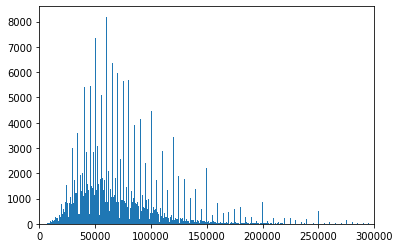

In [141]:
import matplotlib.pyplot as plt
plt.hist(accepted_df['annual_inc'][:200000],10000)
plt.xlim(0,300000)

In [142]:
np.mean(accepted_df.fico_range_low) - np.mean(accepted_df.fico_range_high)

-4.00019507508398

In [144]:
accepted_df.initial_list_status.value_counts()

w    1535467
f     725201
Name: initial_list_status, dtype: int64

In [153]:
accepted_df[['Month','Year']] = accepted_df.issue_d.str.split('-',expand = True)

In [154]:
accepted_df.Year.value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: Year, dtype: int64

In [168]:
def variable_expl(variable):
    print(accepted_df[variable].value_counts())
    print('\n')
    print('Mean value is:', np.mean(accepted_df[variable]))
    print('Std.dev value is:', np.std(accepted_df[variable]))

variable_expl('delinq_amnt')

0.0        2253465
25.0           124
65000.0        109
30.0            85
53.0            72
            ...   
5937.0           1
5960.0           1
5984.0           1
6020.0           1
4370.0           1
Name: delinq_amnt, Length: 2617, dtype: int64


Mean value is: 12.369827734547622
Std.dev value is: 726.4646206149101


In [172]:
accepted_df.shape[1]

151

In [159]:
accepted_df.delinq_amnt.value_counts()

0.0        2253465
25.0           124
65000.0        109
30.0            85
53.0            72
            ...   
5937.0           1
5960.0           1
5984.0           1
6020.0           1
4370.0           1
Name: delinq_amnt, Length: 2617, dtype: int64

In [157]:
np.mean(accepted_df.chargeoff_within_12_mths)

0.008464412881443808

In [171]:
accepted_df['Year'].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: Year, dtype: int64

In [156]:
accepted_df.head(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     3600.0       3600.0           3600.0   36 months     13.99       123.03   
1    24700.0      24700.0          24700.0   36 months     11.99       820.28   
2    20000.0      20000.0          20000.0   60 months     10.78       432.66   
3    35000.0      35000.0          35000.0   60 months     14.85       829.90   
4    10400.0      10400.0          10400.0   60 months     22.45       289.91   

  grade sub_grade                    emp_title emp_length  ...  \
0     C        C4                      leadman  10+ years  ...   
1     C        C1                     Engineer  10+ years  ...   
2     B        B4                 truck driver  10+ years  ...   
3     C        C5  Information Systems Officer  10+ years  ...   
4     F        F1          Contract Specialist    3 years  ...   

  disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                Cash                     N                       NaN   
1                Cash                     N                       NaN   
2                Cash                     N                       NaN   
3                Cash                     N                       NaN   
4                Cash                     N                       NaN   

  settlement_status settlement_date settlement_amount settlement_percentage  \
0               NaN             NaN               NaN                   NaN   
1               NaN             NaN               NaN                   NaN   
2               NaN             NaN               NaN                   NaN   
3               NaN             NaN               NaN                   NaN   
4               NaN             NaN               NaN                   NaN   

  settlement_term Month  Year  
0             NaN   Dec  2015  
1             NaN   Dec  2015  
2             NaN   Dec  2015  
3             NaN   Dec  2015  
4             NaN   Dec  2015  

[5 rows x 151 columns]

In [152]:
accepted_df['issue_d'].str.split('-', 1, expand=True)

0     1
0        Dec  2015
1        Dec  2015
2        Dec  2015
3        Dec  2015
4        Dec  2015
...      ...   ...
2260696  Oct  2016
2260697  Oct  2016
2260698  Oct  2016
2260699  NaN   NaN
2260700  NaN   NaN

[2260701 rows x 2 columns]

In [ ]:
print_full(accepted_df.groupby(['issue_d']).agg({'issue_d':'count'}))